# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [34]:
import pandas as pd
from pysentimiento import create_analyzer #!pip install pysentimiento
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

## Variables globales

In [35]:
DATASETS_NAME = {
    'SEMEVAL_2019_TRAIN': 'semeval2019_es_train.csv',
    'SEMEVAL_2019_VAL': 'semeval2019_es_dev.csv',
    'SEMEVAL_2019_TEST': 'semeval2019_es_test.csv',
}

DATASETS_DELIMITERS = {
    'SEMEVAL_2019': '	',
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### SEMEVAL 2019

In [36]:
df_semeval_train = pd.read_csv ( DATASETS_NAME['SEMEVAL_2019_TRAIN'],
        skiprows=1,
        header=None,
        names = ["id", "text", "hate_speech", "target_range", "aggressiveness"],
        delimiter=DATASETS_DELIMITERS['SEMEVAL_2019'])

----------------------------

## Sentiment Analysis


-----------------------------------------------

### Todos los tweets

-----------------------------------------------


In [37]:
df_semeval_train.head()

,id,text,hate_speech,target_range,aggressiveness
0,20001,Easyjet quiere duplicar el número de mujeres p...,1,0,0
1,20002,El gobierno debe crear un control estricto de ...,1,0,0
2,20003,Yo veo a mujeres destruidas por acoso laboral ...,0,0,0
3,20004,"— Yo soy respetuoso con los demás, sólamente l...",0,0,0
4,20007,Antonio Caballero y como ser de mal gusto e ig...,0,0,0


In [38]:
sentiment_analyzer = create_analyzer("sentiment", lang="es")

In [39]:
#Ejemplo de la documentacion
sentiment_analyzer.predict("Qué gran jugador es Messi")

AnalyzerOutput(output=POS, probas={POS: 0.946, NEU: 0.037, NEG: 0.017})

In [40]:
def analyze_sentiment(text):
    result = sentiment_analyzer.predict(text.lower())
    sentiment = result.output
    probabilities = result.probas

    print("\n-----------------------")
    print(f"Texto analizado: {text}")
    print(f"Sentimiento detectado: {sentiment}")
    print(f"Probabilidades: {probabilities}")

    return sentiment, probabilities, text

In [41]:
text_data = df_semeval_train['text'].tolist()
results = [analyze_sentiment(text) for text in tqdm(text_data)]

  0%|          | 17/4450 [00:00<00:53, 83.06it/s]


-----------------------
Texto analizado: Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2518204152584076, 'NEU': 0.6687817573547363, 'POS': 0.07939779758453369}

-----------------------
Texto analizado: El gobierno debe crear un control estricto de inmigración en las zonas fronterizas con Colombia por q después del 20-8querrán venir en masa
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3522600531578064, 'NEU': 0.5988108515739441, 'POS': 0.04892905801534653}

-----------------------
Texto analizado: Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9714699387550354, 'NEU': 0.02565343677997589, 'POS': 0.00287

  1%|          | 35/4450 [00:00<00:51, 86.48it/s]


-----------------------
Texto analizado: VAMOOOO LA PUTA MADRE SE LO MERECÍA TANTO ESFUERZO Y HABER PASADO TANTOS TELÉFONOS NECESITÁBAMOS ESTE DESCANSO #SoltarteNoEstáEnMisPlanesMica
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05643841624259949, 'NEU': 0.07149501144886017, 'POS': 0.8720665574073792}

-----------------------
Texto analizado: Pd a ver si cierran de una puta vez Tv3 que no sé todavía qué servicio público ofrece para que merezca dinero de nuestros impuestos o solo hace daño que roben unos?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9713032245635986, 'NEU': 0.026110738515853882, 'POS': 0.0025859891902655363}

-----------------------
Texto analizado: Yo estaba claro que esta vida de trabajador inmigrante fundido máquina iba a ser difícil. Y es verdad, es difícil jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.949040949344635, 'NEU': 0.045947328209877014, 'POS': 0.005011767614632845}

-----------------------
Texto analizado: Mira de vd estoy ha

  1%|          | 53/4450 [00:00<00:51, 85.23it/s]


-----------------------
Texto analizado: @AgusMariano17 @astrobrix @saintlean asi le digo a tu mami callate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5052800178527832, 'NEU': 0.44234025478363037, 'POS': 0.05237973481416702}

-----------------------
Texto analizado: @intonarumori13 Cállate y ven ya joder hostia puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8516728281974792, 'NEU': 0.11104454845190048, 'POS': 0.03728252276778221}

-----------------------
Texto analizado: Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16808286309242249, 'NEU': 0.7811136841773987, 'POS': 0.05080348998308182}

-----------------------
Texto analizado: @AngeAlvarez7 Callate perra, re despierta estoy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9066359996795654, 'NEU': 0.07017537951469421, 'POS': 0.023188628256320953}

-----------------------
Texto analizado: #esdemexicanos que te digan güero aunq

  2%|▏         | 71/4450 [00:00<00:51, 85.59it/s]


-----------------------
Texto analizado: @Laura99CM Ahora que me has faltado el respeto te lo puedo decir por fin: ¡A fregar puta!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7265499234199524, 'NEU': 0.15527354180812836, 'POS': 0.11817652732133865}

-----------------------
Texto analizado: Me mandan esta mierda. Cultura de la violación en sus mejores pantallas. ESCORIA. Se puede hacer algo @policia ? https://t.co/vGmcVPSO7B
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9773737192153931, 'NEU': 0.019352955743670464, 'POS': 0.0032733173575252295}

-----------------------
Texto analizado: @gliclazida @dotfanny @el_pais Pero el escenario que describe no es de acoso. Es de violación y asesinos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.890907883644104, 'NEU': 0.09711920469999313, 'POS': 0.011972839944064617}

-----------------------
Texto analizado: La Conferencia Sectorial de Inmigración y Emigración se reúne dentro de una hora por primera vez desde 2015. En lo q


  2%|▏         | 80/4450 [00:00<00:52, 82.75it/s]


-----------------------
Texto analizado: -¿Porque la esatua de la libertad es mujer? -Porque se nescesitaba una cabeza hueca para hacer un mirador
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7678716778755188, 'NEU': 0.21377892792224884, 'POS': 0.018349427729845047}

-----------------------
Texto analizado: Comemela XDDD y la cara también!! 🤣🤣🤣🤣🤣 — No nos pasemos 👀 https://t.co/t3o5yHY0zb
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3513820767402649, 'NEU': 0.5840281844139099, 'POS': 0.06458975374698639}

-----------------------
Texto analizado: @pauliboggino @soyunaforra cállate perra de mierda culona
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8949897289276123, 'NEU': 0.07298146933317184, 'POS': 0.03202873468399048}

-----------------------
Texto analizado: Lo peor es que luego los lees y estos simios deformados insinúan que la mujer es malvada y una zorra muajajajaja en el fondo siento lastima por estos seres
Sentimiento detectado: NEG
Probabilidades: {'NEG

  2%|▏         | 98/4450 [00:01<00:52, 82.78it/s]


-----------------------
Texto analizado: Yo no te discuto como sacar una muela así que cállate la puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7175629138946533, 'NEU': 0.24178224802017212, 'POS': 0.04065483435988426}

-----------------------
Texto analizado: ¿para que se inventó el alcohol? para que las feas, gordas y canis perdieran la virginidad.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.941684901714325, 'NEU': 0.05235494673252106, 'POS': 0.005960247479379177}

-----------------------
Texto analizado: Hay mujers inteligentes, si. Son hombres que se han operado de cambio de sexo. Al revés no.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12194555252790451, 'NEU': 0.7567352056503296, 'POS': 0.1213192343711853}

-----------------------
Texto analizado: y a los latinos nos dicen sudacas, conquistados, e incivilizados, ¿qué cosas, no? 👀 (no todos) https://t.co/Ew6hpH5wIa
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4187723696231842, 'NEU': 0.5

  3%|▎         | 116/4450 [00:01<00:51, 84.39it/s]


-----------------------
Texto analizado: @lauty489 Merecias ser ahogado hijo de perra pero mildis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9210660457611084, 'NEU': 0.05579906702041626, 'POS': 0.023134883493185043}

-----------------------
Texto analizado: Antonio Adán: Mi novia es sevillista y es una puta mas | Sevilla 3 Real ... https://t.co/Pk1TYziPU8 vía @YouTube
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5336962342262268, 'NEU': 0.3723703622817993, 'POS': 0.09393336623907089}

-----------------------
Texto analizado: @anto07ro Siempre te hago el aguante callate, mña si perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1336759477853775, 'NEU': 0.5652561187744141, 'POS': 0.30106794834136963}

-----------------------
Texto analizado: Los procesos administrativos tienen que ser rápidos para menores inmigrantes refugiades, ya que el futuro de eses menores está en juego. El día de mañana si quieren trabajar, seguirán sin esos papeles, los hombres terminará

  3%|▎         | 134/4450 [00:01<00:51, 84.54it/s]


-----------------------
Texto analizado: @KarinaFromField Tú eres mi perra, ¿yo qué culpa?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2859690487384796, 'NEU': 0.5819817185401917, 'POS': 0.13204926252365112}

-----------------------
Texto analizado: acabo de ver a una señora igualita a lupita d’alessio y dije fue como OMFG IS DAT LA LEONA DORMIDA O NOMAS OTRA SEÑORA GÜERA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.611186146736145, 'NEU': 0.3684380352497101, 'POS': 0.02037583291530609}

-----------------------
Texto analizado: @DonniPuppo JAJJAJAJ cállate perra , me lo dijo por otra cosa no x eso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5866928100585938, 'NEU': 0.36218497157096863, 'POS': 0.05112224072217941}

-----------------------
Texto analizado: EL ORGULLO QUE SIENTO🏼ES INMENSO, SOS ÚNICO💙 Te lo re mereces porque sos un actorazo de la puta madre https://t.co/Q4FEJabwVX
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.018775880336761475, 'NEU': 0.

  3%|▎         | 152/4450 [00:01<00:50, 85.78it/s]


-----------------------
Texto analizado: Pedimos picada árabe? 3 palabras, 1 corazón feliz
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.028381796553730965, 'NEU': 0.7508805990219116, 'POS': 0.22073760628700256}

-----------------------
Texto analizado: @JordiWild Que te calles ya pesao... ACEPTALO DE UNA PUTA VEZ Y dejalo ya en el pasado pide disculpas y ya conbio
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9156509637832642, 'NEU': 0.06852637976408005, 'POS': 0.01582265831530094}

-----------------------
Texto analizado: @LucasSpadafora Lucas callate que no lees dm nunca la puta que te pario ahre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.940351128578186, 'NEU': 0.04824630916118622, 'POS': 0.011402538046240807}

-----------------------
Texto analizado: Cómo me atraen las güeras 🤤
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03308656066656113, 'NEU': 0.077016681432724, 'POS': 0.889896810054779}

-----------------------
Texto analizado: pero callate pu

  4%|▍         | 170/4450 [00:02<00:50, 84.16it/s]


-----------------------
Texto analizado: @bot_11109 @elchiringuitotv @Borjamazarro8 Uno mas imbécil dirás,hasta la polla ya estaba la gente con las payasadas de Alves y neymar...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9583475589752197, 'NEU': 0.03479998558759689, 'POS': 0.006852473597973585}

-----------------------
Texto analizado: Si Dios maldijo a Eva porque se comió una manzana, imagínense lo que va a hacer cuando se entere de que andan de "borrachas" y de "putas" todos los fines de semana.  LAMENTABLE.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9813265204429626, 'NEU': 0.015511743724346161, 'POS': 0.00316174840554595}

-----------------------
Texto analizado: @NickAsio1 como estáis tan evolucionados culturalmente le recordais a cualquiera cuales son las normas cívicas. Españoles, negros y árabes sin excepcion, yo no he visto españoles poniendo pies en asientos. Negros y árabes bastantes.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4266530275344848

  4%|▍         | 188/4450 [00:02<00:51, 82.89it/s]


-----------------------
Texto analizado: Quieroite un lomito arabe com salsa de ajo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23922590911388397, 'NEU': 0.6209564805030823, 'POS': 0.13981755077838898}

-----------------------
Texto analizado: La introducción de los discursos de disculpa de los acusados de acoso sexual este año: https://t.co/RMiRzxmb0Z
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.28099334239959717, 'NEU': 0.6277447938919067, 'POS': 0.09126181900501251}

-----------------------
Texto analizado: En este país, lo que hay que hacer de una puñetera vez, es que todo ilegal (sin papeles) sea deportado a su país de una vez. Ya vale de tanto buenismo y ayudas a inmigrantes antes que a los propios Españoles. https://t.co/yqWoWe40ae
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.970306932926178, 'NEU': 0.024069953709840775, 'POS': 0.005623192060738802}

-----------------------
Texto analizado: Llegarán en masa a Cartagena. De nosotros y nuestros gobernante

  5%|▍         | 206/4450 [00:02<00:50, 84.76it/s]


-----------------------
Texto analizado: Brigada humanitaria lleva agua a inmigrantes que cruzan desierto https://t.co/JFm9rAZZPl
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21953314542770386, 'NEU': 0.5932353734970093, 'POS': 0.18723145127296448}

-----------------------
Texto analizado: Muchas personas creen q una mujer es abusada o acosada por ir muy descubierta, pero yo he visto acoso a mujeres por lo contrario también, mujeres cuya religión o creencias son otras y son acosadas por eso. Eso demuestra q hay un standard tácito d mujer, y q se espera sea cubierto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8839448094367981, 'NEU': 0.10836966335773468, 'POS': 0.007685457356274128}

-----------------------
Texto analizado: JACKIE Y HYDE MERECIAN ESTAR JUNTOS LA PUTA MADRE QUIERO ROMPER TODO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7791271209716797, 'NEU': 0.15304085612297058, 'POS': 0.06783196330070496}

-----------------------
Texto analizado: Reino Unido

  5%|▌         | 224/4450 [00:02<00:50, 83.31it/s]


-----------------------
Texto analizado: @Arthur_Zh69 CÓMO QUE TE FOLLAS A UNA PERRA Y OLVIDAS SU NOMBRE:0 Sí, bebé, me gusta mucho tu inglés, podrías enseñarme un poco
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5684174299240112, 'NEU': 0.3899724781513214, 'POS': 0.041610050946474075}

-----------------------
Texto analizado: @Relatofeminista @elsadurst la educación sexual también es aprender que las mujeres con polla existen y son víctimas de violacion... Violan los hombres no las pollas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.668403685092926, 'NEU': 0.2800419330596924, 'POS': 0.05155444145202637}

-----------------------
Texto analizado: Cómo supero Arabe.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20518963038921356, 'NEU': 0.7479237914085388, 'POS': 0.04688655585050583}

-----------------------
Texto analizado: Temon Árabe 👏
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0292886383831501, 'NEU': 0.1676381677389145, 'POS': 0.8030732274055481}


  5%|▌         | 242/4450 [00:02<00:50, 83.14it/s]


-----------------------
Texto analizado: igual posta odio los pies capaz tenes pie feo y me jodes apoyandomelo en la cara y te pego un hachazo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9711647033691406, 'NEU': 0.02358575351536274, 'POS': 0.005249508190900087}

-----------------------
Texto analizado: Más residentes en Emiratos Árabes aseguran luchar para llegar a fin de mes https://t.co/1eu5NrHz55
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1366243213415146, 'NEU': 0.67022305727005, 'POS': 0.19315260648727417}

-----------------------
Texto analizado: @BreenDLP @ChumelTorres @Juandedios_P @KimberlyLoaiza_ Cállate Perra mal parida de Juan y kim no hables😠😡😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.878404438495636, 'NEU': 0.10942058265209198, 'POS': 0.012174984440207481}

-----------------------
Texto analizado: I liked a @YouTube video https://t.co/s4HGvbL6SV Francisco Tárrega - Capricho árabe
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17996563

  6%|▌         | 260/4450 [00:03<00:51, 81.57it/s]


-----------------------
Texto analizado: Desbloqueme, dale zorrita. Sabes por qué te cagué a palo? Por puta, te merecías la cagada a palo' Lo que uno tiene que escuchar en la calle
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9106722474098206, 'NEU': 0.06908545643091202, 'POS': 0.02024233341217041}

-----------------------
Texto analizado: @PedroArtZGFX @Smoshigames1999 Tu eres mio puta y te callas cabron
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7851337194442749, 'NEU': 0.18688802421092987, 'POS': 0.0279782023280859}

-----------------------
Texto analizado: Me gusta machin mi pelo largo y güero ☺️💕
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02446364238858223, 'NEU': 0.15348368883132935, 'POS': 0.8220527172088623}

-----------------------
Texto analizado: *tells my grandma me and Daniel are fighting “ayyyyy pobrecito mi hijo, tú eres la perra desgraciada” https://t.co/7cDzbuouGO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.929396390914917, 'NEU': 

  6%|▌         | 277/4450 [00:03<00:54, 76.11it/s]


-----------------------
Texto analizado: Tengo muy claro q el Perú es un país benevolente y apacible. Sabemos q aceptamos y de buena gana ayudar. Sabemos solidarizarnos. También tengo claro, q somos un país en pañales, q no estamos preparados para recibir a más inmigrantes q huyen sin sustento por haber votado mal.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8300395011901855, 'NEU': 0.14027510583400726, 'POS': 0.02968539111316204}

-----------------------
Texto analizado: Campo de Refugiados en ESPAÑA 🇪🇸 Q gobierno tendrá Los Santos Cohones de poner fin SÍ o SÍ a este despropósito? #campoderefugiados #españa https://t.co/ejGcKANZrz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7838938236236572, 'NEU': 0.20673762261867523, 'POS': 0.009368528611958027}

-----------------------
Texto analizado: Juez reafirma orden a Trump de reactivar el programa DACA para jóvenes indocumentados. #AgendaPública https://t.co/YIvr3P9jMq https://t.co/xKCrNdyxgh
Sentimiento detectado: NEU
Pro


  6%|▋         | 286/4450 [00:03<00:53, 77.44it/s]


-----------------------
Texto analizado: arabe es un re temon papichamp y ecko la rompen, yo les retumbo las nalgas a lo twerk loco los amo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.027175147086381912, 'NEU': 0.09039440006017685, 'POS': 0.8824304342269897}

-----------------------
Texto analizado: DEJA DE TUITEAR HIJA DE PUTA ESCUCHA LOS ARGUMENTOS QUE LUEGO TE VAS A QUEDAR CALLADA FUJIMIERDA DEL CARAJO https://t.co/np9RAv5auI
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9517073035240173, 'NEU': 0.03635372966527939, 'POS': 0.0119389733299613}

-----------------------
Texto analizado: los videos no acreditan mucho, pero lo que no me convence es el dato del acosador con acento "peruano". Me parece xenofobo y racista. A que aporta a la causa ese dato sino a estigmatizar a los inmigrantes https://t.co/SQFLXP1Kg8
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9750614762306213, 'NEU': 0.022114768624305725, 'POS': 0.0028237178921699524}

-----------------------
Texto

  7%|▋         | 303/4450 [00:03<00:52, 78.49it/s]


-----------------------
Texto analizado: Las #niñas #niños y #adolescentes pueden ser #refugiados. Las cifras de @unhcr muestran la enorme vulnerabilidad de NNA al desplazamiento forzado https://t.co/MpyWfweTt4
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5537711977958679, 'NEU': 0.42014122009277344, 'POS': 0.026087544858455658}

-----------------------
Texto analizado: Acá es como que vas al club a tomar algo y si o si tenes que cruzar a sudaca para qué tal está 🤷🏻‍♀️
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3552793264389038, 'NEU': 0.6352386474609375, 'POS': 0.009481995366513729}

-----------------------
Texto analizado: arabe es un temaiken amigos no veo la hora de q lo pasen en blv
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07752185314893723, 'NEU': 0.1896057277917862, 'POS': 0.7328724265098572}

-----------------------
Texto analizado: @diegovftbau REENCUENTRO LA PUTA MADRE, DISFRUTALO MUCHO, LO RE MERECES AMIGA
Sentimiento detectado: POS
Probabilida

  7%|▋         | 319/4450 [00:03<00:53, 77.69it/s]


-----------------------
Texto analizado: Una vez un arabe me pidió matrimonio en Canadá JAJAJAJAJA 100% real 0% fake
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22027558088302612, 'NEU': 0.7361429333686829, 'POS': 0.043581489473581314}

-----------------------
Texto analizado: @DIOSAYT @unaineira_04 @A_S_B_L_A_C_K Cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6966406106948853, 'NEU': 0.22371578216552734, 'POS': 0.07964355498552322}

-----------------------
Texto analizado: @CRDecoracion si a mi me dicen mardita hubiese dicho 'yo si mi amor' como una real perra pero tu eres nula así que te prestare mi tarjeta para que te compres una personalidad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8094348311424255, 'NEU': 0.1777632087469101, 'POS': 0.012801903299987316}

-----------------------
Texto analizado: @tromepe Tú eres la malagua celulitica puta barata https://t.co/tjDXyEKLzu
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.893318772315979, 'N

  8%|▊         | 336/4450 [00:04<00:53, 77.35it/s]


-----------------------
Texto analizado: No hay nada peor que la pérdida de la patria. Encarnando el caso de los miles de refugiados sirios en el campamento de Za'atari, las pinturas fueron realizadas con detalle poniendo... https://t.co/VAEwbdCpHe
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8716959357261658, 'NEU': 0.11715719103813171, 'POS': 0.011146863922476768}

-----------------------
Texto analizado: ESTA TERRIBLE ARABE DE ECKO AMIGO QUE CHABON CON FLOW
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.049540672451257706, 'NEU': 0.079872727394104, 'POS': 0.870586633682251}

-----------------------
Texto analizado: Y tú eres una perra como dice Joss Stone https://t.co/cDRan4DaSa
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3148677349090576, 'NEU': 0.5449292659759521, 'POS': 0.14020302891731262}

-----------------------
Texto analizado: Y tu eres perra?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21980224549770355, 'NEU': 0.7261084318161011, 'POS': 0.0

  8%|▊         | 353/4450 [00:04<00:51, 79.02it/s]


-----------------------
Texto analizado: A mí esto de que los ilegales subsaharianos se beban cubatas con mi dinero, no me acaba de convencer
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9611534476280212, 'NEU': 0.03315987065434456, 'POS': 0.00568665424361825}

-----------------------
Texto analizado: La queja del hombre y de la mujer es universal y del mismo tipo, pero la de la mujer es más notable y se la tilda de puta resentida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9389248490333557, 'NEU': 0.05343117192387581, 'POS': 0.007643931079655886}

-----------------------
Texto analizado: Me mama cuestionar a mis profesores 😂 no sean pendejos y sepan que están enseñando no se aprendan una puta guía 😂🤷🏻‍♂️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8853713274002075, 'NEU': 0.1027822196483612, 'POS': 0.011846507899463177}

-----------------------
Texto analizado: Falta que aparezca puta publicando 'feliz día de Reyes' y suba una foto enseñando el culo.
Sentim

  8%|▊         | 371/4450 [00:04<00:50, 80.46it/s]


-----------------------
Texto analizado: EN TWITTER SUPIMOS TENER EL #TODASPUTAS, NUESTRAS MADRUGADAS ESPERANDO LOS CLIPS, NUESTROS MILLONES DE BARDOS Y VOS PREFERIS A LAS DE IG QUE NO SABEN CUANDO CHOTA ES TU CUMPLEAÑOS Y SE HORRORIZABAN PORQUE TE COMISTE A AYE CUANDO ACA ESTABAMOS DE PARTY FUI POSEIDA POR COCOESPOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9561578631401062, 'NEU': 0.04008164629340172, 'POS': 0.0037605108227580786}

-----------------------
Texto analizado: @ere_75 @marjorie_aj71 Así como tú eres maricón y puta tapiñada 🤣 tu obsesión solo produce risa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8474860787391663, 'NEU': 0.1415979564189911, 'POS': 0.010915976017713547}

-----------------------
Texto analizado: Kirei, mereces una muerte lenta y dolorosa hijo de puta. #FateZero
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9748703241348267, 'NEU': 0.019877681508660316, 'POS': 0.005252073984593153}

-----------------------
Texto analizado: Estim

  9%|▊         | 389/4450 [00:04<00:49, 82.81it/s]


-----------------------
Texto analizado: Perdón por la hora, pero me desperté pq soñé que era la güera de Locomia y salía en Siempre en Domingo .. se me fue el sueño: VALE MADRE...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9130069017410278, 'NEU': 0.07964984327554703, 'POS': 0.00734327919781208}

-----------------------
Texto analizado: @Barbijaputa Chica, la verdad me da igual que tengas coño o falo y pelotas, lo importante para mí es lo escribes y la verdad lo haces más bien con el cerebro que con los genitales. Así sigue dando guerra!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.15853667259216309, 'NEU': 0.354613333940506, 'POS': 0.4868500232696533}

-----------------------
Texto analizado: Tu pinche voz de mustia me hace emputar aún más, cállate puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9760346412658691, 'NEU': 0.01620003953576088, 'POS': 0.007765249814838171}

-----------------------
Texto analizado: En verdad yo no se porque tu eres así... DE 

  9%|▉         | 407/4450 [00:04<00:48, 82.92it/s]


-----------------------
Texto analizado: @alpiNo_10 Comemela yonki. A ver si jugamos al player
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.306170254945755, 'NEU': 0.5201981663703918, 'POS': 0.17363159358501434}

-----------------------
Texto analizado: esque zorra callate y no opines plis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9059310555458069, 'NEU': 0.0798342302441597, 'POS': 0.01423476543277502}

-----------------------
Texto analizado: No se por que me empezaron a seguir tantas cuentas árabes pero gracias porque subí como trescientos followers en minutos ahre #MMVAs⁠ ⁠⁠⁠ #FFArtistShawn
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07367926090955734, 'NEU': 0.6182016134262085, 'POS': 0.30811914801597595}

-----------------------
Texto analizado: @bevavera @pcbestt Callate puta hdp coño de tu madre maldita enchufada sopla con don perra oportunistas Amarillistas de mierda maldita aquí mueren siento de personas diario hdp. Pues claro Q nesesitamos una int

 10%|▉         | 425/4450 [00:05<00:47, 84.50it/s]


-----------------------
Texto analizado: ACNUR mantiene la llamada internacional para ayudar a los refugiados sirios #Sociedad https://t.co/WfTasm1nEM
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22692643105983734, 'NEU': 0.6109219193458557, 'POS': 0.16215169429779053}

-----------------------
Texto analizado: Soñé que era sobrino de Uribe y que sabía dónde estaban todos los papeles que lo inculpaban y buscaba la forma de robármelos sin que me pillara.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15243537724018097, 'NEU': 0.7445792555809021, 'POS': 0.10298532992601395}

-----------------------
Texto analizado: @medicengaribay Cállate zorra que él alcohólico aquí eres tú.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8946549892425537, 'NEU': 0.08745766431093216, 'POS': 0.01788727194070816}

-----------------------
Texto analizado: si ya la cédula de identidad va a dejar de ser el documento de identificación en Venezuela,avisen para declararnos indocumentado en nu

 10%|▉         | 443/4450 [00:05<00:47, 83.77it/s]


-----------------------
Texto analizado: -¿Que le falta a una Mujer para ser perfecta? -todo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.323995441198349, 'NEU': 0.5050963163375854, 'POS': 0.17090822756290436}

-----------------------
Texto analizado: Qué asco hacerles pensar a tus fans que LAS VÍCTIMAS DE ACOSO/VIOLACIÓN DEBERÍAN QUEDARSE CALLADAS.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9819833040237427, 'NEU': 0.014766029082238674, 'POS': 0.003250706475228071}

-----------------------
Texto analizado: “Nos vamos a convertir como Venezuela” decían, ahora hasta en los semáforos se habla chamo...Quiero ver al señor Duque y a los ministerios y cancillería que van hacer con tanto inmigrante chamozolano
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8595271706581116, 'NEU': 0.13137656450271606, 'POS': 0.009096181951463223}

-----------------------
Texto analizado: @anaisbernal Merecían que se le cortase la polla a él y al juez que dictó su inocencia ...y los ab

 10%|█         | 461/4450 [00:05<00:46, 85.32it/s]


-----------------------
Texto analizado: @paco_sanz Ostia tio, si tienes tuister. Tú eres un auténtico sinvergüenza y un hijo de la gran puta jeta. Los que de verdad hemos sufrido tumores cerebrales te deseamos un tormentoso 2018. La policía te jodió tu repugnante negocio.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9850528836250305, 'NEU': 0.01075437106192112, 'POS': 0.004192747175693512}

-----------------------
Texto analizado: @MissManias_ @_Soletita Pero si sois las dos rubias, qué os voy a enseñar? Jajaja. Hijas de puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.782547652721405, 'NEU': 0.17121683061122894, 'POS': 0.046235501766204834}

-----------------------
Texto analizado: Es imposible escuchar Arabe de ecko sin bailarlo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5478848814964294, 'NEU': 0.3358269929885864, 'POS': 0.11628817021846771}

-----------------------
Texto analizado: @Night_D_S Callate la boca pendeja de 14 años con delirios de madurez 

 11%|█         | 479/4450 [00:05<00:46, 85.23it/s]


-----------------------
Texto analizado: @Juan12Champions Joder no me sale esto va a su puta bola. Gracias por enseñarmelo, veo tus RT pero para ver tus saludos me meto en tu perfil 😍😍😍😘😘😘
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4850658178329468, 'NEU': 0.396332323551178, 'POS': 0.11860176920890808}

-----------------------
Texto analizado: Muérete zorra que yo no puedo ver Monstruos S.A. — Cállate gilipollas https://t.co/bZA1mGUble
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9501550197601318, 'NEU': 0.040023427456617355, 'POS': 0.0098215127363801}

-----------------------
Texto analizado: @SantiagoPovedaM Cállate Perra! 😙
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17312419414520264, 'NEU': 0.48483145236968994, 'POS': 0.3420444130897522}

-----------------------
Texto analizado: Que bien que el güero (sol) me echo la mano para poder apreciar está culona en leggins negro .  RT y MG banda   Hay vídeo . 👍 https://t.co/BoZ0X8jLp1
Sentimiento detectado: POS


 11%|█         | 497/4450 [00:06<00:47, 83.91it/s]


-----------------------
Texto analizado: Nose si me está afectando el alcohol pero INUYASHIKI NO SE MERECÍA MORIR HIJOS DE PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9659289717674255, 'NEU': 0.028749940916895866, 'POS': 0.005321058910340071}

-----------------------
Texto analizado: ARABIA SAUDITA, EMIRATOS ARABES, KUWAIT Y DEMÁS ADINERADOS CON LOS MASONES JUDAS Y DEMÁS DEL MUNDO HEREJE, CAVANDO SU PROPIA TUMBA SUBSIDIANDO HEREJES ANTICRISTIANOS, LA ORDENDEBE SER: CONVIERTASE A CRISTO, PACIFIQUESE Y ESPERE EN SU PAIS LA AYUDAS,... https://t.co/eZ9xvP812c
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5932545065879822, 'NEU': 0.36479511857032776, 'POS': 0.04195038974285126}

-----------------------
Texto analizado: @TorakitoJ y una polla JAJJAJAAJAJAJAJ esa es mia imbecil que me pongo nervioso (en serio)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7201445698738098, 'NEU': 0.24550916254520416, 'POS': 0.03434627130627632}

-----------------------
Texto anali

 12%|█▏        | 515/4450 [00:06<00:47, 83.53it/s]


-----------------------
Texto analizado: ... de que sirve perseguir la propaganda islamista radical para luego introducir el islam en las escuelas?? O lo de Castellon pretende ser un ensayo de la creación de Islam-jugend en occidente??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.848612368106842, 'NEU': 0.14059731364250183, 'POS': 0.010790275409817696}

-----------------------
Texto analizado: @Berenjeno_ Te mereces todos los regalos del mundo berenjeno feliz Navidad me cago en la puta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.24505648016929626, 'NEU': 0.09340977668762207, 'POS': 0.6615337133407593}

-----------------------
Texto analizado: Gracias a dios no fui güera. Sí prieta soy bien mamona, imagínate que fuera güera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8056124448776245, 'NEU': 0.14497973024845123, 'POS': 0.04940779134631157}

-----------------------
Texto analizado: No volverá a responder a la palabra Gabacha. Así que ahí se queda. Con uno tuvo 

 12%|█▏        | 533/4450 [00:06<00:46, 84.84it/s]


-----------------------
Texto analizado: Wey, soñé que era güera again. ¡Qué perro asco!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9562538862228394, 'NEU': 0.03510960191488266, 'POS': 0.008636587299406528}

-----------------------
Texto analizado: @TiaFeminazi Movimiento SEMEN! A fregar todas! http://t.co/u9WvI5Fr18
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12598176300525665, 'NEU': 0.729555070400238, 'POS': 0.14446322619915009}

-----------------------
Texto analizado: @D3STR0_ @FCBarcelona_es Soy cule y antiperico, pero tú eres un hijo de la gran puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8864038586616516, 'NEU': 0.09019749611616135, 'POS': 0.02339860610663891}

-----------------------
Texto analizado: @RafaeIRamosV es posible q el Vasco logre q le entiendan su idea en árabe más fácil q lo q le entendieron a Osorio los mexicanos aún hablando el mismo idioma?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.36505746841430664, 'NEU': 0.57834362

 12%|█▏        | 551/4450 [00:06<00:45, 85.93it/s]


-----------------------
Texto analizado: Guarra se folla a Papá Noel en un autobús https://t.co/YUseYMe6ss https://t.co/jGhp8RBRUo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8967172503471375, 'NEU': 0.08595040440559387, 'POS': 0.017332319170236588}

-----------------------
Texto analizado: @Viejastirpe 'Profe al final no te puedo enseñar mi polla salterina pero te puedo mostrar un testiculo que grita.Apruébame anda'
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17311297357082367, 'NEU': 0.7300795912742615, 'POS': 0.09680740535259247}

-----------------------
Texto analizado: Se sale en modo arabe? Jajajaj 😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09594106674194336, 'NEU': 0.8514259457588196, 'POS': 0.05263294652104378}

-----------------------
Texto analizado: @clarii_alderete @Mapazbelen Entonces, si seguimos esa lógica, el acoso sexual contra la mujer es más grave que el acoso sexual contra el hombre sólo porque registra más casos? Me sorprende dicha in

 13%|█▎        | 569/4450 [00:06<00:45, 86.05it/s]


-----------------------
Texto analizado: @LVidegaray #Urgente parar inmigracion legal o ilegal a Mexico donde Criminales y Terroristas de otros paises , toman al Pais como Refugio de su criminalidad #RevolucionIndestructible
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8991836905479431, 'NEU': 0.09180747717618942, 'POS': 0.009008720517158508}

-----------------------
Texto analizado: Que les pasa a todos que me quieren hacer usar turbante de arabe, soy negro pero tampoco para tanto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9406114220619202, 'NEU': 0.05225937068462372, 'POS': 0.0071292356587946415}

-----------------------
Texto analizado: @Vadushi @Phantanium_ cállate zorra estupida y no te metas en mis zorreos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.89289790391922, 'NEU': 0.08645235002040863, 'POS': 0.020649736747145653}

-----------------------
Texto analizado: Cambio de junta directiva club activo 20-30 Colon Sur en Club Árabe https://t.co/9mMMS82eH9

 13%|█▎        | 587/4450 [00:07<00:45, 84.18it/s]


-----------------------
Texto analizado: Más de putos moros  https://t.co/7csHuuOvzP
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7151181101799011, 'NEU': 0.23566557466983795, 'POS': 0.04921634867787361}

-----------------------
Texto analizado: Callate zorra chupa pija
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8614814281463623, 'NEU': 0.08284987509250641, 'POS': 0.055668752640485764}

-----------------------
Texto analizado: #Catalunya #Canarias no queremos indocumentados en nuestro pais desde Barcelona hasta #lanzarote existen estas mafias que no cotizan vendiendo en la calle arruinando a los pequeños negocios y prostituyendo a las mujereS  #Idonotwantmafias in #Spain 🇪🇸 https://t.co/QkByE3bDnb
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6949847936630249, 'NEU': 0.2892514169216156, 'POS': 0.01576383039355278}

-----------------------
Texto analizado: Pues a mi el hebreo o lo que farfullan los sionistas me suena muy parecido al árabe. Lo digo por lo racist

 14%|█▎        | 605/4450 [00:07<00:46, 83.06it/s]


-----------------------
Texto analizado: @Aguus_Donan Callate que tu mama esta re perra o no @FranciisAlvarez ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.48126837611198425, 'NEU': 0.3787463903427124, 'POS': 0.13998521864414215}

-----------------------
Texto analizado: @UlyssesAral Jajajajaja cállate pinche perra, Gaga es perfecta ok?
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1917145550251007, 'NEU': 0.2664315700531006, 'POS': 0.5418539047241211}

-----------------------
Texto analizado: Pegandole con cinturones entre 8 y ara dicen k.son ellos los.agredidos.pero mierdas k ahy un video aparte sin papeles pues detenerlos y exarlos a la puta mierda tanto negro.en el.paissin papeles no es.normal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9641741514205933, 'NEU': 0.03154030442237854, 'POS': 0.004285546950995922}

-----------------------
Texto analizado: hay que cortarle los huevos con un alicate a los que dicen que las mujeres denuncian acoso y violación sol

 14%|█▍        | 623/4450 [00:07<00:45, 84.43it/s]


-----------------------
Texto analizado: @mikaelamattio cállate zorra bien que bailas te al lado de este tincho anoche
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8912235498428345, 'NEU': 0.07854174822568893, 'POS': 0.030234690755605698}

-----------------------
Texto analizado: Como siempre las subvenciones serán para inmigrantes. https://t.co/tPPIi60EgN
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7451363801956177, 'NEU': 0.23765979707241058, 'POS': 0.017203833907842636}

-----------------------
Texto analizado: Mierda para aquellos que saltan la valla de Melilla y Ceuta. Cabrones que solo queréis venir a violar y pasaríamos pipa! Quedaros allí y no queréis más a las fuerzas del estado con cal viva! No soy racista pero si persona y ya estamos artos!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9731568098068237, 'NEU': 0.021843252703547478, 'POS': 0.004999919328838587}

-----------------------
Texto analizado: Estoy un poco hasta la polla de que chaval nuev

 14%|█▍        | 641/4450 [00:07<00:44, 85.92it/s]


-----------------------
Texto analizado: Espera,que me puedo morir ya😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍 Soraya cállate de una puta vez, y sé feliz.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3130948841571808, 'NEU': 0.5520990490913391, 'POS': 0.1348060518503189}

-----------------------
Texto analizado: [29/12 9:48 AM] Axel : T VOY A ENSEÑAR Axel : A MO TENER SENTIMIENTOS Axel : DIOS Axel : LA PUTA MADRE Axel : LA CONCXHA D TU HERMANA Ta bien axel
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4589659571647644, 'NEU': 0.44770023226737976, 'POS': 0.09333381056785583}

-----------------------
Texto analizado: ÚLTIMA HORA| @pablocasado_ culpa a Pedro Sánchez de la #Oladecalor. Dice que si no tiene bastante con acoger migrantes, que también tiene que acoger el calor subsahariano. #FelizMiércoles #1Agosto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7433770895004272, 'NEU': 0.24101056158542633, 'POS': 0.015612366609275341}

-----------------------
Texto analizado: #SNInternacional  

 15%|█▍        | 659/4450 [00:07<00:44, 84.53it/s]


-----------------------
Texto analizado: @TRANQUlLlTA Oye callate que si te molesta pues no mires el chat y deja ya de llamar la atención guarra, mi Instagram es trussypussy25 chavales
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7752822041511536, 'NEU': 0.19687871634960175, 'POS': 0.02783910185098648}

-----------------------
Texto analizado: @joakosinnervios Hablo y digo lo que quiero y si no tenes la más puta idea de lo que hablo mejor cállate, siempre viví como quise y no gracias a él.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3051246106624603, 'NEU': 0.5930739045143127, 'POS': 0.10180152207612991}

-----------------------
Texto analizado: Quería reírme, puse Riaño en Netflix, lo toleré hasta el minuto 18, bromas sobre acoso, violación y estereotipos femeninos.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2518090307712555, 'NEU': 0.6709337830543518, 'POS': 0.0772571861743927}

-----------------------
Texto analizado: @BamAlondra ya cállate perra loca, no

 15%|█▌        | 677/4450 [00:08<00:45, 83.44it/s]


-----------------------
Texto analizado: Esto es lo que he encontrado.   https://t.co/DWXDTLmP2j vía @Confidencial Digital
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.103403240442276, 'NEU': 0.5978795886039734, 'POS': 0.2987171709537506}

-----------------------
Texto analizado: Del contrato sin firma del Triplex a los cuadernos quemados del chófer (a.k.a. 🕵️👮)... Qué flojita de papeles (y direccionada) viene la cosa #Lawfare
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9226030111312866, 'NEU': 0.07254409044981003, 'POS': 0.0048529235646128654}

-----------------------
Texto analizado: Vuestras madres no son tela pesadas enseñándoos vídeos d mierda del wha kno hacen NI PUTA GRACIA????????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9486904144287109, 'NEU': 0.04325393587350845, 'POS': 0.008055751211941242}

-----------------------
Texto analizado: La güera ya ‘’sabe’’ decir su nombre y dice que se llama Pami ✨❤️
Sentimiento detectado: NEU
Probabilidades: {'NEG


 15%|█▌        | 686/4450 [00:08<00:46, 81.58it/s]


-----------------------
Texto analizado: LA PUTA MADRE LO Q HABÍA LLORADO XQ ENCIMA LO RE AMABA A RAMA SE MERECÍA EL MUNDO https://t.co/zXG0vg0VgD
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.21264714002609253, 'NEU': 0.15503285825252533, 'POS': 0.6323199272155762}

-----------------------
Texto analizado: All I want for Xmas is yoQUE TE CALLES DE UNA PUTA VEZ, LOQUER, CÁLLATE YA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9335715174674988, 'NEU': 0.05534503236413002, 'POS': 0.011083433404564857}

-----------------------
Texto analizado: Mi hermana me mando lo de Hey Fonsi y lo hice bien, jaja en tu cara zorra 😎
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.06164713203907013, 'NEU': 0.4788050055503845, 'POS': 0.45954787731170654}

-----------------------
Texto analizado: #Pendejos  Don't call me gringo You fuckin beaner Stay on your side Of that goddamn river Don't call me gringo You beaner  No me digas beaner Mr. puñetero Te sacaré un susto Por racista y culer

 16%|█▌        | 704/4450 [00:08<00:45, 82.39it/s]


-----------------------
Texto analizado: OPINIÓN IMPOPULAR Después de años viviendo en España, siendo yo un sucio sudaka he llegado a esta conclusión:  El doblaje español no tiene NADA que envidiarle al doblaje latino. Don't @ me.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8988187313079834, 'NEU': 0.08940751850605011, 'POS': 0.011773733422160149}

-----------------------
Texto analizado: Miles d españoles licenciados q se han ido, o se han quedado, y se dedican a servir cafés a extranjeros ni 1 página  Al único negro q parece q no quiere dedicarse robar, vender droga, violar y vivir d paguitas titular a toda página  #NosTomanPorImbéciles  https://t.co/2pR0YPtNCA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9736623167991638, 'NEU': 0.02369758114218712, 'POS': 0.002640065737068653}

-----------------------
Texto analizado: ¡¡NUESTROS POBRES PRIMERO!! DEMAGOGIA CONTRA LA #INMIGRACIÓN ¡no te dejes engañar! https://t.co/Az7MY2mPpm https://t.co/MlVVNrU7HK
Sentimiento detec

 16%|█▌        | 722/4450 [00:08<00:44, 83.62it/s]


-----------------------
Texto analizado: ............  LES   ARABES      EN  AFRIQUE     ............. . https://t.co/hyZ1VT0510
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19782491028308868, 'NEU': 0.5649707913398743, 'POS': 0.23720434308052063}

-----------------------
Texto analizado: @Mzavalagc Pinche-perra asesina de los niños de la guarderia abc.vete tu eres la peor delincuente, corrupta ratera, asesina , mierda, chorrillo, de la mierda llamada calderrata y de todos los- delincuentes quevte rodean-solo- caca- tienes en tu asqueroso 
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9641722440719604, 'NEU': 0.02221323549747467, 'POS': 0.013614589348435402}

-----------------------
Texto analizado: Aprovechando el aniversario vendrán las acusaciones de violacion y acoso. Veamos quien cae. 🤔 https://t.co/Bxf9V5kcMt
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4181336462497711, 'NEU': 0.5619497895240784, 'POS': 0.01991659216582775}

-----------------------
Texto 

 17%|█▋        | 740/4450 [00:09<00:53, 69.32it/s]


-----------------------
Texto analizado: Lo mismo que el problema de la inmigración no es por las políticas del Gobierno de Pedro @sanchezcastejon tampoco la "mejora" de la situación económica es por sus decisiones en 60 días 60.  "Ha supuesto un cambio de época en la política española" @20m https://t.co/IzaB9N5Bp0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9393979907035828, 'NEU': 0.0520394891500473, 'POS': 0.008562431670725346}

-----------------------
Texto analizado: me: ay el peor enemigo de una mujer es otra mujer also me: esa vieja es bn zorra me again: deberíamos respetarnos entre nosotras
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.938000500202179, 'NEU': 0.053697939962148666, 'POS': 0.008301494643092155}

-----------------------
Texto analizado: Los supermercados de Argentina,son una burla y una afrenta,por mas sudaca,q sea su público,la calidad de los productos,es ofensiva,y los precios de esa basura,es como cachetear a la gente.Entrenamiento para la Vene


 17%|█▋        | 748/4450 [00:09<00:55, 66.37it/s]


-----------------------
Texto analizado: @GranCule1899 @Quiquegarcai1 @Tebasjavier @realmadrid Asco da tu Puta madre ??? Tu eres mongolico como el Messi ??? Tu madre trabaja de puta chupa braguetas , culé asqueroso , que te gusta chupar culos , asco das ........... ves que fácil es insultar meló
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9755022525787354, 'NEU': 0.01805843785405159, 'POS': 0.00643936125561595}

-----------------------
Texto analizado: Siempre estuve en contra de que las prietas se pintaran güeras, look at me now.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8355216979980469, 'NEU': 0.14732955396175385, 'POS': 0.01714874617755413}

-----------------------
Texto analizado: @elisacarrio Callate hija de puta gorda falopera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9351367950439453, 'NEU': 0.04191655293107033, 'POS': 0.02294670231640339}

-----------------------
Texto analizado: Los asaltantes del vallado de Ceuta están entrenados «paramilitarm

 17%|█▋        | 762/4450 [00:09<01:03, 57.86it/s]


-----------------------
Texto analizado: Con mis manos en tu culo sintiendo el recorrido de mi polla dentro de ti, despacio entrando y saliendo, mis venas s… https://t.co/exSo05cYON
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07920332998037338, 'NEU': 0.44503018260002136, 'POS': 0.47576653957366943}

-----------------------
Texto analizado: La cobertura sanitaria a los 820.000 sin papeles costará a los españoles 2.000 millones de euros
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7080317139625549, 'NEU': 0.27044036984443665, 'POS': 0.021528029814362526}

-----------------------
Texto analizado: Mi papá me acaba de enseñar un video de una perra estresada y me dijo que era yo. 🙄🙄
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6267154812812805, 'NEU': 0.358112096786499, 'POS': 0.015172471292316914}

-----------------------
Texto analizado: @cristobalsoria Retrasado callate la puta boca asqueroso , encima el puto arbitro no nos pita un penalti legal
Sentimiento dete

 17%|█▋        | 775/4450 [00:09<01:02, 59.27it/s]


-----------------------
Texto analizado: @InesVelo Ay ya callate mejor perra ve a decir eso afuera de Twitter https://t.co/YpqgWtzB07
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8014904260635376, 'NEU': 0.16735737025737762, 'POS': 0.031152164563536644}

-----------------------
Texto analizado: @YazminCantuT @ClubAmerica @eduardoushito Cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6966406106948853, 'NEU': 0.22371578216552734, 'POS': 0.07964355498552322}

-----------------------
Texto analizado: Mi cuñado quiso tomar a la par de los otros y bueno aca esta hablado árabe JAJAJAJA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.48548781871795654, 'NEU': 0.4629962146282196, 'POS': 0.05151604488492012}

-----------------------
Texto analizado: @caamibotella Callate puta , vamos a hacer algo q me aburro
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9056268930435181, 'NEU': 0.08044806867837906, 'POS': 0.013925047591328621}

-----------------------
Text

 18%|█▊        | 789/4450 [00:09<01:00, 60.99it/s]


-----------------------
Texto analizado: @TheGotzReport El hijo de puta quiso estirar el pase al arquero hasta el último momento, merecía ser gol y que lo maten.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9716690182685852, 'NEU': 0.020719943568110466, 'POS': 0.007611077278852463}

-----------------------
Texto analizado: @_kayligonzales_ Puta men ya callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.925963282585144, 'NEU': 0.04978692904114723, 'POS': 0.024249793961644173}

-----------------------
Texto analizado: AY YA CÁLLATE HIJA DE TODA TU PUTA MADRE. APARTE DE PUTA, ARGUENDERA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9441236853599548, 'NEU': 0.03485371172428131, 'POS': 0.021022537723183632}

-----------------------
Texto analizado: Q ministra d "Lo Que Falta y Lo Que Sobra" (Trabajo y Migraciones),diga q ve n Casado y Rivera tendencias "racistas y xenófobas" x visitar Ceuta es como si yo digo q Sánchez e Iglesias lo son x no tener inmigrantes dentro


 18%|█▊        | 796/4450 [00:09<01:02, 58.79it/s]


-----------------------
Texto analizado: Hacelo Reverendo hijo de puta! No mereces ser radical ni por herencia. https://t.co/KSV54XnXyY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9445177912712097, 'NEU': 0.037775952368974686, 'POS': 0.01770625449717045}

-----------------------
Texto analizado: 😔El buque de @openarms_fund lleva cinco días a la deriva con 87 inmigrantes rescatados esperando que Sánchez Castejon quiera dar otro golpe de efecto en esta campaña de marketing que tiene montada...Sánchez: son seres humanos,deja el marketing y actua,estás tardando demasiado😠
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9756034016609192, 'NEU': 0.021980401128530502, 'POS': 0.0024161215405911207}

-----------------------
Texto analizado: @logela También he visto usar “escarceos amorosos” para referirse a sus intentos de violacion y acoso. Es penoso.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9704447388648987, 'NEU': 0.02571234293282032, 'POS': 0.0038428178522735834}


 18%|█▊        | 808/4450 [00:10<01:05, 55.95it/s]


-----------------------
Texto analizado: que estan haciendo los dos han enseñado la polla en la cara y me la deje asi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7200177907943726, 'NEU': 0.256622850894928, 'POS': 0.023359408602118492}

-----------------------
Texto analizado: En su país, árabe, que desconozco ni me importa, habrá Pena de Muerte. De acuerdo, que la ejecuten según sus extrañas y repugnantes leyes. Por favor, salven a ese niño. No tiene culpa de nada. Es inocente y merece oportunidades. Dónde coño está la ONU, UNICEF, UNESCO y su farsa? https://t.co/mT1Yu4iXS1
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9220603108406067, 'NEU': 0.06909570842981339, 'POS': 0.008844070136547089}

-----------------------
Texto analizado: @ernestog_v Cállate el hocico perra, básica tu gfa y otras ciertas personas que conocemos jeje, lo puse por cosas que me han pasado y ahora finalmente me han hecho pensar así, mejor ve a joder a tu minion fav ok, d antemano grax
Sentimient

 18%|█▊        | 820/4450 [00:10<01:07, 54.12it/s]


-----------------------
Texto analizado: @come_hombres Agrega puta zorra yo te uso como te mereces y te ago mas puta de lo que ya eres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.776976466178894, 'NEU': 0.18385392427444458, 'POS': 0.03916950151324272}

-----------------------
Texto analizado: Los traficantes de inmigrantes Proactiva Open Arms están dando vueltas entre Cerdeña y Túnez con 87 inmigrantes.Malta e Italia no les dan permiso para desembarcar y otra vez quiere venir a España.Que los desembarque en Túnez,Libia, Egipto...que Europa está llena.Sobran la mayoría
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9293344020843506, 'NEU': 0.06555445492267609, 'POS': 0.005111151374876499}

-----------------------
Texto analizado: Me ha gustado un vídeo de @YouTube (https://t.co/ciShALtJBr - ¿Por qué tanta inmigracion hacia Chile?).
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5692777633666992, 'NEU': 0.3445962965488434, 'POS': 0.08612595498561859}

--------------

 19%|█▊        | 832/4450 [00:10<01:14, 48.30it/s]


-----------------------
Texto analizado: mega arabe remix la rompe toda amigo q zarpado q esta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05558403581380844, 'NEU': 0.12906253337860107, 'POS': 0.8153534531593323}

-----------------------
Texto analizado: He aquí por qué los judíos y los árabes escriben de derecha a izquierda: https://t.co/CxR5bI55gz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.707485020160675, 'NEU': 0.26969364285469055, 'POS': 0.022821292281150818}

-----------------------
Texto analizado: @ClaudiaRocaL Pero si tú eres la primera en poner peros cuando te digo para salir, PERRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9267353415489197, 'NEU': 0.06103651225566864, 'POS': 0.012228193692862988}

-----------------------
Texto analizado: Los invito a hacer un ejercicio de registro fotográfico, ¿cuántas #taquerías habrá en la #CDMX que se llamen El Güero?, esta es una de mis favoritas para suadero, en la San Miguel Chapultepec. https://t.co/2UEM

 19%|█▉        | 842/4450 [00:10<01:16, 47.01it/s]


-----------------------
Texto analizado: A todas mis primitas les enseñaron a decirme TIA! Es mi prima la puta madre, PRIMA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5655606389045715, 'NEU': 0.33102571964263916, 'POS': 0.10341360419988632}

-----------------------
Texto analizado: @EmiiiMorenoo Callate zorra, bueno ahora si me voy a dormir
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6031389832496643, 'NEU': 0.27639293670654297, 'POS': 0.1204681321978569}

-----------------------
Texto analizado: Esto debió hacerlo hace años en todo el territorio nacional. Muchos extranjeros indocumentados jodiendo a #venezuela https://t.co/0FDLg6c0ie
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9500678777694702, 'NEU': 0.04256589710712433, 'POS': 0.00736627634614706}

-----------------------
Texto analizado: @El_Spide Tu eras un hombre de pocas palabras , con un callate hijo de puta me hubiera servido
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7875348925590515, 'N

 19%|█▉        | 860/4450 [00:11<00:55, 64.72it/s]


-----------------------
Texto analizado: Estos dos moromierdas son los que han matado a Adrien. R.I.P. https://t.co/WTJUSDeVwn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9670884013175964, 'NEU': 0.0265544131398201, 'POS': 0.00635718647390604}

-----------------------
Texto analizado: @sr_hater_ Guarra es la persona que no se lava, no una chica libre de enseñar lo que quiera y como quiera :)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6046361327171326, 'NEU': 0.29470211267471313, 'POS': 0.10066170990467072}

-----------------------
Texto analizado: La derecha ya ha marcado su línea de disputa y discurso. Los medios tenemos, hoy, una gran responsabilidad en cómo contamos esta situación. Los inmigrantes llegados este año a España sólo llenarían un cuarto del Estadio Santiago Bernabeu. https://t.co/flJvG39ba7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8778597116470337, 'NEU': 0.11116816848516464, 'POS': 0.010972126387059689}

-----------------------
Texto anal

 20%|█▉        | 878/4450 [00:11<00:48, 74.17it/s]


-----------------------
Texto analizado: @boshe30 Callate puta cerda xao t odio puta chuky
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9323049783706665, 'NEU': 0.04977879673242569, 'POS': 0.017916249111294746}

-----------------------
Texto analizado: @MrKalimotxo @DisorientedDuck @DayoScript Si, pero el acoso y asesinato por resistirse a una violación es mucho más grande en la población femenina que en la masculina. A las mujeres se les mata más por el simple hecho de que aún existen enfermos que sólo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9409425258636475, 'NEU': 0.052378904074430466, 'POS': 0.006678503938019276}

-----------------------
Texto analizado: Nada te pidió tu puta opinión cállate alv. -Yo, cuando me dan una opinión que no pedí.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9207363724708557, 'NEU': 0.06346240639686584, 'POS': 0.01580115593969822}

-----------------------
Texto analizado: Me e marcado un gazpacho (gitano sevillano) que se bebe

 20%|██        | 895/4450 [00:11<00:46, 77.20it/s]


-----------------------
Texto analizado: No es idéntica, pero se parece en q gana el mejor; también se parece en q aunque tu rival sea escoria, si tu eres mas escoria q el pierdes. https://t.co/9xge9ViyH5
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7375926971435547, 'NEU': 0.22596967220306396, 'POS': 0.036437567323446274}

-----------------------
Texto analizado: @TroyanovichD callate hijo de puta q vos te diste cuenta hace 5 meses máximo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.903691828250885, 'NEU': 0.0790272206068039, 'POS': 0.01728099212050438}

-----------------------
Texto analizado: mi novia es demasiado hermosa puta vida nojoda culo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14543600380420685, 'NEU': 0.19473503530025482, 'POS': 0.6598289012908936}

-----------------------
Texto analizado: @HangryLesbian Pero en temas de Filosofía no tenenos ni puta idea Alicia está ahí para enseñarnos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.58631771

 21%|██        | 913/4450 [00:11<00:43, 81.92it/s]


-----------------------
Texto analizado: Querido amig@ Godinez hoy se vale que tu café lleve piquete de vodka. ¡Chingale te lo mereces! —Ningún jefe en su perra vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7356212139129639, 'NEU': 0.16243182122707367, 'POS': 0.10194696485996246}

-----------------------
Texto analizado: Desde siempre y para siempre 👑❤♾ #OV7 #LidiaAvila #ErikaZaba #China #Güera #Days #Holly https://t.co/RNBTpA0XC4
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.236699178814888, 'NEU': 0.6813631057739258, 'POS': 0.08193773776292801}

-----------------------
Texto analizado: @daleonardi Vos callate zorra!!!! Jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.45147228240966797, 'NEU': 0.36378028988838196, 'POS': 0.18474744260311127}

-----------------------
Texto analizado: @FacuPonce05 cállate y deja d decir puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7992674112319946, 'NEU': 0.16426719725131989, 'POS': 0.0364653654396534}

------


 21%|██        | 922/4450 [00:11<00:42, 82.94it/s]


-----------------------
Texto analizado: @xxxAirol @HealP_ @xxxeyeless Cállate puta perra después quieres que nosea mamón contigo puta perra deja de creerte gringa si naciste en la CDMX deseguro
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9421452879905701, 'NEU': 0.047599948942661285, 'POS': 0.010254831053316593}

-----------------------
Texto analizado: A LOS INMIGRANTES ILEGALES HAY QUE DEPORTARLOS A SU PAIS DE ORIGEN ¡¡YA!! - El Gobierno creará un mando único policial para combatir la inmigración ilegal https://t.co/8drls5owWB vía @Elperiodico
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7679955363273621, 'NEU': 0.18103747069835663, 'POS': 0.050967007875442505}

-----------------------
Texto analizado: Y si tú eres uno de los amigos que le celebra el comportamiento de esos hombres eres cómplice del acoso sexual.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9308761358261108, 'NEU': 0.05777820572257042, 'POS': 0.01134570874273777}

-----------------------
Tex

 21%|██        | 940/4450 [00:12<00:43, 81.41it/s]


-----------------------
Texto analizado: @LTGarlic Nos turnamos para enseñarle la polla a Granados en el comedor.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.047307852655649185, 'NEU': 0.754120409488678, 'POS': 0.19857168197631836}

-----------------------
Texto analizado: Menos mal que el ínclito Marlasca nos ha abierto los ojos !! @marianorajoy TIENE LA CULPA DE LA INVASIÓN DE NEGRATAS !! Éstos Psoepodemitas no tienen arreglo !!! @sanchezcastejon DIMISIÓN YA !!!!!!!!!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9433144927024841, 'NEU': 0.03644491732120514, 'POS': 0.020240582525730133}

-----------------------
Texto analizado: Y dos al musulmono, una por gilipollas, y otra, por si la pierde. https://t.co/vXwmqxqF1Z
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8309507369995117, 'NEU': 0.15813936293125153, 'POS': 0.010909955948591232}

-----------------------
Texto analizado: Por que no se mueren manga de boludos. Acoso es acoso aca y en tu culo chau https

 22%|██▏       | 958/4450 [00:12<00:42, 82.86it/s]


-----------------------
Texto analizado: @soyboosteada TU TYA K ES X LA NOXE K EN TEORIA TU ERES LA LISTA MENUDA PUTA MIKERDA DE ROLEPLAY ESTASMOS AHCIENDO TUS PUTOSA MEURTOS AFASA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9566808342933655, 'NEU': 0.03945742920041084, 'POS': 0.0038616773672401905}

-----------------------
Texto analizado: Lena Dunham prepara una serie sobre feminismo para HBO' Afirman que se rodará integramente en una cocina. #NewCine http://t.co/xJcFGo61c4
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.11947955191135406, 'NEU': 0.5775706768035889, 'POS': 0.3029497563838959}

-----------------------
Texto analizado: Aprendí a decir algunas groserías en árabe y practiqué con un cliente que me súper cagó ☺
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.94778972864151, 'NEU': 0.04887736588716507, 'POS': 0.003332986729219556}

-----------------------
Texto analizado: Mira lo qie te digo. Me da igual que sea gabacha, pero eso de ser Weasley como que 

 22%|██▏       | 976/4450 [00:12<00:42, 81.51it/s]


-----------------------
Texto analizado: Las nuevas 'autoridades' de inmigración se lo dicen claro a @matthewbennett : "Gibraltar no es una puerta de entrada a España… con el tema Brexit, el Reino Unido va a dejar de formar parte de la Unión Europa. La inmensa... https://t.co/p7ofTM0HJN
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8121795058250427, 'NEU': 0.17025960981845856, 'POS': 0.017560919746756554}

-----------------------
Texto analizado: @PaulaOrtizz Callate que si saliste sobria maldita perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8899441361427307, 'NEU': 0.08666238188743591, 'POS': 0.023393454030156136}

-----------------------
Texto analizado: @DjLamYT @MarinaMayrin CALLATE LA PUTA BOCA TIO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9245935678482056, 'NEU': 0.05525457486510277, 'POS': 0.020151901990175247}

-----------------------
Texto analizado: @CutieMoon_ CÁLLATE, ERES PERFECTO MALDITA SEA NO LE HAGAS CASO A LA PERRA ZORRA DE TITÁN, QUE T

 22%|██▏       | 994/4450 [00:12<00:41, 83.70it/s]


-----------------------
Texto analizado: ¿Cuándo viajará la mujer a la Luna? Cuando se tenga que limpiar.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2911316156387329, 'NEU': 0.6891215443611145, 'POS': 0.019746799021959305}

-----------------------
Texto analizado: @Antoo_1704 Estuve 7 HORAS ayudando a mi perra para que tenga a los perritos, hace 2 DÍAS que no dormía jajaja me lo merecía
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.011245880275964737, 'NEU': 0.09971187263727188, 'POS': 0.8890422582626343}

-----------------------
Texto analizado: @tucomunsentido @Politica_ECpe Zorra Montesinos asi Se llama Keiko o tu madre ? Bueno todos sabemos de donde viene los tentáculos o acaso eres tan fanático para no ver como Acciona esta banda criminal ?. Y de Joaquín pues espera que ya viene la prisión pr
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8632370829582214, 'NEU': 0.1214931383728981, 'POS': 0.015269769355654716}

-----------------------
Texto analizado: En m

 23%|██▎       | 1012/4450 [00:13<00:41, 82.06it/s]


-----------------------
Texto analizado: @Jackvatore Es que sinceramente ni puta gracia me haces, y si me insultas menos, así que callate la puta boca, gracias.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9757751226425171, 'NEU': 0.015492662787437439, 'POS': 0.008732268586754799}

-----------------------
Texto analizado: @_Sofiasosa_ Callate si ni me mandas zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9174496531486511, 'NEU': 0.059649232774972916, 'POS': 0.02290111966431141}

-----------------------
Texto analizado: Quiero pegarte pq estás bien imbécil y después darte un besito. 🙂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.745639443397522, 'NEU': 0.21440789103507996, 'POS': 0.03995267674326897}

-----------------------
Texto analizado: A lo mejor si alguien no lucha por alguien es porque NO MERECES LA PUTA PENA, no siempre es culpa del que no lucha.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9557371139526367, 'NEU': 0.034885771572589874, 'POS

 23%|██▎       | 1030/4450 [00:13<00:40, 83.86it/s]


-----------------------
Texto analizado: Hola soy Leo y tú? AHHH sí, tú eres Pendejo porque MARCAS VUELTA CUANDO YA LA ESTÁS DANDO hijo de tu puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9511154294013977, 'NEU': 0.03908393904566765, 'POS': 0.009800659492611885}

-----------------------
Texto analizado: El ministro Alejandro Finocchiaro @alefinocchiaro nos prometía Finlandia 🇫🇮 en Educación hace poco con @pvesterbacka colaborando! Hoy con el AJUSTE lejos de parecernos a Finlandia estamos más cerca de parecernos a cualquier país subsahariano ....!!! Lástima no??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8027719259262085, 'NEU': 0.18497997522354126, 'POS': 0.01224807370454073}

-----------------------
Texto analizado: KAMIIIIIIIIGAAAAAA TU ERES LA AMIGA QUE SE METE LAS POLLAS DOBLÁS EN EL COOOOOOÑOOOOOOO ZORRA VETE A TOMAR POR CULOOOOO PEAZO PUTA ANDA ZORRAAAAA *i sing it like Camina*
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8585270047187805, 'NE

 24%|██▎       | 1048/4450 [00:13<00:41, 82.49it/s]


-----------------------
Texto analizado: Por que las mujeres van de a 2 al baño? por mientras una caga la otra le aprieta la cabeza para que salga toda la mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9374921917915344, 'NEU': 0.058854714035987854, 'POS': 0.0036531558725982904}

-----------------------
Texto analizado: @todonoticias Callate hdp q vos con tus simios kk p o.pj ykk son la escoria rentada de este pais de cuarta gracias mugriento charlatan.segui cobrando 200 lucas y manda a los negros violentos a la calle
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9418318271636963, 'NEU': 0.039721474051475525, 'POS': 0.018446728587150574}

-----------------------
Texto analizado: @onfirespos Le decía CÁLLATE LA PUTA QUE TE PARIÓ, INVITAME A CANTAR CON VOS, NO TE DAS CUENTA QUE TE AMO? DALE PORQUE YOOOO NO QUIERO SER TU NOVIAAA, Y LAS PALMAS ARRIBA BIEN ARRIBA BIEN ARRIBAAAA NO ME IMPORTA TU HISTORIA ASBSBDISA EEEEE WACHO LA BIRRA,
Sentimiento detectado: NEU
Probabil

 24%|██▍       | 1066/4450 [00:13<00:40, 83.40it/s]


-----------------------
Texto analizado: @Lolo__Caggiano callate y retoma la puta serie
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8902191519737244, 'NEU': 0.08756817132234573, 'POS': 0.022212715819478035}

-----------------------
Texto analizado: 🗞 Leer a Sami Naïr para entender mejor a Europa:   "El temor delante de la inmigración no es producto de una xenofobia congénita [...] sino el precio que se paga por la profunda crisis social provocada por la gestión ultraliberal de la economía europea" https://t.co/HHFLWZhdpy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9122845530509949, 'NEU': 0.07626338303089142, 'POS': 0.011452061124145985}

-----------------------
Texto analizado: ¿cual es el dia de la mujer? -El dia menos pensado-
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1749039888381958, 'NEU': 0.7849705219268799, 'POS': 0.04012550413608551}

-----------------------
Texto analizado: @La_Gr0sera Si vas a enseñar Enséña bien hija de tu puta madre siempre es

 24%|██▍       | 1084/4450 [00:13<00:40, 83.29it/s]


-----------------------
Texto analizado: Me ha gustado un vídeo de @YouTube (https://t.co/aUa4gDQJqf - CAILLOU ENTRA EN LA MATRIX (Episodio 5) Español sudaca HD).
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17424961924552917, 'NEU': 0.45655375719070435, 'POS': 0.3691966235637665}

-----------------------
Texto analizado: @joeldavid26 On tu eres muy perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.39680713415145874, 'NEU': 0.4963633418083191, 'POS': 0.10682959854602814}

-----------------------
Texto analizado: @nayibha @proxydelKremlin @francesc112233 Tú apoyas a la escoria terrorista del estado español puto imbécil
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9576969146728516, 'NEU': 0.028918644413352013, 'POS': 0.013384361751377583}

-----------------------
Texto analizado: De repente me siguieron 3 cuentas verificadas arabes, help no quiero morir
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7134759426116943, 'NEU': 0.27060413360595703, 'POS': 0.01

 25%|██▍       | 1102/4450 [00:14<00:40, 82.95it/s]


-----------------------
Texto analizado: @Asensifc Pasa buenas fiestas con tu familia tu que puedes. #EseEsElMensaje y callate la puta boca. #nimurcianasnihostias. Y las hostias q te deberian dar a ti por puto bocaza.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5264341235160828, 'NEU': 0.30960944294929504, 'POS': 0.16395646333694458}

-----------------------
Texto analizado: @Noe_Urdangaray @pilar_diz Aunque no todos seamos violadores, no la culpo en absoluto. Si no eres como esa escoria no hay por qué sentirse ofendido.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5265728831291199, 'NEU': 0.39534369111061096, 'POS': 0.07808345556259155}

-----------------------
Texto analizado: @Droidcraft_YT @CriistianDraw @httpsJoao_ @La_Avionetah callate hijo de tu puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8914851546287537, 'NEU': 0.07384182512760162, 'POS': 0.03467307239770889}

-----------------------
Texto analizado: #MeToo Escándalos de acoso sexual y el 

 25%|██▌       | 1120/4450 [00:14<00:39, 84.01it/s]


-----------------------
Texto analizado: ¿Hipocresía de Estados Unidos frente al conflicto nicaragüense? https://t.co/pJDIYMmXEn vía @cnnee
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9218829274177551, 'NEU': 0.0715034157037735, 'POS': 0.006613715551793575}

-----------------------
Texto analizado: @cualquiercositv @elonmusk CALLATE PUTA DE MIERDA, RESPETA AL DIOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8959960341453552, 'NEU': 0.07578738778829575, 'POS': 0.028216563165187836}

-----------------------
Texto analizado: Mecagontodo 2 tíos en clase aprueban y llevan 35 min quejándose de su nota tío que has aprobado callate la puta boca 😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9327268600463867, 'NEU': 0.06015197932720184, 'POS': 0.00712117925286293}

-----------------------
Texto analizado: Placer morboso posar la punta de mi polla en tu coño y empujar despacio, sentir como se amolda a mis venas, la presión al pasar, ese calor húmedo que me pone tan cac

 26%|██▌       | 1138/4450 [00:14<00:40, 81.32it/s]


-----------------------
Texto analizado: No soy racista pero QUE ASCO DAN LOS PUTOS MOROS. COMO DEPENDIESE DE MI QUE ENTRASEN EN ESPAÑA LO LLEVABAN CLARO ESTOS IMPRESENTABLES GUARROS Y MAL OLIENTES
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9836912155151367, 'NEU': 0.013202366419136524, 'POS': 0.003106406657025218}

-----------------------
Texto analizado: Y hoy sábado también se trabaja! Porque tocó ser linda pero no millonaria 😂😂 😋😋 #cdmx #chistesito #imagentvmx #excelsiortv #trabajandito #venezolana #inmigrante en Distrito Federal, Mexico https://t.co/YcN0syvqr5
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2988692820072174, 'NEU': 0.6400342583656311, 'POS': 0.06109646335244179}

-----------------------
Texto analizado: @JesusLM95 tuitwer es una erramienta q puede llegar a todo el mundo... Si pudiésemos hacerles llegar al mundo árabe esa posibilidad de mostrarnos su cariño por nuestra tierra como tanto dicen... Mediante la ayuda al club del CALIFATO.... PARA ELLOS 

 26%|██▌       | 1156/4450 [00:14<00:39, 84.20it/s]


-----------------------
Texto analizado: @VictoriaChi_ Puta que sad callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9372817873954773, 'NEU': 0.04683472216129303, 'POS': 0.015883471816778183}

-----------------------
Texto analizado: Ya si eso, después de los negros, moros, sudacas, chinos y demás, ya si eso, nos centramos en ayudar a españoles en ESPAÑA. Hijo de puta traidor. https://t.co/bj0wloOTzm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9561276435852051, 'NEU': 0.03200848028063774, 'POS': 0.011863859370350838}

-----------------------
Texto analizado: Ufff cuando suena árabe en le lac se me para el pene
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22602702677249908, 'NEU': 0.39155635237693787, 'POS': 0.38241657614707947}

-----------------------
Texto analizado: Todo es ji ji y ja ja con los chistes sobre árabes y bombas hasta que te toca con uno de ellos en un vuelo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.46718913316726685, 'NEU': 0.47

 26%|██▋       | 1174/4450 [00:14<00:39, 83.03it/s]


-----------------------
Texto analizado: @dayaneishka_s TU ERES BIEN PUTA NO TE IMPORTA NAHH. 😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08758283406496048, 'NEU': 0.741644024848938, 'POS': 0.17077316343784332}

-----------------------
Texto analizado: @SuperFedePirata @checharlu #TodasPutas y una vuelve con el poporopo como una flo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7917061448097229, 'NEU': 0.19633866846561432, 'POS': 0.011955215595662594}

-----------------------
Texto analizado: @julietamarien_ Jajaja callate que vos tampoco te quedas atras zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5288063883781433, 'NEU': 0.2647534906864166, 'POS': 0.20644010603427887}

-----------------------
Texto analizado: solo quiero mover el culo con arabe y venirme a dormir
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08586640655994415, 'NEU': 0.8590105175971985, 'POS': 0.05512310564517975}

-----------------------
Texto analizado: CHILE UNIDOS NO MAS IN

 27%|██▋       | 1192/4450 [00:15<00:39, 83.29it/s]


-----------------------
Texto analizado: #ninjasdelcholloenp RETO: te reto a pegarte en la cara la mayor cantidad de ganchos de ropa( no vas a superar los 10) saludos desde chile @ninjasdelchollo 🔥 https://t.co/FtZEa3Jid8
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17774085700511932, 'NEU': 0.7457647919654846, 'POS': 0.07649429887533188}

-----------------------
Texto analizado: Un tío me ha tirado ficha por la foto con la olla en la puta cabeza en Instagram de verdad ya es que no puedo enseñar ni mi olla roñosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9805666208267212, 'NEU': 0.016611691564321518, 'POS': 0.002821720205247402}

-----------------------
Texto analizado: #OmarPrieto, gobernador del Zulia, anunció que extranjeros indocumentados serán deportados. #extranjeros en #venezuela? El unico #extranjero que toda #venezuela queremos #deporten se llama @NicolasMaduro #MaduroGenocida #MaduroAcabóConVzla #maduroesmuerte
Sentimiento detectado: NEG
Probabilidades: {'

 27%|██▋       | 1210/4450 [00:15<00:38, 84.37it/s]


-----------------------
Texto analizado: @EJCJ @MartinaSotoPose No creo que nadie confunda acoso con seducción ni violación con fantasia sexual.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19327856600284576, 'NEU': 0.7050608396530151, 'POS': 0.10166063159704208}

-----------------------
Texto analizado: @selinac66283070 Es más, a mí debería importarme una puta mierda que tú por la playa vayas enseñando el rabo. Es asunto tuyo.No mío. Ni de nadie más. De la misma forma, si tú usas tu desnudez PARA TRABAJAR, es asunto tuyo. Y si yo quiero verte en pelotas,
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7408960461616516, 'NEU': 0.22029328346252441, 'POS': 0.038810644298791885}

-----------------------
Texto analizado: @mj_vasquezv Jajajaja callate zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5479068756103516, 'NEU': 0.3512958288192749, 'POS': 0.10079733282327652}

-----------------------
Texto analizado: E insisto con esto de 'libertad de expresión, puedo dec


 27%|██▋       | 1219/4450 [00:15<00:39, 82.29it/s]


-----------------------
Texto analizado: Esta encontra  del racismo pero usa chingos de filtros para verse más blanca , y se pinta el cabello de güera. No mames compa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.928534984588623, 'NEU': 0.05406438559293747, 'POS': 0.017400570213794708}

-----------------------
Texto analizado: JAJAJAJAJA zorra sos vos mi amor, por teclado somos todas malas eh pero en la cara nunca nada vos, RIDÍCULA😘
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8536453247070312, 'NEU': 0.10793249309062958, 'POS': 0.038422148674726486}

-----------------------
Texto analizado: Demasiadas manos para mover la batuta al @PSOE https://t.co/neXxzVyTGX @PPopular @pablocasado_ @mdcospedal @AlfonsoRojoPD @periodistadigit @AmorNacional23 @ManhattanManOne @desamparadosb @GeneralArmada @MCarmenRiv74 @CdV_Sevilla @Chemaremax @Claraazulita @jesusropa @generalguzman
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4761926531791687, 'NEU': 0.458949476480484, 'POS':

 28%|██▊       | 1237/4450 [00:15<00:39, 82.06it/s]


-----------------------
Texto analizado: Pasan las horas y @ahorapodemos aún no ha convocado ninguna manifa en apoyo a esta menor.   Ninguna femiNAZI se solidariza con ella. Parece que si los violadores son inmigrantes, es menos delito que si lo hace un Español  https://t.co/GTE5kBufJ7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.958617627620697, 'NEU': 0.0354069285094738, 'POS': 0.00597536563873291}

-----------------------
Texto analizado: Puro cuento este #oportunista #vendido al narco régimen #SOS #DDHH #CRISISHUMANITARIA #Venezuela #InjerenciaHumanitariaYa #VenezuelaNoTieneTiempo #VenezuelaNoAguantaMas #FueraTiranía #CARCEL al #DICTADOR #Genocida #Corrupto #INDOCUMENTADO y SUS #COMPLICES #JusticiaYa https://t.co/eoz8cO6nkH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8183978796005249, 'NEU': 0.1665615439414978, 'POS': 0.015040485188364983}

-----------------------
Texto analizado: @Guetillo Para nada, están hasta la polla de tonterías y se les nota
Sentimiento det

 28%|██▊       | 1255/4450 [00:15<00:38, 82.01it/s]


-----------------------
Texto analizado: Teeeeneeesss que ser de toooodos https://t.co/UdvHjWAeJM
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0649016872048378, 'NEU': 0.4325718879699707, 'POS': 0.5025264024734497}

-----------------------
Texto analizado: @Ale_rocking Tu eres el Ale que dice que me quiere y tal de vez en cuando no?? Vaya ataque más gratuito perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6340938806533813, 'NEU': 0.3128059208393097, 'POS': 0.05310015752911568}

-----------------------
Texto analizado: @va6796678 callate zorra no me hagas sentir mal sabes xq no fui 😔
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9483373165130615, 'NEU': 0.04494364559650421, 'POS': 0.006719022523611784}

-----------------------
Texto analizado: La gente inmigrante que ha entrado en España de modo legal y se integran en nuestra sociedad se les llama personas de color.  Los ilegales que entran por la valla atacando a nuestros agentes, delinquiendo y agrediendo a 

 29%|██▊       | 1273/4450 [00:16<00:38, 82.43it/s]


-----------------------
Texto analizado: Me perturba que #Jinyoung no tenga foto de perfil en IG. Es como si estuviese indocumentado en las redes sociales. A ver si activas una foto de perfil wacho! 😂  #GOT7 #갓세븐 #EyesOnYou #GOT7WorldTour @GOT7Official 💚👑🐥
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9058024287223816, 'NEU': 0.08794071525335312, 'POS': 0.0062569510191679}

-----------------------
Texto analizado: @Slut_Of_Paals @DxddySR Si ya de por si me lo paso bien, imagínate con otra polla en tu culo.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23397193849086761, 'NEU': 0.4538082778453827, 'POS': 0.3122197687625885}

-----------------------
Texto analizado: @jenniferhaythes @ActualidadRT Cállate perra fascista hija de puta, seguro eres una muerta de hambre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9466414451599121, 'NEU': 0.03740164265036583, 'POS': 0.01595688983798027}

-----------------------
Texto analizado: @afrikaner Y está perfecto, hay muchos fe

 29%|██▉       | 1291/4450 [00:16<00:37, 84.04it/s]


-----------------------
Texto analizado: MILITARES sin honor q rendían honores ayer hicieron lo q saben hacer, salir corriendo en desbandada. Solo guardaespaldas cubanos cubrieron a obeso dictador con paneles antibalas, dejando a Cilia sin protección. Ayyy Cilia, te acuerdas cuando asaltaban bancos con el indocumentado? https://t.co/ePPLBSUGfF
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9082390069961548, 'NEU': 0.08182792365550995, 'POS': 0.00993300974369049}

-----------------------
Texto analizado: Estamos en un Estado de igualdad, no? Para cuando la escena de un hombre que diga, 'busco a una guarra para poder fornicar como un loco despechado hasta nuevo año'? No es esto una descarada y funesta forma de incitar el incorrectismo coyuntural y los falsos modales? https://t.co/MXq3X8JFrD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9578251838684082, 'NEU': 0.03845769539475441, 'POS': 0.0037171137519180775}

-----------------------
Texto analizado: @juanma_rguez pues blo

 29%|██▉       | 1309/4450 [00:16<00:38, 81.20it/s]


-----------------------
Texto analizado: 200 de Magna güero y las llantas a 32 https://t.co/SV7utovhwS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7520709037780762, 'NEU': 0.2096836268901825, 'POS': 0.03824543207883835}

-----------------------
Texto analizado: Porque sos tan puta me tenes cansada ya ojo de chivo estraviado — Cállate anda a buscar a nemo abajo de la cama chiva degollada https://t.co/P0uNirwYHk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9688619375228882, 'NEU': 0.024423673748970032, 'POS': 0.006714394316077232}

-----------------------
Texto analizado: Y ahora con la diáspora venezolana y maduro infiltrado sus malandros entre ellos cubanos de mierda; árabes y cuanta porquería sea, tendrán más posibilidades de ataques de cualquier índole https://t.co/Q8HTEEcIKf
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9087004065513611, 'NEU': 0.08096640557050705, 'POS': 0.010333145037293434}

-----------------------
Texto analizado: @ISexrol Seguro que esa

 30%|██▉       | 1327/4450 [00:16<00:38, 81.37it/s]


-----------------------
Texto analizado: @gabrielrufian @jcvelez Tipejo, callate, de una puta vez Y si estas tan desconteto , no cobres nada de Espańa, Capullo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9502254128456116, 'NEU': 0.03437231853604317, 'POS': 0.015402316115796566}

-----------------------
Texto analizado: @CLAUDIABAVEL @AmarnaMiller Pues claro... Porque el tío es un 'triunfador' y ella... ¡Ella una guarra busca fama! Lamentable...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.94911128282547, 'NEU': 0.04489045962691307, 'POS': 0.005998292937874794}

-----------------------
Texto analizado: @Marti_Navarro16 @Liiila_lu Cállate no nos saludaste por que tenías un pedo pedo de la puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9580215215682983, 'NEU': 0.03146626800298691, 'POS': 0.010512259788811207}

-----------------------
Texto analizado: @juantaverash El acoso en la mujer es tan solo cuando el hombre no le gusta, si el hombre le gustara, no 

 30%|███       | 1344/4450 [00:17<00:40, 77.10it/s]


-----------------------
Texto analizado: Antena 3 saca de seguido noticias de manteros peleando, el vídeo los terroristas de Cambrils y el flujo de inmigración. ¿Nos querrán dar algo a entender? 🤔 #Antena3noticias
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7980067729949951, 'NEU': 0.1953587532043457, 'POS': 0.006634483113884926}

-----------------------
Texto analizado: @vickybarrios07 Callate zorra, que seguro tampoco sabes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8840027451515198, 'NEU': 0.09393037110567093, 'POS': 0.022066878154873848}

-----------------------
Texto analizado: @ArabelMarcelo Callate hijo de mil puta anda a la plaza a hacer quilombo raro que no estas ahi con todos tus amiguitos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9511091709136963, 'NEU': 0.03671026602387428, 'POS': 0.012180485762655735}

-----------------------
Texto analizado: ¿Viste esto? Entérate cuáles son los nuevos dictámenes: https://t.co/Qb3tYp2saQ
Sentimiento detectado

 31%|███       | 1360/4450 [00:17<00:39, 77.76it/s]


-----------------------
Texto analizado: Me da 1 puta rabia q me digan lo que tengo que hacer uf cállate dos siglos nen
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9794299602508545, 'NEU': 0.017218809574842453, 'POS': 0.00335126044228673}

-----------------------
Texto analizado: ¿Sabias qué?  Randy Ebright baterista de @MolotovBanda escribió "Frijolero".  En un viaje qué tuvo hacia Houston, Texas su hija sufrió discriminación en el aeropuerto lo que llevo a Randy a componer Frijolero.   https://t.co/SrFsWbsTO2 https://t.co/l9DEt7OoEm
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3883073627948761, 'NEU': 0.5527904629707336, 'POS': 0.05890217423439026}

-----------------------
Texto analizado: Sanidad universal para todos, techo, comida, una paguita ...  No entiendo nada.  ¿Habremos cedido nuestra soberanía a Europa y nadie dice nada?  🔴Alarma por los más de 50.000 subsaharianos que esperan en Marruecos para cruzar a España https://t.co/sR4925BNLJ vía @elmundoes
Sentimi

 31%|███       | 1376/4450 [00:17<00:40, 75.96it/s]


-----------------------
Texto analizado: @nazaretfuertes callate no quiero cumplir 20 😭😭😭😭😭😭😭😭😭😭 dejame disfrutar este año guarra🤫
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8608585000038147, 'NEU': 0.12932753562927246, 'POS': 0.009813996031880379}

-----------------------
Texto analizado: Gracias a ⁦@AdaColau⁩ nos están, LES ESTÁN más bien poniendo finos en la prensa internacional y en concreto estadounidense. 👉 “Un moromierda ilegal ha tratado de matar un turista americano cortándole la femoral con la hebilla de un cinturón”. OLE!!  https://t.co/jvIP49ce4c
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.2329864352941513, 'NEU': 0.23606230318546295, 'POS': 0.5309513211250305}

-----------------------
Texto analizado: #LoMásLeído MIGRACIÓN: De acuerdo con la Unidad de Política Migratoria de la Secretaría de Gobernación, la detención en México de menores migrantes indocumentados se ha vuelto a disparar en 2018. https://t.co/CHBB8QdW4R
Sentimiento detectado: NEG
Probabili

 31%|███▏      | 1393/4450 [00:17<00:40, 75.63it/s]


-----------------------
Texto analizado: @LuzValdes18 @papaATMof Callate hijo de puta, usted crees cierto Fabian hacer eso con su mejor amigo, imbecil.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9508273601531982, 'NEU': 0.03870366886258125, 'POS': 0.010468980297446251}

-----------------------
Texto analizado: La rompe arabe de papichamp y ecko
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07515031844377518, 'NEU': 0.3180791437625885, 'POS': 0.6067704558372498}

-----------------------
Texto analizado: @Mzavalagc Oiga ¿y todas las victimas de acoso y violacion consecuencia de la espiral de violencia desatada por @FelipeCalderon para desviar la atención del fraude de 2006? Esas que no tienen voz por no ser figura pública ¿usted ahora sí las va a represen
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9491733312606812, 'NEU': 0.04625251889228821, 'POS': 0.0045740725472569466}

-----------------------
Texto analizado: WhatsApp: la nueva "herramienta" de los pollero

 32%|███▏      | 1411/4450 [00:17<00:38, 78.82it/s]


-----------------------
Texto analizado: Árabes HDP 😒 https://t.co/SiU9oFanD0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8389567732810974, 'NEU': 0.1483423262834549, 'POS': 0.012700996361672878}

-----------------------
Texto analizado: @JxstAnAngel No eres aburrido, eres sincero. No es culpa tuya que no te guste la polla de alguien.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.42347627878189087, 'NEU': 0.3226476311683655, 'POS': 0.25387606024742126}

-----------------------
Texto analizado: “Yzur, el mono que habla” es la nueva revista literaria y cultural del dpto de Español en Rutgers. Gracias por acogerme con una nota sobre #Güeros, de Ruizpalacios. #Rutgers #Yzur #Literaruta #Cine —&gt; https://t.co/IpUeJxkPbF
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09327160567045212, 'NEU': 0.5043204426765442, 'POS': 0.4024079144001007}

-----------------------
Texto analizado: Chesee in the trap 🧀 In Ho la merecia mas La hermana de In Ho una perra pero igual la am

 32%|███▏      | 1428/4450 [00:18<00:37, 80.48it/s]


-----------------------
Texto analizado: Hey @Loli_Chichona: Tu nabo es una polla pequeña y tú eres un cornudo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9271392822265625, 'NEU': 0.06202833354473114, 'POS': 0.010832452215254307}

-----------------------
Texto analizado: Decirle 'zorra', ' perra', 'puta' a otra mujer es tan de inquilinato del centro de Bogotá. Gas 💅
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8122248649597168, 'NEU': 0.17869988083839417, 'POS': 0.00907527469098568}

-----------------------
Texto analizado: Siria invita a Venezuela, como un país que ha ayudado en la lucha antiterrorista, a invertir en la reconstrucción del país árabe.@ConexiontlSUR
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10368741303682327, 'NEU': 0.3741215765476227, 'POS': 0.5221909880638123}

-----------------------
Texto analizado: @DrodriguezVen @mauriciomacri Callate perra mona que aquí uds no respetan nada ni siquiera el hambre qu pasa el pueblo sucia malparia
Sentim

 32%|███▏      | 1446/4450 [00:18<00:36, 82.31it/s]


-----------------------
Texto analizado: @bencomo_sergio Puta madre coño cállate !
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8503221273422241, 'NEU': 0.09397659450769424, 'POS': 0.05570133030414581}

-----------------------
Texto analizado: @ash_london Eres tan hipócrita, que no mereces ni los insultos. Pero me voy a sacrificar, perra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9272732734680176, 'NEU': 0.04966691881418228, 'POS': 0.023059917613863945}

-----------------------
Texto analizado: Estoy en una cena con viejos y estan JUSTIFICANDO LA VIOLACIÓN y diciendo que las minas se lo buscan. Que nefasto la puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9781948924064636, 'NEU': 0.017587486654520035, 'POS': 0.004217672627419233}

-----------------------
Texto analizado: @AngieDeviluke Te mereces toda mi verga por puta hermosa y para festejar año nuevo como la zorra come semen que eres hermosa
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.020


 33%|███▎      | 1455/4450 [00:18<00:36, 82.07it/s]


-----------------------
Texto analizado: @Pipescorcia te amo mi hermano, tu eres mi única perra fiel
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.010058637708425522, 'NEU': 0.04235214367508888, 'POS': 0.9475891590118408}

-----------------------
Texto analizado: Pero ¿que puta mierda de muerte le habéis hecho a Glenn? el se merecía lo mejor y sobretodo una muerte digna ¿qué os pasa en la cabeza?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9821503758430481, 'NEU': 0.014218969270586967, 'POS': 0.003630750346928835}

-----------------------
Texto analizado: Wey eres más puta que tu bato mejor callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9637171030044556, 'NEU': 0.025965416803956032, 'POS': 0.010317514650523663}

-----------------------
Texto analizado: @Maridolvers Perra te lo merecías! 😎
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006785333156585693, 'NEU': 0.045512136071920395, 'POS': 0.9477024078369141}

-----------------------
Texto analizado

 33%|███▎      | 1473/4450 [00:18<00:36, 80.67it/s]


-----------------------
Texto analizado: Hermosa la clase de danzas árabes de las adolescentes y adultas lunes y jueves 19hs. Te esperamos!! — at Escuela de Danzas Soraya - Malvinas Argentinas https://t.co/RJoNcXtgpz
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.012326008640229702, 'NEU': 0.14366397261619568, 'POS': 0.8440099954605103}

-----------------------
Texto analizado: Güero, nunca lo sabrás pero hablar contigo era flipar en colores 😎
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02239823341369629, 'NEU': 0.11468914151191711, 'POS': 0.862912654876709}

-----------------------
Texto analizado: K pesao eres hostia puta no ves la hora k esssss???? Callateeee laputa bocaaaaa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9638832211494446, 'NEU': 0.027538204565644264, 'POS': 0.00857856497168541}

-----------------------
Texto analizado: Amo a mi güero 😍🤷🏻‍♀️ https://t.co/u9vMh0Pv9K
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14147593080997467, 'NEU': 0.

 34%|███▎      | 1491/4450 [00:18<00:35, 82.21it/s]


-----------------------
Texto analizado: A ver si te enteras @sanchezcastejon que el árabe y la cultura marroquí nos importa más o menos lo mismo que tú, una mierda!. Aprende en tus ratos libres, que son muchos, lo que te plazca pero deja a los niños en paz. #SanchezDimision #SanchezVeteYa  https://t.co/es7XdNzIyz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9395179152488708, 'NEU': 0.05250660330057144, 'POS': 0.007975516840815544}

-----------------------
Texto analizado: @ElInformanteMX @Cabify_Mexico Pinche bastardo ojalá un dia me lo tope para enseñarle a no ser un hijo de su puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9241729378700256, 'NEU': 0.04510714113712311, 'POS': 0.030719950795173645}

-----------------------
Texto analizado: En Suecia están abriendo los ojos. El partido antiinmigración ganaría las elecciones generales del próximo mes de septiembre. Cada vez son más los países que se dan cuenta del errror de acoger a miles de indocumentados sin 

 34%|███▍      | 1509/4450 [00:19<00:36, 81.48it/s]


-----------------------
Texto analizado: Definitivamente tu eres una perra 😍😍😍🔥🔥🔥🔥👑 https://t.co/KKoYbYASQJ
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21800945699214935, 'NEU': 0.4280698001384735, 'POS': 0.35392072796821594}

-----------------------
Texto analizado: Como que me siguieron un montón de árabes juntos .. me siento invadido jajaja que pasó
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7445330023765564, 'NEU': 0.24473778903484344, 'POS': 0.01072918064892292}

-----------------------
Texto analizado: @YoconYunes no es contigo Pendejo con quien el gran Obrador deba debatir.. tu eres un corrupto más del sistema hijo de tu puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9695910811424255, 'NEU': 0.01839252933859825, 'POS': 0.012016369961202145}

-----------------------
Texto analizado: A nuestro país llegan ya no solamente los migrantes “tradicionales” desde la fachada noroccidental africana. Ahora proceden de toda África y de Asia. Somos la plat


 34%|███▍      | 1518/4450 [00:19<00:35, 82.21it/s]


-----------------------
Texto analizado: @Esteban12297663 Gracias. 🐶 Pues comemela. 😏
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.13485094904899597, 'NEU': 0.7333608865737915, 'POS': 0.13178816437721252}

-----------------------
Texto analizado: Vamos de mal en peor. El Gobierno aprueba que se enseñe el árabe y la cultura marroquí em los colegios públicos, controlando el gobierno marroquí los contenidos. OTRA MÁS?  ESTO NO SE PUEDE CONSENTIR!! SAHARA LIBRE YA!!! https://t.co/o7K9SOngEL
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9637613892555237, 'NEU': 0.031863052397966385, 'POS': 0.004375616554170847}

-----------------------
Texto analizado: Un estado nación árabe islámico de los muchos que hay, protestando porque se cree el primer y único estado nación judío. Un ejemplo de quienes son los racistas e intolerantes: los musulmanes, estos a los que tanto adoran en la UE dandoles casas y pagas a sus inmigrantes. https://t.co/nhF4n3STKZ
Sentimiento detectado: NEG
Proba


 34%|███▍      | 1527/4450 [00:19<00:46, 63.04it/s]


-----------------------
Texto analizado: @Ahrizorrita9 Mmm... Cuidarte y follarte con ganas y llenar tu coño con harto semen
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03199955075979233, 'NEU': 0.3697340488433838, 'POS': 0.5982663631439209}

-----------------------
Texto analizado: MILITARES ayer demostraron públicamente porque no han dado un golpe al indocumentado. El ñemeo de la revolución de Castro, los "castró". Una imagen de la estampida de los capados, vale más que un millón de palabras. Militares corruptos perdieron hasta su valor personal. https://t.co/0M51lcwNtR
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9620555639266968, 'NEU': 0.032162539660930634, 'POS': 0.005781933199614286}

-----------------------
Texto analizado: ¡detende a los crímenes de Arabia Saudita y los Emiratos Árabes Unidos en Yemen! ¡Estos son crímenes de guerra y genocidio, simple y llanamente!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9023610353469849, 'NEU': 0.081980079412460

 35%|███▍      | 1541/4450 [00:19<00:53, 54.21it/s]


-----------------------
Texto analizado: @Cynntuu @Pipo_gabriela @AlejandroPicart @Antonellapicart Callate que a vos no te llego ni a los talones. Puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8728922605514526, 'NEU': 0.09653621912002563, 'POS': 0.03057154268026352}

-----------------------
Texto analizado: Mi amigo que veía las Muñecas de la Mafia la terminó y me dijo: 'We ahora entiendo, tú eres Lucrecia, la perra mayor que experiencia tiene, todos los que quisieron ser cómo tú fracasaron' Se los juró que me hizo la noche.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1186598539352417, 'NEU': 0.3444247543811798, 'POS': 0.5369153618812561}

-----------------------
Texto analizado: En las últimas 24h varias peleas callejeras en ceuta por parte de los últimos en saltar violentamente la valla. Y el gobierno pide respeto???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9685657024383545, 'NEU': 0.028243063017725945, 'POS': 0.0031912745907902718}

----------------

 35%|███▍      | 1557/4450 [00:19<00:45, 63.94it/s]


-----------------------
Texto analizado: Que te mientan en la cara mientras que ya sabes la verdad es la polla jajajajajajajajaj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7057551145553589, 'NEU': 0.11026259511709213, 'POS': 0.18398229777812958}

-----------------------
Texto analizado: Estaba tan feliz porque mi mamá había echo empanadas árabes y las amo. Resulta que cuando las como le había puesto CHILE HABANERO que trajo de Mexico. porque es tan cruel el amor ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.846011221408844, 'NEU': 0.13170789182186127, 'POS': 0.02228088118135929}

-----------------------
Texto analizado: @IrinaaRamirez Pero eso ya se empezo a notar amiga no habia que hacerlo saber jajajajajaja callate zorra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.29445576667785645, 'NEU': 0.6299522519111633, 'POS': 0.07559201121330261}

-----------------------
Texto analizado: Se llaman refugiados llegan a España🇪🇸 dice que son refugiados👏 y se van de va

 35%|███▌      | 1575/4450 [00:20<00:39, 72.63it/s]


-----------------------
Texto analizado: Cuando había algo escrito en árabe entre los trending topic y pensábamos que nos iba a atacar el ISIS x dios https://t.co/hovaaBwmCk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.912808895111084, 'NEU': 0.0816759243607521, 'POS': 0.005515143740922213}

-----------------------
Texto analizado: #LasMalcriadas @LasMalcriadasTV 'Me vas a decir que tu eres solo un cliente y yo una puta' Ah que boquita tienes Laura 😂😂😱
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7033812403678894, 'NEU': 0.27821069955825806, 'POS': 0.018408019095659256}

-----------------------
Texto analizado: @shachuasg @katyperry Cagado! La mujer es perra perra perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3118200898170471, 'NEU': 0.47285130620002747, 'POS': 0.2153286188840866}

-----------------------
Texto analizado: siempre hay de weras a güeras 😌😌😌
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3423691689968109, 'NEU': 0.5869826674461365, 'POS


 36%|███▌      | 1583/4450 [00:20<01:00, 47.62it/s]


-----------------------
Texto analizado: @Edrick_ntz Tú eres mi puta.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.2050102800130844, 'NEU': 0.33075767755508423, 'POS': 0.46423202753067017}

-----------------------
Texto analizado: INVASION de #Moromierdas Así pararon los vecinos de #Motril un CIE para 400 inmigrantes. Ellos prefieren tenerlos sueltos, pululando por el pueblo sin nada que hacer, ocupando y ensuciando plazas y parques e insultando sexualmente a las mujeres. https://t.co/FyWFNNqg9e
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9489510655403137, 'NEU': 0.04537270590662956, 'POS': 0.00567622110247612}

-----------------------
Texto analizado: Como cuando te dicen que tu hijo va a nacer con ojos güeros 🤦🏼‍♂️#nosemamen
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9295390248298645, 'NEU': 0.06554287672042847, 'POS': 0.004918076563626528}

-----------------------
Texto analizado: @carmeladp07 POR FAVOR NO PROMETAS ESO ☹️😢 tú eres perra diva
Sentimiento d

 36%|███▌      | 1599/4450 [00:20<00:50, 56.32it/s]


-----------------------
Texto analizado: Para ti la perra gorda', si es que Noemí está hasta el toto de tonterías, y con razón! #otdirecto12d
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8343661427497864, 'NEU': 0.13317552208900452, 'POS': 0.0324583500623703}

-----------------------
Texto analizado: Una CIS racista y transfoba nos va a explicar lo que es la transfobia... Ella que no es racista hablando de "simios negratas" que es "ordenada".  Claro que si!! https://t.co/8wF6BDhhNl 10 de la mañana y ya aguantando a TERFS!!!! https://t.co/mYSe2hVu3t
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8808282017707825, 'NEU': 0.09681444615125656, 'POS': 0.022357340902090073}

-----------------------
Texto analizado: Hy man10 HOMBRES ÁRABES DESNUDOS Y ERECTOS ¡Te excitarán! https://t.co/kjxNGLNXQF via @gaymasweb
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.021362632513046265, 'NEU': 0.1326434165239334, 'POS': 0.8459939956665039}

-----------------------
Texto analizado: 


 36%|███▌      | 1608/4450 [00:20<00:45, 62.71it/s]


-----------------------
Texto analizado: I liked a @YouTube video https://t.co/o8QbxUqOwD Una estudiante SUECA detiene un avión e impide la deportación de un INMIGRANTE
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2921160161495209, 'NEU': 0.47233518958091736, 'POS': 0.23554877936840057}

-----------------------
Texto analizado: 5. El típico gilipollas que te grita puta y de todo por llevar un escote o ir enseñando un poco las nalgas. VOY A VESTIR COMO YO QUIERA SUBNORMAL DE MIERDA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9537426233291626, 'NEU': 0.040200021117925644, 'POS': 0.006057349499315023}

-----------------------
Texto analizado: @_CandelaNievas Manga de pitos cortos hijos de puta les voy en enseñar lo q es respeto puto de la patada en sus partes intimas que les voy a dar y mujeres ustedes tampoco se salvan conchas retobadas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9231085777282715, 'NEU': 0.05709657073020935, 'POS': 0.019794832915067673}

-----

 36%|███▋      | 1623/4450 [00:21<00:49, 57.06it/s]


-----------------------
Texto analizado: @Fukensito Y por que Miriam y no Mireya? Ana se merecía la salvación por que hizo una actuación de puta madre. #OTDirecto13D
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.21595267951488495, 'NEU': 0.3033003807067871, 'POS': 0.4807469844818115}

-----------------------
Texto analizado: Ya cállate la puta voca perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8831856846809387, 'NEU': 0.06296806782484055, 'POS': 0.05384618788957596}

-----------------------
Texto analizado: @PacoDelMazo PERRITA TU NOVIO NO TE MERECE EL ES TAN LINDO Y HERMOSO ES COMO UN OSITO DE PELUCHE MEDIO PENDEJO..PERO TU ERES UNA PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9037566781044006, 'NEU': 0.05704643577337265, 'POS': 0.03919694200158119}

-----------------------
Texto analizado: Cuando en un país la población autóctona no tiene derechos y si los tienen los inmigrantes indocumentados y muchos de ellos violentos...malo, vamos a acabar mal ht

 37%|███▋      | 1637/4450 [00:21<00:48, 58.13it/s]


-----------------------
Texto analizado: @montcavazos tu eres mi hermana perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3034478724002838, 'NEU': 0.47733446955680847, 'POS': 0.21921762824058533}

-----------------------
Texto analizado: James majestad haciendo como que va a enseñar la polla pero al final no https://t.co/m3vn204qyZ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7896828055381775, 'NEU': 0.17998473346233368, 'POS': 0.03033243864774704}

-----------------------
Texto analizado: @Nazaariverplate me va a durar todo lo que yo quiera, callate zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6349875926971436, 'NEU': 0.2790081202983856, 'POS': 0.08600425720214844}

-----------------------
Texto analizado: Cuarto. Tienes 13/14 años ¿por qué aún piensas de esa forma? DEJA DE PENSAR QUE UNA MUJER ES UNA GUARRA POR ENSEÑAR SU CUERPO. Empieza a echar cabeza cielo, porque el mundo se te come.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.897746503353

 37%|███▋      | 1651/4450 [00:21<00:46, 60.24it/s]


-----------------------
Texto analizado: Los mismos que defienden a los que asaltaron la valla de Ceuta atacando a la guardia civil con cal viva, piedras y bolas de mierda, dicen que son gente pacífica y no vienen a delinquir. https://t.co/VpaheeMPoX
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8816303610801697, 'NEU': 0.08529293537139893, 'POS': 0.0330766998231411}

-----------------------
Texto analizado: @psychodelay Dice Andres que te calles maldita perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.878243625164032, 'NEU': 0.0875772014260292, 'POS': 0.034179165959358215}

-----------------------
Texto analizado: || CALLATE LA BOK ZORRA MAL PARIDA https://t.co/Z6VDnK2Wa0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8468084931373596, 'NEU': 0.12232901901006699, 'POS': 0.030862482264637947}

-----------------------
Texto analizado: @martarovira si no quieres acabar en la cárcel, callate la puta boca ;) https://t.co/58TmmtX2E4
Sentimiento detectado: NEG
Probabi


 37%|███▋      | 1658/4450 [00:21<00:46, 60.14it/s]


-----------------------
Texto analizado: @Melinamartt Callate perra desgraciada , estoy enojada con vos. Pd: yo no tengo cuñadas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9442333579063416, 'NEU': 0.043050382286310196, 'POS': 0.012716243043541908}

-----------------------
Texto analizado: @OrnePrete Callate que cuando yo me valla vos vas a estat igual zorra de mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9299777150154114, 'NEU': 0.055735424160957336, 'POS': 0.014286900870501995}

-----------------------
Texto analizado: Igual no me la baja nada porque me estoy re perra está imbécil me va a venir a decir algo toca de acá
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.957655668258667, 'NEU': 0.03551989793777466, 'POS': 0.006824411451816559}

-----------------------
Texto analizado: @EPN @JuanOrlandoH @sanchezceren @jimmymoralesgt ¿Qué estás haciendo con respecto a tus niños ciudadanos indocumentados en mi país? Debes asumir la responsabilidad de tu gente.

 38%|███▊      | 1672/4450 [00:21<00:47, 58.44it/s]


-----------------------
Texto analizado: ULTIMA HORA ., el ministro del interior Grande Marlaska ha dicho a los guardias civiles de Ceuta que cuando salte la valla el negro de wuassap, que lo detengan y lo trasladen inmediatamente a su domicilio en Madrid
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6210113763809204, 'NEU': 0.3413850963115692, 'POS': 0.03760359063744545}

-----------------------
Texto analizado: La Coalición Árabe entregó una ayuda de 14.000 millones de dólares a Yemen  https://t.co/oa0Wic4rrF
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10858789831399918, 'NEU': 0.5090277194976807, 'POS': 0.38238441944122314}

-----------------------
Texto analizado: Estoy mas flaca creo q me kiero
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.24269111454486847, 'NEU': 0.5102990865707397, 'POS': 0.2470097690820694}

-----------------------
Texto analizado: Estos putos negratas noos van a robar toda la pasta Iñaqui, menos mal que yo la tengo en Panamá. https://t

 38%|███▊      | 1686/4450 [00:22<00:45, 60.13it/s]


-----------------------
Texto analizado: @ertenembaum Cállate hijo de tres mil puta .vos sos también responsable de lo que pasa,vos tenes micrófono y defendes esto..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9635120034217834, 'NEU': 0.02704073302447796, 'POS': 0.009447358548641205}

-----------------------
Texto analizado: Vamos que el PP les ha llevado en autobús desde Senegal, Mauritania Argelia, los ha dejado en Marruecos y ale a saltar o a la patera, RUINES  Valerio pide "colaboración" pero culpa al PP de la avalancha de inmigrantes: "No hizo los deberes" https://t.co/6voOMcLJ87
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9699582457542419, 'NEU': 0.026304161176085472, 'POS': 0.0037377034313976765}

-----------------------
Texto analizado: @FaustoCoboM3 @Expresoec @MashiRafael Cállate viejo odiador , escoria como tú ha tenido al país en la miseria por décadas , lo único bueno es que ya estás viejo y estás más cerca del infierno que nunca
Sentimiento detectado: N

 38%|███▊      | 1700/4450 [00:22<00:44, 62.01it/s]


-----------------------
Texto analizado: Basta de victimizar a Cacho porque es de otra época!!!! Acoso y violación es lo mismo ahora y en 1970.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9308793544769287, 'NEU': 0.06024526059627533, 'POS': 0.008875497616827488}

-----------------------
Texto analizado: Perra, pero callada, me gusta.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03259721025824547, 'NEU': 0.23688556253910065, 'POS': 0.7305172681808472}

-----------------------
Texto analizado: Los eternos indocumentados, los hacelotodo, los vendelotodo, los comelotodo, los primeros en sacar el cuchillo, los tristes más tristes del mundo, mis compatriotas, mis hermanos. https://t.co/5W8Q6zNqIT
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9691193699836731, 'NEU': 0.026809480041265488, 'POS': 0.0040712300688028336}

-----------------------
Texto analizado: Lo único que debe votar una mujer son sus tetas cuando hacen deporte. #GravedadAnteTodo
Sentimiento detectado:

 38%|███▊      | 1713/4450 [00:22<00:47, 57.29it/s]


-----------------------
Texto analizado: ¿se sentirá alguien libre de llamarme puta por enseñar un pezón?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5848608016967773, 'NEU': 0.3888297379016876, 'POS': 0.026309432461857796}

-----------------------
Texto analizado: @YXXVXGV Cállate perra ascerosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8515808582305908, 'NEU': 0.1070074737071991, 'POS': 0.04141169413924217}

-----------------------
Texto analizado: La insistencia en flirsteo sin correspondencia es: Acoso - La violación es un delito- No admito otra interpretación que justifique estas situaciones- Ver video https://t.co/TVx2jFE2aM
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8685343861579895, 'NEU': 0.12362567335367203, 'POS': 0.007839997299015522}

-----------------------
Texto analizado: Alguna de sus co secuencias, no siendo las peores que las hay y graves. "sin papeles" Una joven sufre seis fracturas tras ser arrollada por un grupo de manteros en la Gra


 39%|███▊      | 1719/4450 [00:22<00:50, 53.87it/s]


-----------------------
Texto analizado: @DavidZ_CR @muriRooster @Santiag470 @SurgicalGolem Por una puta vez que me quedo callada me echáis mierda, pues no sabéis con quien os habéis metido.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9605947732925415, 'NEU': 0.030810832977294922, 'POS': 0.008594496175646782}

-----------------------
Texto analizado: @Nikgaturro Callate cara de judío burgues exiliado zapallo, deja de robar que no tenes talento hijo de puta tenes menos talento que un rengo en el basquet hijo de puta seguro sos pedofilo o retrasado para hacer un humor tan de mierda hijo de re mil puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9712709784507751, 'NEU': 0.02079671621322632, 'POS': 0.007932281121611595}

-----------------------
Texto analizado: Hoy mi platica con 2 Jeques Arabes: — ¿De que zona de México es la FNSM? — De Aguascalientes. — ¿Y las chaskas? — Aguascalientes también. —¿Y las bombas, la gente buena y el Necaxa? — Todo de Aguascalientes. ¿Ento

 39%|███▉      | 1731/4450 [00:23<00:53, 50.98it/s]


-----------------------
Texto analizado: @poisonedMar Qué perra tan inteligente, mereces una galletita 🍪
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05099726840853691, 'NEU': 0.35128289461135864, 'POS': 0.5977198481559753}

-----------------------
Texto analizado: Tú los traes por tus santos ovarios y luego pretendes cargárselos a otros. Anda y vete a la m... 🤬 https://t.co/RmyBnjGnJn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9763820767402649, 'NEU': 0.019599679857492447, 'POS': 0.004018253181129694}

-----------------------
Texto analizado: @AlwaysCCamila Se justifica sino tenes pruebas e inventas una violación o acoso. para dejar mal parada a la otra parte, hoy es fácil hacer eso.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9403444528579712, 'NEU': 0.053329162299633026, 'POS': 0.0063263303600251675}

-----------------------
Texto analizado: @ERROR14501 @BIZARROMAN09 Callate perra y no
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6684296727180481,

 39%|███▉      | 1745/4450 [00:23<00:48, 56.22it/s]


-----------------------
Texto analizado: Debería sacar un libro donde se cuente todas las veces que me han deseado la muerte por tonterías. (Esta puta payasa me deseo la muerte dos veces por un puto dibujo de mierda.Para echarse a reír.) https://t.co/jD7uY0cUMq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9583277702331543, 'NEU': 0.03703480586409569, 'POS': 0.004637417383491993}

-----------------------
Texto analizado: @riveraingrith @sofiaamtz5 JAJAJAJAJAJAJAJA ya sé, pero tú eres una perra, yo soy bien buena y Sofía se aprovecha de mi nobleza
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.023417575284838676, 'NEU': 0.11727668344974518, 'POS': 0.859305739402771}

-----------------------
Texto analizado: @Aprosex @anagailo1 @DoctoraGlas @TowandaRebels De su coño moreno, y todo por no mirar el puto estudio de la UNODC para Europa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9409448504447937, 'NEU': 0.05009324103593826, 'POS': 0.008961834013462067}

-------------

 40%|███▉      | 1762/4450 [00:23<00:39, 68.16it/s]


-----------------------
Texto analizado: que los mismos árabes me digan que tengo facciones árabes
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15234282612800598, 'NEU': 0.7609928250312805, 'POS': 0.0866643637418747}

-----------------------
Texto analizado: La vecina gritándole a su madre 'guarra guarra guarra guarra que no haces nada guarra, imbécil, imbécil, si te estoy diciendo que te esperes, te esperas, gilipollas ¿me oyes? gilipollas, guarra, guarra' tengo una Dakota de vecina. Enfin
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9490399956703186, 'NEU': 0.041823480278253555, 'POS': 0.009136502631008625}

-----------------------
Texto analizado: El PP ha vuelto: Casado siembra vientos y recoge... Un vicepresidente de la Diputación de Alicante (PP) aboga por "deportaciones masivas" de inmigrantes, a quienes acusa de una "invasión silenciosa" https://t.co/33Gl1eYoy0 vía @eldiariocv
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8385818600654602, 'NEU': 0.14573

 40%|███▉      | 1778/4450 [00:23<00:36, 72.79it/s]


-----------------------
Texto analizado: Me acuerdo la primera vez que me pinté el cabello güero, dije “solo una vez para quitarme la espinita” LOOOOLLL.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4109865128993988, 'NEU': 0.5283087491989136, 'POS': 0.06070471182465553}

-----------------------
Texto analizado: Un compañero del trabajo me dice "güera" y yo así de: https://t.co/DgdaVeKt2j
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7983278036117554, 'NEU': 0.17743229866027832, 'POS': 0.024239877238869667}

-----------------------
Texto analizado: Tenías un corazón de oro, no merecías terminar así. Un artista de la puta madre se fue, que feo sentimiento el que tengo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9836941361427307, 'NEU': 0.011804684065282345, 'POS': 0.004501223564147949}

-----------------------
Texto analizado: Se la viven peleando tipo: —TE PODES CALLAR? —VOS CALLATE HIJO DE PUTA —VOS LOCA ENFERMA DEJAME EN PAZ —*LO CHAPA PARA JODERLO* —ME CANS

 40%|████      | 1795/4450 [00:23<00:35, 75.63it/s]


-----------------------
Texto analizado: cuando camila le grita callate a la perra me estallo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5129973292350769, 'NEU': 0.2622823417186737, 'POS': 0.2247203290462494}

-----------------------
Texto analizado: LO HERMOSA QUE ES CAMKLA LA PUTA AMDRE ESTA MUJER ES ARTEEE
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.029586024582386017, 'NEU': 0.06329146772623062, 'POS': 0.9071226119995117}

-----------------------
Texto analizado: El acoso callejero está a la orden del día Quizá no todos acaben con un asesinato, una violación o acoso sexual Pero muchos sí, y eso basta para que nos entre miedo y rabia cada vez que un imbécil nos dice algo por la calle
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9715075492858887, 'NEU': 0.025408858433365822, 'POS': 0.0030836365185678005}

-----------------------
Texto analizado: Putos moros y negros que vienen a invadir España!!! https://t.co/01Ol8Te5cK
Sentimiento detectado: NEG
Probabili

 41%|████      | 1811/4450 [00:24<00:34, 75.59it/s]


-----------------------
Texto analizado: Ay una chica es mi salon que es muy puta, y acabo de pelear con ella en chat pero no me quiero pasar. Acá en twitter si la puedo insultar ya que nunca lo verá LA CONCHA DE TU MADRE ESPERO TE MUERAS HIJA DE PUTA (mentiras, no soy tan mala, pero se lo merece).
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.967574954032898, 'NEU': 0.028908884152770042, 'POS': 0.0035161494743078947}

-----------------------
Texto analizado: @sexbrake Eso no vale, dice una virgen y tu eres una puta barata que lo se yo eh, no me engañes. Si eso pilla a Pablo que además te agredecerá el sacrificio (?)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7855560183525085, 'NEU': 0.20025743544101715, 'POS': 0.014186527580022812}

-----------------------
Texto analizado: @_Moroncito_ Callate la boca! Subnormal, que no tienes ni puta idea de fútbol
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9590045213699341, 'NEU': 0.030191579833626747, 'POS': 0.0108039416

 41%|████      | 1827/4450 [00:24<00:34, 75.36it/s]


-----------------------
Texto analizado: Muchísimas gracias!!! Además, con la inmigración de los africanos, nos vais a llenar las calles de heroína y comercio ilegal... Gracias de todo corazón! Además de acortar nuestras listas de espera en la sanidad, gracias a la sanidad pública universal. 👍 https://t.co/7rm0mAai4C https://t.co/gY6bTH0MG3
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.054148636758327484, 'NEU': 0.10853265225887299, 'POS': 0.8373187184333801}

-----------------------
Texto analizado: @IaaraaSilva Callate, puta. Sos mas vueltera para dormir.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9530364871025085, 'NEU': 0.03590405732393265, 'POS': 0.011059392243623734}

-----------------------
Texto analizado: @__rpl21 😂 tú eres mi perra https://t.co/OiBg2bv3Kp
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1113298162817955, 'NEU': 0.645124614238739, 'POS': 0.2435455471277237}

-----------------------
Texto analizado: Me encantan las empanadas árabes 😍😍😍😍😍😍😍

 41%|████▏     | 1845/4450 [00:24<00:32, 79.57it/s]


-----------------------
Texto analizado: @el_dinamo Callate viejo culiao. Hijo de puta. Las mil perras q te parieron....complice de asesinatos y torturas a compatriotas. Muerete de una vez.....maldito.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9485090374946594, 'NEU': 0.03424208238720894, 'POS': 0.0172488484531641}

-----------------------
Texto analizado: elcejass__ comemela pija de canto bujarrilla✌✌no vead pa poner la voz tuya de. Drakuin es… https://t.co/INGPjK7krs
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.39317330718040466, 'NEU': 0.5655245184898376, 'POS': 0.041302185505628586}

-----------------------
Texto analizado: Estoy en el subte y justo se subió uno de esos que cantan y lo tengo al lado CALLATE LA PUTA MADRE NO VES QUE NO PUEDO ESCUCHAR BIEN CONSEQUENCES ahre se enojaba
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9551064372062683, 'NEU': 0.039000384509563446, 'POS': 0.00589318573474884}

-----------------------
Texto analizado: me hace grac

 42%|████▏     | 1861/4450 [00:24<00:33, 77.69it/s]


-----------------------
Texto analizado: @LuceroAndraade Nany tú eres bien perra básica
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9098818898200989, 'NEU': 0.07110379636287689, 'POS': 0.019014259800314903}

-----------------------
Texto analizado: Verga, puta, cállate ya https://t.co/HNdpuMPELr
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8956984281539917, 'NEU': 0.0736112892627716, 'POS': 0.030690236017107964}

-----------------------
Texto analizado: Ya habeis hablado de los atentados de barcelona, del desgraciado de Santi potros, del pp, del psoe, de la inmigración y problemas en el metro, de franco... y yo me pregunto.. " del marido de @anarosaq pa' cuando??"🎶🎵.. 🤔🤔🤔 #pdv06a
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6411804556846619, 'NEU': 0.34408584237098694, 'POS': 0.014733669348061085}

-----------------------
Texto analizado: Y cuando llega y me destroza él dice: te lo mereces por puta. 🤗 No dejes de someterme cielo. #enamorada #minovioesgenial ht

 42%|████▏     | 1877/4450 [00:24<00:33, 76.78it/s]


-----------------------
Texto analizado: A usted le debo un sueño que fue ilusión,  a usted le debo muchos besos por las noches y mi lengua debe un recorrido en la ruta de sus lunares...  a usted le debo mucho, y no pienso quedar en deuda.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013327107764780521, 'NEU': 0.21267832815647125, 'POS': 0.7739945650100708}

-----------------------
Texto analizado: Minimo denuncia por acoso sexual e intento de violacion telepatica https://t.co/ToVK3NlOtH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5542027354240417, 'NEU': 0.41512972116470337, 'POS': 0.030667556449770927}

-----------------------
Texto analizado: Que sabrán esos Yankis....si #GrandeMarlaska dice que no haay colapso en los centros de acogida de inmigrantes, adelante con ellos.  La inteligencia norteamericana advierte de una invasión inminente de 100.000 subsaharianos - Rambla Libre https://t.co/Gfmjnhr7MY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.702716171741

 43%|████▎     | 1893/4450 [00:25<00:32, 77.72it/s]


-----------------------
Texto analizado: Aqui se oye mucho el término no “romantizar” y creo que estamos haciendo eso con la inmigración, esta llegando un numero particularmente alto,la población no es la usual,estan llegando personas con diferentes necesidades laborales y si ganan 60% menos es por la informalidad https://t.co/5oB1xvTmb6
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8764474391937256, 'NEU': 0.1176135316491127, 'POS': 0.005939027294516563}

-----------------------
Texto analizado: @inspirationjin Callate perra😂😂😂 si no lo quieres apoyar no lo apoyes y ya Ahorrate tus comentarios
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.739579975605011, 'NEU': 0.23921050131320953, 'POS': 0.021209517493844032}

-----------------------
Texto analizado: #MiraQuienBaila  ya mire puro sudaca..cuando México se volvió sudacalandia. https://t.co/JcvQgiID6n
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6777527332305908, 'NEU': 0.3000355660915375, 'POS': 0.02221171185374

 43%|████▎     | 1910/4450 [00:25<00:31, 79.94it/s]


-----------------------
Texto analizado: Hijo de puta, ojalá te violen en la puta cárcel hasta matarte, mereces sufrir eres un hijo de puta https://t.co/hfrhAS1CmK
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9662808775901794, 'NEU': 0.02056501805782318, 'POS': 0.01315403264015913}

-----------------------
Texto analizado: @C5N Hija de re mil puta!!!!!!!!!!!! Ya te va llegar lo que te mereces 😡😡😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8578197956085205, 'NEU': 0.1153256744146347, 'POS': 0.02685455046594143}

-----------------------
Texto analizado: Y el sapoconcho salvado. Que puta mierda. Para mi se lo merecia mas Miriam #OTGala9 Gracias al de las gafitas verdes se acaban mas chorradas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9323585629463196, 'NEU': 0.04770762100815773, 'POS': 0.01993377134203911}

-----------------------
Texto analizado: #OTGala7 ostia puta!! Pedazo de actuación!!! Se esta comiendo a Cepeda... Vamos mireya te lo mereces, es muy gran

 43%|████▎     | 1927/4450 [00:25<00:31, 81.02it/s]


-----------------------
Texto analizado: @tresaaad Te lo mereces perra asquerosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8704785704612732, 'NEU': 0.06767705827951431, 'POS': 0.061844341456890106}

-----------------------
Texto analizado: Las 'Supernenas' de Tánger: sin velo y con minifalda Tres jóvenes marroquíes luchan contra el acoso sexual https://t.co/oBcJ4foDhE
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.23666924238204956, 'NEU': 0.381499707698822, 'POS': 0.3818310499191284}

-----------------------
Texto analizado: @doloopelozo Cállate puta. No me doy cuenta, no me da
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9259748458862305, 'NEU': 0.05918733775615692, 'POS': 0.014837775379419327}

-----------------------
Texto analizado: @soyMelinna_2013 maldita tu eres puta o das el culo gratis o aceptas cesta ticket
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.841947615146637, 'NEU': 0.14641770720481873, 'POS': 0.011634666472673416}

----------------

 44%|████▎     | 1944/4450 [00:25<00:31, 78.91it/s]


-----------------------
Texto analizado: Nuestra compañera Christine trabaja en El Cairo, Egipto, atendiendo a migrantes y refugiados que han presenciado o experimentado violencia, traumas o sufrimiento intenso en su país de origen o durante el viaje. https://t.co/AseBo485o1
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3809984624385834, 'NEU': 0.5687568783760071, 'POS': 0.05024462938308716}

-----------------------
Texto analizado: Estoy hace 1 hora viendo videos de bailarines árabes y que cosa tan hermosa 💘💘
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10230419784784317, 'NEU': 0.5393804311752319, 'POS': 0.35831543803215027}

-----------------------
Texto analizado: @VicttoriaBianca Cállate puta que voy a ir ese día y te va a caber
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4421004354953766, 'NEU': 0.36958134174346924, 'POS': 0.18831825256347656}

-----------------------
Texto analizado: @gabrielboric @patricionavia Puta que te CAGARON 'Y yo creo que tú eres

 44%|████▍     | 1961/4450 [00:26<00:31, 78.48it/s]


-----------------------
Texto analizado: Amo el gabacho 🇺🇸.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0471671037375927, 'NEU': 0.6899361610412598, 'POS': 0.26289671659469604}

-----------------------
Texto analizado: Y despues hablabamos de lo que paso en eeuu...nosotros tambien tenemos nuestro Homeland sudaca.... https://t.co/nWbfQAymDr
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3841799199581146, 'NEU': 0.5688800811767578, 'POS': 0.046939950436353683}

-----------------------
Texto analizado: @RodrigoReveco Cállate zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7155265212059021, 'NEU': 0.19885797798633575, 'POS': 0.08561553061008453}

-----------------------
Texto analizado: Comentario ESCATOLÓGICO: Si no hay papal del culo, deben abstenerse de acercarse a la valla de Melilla, al menos hasta que los "lindos negritos visitantes" estén ESTREÑIDOS. https://t.co/mpuxy1wXnm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7225522994995117, 'NEU': 0.262

 44%|████▍     | 1979/4450 [00:26<00:30, 82.13it/s]


-----------------------
Texto analizado: (3) la #charla de #Muhammad,se #distingue por el #estilo de los #diálogos, de las #explicaciones, de #aprendizaje, de #discursos en diferentes #aspectos y sus #sentidos que son #familiares ante todos los #árabes y esto a #diferencia de la #metodología del #noble #Corán https://t.co/WL4iWqn2nx
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10903609544038773, 'NEU': 0.6792457699775696, 'POS': 0.21171806752681732}

-----------------------
Texto analizado: Estos son los niveles de maldad de un malandro venezolano. Por esa razón apoyo las protestas en contra de la inmigración masiva de venezolanos. Se requiere un control. https://t.co/8X4M7o7y65
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9328679442405701, 'NEU': 0.053785379976034164, 'POS': 0.01334666833281517}

-----------------------
Texto analizado: @AFDLP Bueno pues entonces en vez de olvidar repetiremos una vez más: 'mi novia es del sevilla y es una puta más!!!' #minoviaesdelsev

 45%|████▍     | 1997/4450 [00:26<00:29, 83.63it/s]


-----------------------
Texto analizado: Tobias cállate la puta boca cuando suene la intro de Ritual, esa guitarra llora para que le escuchen bien.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9230973124504089, 'NEU': 0.06747153401374817, 'POS': 0.009431097656488419}

-----------------------
Texto analizado: Mira ya me tienes hasta la polla con tus tweets abasurdos, si te dicen bloquealos y ya callate lanputa boca por que macho erea una toca cojones @EliaaNavarro si tan 'madura' eres puea deberias saber que ignorar es la solucion a los problemas...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9713781476020813, 'NEU': 0.020902708172798157, 'POS': 0.007719198241829872}

-----------------------
Texto analizado: Manda a casa el libro y a los refugiados... 2x1 https://t.co/MyqVT7kT8m
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21485644578933716, 'NEU': 0.6692294478416443, 'POS': 0.11591408401727676}

-----------------------
Texto analizado: Aseguran al “Güero” y a 


 45%|████▌     | 2006/4450 [00:26<00:29, 83.15it/s]


-----------------------
Texto analizado: Pues para decir esa puta mierda, cállate, Joe #OTGala8
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9230337142944336, 'NEU': 0.05756603181362152, 'POS': 0.019400272518396378}

-----------------------
Texto analizado: @laurabozzo Callate la boca vieja loca ven lame mi axila perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9010353088378906, 'NEU': 0.07191864401102066, 'POS': 0.027046116068959236}

-----------------------
Texto analizado: Otra puta vez enseñando prioridades.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9534052014350891, 'NEU': 0.0423947349190712, 'POS': 0.004200134426355362}

-----------------------
Texto analizado: @qweenbellaC callate de una vez perra en celo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8744372129440308, 'NEU': 0.102696493268013, 'POS': 0.022866280749440193}

-----------------------
Texto analizado: @birarxs nono claro que no, callate q mientras tenga alcohol vos tragas perra
Se

 45%|████▌     | 2024/4450 [00:26<00:29, 81.16it/s]


-----------------------
Texto analizado: @sanchezcastejon Haciendo un hueco en Moncloa para ayudar a inmigración No solo quiere dinero. Luego los suelta por las calles que se busquen la vida. Sus hijas tienen guardaespaldas Pablo tiene vigilancia en el chaletazo. Los demás estámos a lo que venga. https://t.co/4scCJpU4nm
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4094011187553406, 'NEU': 0.4944024384021759, 'POS': 0.0961964800953865}

-----------------------
Texto analizado: @Metapodsin eres un imbécil de mierda nos tienes envidia pq somos la polla es eso verdad metapod lo sabia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9390015602111816, 'NEU': 0.04628067463636398, 'POS': 0.014717740006744862}

-----------------------
Texto analizado: @nick17buero Opaa jajaja comemela entonces ajajaj
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.029064210131764412, 'NEU': 0.37938201427459717, 'POS': 0.591553807258606}

-----------------------
Texto analizado: Las becas son p

 46%|████▌     | 2042/4450 [00:27<00:30, 78.44it/s]


-----------------------
Texto analizado: Cada año que pasa peor es la fiesta del inmigrante
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9699355363845825, 'NEU': 0.02702043391764164, 'POS': 0.003043920500203967}

-----------------------
Texto analizado: Hay una gran cantidad que no  son refugiados los cuales entran con otros intereses. https://t.co/zYNIUJGOZy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6245303750038147, 'NEU': 0.3544035255908966, 'POS': 0.021066071465611458}

-----------------------
Texto analizado: Tu peloteo es ridiculo, para ti un latinoamericano siempre será un sudaca o panchito, nunca lo trataras h consideraras de tu nivel https://t.co/fw3JVB9Do1
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9379706382751465, 'NEU': 0.055540625005960464, 'POS': 0.006488673854619265}

-----------------------
Texto analizado: Cc tu novio es güero y le hablan en inglés 😂❤️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.777546226978302, 'NEU': 0.18696999

 46%|████▋     | 2059/4450 [00:27<00:29, 80.94it/s]


-----------------------
Texto analizado: ES AGUACATE MALDITOS SUDACAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8796910643577576, 'NEU': 0.08601894974708557, 'POS': 0.03429000452160835}

-----------------------
Texto analizado: Lo más que me gusta es que tú eres bien puta y te trepas a la cama con retros
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05097967013716698, 'NEU': 0.2510714828968048, 'POS': 0.6979488134384155}

-----------------------
Texto analizado: @Agstinaramos5 Cállate, vos porque ya estás casada maldita perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9181890487670898, 'NEU': 0.06562986224889755, 'POS': 0.016181115061044693}

-----------------------
Texto analizado: @nahimachoura @SanCadilla Ya cállate pinche perra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9082131385803223, 'NEU': 0.06393083930015564, 'POS': 0.027855971828103065}

-----------------------
Texto analizado: la pedroche que buena está y que feminista es pero la chic

 47%|████▋     | 2077/4450 [00:27<00:29, 81.64it/s]


-----------------------
Texto analizado: El negocio del Opel arms y George Soros que @sanchezcastejon autoriza. https://t.co/qsiWpBkHOk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8406432271003723, 'NEU': 0.13091585040092468, 'POS': 0.028440896421670914}

-----------------------
Texto analizado: Vergüenza de tanto indocumentado a favor de la jauría de lo políticamente correcto. La sentencia contra Juana Rivas es machista. Si es un hombre quien lo hace y la condena el doble no sería hembrista sino justa. Dan mucho asco estos políticos, juezas y tertuliano/as
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.970592200756073, 'NEU': 0.023836424574255943, 'POS': 0.005571335554122925}

-----------------------
Texto analizado: ¿Qué se tienen que poner las mujeres en los hombros para estar atractivas? Las rodillas.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.28951939940452576, 'NEU': 0.5753945708274841, 'POS': 0.13508610427379608}

-----------------------
Texto analizado

 47%|████▋     | 2095/4450 [00:27<00:29, 81.18it/s]


-----------------------
Texto analizado: @DaniBalmaceda98 Cállate perra, nunca más nos juntamos (?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.872257649898529, 'NEU': 0.10136909037828445, 'POS': 0.026373302564024925}

-----------------------
Texto analizado: @chemoide33 Pero la mujer es igual de puta que el porque lo sabia y no dijo nada ojala les pase lo mismo con su hija aver que les parece
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8867484331130981, 'NEU': 0.10200878977775574, 'POS': 0.011242835782468319}

-----------------------
Texto analizado: Los gringos ya nos descubrieron!!!!!!! Saben que mandamos indocumentados a Arizona, Texas y California con el fin de colonizar y recuperar esos territorios F%U%#C%&amp;$K
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.554616391658783, 'NEU': 0.4009293019771576, 'POS': 0.04445425793528557}

-----------------------
Texto analizado: La sutileza de @A3Noticias poniendo noticias sobre #inmigracion tras otra sobre terror

 47%|████▋     | 2113/4450 [00:27<00:29, 78.60it/s]


-----------------------
Texto analizado: NINGUNA MUJER ES 'PUTA' ❗❗❗ https://t.co/cV0CQM5RIg
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.38550424575805664, 'NEU': 0.5677079558372498, 'POS': 0.04678776115179062}

-----------------------
Texto analizado: @Zurine3 Qué COÑO es eso? ... ... ... No! la camisa de fuerza no!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5932063460350037, 'NEU': 0.3716857135295868, 'POS': 0.035107918083667755}

-----------------------
Texto analizado: Cuanto hemos de aguantar y esperar para pedir de forma MAYORITARIA y pacíficamente (como dicen los @catalufos) la DIMISIóN INMEDIATA de @sanchezcastejon ??? https://t.co/hcwUHgFC1y
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9313613772392273, 'NEU': 0.06263121962547302, 'POS': 0.0060073938220739365}

-----------------------
Texto analizado: @iqrogue callate pinche perra tragacroquetas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9067056179046631, 'NEU': 0.05915776640176773, 'POS

 48%|████▊     | 2130/4450 [00:28<00:28, 80.49it/s]


-----------------------
Texto analizado: Abogada Elsa Martinez, siempre manteniéndote informado. https://t.co/JrmCE5f9Kz
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.022576268762350082, 'NEU': 0.2567999064922333, 'POS': 0.720623791217804}

-----------------------
Texto analizado: Ahorita estaríamos viendo alguna de mis series raras en Netflix mientras pegamos nuestros cabellos güeros, pero como siempre: "Nel pastel carnal"
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4264703094959259, 'NEU': 0.5146737694740295, 'POS': 0.05885590985417366}

-----------------------
Texto analizado: 💃La cumbia del infinito  No conoce las fronteras Se mueve por el Perú  Y también por el gabacho 🎶🎶
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08916448056697845, 'NEU': 0.7079617381095886, 'POS': 0.2028738111257553}

-----------------------
Texto analizado: #AgresiónManterosBcnPdV Soy partidario de ayudar a la gente sin papeles, pero se están aprovechando de nuestra solidaridad. Lo qu

 48%|████▊     | 2148/4450 [00:28<00:27, 83.46it/s]


-----------------------
Texto analizado: Preferían enfrentar los peligros de regresar a su hogar antes que ser encarcelados en estas condiciones señaló la organización que también demandó a la policía migratoria ICE. https://t.co/654ufpp28n
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7509940266609192, 'NEU': 0.22524204850196838, 'POS': 0.02376391366124153}

-----------------------
Texto analizado: @Duune_ @Juan3256426 @Emocristo CALLATE TU HIJO DE PERRA ay las mayus
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8062073588371277, 'NEU': 0.1708456426858902, 'POS': 0.022946951910853386}

-----------------------
Texto analizado: si alguien tiene la imagen del pokemon ese bailando con el machupichu hoy no cobras tirititirititiritiirii que la ponga
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17334935069084167, 'NEU': 0.7817142009735107, 'POS': 0.04493650048971176}

-----------------------
Texto analizado: @anaisbernal Esto no puede ser ni puta vergüenza tienen estos

 49%|████▊     | 2166/4450 [00:28<00:27, 84.37it/s]


-----------------------
Texto analizado: feliz año zorra, te amo imbécil :( @poetswonho
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6686064004898071, 'NEU': 0.17443376779556274, 'POS': 0.1569598764181137}

-----------------------
Texto analizado: Poesía. Orgasmos. Sábanas revueltas. Mi polla en tu cara. ¿He dicho ya orgasmos? Pásame otro gramo. Que voy tó jamao. #NeoPoesía
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16749000549316406, 'NEU': 0.6732754707336426, 'POS': 0.15923447906970978}

-----------------------
Texto analizado: LA INMIGRACION LEGAL SI CREA RIQUEZA PERO LOS ILEGALES SOLO NOS CUESTAN DINERO A LOS CONTRIBUYENTES POR QUE SE LES DA DE TODO ¿NO? - La riqueza se crea, no se reparte https://t.co/sJ7cXm9hwp vía @voz_opinion
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7742592692375183, 'NEU': 0.2030152976512909, 'POS': 0.022725436836481094}

-----------------------
Texto analizado: @MonederoJC Pero qué tontería!! A mí me enseñaron la del PSOE: todo 

 49%|████▉     | 2184/4450 [00:28<00:27, 83.62it/s]


-----------------------
Texto analizado: PANAMÁ🇵🇦 | El central Johnatan Mosquera 🇨🇴 jugó partido completo en el empate 0-0 Árabe Unido ante Costa del Este FC https://t.co/ZkZEi1Q5lj
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12747196853160858, 'NEU': 0.793090283870697, 'POS': 0.07943767309188843}

-----------------------
Texto analizado: @feminicidio No solo eso sino que hay miles de denuncias falsas de acoso y de violación y escraches arruinando la vida a hombres inocentes. ¿Cuál es el motivo de la marcha? ¿Brecha salarial? no existe. Eligen distintas carreras. Y es mas en algunos casos 
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9586305618286133, 'NEU': 0.03788654878735542, 'POS': 0.0034828968346118927}

-----------------------
Texto analizado: @Will_SFC1912 @Arielitoedlp @EdelpOficial Cállate brazuca hijo de re mil puta !!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8886688947677612, 'NEU': 0.07531382888555527, 'POS': 0.03601725399494171}

------------


 49%|████▉     | 2193/4450 [00:28<00:28, 79.70it/s]


-----------------------
Texto analizado: ¿Ha subido una foto suya enseñando un poco su cuerpo? Qué forma de denigrar a la mujer, y encima no me la follaré jamás, puta asquerosa....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9806642532348633, 'NEU': 0.01568087935447693, 'POS': 0.0036548764910548925}

-----------------------
Texto analizado: Para el tal uranium ese todo el puto sol en la cara voy a autodestruir la polla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9727202653884888, 'NEU': 0.02270037867128849, 'POS': 0.004579366650432348}

-----------------------
Texto analizado: @Zeus197711 Jajaja pues soy bien puta provocarme y verás lo puta que puedo ser bb 😘
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.021052777767181396, 'NEU': 0.2793923616409302, 'POS': 0.6995548605918884}

-----------------------
Texto analizado: @SolGarcete1 Tanto que quería la puta cita doble y vos yendo a cualquier lado. Te odio callate.
Sentimiento detectado: NEG
Probabilidades: {'NEG

 50%|████▉     | 2211/4450 [00:29<00:28, 79.52it/s]


-----------------------
Texto analizado: Negros y árabes aquí en UK, son una desgracia https://t.co/xM35d5JDxp
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9763186573982239, 'NEU': 0.019304560497403145, 'POS': 0.004376829601824284}

-----------------------
Texto analizado: @PatriaPreciosa Tal vez gege no te responda pero yo si , callate maldita perra acomplejada lambucia miserable
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8622686266899109, 'NEU': 0.1223917081952095, 'POS': 0.015339571982622147}

-----------------------
Texto analizado: No sé dónde vives pero la delincuencia que he visto yo cuando he ido de vacaciones a Madrid y a Barcelona es absoluta vale y estos señores al no tener papeles se ven totalmente Internet de lo que les pueda pasar sin miedo total a la ley https://t.co/dikQdlSUk5
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8880768418312073, 'NEU': 0.09608373045921326, 'POS': 0.015839368104934692}

-----------------------
Texto analizado: A la lu

 50%|█████     | 2229/4450 [00:29<00:27, 81.39it/s]


-----------------------
Texto analizado: @metaldoc86 @TemporaAeterna No saben tener su puta polla de muerda metida en el calzoncillo y necesitar ir enseñándola.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.970419704914093, 'NEU': 0.025298690423369408, 'POS': 0.004281575791537762}

-----------------------
Texto analizado: @Culossexys un RT para SEMEN, Movimiento machista internacional!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.26275816559791565, 'NEU': 0.6535115838050842, 'POS': 0.0837302953004837}

-----------------------
Texto analizado: Carta abierta de un cura a Pablo Casado sobre los inmigrantes https://t.co/9RvM6QRIz3
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6140711307525635, 'NEU': 0.28095191717147827, 'POS': 0.10497698187828064}

-----------------------
Texto analizado: @FacuGajardoBRC Callate zorra crema
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8100734353065491, 'NEU': 0.13880859315395355, 'POS': 0.05111796036362648}

----------------

 50%|█████     | 2247/4450 [00:29<00:27, 81.37it/s]


-----------------------
Texto analizado: @BrotherDroiid @Snowknight9 Pero si tu eres Igual de perra Y rata Haci que no vengas a hablar maldita dejenerada >:v
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8926344513893127, 'NEU': 0.09057497978210449, 'POS': 0.016790546476840973}

-----------------------
Texto analizado: Le Pen pide a España que expulse a todos los inmigrantes ilegales: Debe actuar como Italia o Australia"" https://t.co/1H68z6mPVJ"
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5714053511619568, 'NEU': 0.3378992974758148, 'POS': 0.0906953513622284}

-----------------------
Texto analizado: @madridistadever @SiempreCasillas Cállate la puta boca, borrego.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9118112921714783, 'NEU': 0.060441549867391586, 'POS': 0.027747105807065964}

-----------------------
Texto analizado: ¿Por qué mierda la poligamia es ilegal? Sabía que ni era bien vista, pero, ¿ilegal? — Sí, en los únicos países donde sé qué es legal sólo 

 51%|█████     | 2265/4450 [00:29<00:26, 81.58it/s]


-----------------------
Texto analizado: Cuando la Güera se siente triste y queremos subirle el ánimo. https://t.co/gLGdst8QUh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6770042181015015, 'NEU': 0.28561750054359436, 'POS': 0.03737829998135567}

-----------------------
Texto analizado: Y llega cantando. Lo mato. Que te calles ya hasta la puta gala, que me vas a dar el día #OTDirecto18D
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9548457264900208, 'NEU': 0.03690977394580841, 'POS': 0.008244514465332031}

-----------------------
Texto analizado: Vendieron una servicentro shell y echaron a todos los chilenos porque el nuevo dueño solo contrata inmigrantes. Tenemos mas del 7 % de desempleo y solo quieren inmigrantes. Apoyas a los inmigrantes hasta que te quitan el empleo, la polola, la casa o la vida. Defiende a tu gente.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9675232172012329, 'NEU': 0.029165271669626236, 'POS': 0.003311572829261422}

---------------------

 51%|█████▏    | 2282/4450 [00:30<00:27, 78.29it/s]


-----------------------
Texto analizado: @mujerlunabella Para que la negra si tú eres bien puta no hagas promoción pa mi que lo único que quieres es un pinché trío
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.873663604259491, 'NEU': 0.11267496645450592, 'POS': 0.013661445118486881}

-----------------------
Texto analizado: La Jornada: Trump: veleidad hostil https://t.co/OBdE7kfWJ7 TRUMP SE REFIRIÓ, EN ESTA OCACIÓN, A LOS INDOCUMENTADOS EN GENERAL. EN MÉXICO TAMBIEN TENEMOS CIENTOS O MILES DE DELINCUENTES MIGRANTES DE CENTROAMÉRICA, COMETIENDO DELITOS.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9405169486999512, 'NEU': 0.05113956704735756, 'POS': 0.008343514055013657}

-----------------------
Texto analizado: Malditos árabes que devolveram o Cazares!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8642140626907349, 'NEU': 0.08735720068216324, 'POS': 0.04842875525355339}

-----------------------
Texto analizado: @martinezlleixa @1daniel197 Callate hijo de perra
Se

 52%|█████▏    | 2299/4450 [00:30<00:26, 80.65it/s]


-----------------------
Texto analizado: Cuantos peruanos sin oportunidades de trabajo por que se la dan a un Veneco?El costo de vida es altísimo y los sueldos van por los suelos,alguien reparó en esto?Un inmigrante gana la mitad/menos que un ciudadano peruano y por ello nuestro trabajo ya no es remunerado como debe ser
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.978366494178772, 'NEU': 0.01951567828655243, 'POS': 0.0021178845781832933}

-----------------------
Texto analizado: La moda de los negratas ponen un nombre falso con una mujer blanca, y luego sua fotos de ellos. A quien quieren engañar. https://t.co/NpG3lq1yrA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9571070671081543, 'NEU': 0.037316516041755676, 'POS': 0.0055764769203960896}

-----------------------
Texto analizado: @juncosCataa Ninguna mujer es puta y el que lo diga es un rancio 😁
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6217614412307739, 'NEU': 0.3323814272880554, 'POS': 0.0458571799099445

 52%|█████▏    | 2316/4450 [00:30<00:27, 78.47it/s]


-----------------------
Texto analizado: @RHCarrilloDeA Callate la puta boca que hemos jugado bien saes https://t.co/njRfRuKFxi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.528847336769104, 'NEU': 0.3154328167438507, 'POS': 0.15571986138820648}

-----------------------
Texto analizado: @OficialYuri De hecho Dios vomita a los tibios. Y tu eres tibia. Hipócrita. Puta a escondidas. Doble moral. Ya estas vomitada https://t.co/noOHOXP11u
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9483548402786255, 'NEU': 0.040303267538547516, 'POS': 0.01134190708398819}

-----------------------
Texto analizado: El mejor Rallo: el que se mete en jardines con sus lectores habituales. "Por qué Pablo Casado se equivoca con la inmigración". https://t.co/sKMvCRqCA9
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6154765486717224, 'NEU': 0.287009596824646, 'POS': 0.09751385450363159}

-----------------------
Texto analizado: Un sirio-libanés narco-terrorista y un cretino colombiano indocume

 52%|█████▏    | 2333/4450 [00:30<00:27, 76.94it/s]


-----------------------
Texto analizado: @Conchetta9 Bien sabes que la inmigración a Europa de gente de origen árabe es un movimiento impulsado por Soros y los sionistas para crear caos ahí, en Europa.  Venganza ancestral de judíos contra vaticanos romanos (año 70 arrase de HieroSalem). Arrasar ahora el Vaticano. https://t.co/WXj499wA9D
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.687634289264679, 'NEU': 0.2746458947658539, 'POS': 0.03771986439824104}

-----------------------
Texto analizado: @Milagrosfe Vos extrañas solo a tus amigas perra. Callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.871870219707489, 'NEU': 0.10433004051446915, 'POS': 0.023799683898687363}

-----------------------
Texto analizado: @anaisbernal Todo muy logico, que escoria de gente...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9483569264411926, 'NEU': 0.040230706334114075, 'POS': 0.011412312276661396}

-----------------------
Texto analizado: @_anapastor_ Haz una búsqueda en Twitter 

 53%|█████▎    | 2349/4450 [00:30<00:27, 76.72it/s]


-----------------------
Texto analizado: He estado callada desde ayer porque no me apetecía ni tener que enfadarme. Pero me parece una puta vergüenza que se grabe a los idols llegar a un funeral para poder discutir luego quién ha ido, quién no, qué cara traían o quién ha sido el primero.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9807772040367126, 'NEU': 0.016452470794320107, 'POS': 0.002770388964563608}

-----------------------
Texto analizado: pablo casado, tomando las  huellas dactilres de los negratas, por si se escapan. La cámara está entre los dedos índice y corazón... https://t.co/8K65F2r9D8
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3334035873413086, 'NEU': 0.5586294531822205, 'POS': 0.10796695202589035}

-----------------------
Texto analizado: Un subfusil y me voy a la valla de Ceuta. O a Tractoria. No pasarán
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4394373893737793, 'NEU': 0.5306038856506348, 'POS': 0.02995871566236019}

--------------------


 53%|█████▎    | 2357/4450 [00:31<00:29, 70.99it/s]


-----------------------
Texto analizado: un TEMAZO árabe
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03363160043954849, 'NEU': 0.23474347591400146, 'POS': 0.7316248416900635}

-----------------------
Texto analizado: @LaUnionAM800 No es mas imbécil porque no es mas alto... el y su guarra, par de analfabetos funcionales... instigadores y apologistas a la violencia...!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.973071277141571, 'NEU': 0.017111891880631447, 'POS': 0.009816871024668217}

-----------------------
Texto analizado: Acá me ven y ya me hablan español, más sudaca no conseguís.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8478096127510071, 'NEU': 0.1281868815422058, 'POS': 0.02400358021259308}

-----------------------
Texto analizado: @AlexaCamejo Cállate puta, si te encanta verme
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.849063515663147, 'NEU': 0.10325978696346283, 'POS': 0.047676656395196915}

-----------------------
Texto analizado: Negr

 53%|█████▎    | 2374/4450 [00:31<00:27, 75.45it/s]


-----------------------
Texto analizado: #FinalGH hijos de puta tongazo hasta el final.....Yang no merecía esto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9634494781494141, 'NEU': 0.028455879539251328, 'POS': 0.008094617165625095}

-----------------------
Texto analizado: @Guille_1128 Que me la suda, cállate y muérete de una puta vez, pedazo de escoria humana
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.951515257358551, 'NEU': 0.030091626569628716, 'POS': 0.018393181264400482}

-----------------------
Texto analizado: @AgusssLarrosa callate perra q t haces llamar mejor amiga zorra del orto aprende a escribir chau
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9295374751091003, 'NEU': 0.05297251418232918, 'POS': 0.017490064725279808}

-----------------------
Texto analizado: Esta es la serie con la que Jesús Hdez-Güero obtuvo la V Beca Jacobo Tosio &gt;&gt;&gt; https://t.co/YEQ2fRJwiv
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0931917354464531, 'NEU': 

 54%|█████▎    | 2391/4450 [00:31<00:26, 78.55it/s]


-----------------------
Texto analizado: España crea su primer 'campo de refugiados' en la bahía de Algeciras. INMIGRANTES ILEGALES   https://t.co/sc3HCEu7wB SANCHEZ DIMISIÓN ELECCIONES YA!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9174504280090332, 'NEU': 0.07035687565803528, 'POS': 0.01219271682202816}

-----------------------
Texto analizado: Los manteros subsaharianos corren a sillazos a la Policía https://t.co/OXY9ZhnW5y vía @Periodistadigit
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7973631620407104, 'NEU': 0.1733226329088211, 'POS': 0.029314136132597923}

-----------------------
Texto analizado: @FeerChavela_ Obvio tu eres mi mejor amiga por siempre y para siempre, zorra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.024024220183491707, 'NEU': 0.13571418821811676, 'POS': 0.8402615785598755}

-----------------------
Texto analizado: @Albiol_XG @PPCatalunya @ALevySoler El 'acoso injustificable' son unas personas q la siguen en un acto enseñando un mobi

 54%|█████▍    | 2409/4450 [00:31<00:25, 80.95it/s]


-----------------------
Texto analizado: @lovatospriority Callate puta que tu fuiste la primera en darle like
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8880759477615356, 'NEU': 0.09348834306001663, 'POS': 0.01843571662902832}

-----------------------
Texto analizado: ¿Pueden inmigrantes y refugiados remediar la despoblación española? https://t.co/K08jbSfiqP #curiosidad
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3089766800403595, 'NEU': 0.6449206471443176, 'POS': 0.04610266536474228}

-----------------------
Texto analizado: Joder nena fóllame como tu sabes, muévete sobre mi, aprieta mi polla con tu coño sin piedad, te abrazo, pego tus pezones contra mi pecho mientras te beso, tus gemidos en mi boca https://t.co/nbXmKAT2Pd
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10934287309646606, 'NEU': 0.4373118579387665, 'POS': 0.45334523916244507}

-----------------------
Texto analizado: @todonoticias Callate hijo de puta mentiroso son pelotudo que seguis mintiend

 55%|█████▍    | 2427/4450 [00:31<00:24, 81.19it/s]


-----------------------
Texto analizado: @Maritza05484697 TÚ eres la super RE QUE IDIOTA ¡¡DIOS TE MALDIGA Y TE DESTRUYA ERES GRAN MIERDA PENDEJA PUTA JODIDA DEL RE PUTO MIERDA GOBIERNO, DIOS MALDIGA Y MANDE AL INFIERNO A TODOS LOS QUE FIRMARON ESA PUTA LEY, DIOS TE LLENE EL CULO DE CÁNCER RE MI
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9534934163093567, 'NEU': 0.029152030125260353, 'POS': 0.017354553565382957}

-----------------------
Texto analizado: @zhorro4 tu no eres artista, tu eres una puta buscando enchufado, con el perdón de las putas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8899192214012146, 'NEU': 0.08461595326662064, 'POS': 0.025464849546551704}

-----------------------
Texto analizado: 28: te amodio, odio a la perra de tu amiga ☺️☺️pero tú eres mi vida *tijerazo*
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7615742683410645, 'NEU': 0.1621972918510437, 'POS': 0.07622845470905304}

-----------------------
Texto analizado: @cinta16_ C I N T A 

 55%|█████▍    | 2445/4450 [00:32<00:25, 78.35it/s]


-----------------------
Texto analizado: @Hugo_Gutierrez_ Te mereces que te agarremos a patas en la zorra, gargajos y combos en el hocico viejo culiao, ojalá no te cruces en mi camino
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.942905604839325, 'NEU': 0.037756334990262985, 'POS': 0.019338024780154228}

-----------------------
Texto analizado: @trujeflowers Cállate zorra jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7065188884735107, 'NEU': 0.20575711131095886, 'POS': 0.08772405236959457}

-----------------------
Texto analizado: Claro pero luego el rap, los chavales q improvisan y rapean 'lo único q saben decir es tu novia es una zorra, tu madre es una puta', seguro q sí... no tenéis ni idea. @SmoothArkano eres ENORME. https://t.co/fSKLbVFxKS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8760227560997009, 'NEU': 0.08184083551168442, 'POS': 0.04213639721274376}

-----------------------
Texto analizado: @Anilinda007 Callate bot hijo de puta
Sentimiento dete

 55%|█████▌    | 2462/4450 [00:32<00:24, 79.73it/s]


-----------------------
Texto analizado: @lopezdoriga Cállate puta! https://t.co/RO41NM4OQm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5651254653930664, 'NEU': 0.3079380691051483, 'POS': 0.12693648040294647}

-----------------------
Texto analizado: Retratao el roomba sudaca. https://t.co/4KA6aCyNDb
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5190545916557312, 'NEU': 0.38052722811698914, 'POS': 0.10041823238134384}

-----------------------
Texto analizado: Toma hijo de re mil puta,te mereces eso y una buena cagada a palo solo,son unos pedazo de mierda @yaoecabrera https://t.co/kGASzZl5Tq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9375327229499817, 'NEU': 0.032675206661224365, 'POS': 0.029792049899697304}

-----------------------
Texto analizado: @kalitres @DarthVallekas callate fascista nazi franquista cerdo andaluz vago hijo de puta cuñao viva el RESPETO y la DEMOCRACIA LIBERTAD A LOS PRESOS POLITICOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9

 56%|█████▌    | 2480/4450 [00:32<00:24, 81.67it/s]


-----------------------
Texto analizado: @TareckPSUV Si tu eres otro delincuente hijo de puta porque o sales del país porque sabes, lo que te pasa si dejas Venezuela maldito delincuente Horita te sientes grande pero todo algún se acaba y el día que pase eso cairas fondo malandro hijueputa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9430381059646606, 'NEU': 0.04478403180837631, 'POS': 0.012177911587059498}

-----------------------
Texto analizado: Creo q el Smirnoff y Arabe de @_eckoyg con @papichampok UNA COMBINACION DEL DIABLOOO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.88826984167099, 'NEU': 0.097380630671978, 'POS': 0.014349604025483131}

-----------------------
Texto analizado: New video posted: brunoymaria Mi mujer es muy Puta y Folla con un Fetichista https://t.co/GOzQ0DPxYZ #fapza
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2246835082769394, 'NEU': 0.6313723921775818, 'POS': 0.14394411444664001}

-----------------------
Texto analizado: Mira IMBÉCIL

 56%|█████▌    | 2498/4450 [00:32<00:24, 80.81it/s]


-----------------------
Texto analizado: A la #pasante en el taller de zapatero remendón le cobraron de más, le pidieron anticipo.  A la #señoradirectora no le pasa eso  Racismo a la inversa?  Problema de güeras
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8804564476013184, 'NEU': 0.11612021178007126, 'POS': 0.0034233760088682175}

-----------------------
Texto analizado: Te mereces lo mejor de todo' MENTIRA >:V ELLA ES UNA ZORRA QUE SE METIÓ CON EL OTRO ARRUINA PAREJAS(?)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6091285943984985, 'NEU': 0.27536827325820923, 'POS': 0.1155032142996788}

-----------------------
Texto analizado: Siria crea un comité gubernamental para el retorno de los refugiados https://t.co/U1xz7jrwDq
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14217327535152435, 'NEU': 0.6429157853126526, 'POS': 0.21491099894046783}

-----------------------
Texto analizado: @cvaloor Tú ni tu puta coalición me van a enseñar de izquierdas... fracasados!
Sent

 57%|█████▋    | 2515/4450 [00:33<00:25, 76.36it/s]


-----------------------
Texto analizado: Bufete de Nuria Vandenberghe: Una abogada proisraelí, antimusulmana y fan de Trump denuncia a 602 inmigrantes que saltaron la valla de Ceuta - Público https://t.co/wDWyLxLQ4j #EquiparacionYa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6742298603057861, 'NEU': 0.29394152760505676, 'POS': 0.031828612089157104}

-----------------------
Texto analizado: @Emily_Guadiana1 @PPTeamKaren YA CALLATE PERRA PLIS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8540135622024536, 'NEU': 0.11766543984413147, 'POS': 0.028321003541350365}

-----------------------
Texto analizado: Alguien sabe como quitar de i calendario los meses árabes y regresarlo a gregoriano/México plox según yo estamos en 19Dhul-Qhui dah
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.34019845724105835, 'NEU': 0.643534243106842, 'POS': 0.016267308965325356}

-----------------------
Texto analizado: No le quiero enseñar a mi papá a usar whatsapp porque en su grupo de natac

 57%|█████▋    | 2531/4450 [00:33<00:25, 75.65it/s]


-----------------------
Texto analizado: Les arabes ❤️😭 https://t.co/YVoUG1SXHU
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.45071175694465637, 'NEU': 0.484963059425354, 'POS': 0.0643252283334732}

-----------------------
Texto analizado: Siguen siendo mercancía y de la barata ,como los árabes vendedores de coroto. https://t.co/TuSjlgzIUA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8008604049682617, 'NEU': 0.17664653062820435, 'POS': 0.02249310351908207}

-----------------------
Texto analizado: malditos árabes, como pueden entender esto https://t.co/7sPjVFSI6u
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9442121386528015, 'NEU': 0.050353340804576874, 'POS': 0.005434609483927488}

-----------------------
Texto analizado: Que temazo arabe dios mio
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.08231872320175171, 'NEU': 0.21266312897205353, 'POS': 0.705018162727356}

-----------------------
Texto analizado: Pobrecillos. Es que dan lastima. Aunque no entien


 57%|█████▋    | 2539/4450 [00:33<00:28, 66.27it/s]


-----------------------
Texto analizado: ¿Alguien le puede enseñar a superar a esa perra de mierda?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8875671029090881, 'NEU': 0.09942735731601715, 'POS': 0.013005470857024193}

-----------------------
Texto analizado: SI EL MAMAWEBO CABRÓN BASTANTE CACHO QUE TE MONTO LA PERRA ESA BECERRO HIJO DE PUTA CÁLLATE DESGRACIADO CHAVISTA MAL PARIDO SUCIO https://t.co/5vyie8LgD8
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8614826202392578, 'NEU': 0.09563251584768295, 'POS': 0.04288480430841446}

-----------------------
Texto analizado: @lagarder81 Ya tengo claro q tu eres tonto y ya está ..eres como un loro todo lo que ves lo pones sin tener ni puta idea de lo q pones...es q otra explicación no le saco...tb te vas ahora con los vascos...por si los catalanes tb se sale rana.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9240830540657043, 'NEU': 0.06685904413461685, 'POS': 0.009057888761162758}

-----------------------
Texto anal

 57%|█████▋    | 2553/4450 [00:33<00:30, 62.94it/s]


-----------------------
Texto analizado: Se murió un policía, pero claro se lo merecía, seguro era un hijo de puta, HAY PERSONAS QUE NO ENTIENDEN QUE HAY GENTE QUE LO HACE PORQUE NO LE QUEDA OTRA, PORQUE ES SU LABURO, PORQUE SI NO SE QUEDAN SIN TRABAJO, después andan por ahí pidiendo empatia para con los manifestantes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9661934971809387, 'NEU': 0.027468547224998474, 'POS': 0.0063379802741110325}

-----------------------
Texto analizado: Tal para cual: un puto chaka sudaca para una afición de ñeros 👍🏻 https://t.co/lHvOjDfC5m
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7486392855644226, 'NEU': 0.23249129951000214, 'POS': 0.01886935718357563}

-----------------------
Texto analizado: @Brenda_boopp @ChrisDiamondx Pase buscando la noche un twit como este... Guarra que bien luces siempre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03322291746735573, 'NEU': 0.10847483575344086, 'POS': 0.8583021759986877}

------------------

 58%|█████▊    | 2567/4450 [00:33<00:30, 62.49it/s]


-----------------------
Texto analizado: Lo de la madre de Bin Laden parece una escena del “Carmina o revienta” árabe https://t.co/yi7wCsIjno
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.89927738904953, 'NEU': 0.09397715330123901, 'POS': 0.006745432503521442}

-----------------------
Texto analizado: Quiero ir a sudaca sólo a tomar fernet
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3108696937561035, 'NEU': 0.5777136087417603, 'POS': 0.11141667515039444}

-----------------------
Texto analizado: @puerk_jimin Te lo mereces mi amor. Eres una puta arenosa y me pena compartir planeta contigo subserie, eres inferior a una cucaracha... Además no te reflejes en los demás cuela, das pena. Besis en la cola ;3
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9784804582595825, 'NEU': 0.014644804410636425, 'POS': 0.006874745711684227}

-----------------------
Texto analizado: CUANDO VAN A ENTENDER QUE CON ESOS TEMAS NO SE BROMEAN SI TU HACES BROMAS SOBRE LA PEDOFILIA, VIOLACIO


 58%|█████▊    | 2574/4450 [00:33<00:31, 60.16it/s]


-----------------------
Texto analizado: Yo no puedo creer que las propias mujeres naturalicen una violación o acoso y lo justifiquen con que la mujer es la que “provoca”. Que mente de mierda la puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9806715846061707, 'NEU': 0.015017681755125523, 'POS': 0.004310759715735912}

-----------------------
Texto analizado: Finales de 2017 y yo todavía no entiendo cuando una mujer es “puta” o “trola”🤷🏼‍♀️🤦🏻‍♀️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7432556748390198, 'NEU': 0.25024834275245667, 'POS': 0.006496003828942776}

-----------------------
Texto analizado: #xxx #gratis Vídeo porno de una chica árabe (9:21) Árabes - https://t.co/asgfUqZcxR
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14023828506469727, 'NEU': 0.7333762645721436, 'POS': 0.12638543546199799}

-----------------------
Texto analizado: @emjuarez7 Tú eres mi favorita perra 😪
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2165760099887848, '

 58%|█████▊    | 2587/4450 [00:34<00:32, 56.84it/s]


-----------------------
Texto analizado: Miriam se merecía estar entre los tres favoritos me cago en la puta #OTGala9
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6645090579986572, 'NEU': 0.14393271505832672, 'POS': 0.19155827164649963}

-----------------------
Texto analizado: @_iamsteve_ Cállate ya y se justo hijo de puta haber si te mueres ya Putin pringau de mierda me tienes hasta la poya
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9655362367630005, 'NEU': 0.023289060220122337, 'POS': 0.011174729093909264}

-----------------------
Texto analizado: ESTA MUJER ES UNA ZORRA 💖💖💖💖🔝
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4000471830368042, 'NEU': 0.5012274384498596, 'POS': 0.0987253338098526}

-----------------------
Texto analizado: @rioroma16 @magoskyper Tu callate pinche zorra lo que es mio nadie lo prueba antes que yo perra monjita
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7290944457054138, 'NEU': 0.22818394005298615, 'POS': 0.042721632868051

 58%|█████▊    | 2599/4450 [00:34<00:33, 56.03it/s]


-----------------------
Texto analizado: ¿A qué están esperando para regularizar a la mafia de manteros, ilegales y con muy mala leche? Se creen que tienen todos los derechos del mundo. Hasta dónde sé, en ningún país desarrollado, te permiten estar viviendo ilegales y sin papeles. Y ni pensar lo de la sanidad.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.976860523223877, 'NEU': 0.020057890564203262, 'POS': 0.0030816884245723486}

-----------------------
Texto analizado: Esto es el auténtico cáncer de la sociedad española. Esto y no la llegada de inmigrantes en pateras. Décadas en manos de mafiosos y corruptos mangoneando favores y dinero público. Lo normal en una #MonarquíaBananera https://t.co/QIvMmsv1dy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9688423275947571, 'NEU': 0.025706898421049118, 'POS': 0.005450837314128876}

-----------------------
Texto analizado: En Redes Sociales están las fotos de los supuestos asesinos uno un nicaragüense indocumentado y un costar

 59%|█████▊    | 2613/4450 [00:34<00:30, 60.90it/s]


-----------------------
Texto analizado: Voy a provocar a la perra del hijo del jefe a ver si me muerde una pata u lo que sea, y así me incapaciten, y no vengo a trabajar en estos días no tan bonitos.🌚😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6301627159118652, 'NEU': 0.35445329546928406, 'POS': 0.015383923426270485}

-----------------------
Texto analizado: Yo con alguien tóxico>>> “Mira, hacemos como que tú eres 2017, y te vas muy para la gran puta mierda...”
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8794038891792297, 'NEU': 0.111368328332901, 'POS': 0.009227870963513851}

-----------------------
Texto analizado: Trabajar con Árabes es una patada en los huevos, con botas de punta de acero, en el frío entorno de Alaska, a pelo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9709227085113525, 'NEU': 0.025508850812911987, 'POS': 0.003568455809727311}

-----------------------
Texto analizado: @rouco64 @BauviJc @okdiario Esta lo hace para dar en la cara que s


 59%|█████▉    | 2620/4450 [00:34<00:40, 44.76it/s]


-----------------------
Texto analizado: si te llamo puta es porque tu eres mi puta pero habrá problemas si alguien más te llama puta
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.39296260476112366, 'NEU': 0.5617206692695618, 'POS': 0.045316703617572784}

-----------------------
Texto analizado: @wladdiespin @MashiRafael Cállate hijo de la gran puta zorra de tu madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9483464360237122, 'NEU': 0.03471280634403229, 'POS': 0.01694081909954548}

-----------------------
Texto analizado: Güera Güera... 🙄🙄😍
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.30358147621154785, 'NEU': 0.6218852400779724, 'POS': 0.07453329861164093}

-----------------------
Texto analizado: AL FINAL SOLO QUEDAN BANEOS Y REFUGIADOS: Historias del Eve Online. https://t.co/NYV4onk0mD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6917191743850708, 'NEU': 0.29353857040405273, 'POS': 0.01474225427955389}

-----------------------
Texto analizado: Los 

 59%|█████▉    | 2632/4450 [00:35<00:37, 48.88it/s]


-----------------------
Texto analizado: @jocksan51 @MemoTorresL Cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7031181454658508, 'NEU': 0.21309110522270203, 'POS': 0.08379073441028595}

-----------------------
Texto analizado: @IrantzuVarela Hay dictadores que han hecho menos daño a la sociedad que tú, con tu pensamiento nazi. Coño ya! muy buen argumento
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9203453063964844, 'NEU': 0.04705585166811943, 'POS': 0.03259876370429993}

-----------------------
Texto analizado: @paulitachaves Callate hija de puta si no servís para una mierda y te venís a hacer la que laburás gato mantenido por el zoquete que tenés de marido débil mental la concha de tu bisabuela en tanga
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9683297872543335, 'NEU': 0.021935999393463135, 'POS': 0.00973415281623602}

-----------------------
Texto analizado: Mireya te merecias quedarte tbh, no merecias la nominación lo hiciste de puta madre #

 59%|█████▉    | 2644/4450 [00:35<00:37, 48.53it/s]


-----------------------
Texto analizado: Me conocen porque siempre estoy en modo arabe
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1548621505498886, 'NEU': 0.7572599649429321, 'POS': 0.08787787705659866}

-----------------------
Texto analizado: Nivel 4 reforzado es igual a recoger 400 inmigrantes cada día . https://t.co/RVYHv6mL06
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.49385151267051697, 'NEU': 0.47876378893852234, 'POS': 0.02738468162715435}

-----------------------
Texto analizado: la cagada a palos se la merecía' en q cabeza cabe hija de re mil puta https://t.co/ToUeBLCbTc
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8778253793716431, 'NEU': 0.09100145101547241, 'POS': 0.031173236668109894}

-----------------------
Texto analizado: @Yullian2 A veces creo que tú eres su perra.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1276780217885971, 'NEU': 0.6134731769561768, 'POS': 0.25884881615638733}

-----------------------
Texto analizado: @c_orci S


 60%|█████▉    | 2650/4450 [00:35<00:36, 49.79it/s]


-----------------------
Texto analizado: // Hostia puta, si tú eres del Fake Danganronpa, si mal no recuerdo¿ https://t.co/vqFg6j4QKx
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4922920763492584, 'NEU': 0.4494367241859436, 'POS': 0.05827117711305618}

-----------------------
Texto analizado: l'arabe arabé https://t.co/G5reP5dNKs
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17537876963615417, 'NEU': 0.5547417402267456, 'POS': 0.2698794901371002}

-----------------------
Texto analizado: @Manaka_msyra @BrianD_Campbell callate zorra malnacida esta el armario empotrado tmb y tengo mil cosas ahi dentro
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9522275924682617, 'NEU': 0.042197175323963165, 'POS': 0.005575290881097317}

-----------------------
Texto analizado: Me sigue Banda de estudios y pibas de arabe a mi página, no se pq pero venga
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.030351245775818825, 'NEU': 0.3885866403579712, 'POS': 0.5810621380805969}

-

 60%|█████▉    | 2664/4450 [00:35<00:30, 57.69it/s]


-----------------------
Texto analizado: No le digan a sus hijos que 'puta' es una 'mala palabra', deberían enseñarle que NO es un insulto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.888542115688324, 'NEU': 0.09122035652399063, 'POS': 0.020237594842910767}

-----------------------
Texto analizado: Lo mejor del día, escuchar como mi sobrino le dijo CALLATE PUTA a mi hermana 😂😂😂😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.345788836479187, 'NEU': 0.5647451877593994, 'POS': 0.08946597576141357}

-----------------------
Texto analizado: Olé perra hijueputa @Andreeaa_05 enseñarle que usted si sabe:3
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02249917946755886, 'NEU': 0.0714537724852562, 'POS': 0.9060471057891846}

-----------------------
Texto analizado: Cuántos inmigrantes creemos que hay, y cuántos hay en realidad. Ciudadanos de un lugar llamado mundo... https://t.co/ngyCsVJjBp
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4889771342277527, 'NEU': 0.483

 60%|██████    | 2682/4450 [00:35<00:25, 69.85it/s]


-----------------------
Texto analizado: Mi goals mujer es tener una vajilla súper súper súper súper perra con oro ylm.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.032359641045331955, 'NEU': 0.13993412256240845, 'POS': 0.8277062773704529}

-----------------------
Texto analizado: La Guardia Civil y la Policía Nacional mermadas de personal y medios + dedicación casi exclusiva a la inmigración ilegal. #SanchezDimision #EleccionesYa https://t.co/T0WCgwCJI8
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.951772928237915, 'NEU': 0.043490927666425705, 'POS': 0.004736174363642931}

-----------------------
Texto analizado: Niños españoles, que este verano, al día no harán una comida completa, pero no pasa nada, son niños españoles, si fueran invasores negros o musulmonos, sería otra cosa. Eres español, te jodes. Y ahora Gob y Pte del mismo, a costa de los españoles, de vacaciones, de nuevo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9434089064598083, 'NEU': 0.049824319

 61%|██████    | 2698/4450 [00:36<00:24, 72.97it/s]


-----------------------
Texto analizado: @SoyPutoImbecil me he leido el mismo numero de enciclopedias que lo que te mide la polla
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.41267067193984985, 'NEU': 0.5348547101020813, 'POS': 0.05247463285923004}

-----------------------
Texto analizado: @Relatofeminista Pero que ridiculas sois enceder la tv y verlo con vuestros ojos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.967560350894928, 'NEU': 0.02472081035375595, 'POS': 0.007718857377767563}

-----------------------
Texto analizado: Pedro Sánchez cede y autoriza a Open Arms a desembarcar 87 inmigrantes ilegales - Rambla Libre.  "Que importancia tienen estas admisiones cuando por las costas de Cádiz, en apoyo de las mafias, estamos admitiendo a miles cada semana" dice Pedro Sánchez.   https://t.co/nCLSWwwKaO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8259040713310242, 'NEU': 0.14259938895702362, 'POS': 0.031496524810791016}

-----------------------
Texto analizado: 

 61%|██████    | 2716/4450 [00:36<00:22, 78.36it/s]


-----------------------
Texto analizado: @ANC_Bombers @Orlik_Cat @JordiGraupera La imbecilidad de los imbeciles. Que pretenden esta escoria de irracionales. Desde el rey. Historicamente lo sabemos como mermados por endogamia de hibridos de anunankis. Pero el gobierno de mediocres y fanaticos que
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.962909996509552, 'NEU': 0.03180570527911186, 'POS': 0.0052842674776911736}

-----------------------
Texto analizado: Mónica Oltra reclamará al Gobierno recursos para la atención a migrantes - CRISIS INMIGRACIÓN València, 6 ago (EFE).- La vicepresidenta del Gobierno valenciano, Mónica Oltra, reclamará esta tarde que haya una coo...- https://t.co/d5R2BmPr50 https://t.co/LS3ZaYTTaH
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3172115981578827, 'NEU': 0.5644455552101135, 'POS': 0.1183428168296814}

-----------------------
Texto analizado: Xdios odio a estos arabes q se extingan
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9268336

 61%|██████▏   | 2734/4450 [00:36<00:21, 80.85it/s]


-----------------------
Texto analizado: A mi mamá le encanta ver cualquier serie extranjera.  Ha pasado de las españolas a las turcas, de las hindúes a las árabes.  Ahora anda en las orientales.  Hace poco empezó a ver doramas.  Y adivinen quien terminó viendo 16 capítulos de esa serie también. 😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.035670600831508636, 'NEU': 0.6174314022064209, 'POS': 0.34689798951148987}

-----------------------
Texto analizado: @ConCiliaFlores @NicolasMaduro Jajajaja cállate maldita perra de mierda ladrona de bancos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8499497771263123, 'NEU': 0.11137748509645462, 'POS': 0.03867274522781372}

-----------------------
Texto analizado: Pinche @RicardoAlemanMx neta que mereces millones de mentadas a tu PUTA MADRE al decir que la puta esposa de @JoseAMeadeK es UN PUTO MILAGRO JAJAJAJA!! Lo que tienes que hacer y escribir para tragar MALDITO LIMOSNERO DEL @PRI_Nacional de mierdaaaa!!!
Sentimiento detectad

 62%|██████▏   | 2752/4450 [00:36<00:20, 81.67it/s]


-----------------------
Texto analizado: @Barbijaputa Por suerte sigue siendo lo suficientemente imbécil para decir 'cuando vamos a dejar de vernos como rivales' para que la gente no piense que ha aprendido al respecto.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9507216811180115, 'NEU': 0.045790672302246094, 'POS': 0.003487673355266452}

-----------------------
Texto analizado: Puse arabe en la previa. Cami me dijo, SÁCAME ESTO YA QUE HORRIBLE, pero en el baile le dio hasta abajo como si no hubiese un mañana...
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16535791754722595, 'NEU': 0.7830905914306641, 'POS': 0.05155148357152939}

-----------------------
Texto analizado: Porque la reportera es Satanás? La zorra de la novia es 😑 https://t.co/NfgNX973WA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9141448140144348, 'NEU': 0.08294164389371872, 'POS': 0.0029135821387171745}

-----------------------
Texto analizado: Nunca falta ese hijo de puta que dice -Se puso col

 62%|██████▏   | 2770/4450 [00:37<00:21, 78.89it/s]


-----------------------
Texto analizado: Si me callo soy imbécil, si digo lo que pienso, soy una zorra. Ya me diréis que coño hago?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9370312094688416, 'NEU': 0.05860001593828201, 'POS': 0.004368809051811695}

-----------------------
Texto analizado: Algo se pudre en el Perú,  Es el caos organizado ,surrealista ,subsahariano nuestra realidad. https://t.co/3hMs5Jyx7V
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.964034378528595, 'NEU': 0.03096582740545273, 'POS': 0.004999787081032991}

-----------------------
Texto analizado: @5ANTYXD @JoaquinPutoAmo Según los medios dicen que te calles la puta boca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8487425446510315, 'NEU': 0.13024862110614777, 'POS': 0.021008752286434174}

-----------------------
Texto analizado: Oye #güero q se siente haber contribuido al desmadre q se nos avecina en el Pais? NUNCA me caíste bien, hoy menos’ #escuanto https://t.co/xHf4s4LJde
Sentimiento dete

 63%|██████▎   | 2786/4450 [00:37<00:21, 75.87it/s]


-----------------------
Texto analizado: Sánchez quiere que puedan vitarle a él y sus familiares del resto del mundo, al más estilo Maduro España crea su primer 'campo de refugiados' en la bahía de Algeciras https://t.co/AfJZiE9HNC vía @elmundoes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.594550609588623, 'NEU': 0.3394157290458679, 'POS': 0.06603361666202545}

-----------------------
Texto analizado: @Emol No apruebo hechos como la violación o el acoso sexual, pero el riesgo de este tipo de campañas es que se pasa de hacer conciencia frente a un hecho determinado a un fanatismo extremo, en la que pagan 'justos por pecadores'.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9643976092338562, 'NEU': 0.031488846987485886, 'POS': 0.0041135624051094055}

-----------------------
Texto analizado: Tengo sueño. VECINO CALLATE LA PUTA BOCA O AL MENOS VOCALIZA PARA QUE ME ENTERE DE TU PELICULA MENTAL
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9550319314002991, 'NEU': 0.0

 63%|██████▎   | 2803/4450 [00:37<00:21, 77.81it/s]


-----------------------
Texto analizado: Nacho pedazo de negro indocumentado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8181601762771606, 'NEU': 0.12196569889783859, 'POS': 0.059874143451452255}

-----------------------
Texto analizado: Árabe me cebo tanto que me dieron ganas de masticar ladrillos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4809424579143524, 'NEU': 0.3296421766281128, 'POS': 0.18941530585289001}

-----------------------
Texto analizado: Ojalá la 'Puta sevillista' de tu novia te mande donde te mereces. @antonioadan13
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8268430233001709, 'NEU': 0.09444965422153473, 'POS': 0.07870730757713318}

-----------------------
Texto analizado: Este amor por la comida árabe y mediterránea no se acabará 😻
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03706374764442444, 'NEU': 0.26909416913986206, 'POS': 0.6938420534133911}

-----------------------
Texto analizado: @BeeluArzola De que amores hablas hija de 

 63%|██████▎   | 2820/4450 [00:37<00:20, 78.43it/s]


-----------------------
Texto analizado: @AlvaritoMorales Eres el mas estupido comentarista que existe en verdad tu eres una escoria para la profesion!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9729750156402588, 'NEU': 0.018594272434711456, 'POS': 0.008430701680481434}

-----------------------
Texto analizado: PERDÓN SI SOY EGOÍSTA Y PERDÓN SI TE ALEJO. PERO ASÍ ME ENSEÑARON A SER Y NO CONOZCO OTRA PUTA MANERA DE SER
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.716190755367279, 'NEU': 0.25432953238487244, 'POS': 0.029479658231139183}

-----------------------
Texto analizado: @cosecharoja Me parece una aberración la violación y el acoso, creo que a las denuncias frente a la ley y/o a los medios hay que hacerla inmediatamente para q se tomen medidas in situ y no tiempo después, con sólo el hecho viralizar y escrachar a la perso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9490076303482056, 'NEU': 0.04353713616728783, 'POS': 0.0074551827274262905}

------------

 64%|██████▎   | 2836/4450 [00:37<00:21, 75.34it/s]


-----------------------
Texto analizado: @DollarGames Joder dollar 😂comemela jajajajaj
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.38087916374206543, 'NEU': 0.5462379455566406, 'POS': 0.07288288325071335}

-----------------------
Texto analizado: Cansa mucho escuchar en los informativos de que se han " rescatado" a inmigrantes. Cuando los barcos de Salvamento Marítimo no rescatan, recogen previa comunicación de las coordenadas donde se ubica la embarcación de inmigrantes,en la mayoría de los casos en aguas marroquíes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9558247923851013, 'NEU': 0.04075097665190697, 'POS': 0.003424267051741481}

-----------------------
Texto analizado: @marisinha11 @Cris_noticias Callate hijo/a de puta. Vos no trabajaras. Basura. Vemos los negros de mierda delincuentes que son. Que asco dan basuras kks y zurdos. El Estado somos los que no bancamos a la bitcj falsa abogada. Somos los que pagamos impuesto
Sentimiento detectado: NEG
Probabilidade

 64%|██████▍   | 2853/4450 [00:38<00:20, 76.83it/s]


-----------------------
Texto analizado: A mi me descuidas 2 minutos en una peda y ya estoy hablando Árabe.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6467404365539551, 'NEU': 0.32638004422187805, 'POS': 0.026879489421844482}

-----------------------
Texto analizado: @stevelean4real pues no te voy a engañar mis tuits son una puta mierda pero pa q pueda enseñárselo a mis colegas y fardar de q me sigues la verdad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9168326258659363, 'NEU': 0.07665140181779861, 'POS': 0.006515908986330032}

-----------------------
Texto analizado: Ya que #Jaén es TT aprovecho para recomendar la visita a nuestra ciudad, y pongo como ejemplo nuestra Catedral, nuestro Castillo de Santa Catalina, nuestros baños árabes, o la iglesia parroquial de San Bartolomé, entre otras muchísimas cosas que ver. https://t.co/zEWrRfFIYU
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.024318160489201546, 'NEU': 0.22024743258953094, 'POS': 0.7554343938827515}



 64%|██████▍   | 2870/4450 [00:38<00:20, 78.18it/s]


-----------------------
Texto analizado: [3/1 03:47] Aa Brii: Boluda mira vos [3/1 03:48] Aa Brii: Sos re zorra y casi no t nombran Lo bueno de hacer las cosas callada 😏😏
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5534380674362183, 'NEU': 0.4070506989955902, 'POS': 0.03951124846935272}

-----------------------
Texto analizado: #JUGONES Pedrerol, tienes la polla de Guardiola atravesada en la garganta y no puedes ni respirar de la tirria que le tienes.Mira que Guardiola no es santo de mi devoción, pero pasar de puntillas por el descomunal trabajo que está haciendo con el City te convierte en un mediocre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9878796935081482, 'NEU': 0.008687589317560196, 'POS': 0.0034327295143157244}

-----------------------
Texto analizado: MORITE GOLPEADOR HIJO DE RE MIL PUTA NO TENDRÍAN NI QUE DARTE CÁMARA FORRO SOS UNA MIERDA. NO TE MERECES TENER UNA MINA COMO LAURA AL LADO.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.970012485980987

 65%|██████▍   | 2887/4450 [00:38<00:19, 80.94it/s]


-----------------------
Texto analizado: Ayer las señoras de @rebetk y @DeividVan me llevaron a conocer los suculentos platillos de “La Güera” y les puedo decir que son garantía 😂
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.00905848853290081, 'NEU': 0.06945020705461502, 'POS': 0.921491265296936}

-----------------------
Texto analizado: Ya le pegue lo gabacho a este niño😂😻 https://t.co/swGOploWwm
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1129831075668335, 'NEU': 0.6542923450469971, 'POS': 0.23272456228733063}

-----------------------
Texto analizado: Amnistía para indocumentados en Estados Unidos #DerechosHumanos ▶ https://t.co/usDEh0hOPk https://t.co/1HgWDPGXA9
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.32837212085723877, 'NEU': 0.5908978581428528, 'POS': 0.08073008060455322}

-----------------------
Texto analizado: Argumentario PP, 31 de julio de 2018  Inmigración  Más de 600 inmigrantes entran en Ceuta tras saltar la valla: 22 guardias civiles heridos

 65%|██████▌   | 2905/4450 [00:38<00:18, 81.78it/s]


-----------------------
Texto analizado: @Epic339YT DAME MI PUTA CUENTAAAA!!!!!! TU ERES EL MENTIROSO TUS SORTEOS SON FAKE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9500633478164673, 'NEU': 0.04319853335618973, 'POS': 0.00673807505518198}

-----------------------
Texto analizado: estos arabes d mierda ahre https://t.co/z2U6x9sAd7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.916907787322998, 'NEU': 0.07393050938844681, 'POS': 0.009161661379039288}

-----------------------
Texto analizado: @OneforAllDeku_ @xkingxexplosion ¡Tú no me das ordenes imbécil voy a destruirle la polla a ese maldito subnormal y voy hacer las cosas a mi maldita manera! ¡Apártate parásito!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9385371804237366, 'NEU': 0.05046560987830162, 'POS': 0.010997087694704533}

-----------------------
Texto analizado: @Merii2193 Tu callate que esa horita te la has comido por tu cara bonita... puta!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.820299


 65%|██████▌   | 2914/4450 [00:38<00:18, 81.68it/s]


-----------------------
Texto analizado: no quiero ponerme a estudiar arabe pero es mi ultimo dia sola y no he terminado ni el primer libro
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8786252737045288, 'NEU': 0.11553175002336502, 'POS': 0.005842978600412607}

-----------------------
Texto analizado: @jxshstalker Mi polla en tu culo es lo que hay Pero no porque no soy activa
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2283165007829666, 'NEU': 0.6849385499954224, 'POS': 0.08674498647451401}

-----------------------
Texto analizado: @JSark09 @guardiacivil @policia @interiorgob @_mariaps Mereces q te pase lo mismo zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9003340601921082, 'NEU': 0.0813826322555542, 'POS': 0.01828322373330593}

-----------------------
Texto analizado: @angela15rubio Callate y sacate la puta eso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8143151998519897, 'NEU': 0.1472058892250061, 'POS': 0.03847895562648773}

------------------

 66%|██████▌   | 2932/4450 [00:39<00:19, 79.75it/s]


-----------------------
Texto analizado: feminismo forma de machismo'??? Pero, qué te pasa? No tienes ni puta idea. Mejor cállate. Lo equivalente al machismo es el HEMBRISMO, chaval.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9464864134788513, 'NEU': 0.04607310891151428, 'POS': 0.00744051206856966}

-----------------------
Texto analizado: que estres con los arabes la puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9717329144477844, 'NEU': 0.021436616778373718, 'POS': 0.006830516271293163}

-----------------------
Texto analizado: Estos árabes le andan metiendo duro a la publicidad de sus canciones en YouTube.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8445437550544739, 'NEU': 0.12354382872581482, 'POS': 0.03191240504384041}

-----------------------
Texto analizado: Ah, bueno.... El super ministro. Callate hijo de mil puta. https://t.co/fKOcYm05mu
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8819300532341003, 'NEU': 0.08565454185009003, 'POS

 66%|██████▋   | 2949/4450 [00:39<00:19, 78.79it/s]


-----------------------
Texto analizado: Pero a ver tú eres más puta que las gallinas contigo no hay virtud que proteger #nv
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5823129415512085, 'NEU': 0.35600167512893677, 'POS': 0.06168545410037041}

-----------------------
Texto analizado: Viste cuando decis que no te gusta un tema la primera vez que lo escuchas y después lo terminas escuchando gran parte del dia, me está pasando con Arabe de Ecko jajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5878953337669373, 'NEU': 0.37049219012260437, 'POS': 0.041612498462200165}

-----------------------
Texto analizado: @snchvic Te lo mereces... Por puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8493599891662598, 'NEU': 0.08791908621788025, 'POS': 0.0627208799123764}

-----------------------
Texto analizado: Porque no las mereces. Tch. — Mira, puta... te reviento la vida, cojones. https://t.co/crmg9j2KeG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.87584495544

 67%|██████▋   | 2966/4450 [00:39<00:18, 80.40it/s]


-----------------------
Texto analizado: mi papá pensó q Luli rendía hoy y me preguntó cómo le fue, la puta madre papá cállate mejor😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7196857333183289, 'NEU': 0.2540605962276459, 'POS': 0.026253705844283104}

-----------------------
Texto analizado: ¿Sabías que en Japón ya no es innovador desde hace años y que tiene 2% de inmigrantes?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9493069648742676, 'NEU': 0.04764119163155556, 'POS': 0.003051878185942769}

-----------------------
Texto analizado: #01Ago  Cuando el carnet de la patria sea el único documento para todo, empezarán a restringir cédulas tal como el pasaporte. A dónde escapar indocumentado?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.36094018816947937, 'NEU': 0.628302276134491, 'POS': 0.010757510550320148}

-----------------------
Texto analizado: Somos yo y mi güero 😘 https://t.co/pXM1lN9xiK
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03378586471080

 67%|██████▋   | 2984/4450 [00:39<00:18, 80.25it/s]


-----------------------
Texto analizado: El fin de semana que vaya chano a sudaca voy a dejar el auto guardadito, mejor prevenir que curar 😂🚗
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19004219770431519, 'NEU': 0.7175561189651489, 'POS': 0.0924016460776329}

-----------------------
Texto analizado: RECIÉN A LAS 4:17 SE QUEDO CALLADA LA PERRA DE LOS VECINOS. La re putísima madre, me voy a dormir antes de que empiece a joder de nuevo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9541553854942322, 'NEU': 0.03647955507040024, 'POS': 0.009365038014948368}

-----------------------
Texto analizado: Un ilegal de Nigeria decapita en el metro de Hamburgo a su ex novia alemana y a su hija de un año… y la prensa trata de ocultarlo (video) https://t.co/fjX0b42UQX
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8267379403114319, 'NEU': 0.14999641478061676, 'POS': 0.023265667259693146}

-----------------------
Texto analizado: @OwningCurtX13 @jamesvoltaire18 Jajajjaja callate h

 67%|██████▋   | 3002/4450 [00:39<00:18, 79.03it/s]


-----------------------
Texto analizado: ¿Cómo le digo a mi hermano que su novia es una zorra? 😐
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9017893671989441, 'NEU': 0.0951019823551178, 'POS': 0.003108672797679901}

-----------------------
Texto analizado: @sofiavetrano callate q vos estás re perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5329998731613159, 'NEU': 0.24118749797344208, 'POS': 0.2258126586675644}

-----------------------
Texto analizado: @Ainsuca @Camilochaparro_ @DanielSamperO «El mejor y la mejor amigo o amiga del hombreo la mujer es el perro o la perra»
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.06926492601633072, 'NEU': 0.6179913878440857, 'POS': 0.3127436339855194}

-----------------------
Texto analizado: Me ha gustado un vídeo de @YouTube (https://t.co/xW6cVZtjgE - Detrás de los saltos de la valla de Ceuta están las organizaciones"
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.26674944162368774, 'NEU': 0.4226999282836914, 'POS

 68%|██████▊   | 3019/4450 [00:40<00:18, 78.62it/s]


-----------------------
Texto analizado: Esto también es violación y acoso aunque sea de una mujer a un hombre. De nada. https://t.co/HNqzUFpS13
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8337956666946411, 'NEU': 0.14577051997184753, 'POS': 0.02043372392654419}

-----------------------
Texto analizado: Estás cabrón 'jodia golda puta tu eres para mí'😂😂😂 https://t.co/Z4NDUE6wKL
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6594820618629456, 'NEU': 0.30543312430381775, 'POS': 0.03508481755852699}

-----------------------
Texto analizado: @Ricardo_Peralta Cállate puta creo que aún sigo ebria 😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4044875502586365, 'NEU': 0.5364773869514465, 'POS': 0.05903509259223938}

-----------------------
Texto analizado: Sánchez crea un mando único para controlar las fronteras y la inmigración ilegal | El Correo https://t.co/obWyG1JIID
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5160410404205322, 'NEU': 0.38019704818725586, '

 68%|██████▊   | 3036/4450 [00:40<00:17, 80.04it/s]


-----------------------
Texto analizado: @Lud_Army @TeamVChile @KCA_2018 @CNCOmusic @BTS_twt Mejor callate basura las mierdas como tu no deberian de existir perra tu y tu familia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9190070629119873, 'NEU': 0.06028676778078079, 'POS': 0.020706182345747948}

-----------------------
Texto analizado: @camifernandez86 Callate soy lo mejor que te paso en tu puta vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.668404757976532, 'NEU': 0.2236657589673996, 'POS': 0.10792947560548782}

-----------------------
Texto analizado: Ese preciso momento en que tu mujer es penetrada por una gran polla ante tus ojos, es sublime! https://t.co/3DmaivZ5Vj
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006589813623577356, 'NEU': 0.03807441517710686, 'POS': 0.9553357362747192}

-----------------------
Texto analizado: Es paraguayo indocumentado asqueroso de Gómez se hace el crack y lo único bueno que tiene es su representante
Sentimiento detect

 69%|██████▊   | 3054/4450 [00:40<00:17, 81.39it/s]


-----------------------
Texto analizado: @freechipsy ESA MUJER ES UNA ZORRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9273520708084106, 'NEU': 0.05674603953957558, 'POS': 0.015901952981948853}

-----------------------
Texto analizado: Que mierda tienen en la cabeza cuando creen que una violacion o situacion de acoso que les estan contando ES MENTIRA????? O sea,son joda gente
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9512035250663757, 'NEU': 0.04330623522400856, 'POS': 0.005490184761583805}

-----------------------
Texto analizado: Con lo que está cayendo, UCO, inmigración, Gurtel Valenciano, uso Falcon, Dédazo decSanhes , concesiones a nacionalistas etc  y lo más sangrante es máster de Casado? menuda mierda de prensa independiente
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9668295979499817, 'NEU': 0.028220079839229584, 'POS': 0.00495033897459507}

-----------------------
Texto analizado: Deja de estar chingando, estúpida. Tú eres la zorra que se acuesta

 69%|██████▉   | 3072/4450 [00:40<00:16, 82.25it/s]


-----------------------
Texto analizado: @Mierdalocapriau Es q hay gente que va provocando. Esa puta gente que se dedica a enseñar la cara... no te dan ganas de partírsela? A mí mucha... deberían no ir enseñándola porq luego una no se puede contener y llueven hostias
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9738821387290955, 'NEU': 0.02225334197282791, 'POS': 0.00386445177718997}

-----------------------
Texto analizado: Weyy callate luego lloras porque te jalan el pelo psh puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9697331786155701, 'NEU': 0.02411789260804653, 'POS': 0.006148965563625097}

-----------------------
Texto analizado: Leo que es muy complicado expulsar a los inmigrantes ilegales porque es imposible conocer su procedencia, sin embargo, todos tienen teléfonos móviles ¿tan difícil es averiguar a qué países hacen sus llamadas?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9508946537971497, 'NEU': 0.047041114419698715, 'POS': 0.002064157743006


 69%|██████▉   | 3081/4450 [00:40<00:17, 78.24it/s]


-----------------------
Texto analizado: Lost en el Gabacho recomendado Gala Ropa By Karla Carrillo #boutique #tijuana #recomendacion #famosa https://t.co/GrCmxVMTQo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09706223756074905, 'NEU': 0.6932991147041321, 'POS': 0.20963867008686066}

-----------------------
Texto analizado: .@Publico_Es: Karla (nombre ficticio) no eligió marcharse de #Honduras. De hecho, nunca quiso marcharse. Decidieron por ella. Le dieron un ultimátum de 24 horas. “O te marchas o te hacemos picadillo”, le dijeron.   @GironaAcull @CoordONGs @Girona_Cat @UN  https://t.co/xpf1qcyEjE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4959551990032196, 'NEU': 0.45369890332221985, 'POS': 0.05034589022397995}

-----------------------
Texto analizado: Virtuoso, griego, alto, guapo, güero, hermosa expresión. Si me anda tronando la reversa. https://t.co/X5FN5ASIgV
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.18348251283168793, 'NEU': 0.17961005866527557, 'P

 70%|██████▉   | 3099/4450 [00:41<00:16, 80.66it/s]


-----------------------
Texto analizado: así entran impunemente inmigrantes a España.. totalmente indocumentados e incontrolados...sin nombre ..sin identificación ni nada..https://t.co/SSiAKZ0nWc
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.917137861251831, 'NEU': 0.0764433890581131, 'POS': 0.0064186835661530495}

-----------------------
Texto analizado: Después de ver las noticias de Malasia 🇲🇾, con razón tenemos tanto inmigrante en el país.  Todo es mucho más fácil acá, incluso delinquir! 😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9393801093101501, 'NEU': 0.056879427284002304, 'POS': 0.003740399843081832}

-----------------------
Texto analizado: Estoy hasta la polla de aguantar a imbéciles diariamente de verdad eh.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9775329232215881, 'NEU': 0.016566568985581398, 'POS': 0.0059005082584917545}

-----------------------
Texto analizado: Creo que "catalufo" es una buena palabra para referirse a los separatistas, no 

 70%|███████   | 3117/4450 [00:41<00:16, 80.28it/s]


-----------------------
Texto analizado: @ErikaRojas__ Ah dos perdonas si pq le han dado fav así que callate la puta boca porque sé donde vives y no me cuesta nada quemarte viva a ti y a tu perro pero salvando a tus hermanos que me caen guay (es broma, también salvaría s tu perro)
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20736339688301086, 'NEU': 0.5250069499015808, 'POS': 0.2676296532154083}

-----------------------
Texto analizado: DE NUESTRAS GUERRAS, LOS ASESINOS NOS TAEN SUS GUERRAS EN NUESTRAS TIERRAS Y NUESTRA ES CON LA DICTADURA FRANQUISTA..... YA HABLAREMOS COMO SOLUCIONAR DEL TODO EL MUNDO AYUDA A LOS ÁRABES , TODA ÁFRICA, ESTO EEUU RUSIA, EUROPA, ETC... PERO SOLUCIÓN PORQUE VUELVAN A SUS TIERRAS https://t.co/odKgyCdSpr
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8995238542556763, 'NEU': 0.08959075808525085, 'POS': 0.010885443538427353}

-----------------------
Texto analizado: @salvameoficial Cerda,envidiosa,que te vaya muy mal tu puta vida no te merece

 70%|███████   | 3135/4450 [00:41<00:15, 82.48it/s]


-----------------------
Texto analizado: habia 4 empanadas árabes en un taper, me comi 2 por puro bajón Y ME ACORDE QUE MI TÍO SE LAS SEPARÓ PARA LLEVARSE MAÑANA AL TRABAJO lpm lpm lpm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9340610504150391, 'NEU': 0.06081152707338333, 'POS': 0.005127343349158764}

-----------------------
Texto analizado: Escucho Arabe y me dan más ganas de estar en cheboli muviendo el orto con mis amigas we
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7229619026184082, 'NEU': 0.23603662848472595, 'POS': 0.04100150987505913}

-----------------------
Texto analizado: ¿Que es mejor cagar o follar? ¡Cagar! porque después no tienes que estar dandole besitos al bater durante media hora.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5015437602996826, 'NEU': 0.3916958272457123, 'POS': 0.10676038265228271}

-----------------------
Texto analizado: @DeluxeSabado @BelenEstebanM Y deja de gritar a las personas que te disentir la verdad en tu puta car

 71%|███████   | 3153/4450 [00:41<00:15, 82.02it/s]


-----------------------
Texto analizado: @DalasReview @Moodswings02 Para ridículo, tú. Ojalá te peguen un buen repaso en la cárcel, que es lo que te mereces. Escoria.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9639447927474976, 'NEU': 0.02230670675635338, 'POS': 0.01374857034534216}

-----------------------
Texto analizado: ¿Que es lo último que se oyo en el Titanic? -!!!NO LE DEJES EL TIMON A ELLA ¡¡¡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6266467571258545, 'NEU': 0.35600587725639343, 'POS': 0.01734735257923603}

-----------------------
Texto analizado: @andahazi Un buen cáncer en los huevos te mereces revenido hijo de puta. De intelectual nada, sólo un ignorante
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9470259547233582, 'NEU': 0.029101818799972534, 'POS': 0.023872308433055878}

-----------------------
Texto analizado: @VictorNarduzzi Cállate zorra https://t.co/nFS9rJtJm0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.586922287940979, 'NEU': 

 71%|███████▏  | 3171/4450 [00:42<00:16, 78.89it/s]


-----------------------
Texto analizado: @smercedesfranco @BSCmask007 @flynn_and_clu @abdalabucaram @daloes10 @LassoGuillermo Perra mentirosa y mereces mas calificativos ante tamaña mentira, gracias a gente como tu y al error histórico a la grabación del complot es que Abdala Bucaram ha puesto u
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9320108294487, 'NEU': 0.05474907159805298, 'POS': 0.01324004027992487}

-----------------------
Texto analizado: Los #trabajadores inmigrantes de #Qatar están sufriendo como esclavos en las construcciones de los estadios para la próxima Copa del Mundo 2022. ¿Qué se está haciendo al respecto? #FightRacism #StandUp4HumanRights #UN #Spain https://t.co/151W3Dfcq9
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7415810823440552, 'NEU': 0.24567297101020813, 'POS': 0.012745991349220276}

-----------------------
Texto analizado: @CastelliJonesA @BumperCrop1 Pero cállate! Dejá de justificar las cagadas de ese hijo de puta que fundió la economía 

 72%|███████▏  | 3187/4450 [00:42<00:16, 77.95it/s]


-----------------------
Texto analizado: Esta chica va a ser la madre de mis hijos' 'me encanta, es que esta chica es la polla' Muriendo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02149645984172821, 'NEU': 0.07037144154310226, 'POS': 0.9081321358680725}

-----------------------
Texto analizado: Tu novia la que tiene likes árabes JAJAJA
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4402574300765991, 'NEU': 0.46891406178474426, 'POS': 0.09082856774330139}

-----------------------
Texto analizado: @Fernanda55E Tu cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.685966968536377, 'NEU': 0.23288555443286896, 'POS': 0.08114743232727051}

-----------------------
Texto analizado: Échate pa ca y no me discutas si yo se que tu eres bien puta
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2730712592601776, 'NEU': 0.6357564330101013, 'POS': 0.09117227047681808}

-----------------------
Texto analizado: Primero te perreas todo, bailas como si no hubiese un m

 72%|███████▏  | 3204/4450 [00:42<00:15, 81.00it/s]


-----------------------
Texto analizado: Puta vi esta chica es un desastre AJAJJAJAJAJA https://t.co/kdgbEsAWCY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.936444103717804, 'NEU': 0.0512901172041893, 'POS': 0.012265780009329319}

-----------------------
Texto analizado: @Barbijaputa @lorenagm7 Wow, es que tienes el PRIVILEGIO de no poder enseñar la cara porque te han amenazado de muerte centenares de veces, vaya morro, qué vidorra, ¿eh? En fin.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9646638631820679, 'NEU': 0.030346659943461418, 'POS': 0.00498952716588974}

-----------------------
Texto analizado: @clau_benedito @yaoecabrera Callate pendejo mogolico de mierda hijo de mil puta la concha de tu prima zorra chupa pija
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9433777332305908, 'NEU': 0.037452951073646545, 'POS': 0.019169343635439873}

-----------------------
Texto analizado: Malditos Sudacas @MuSuX_ @Pedroelprofe https://t.co/KwliRJTD5l
Sentimiento detect

 72%|███████▏  | 3222/4450 [00:42<00:14, 82.23it/s]


-----------------------
Texto analizado: @Maaaaimolina Callate puta y decime ya cuando nos juntamos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6014997363090515, 'NEU': 0.3206348121166229, 'POS': 0.07786538451910019}

-----------------------
Texto analizado: @emahallak17 @claudiociviello Callate la boca la puta madre. . . . . . . . . DEJÁ DE RECORDARME QUE TIRAMOS 3 PALOS VERDES Y MEDIO A LA BASURA POR PERRUZZI, Y QUE ENCIMA BOCA NO VA A PODER RECUPERAR LO 'INVERTIDO' 😒
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9773709774017334, 'NEU': 0.019398512318730354, 'POS': 0.003230463247746229}

-----------------------
Texto analizado: @prssrx yo podría ser un terrorista e ir facilmente en burkini por la playa sin ser detectado, acercarme a tu familia mataros a todos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7443825602531433, 'NEU': 0.23217320442199707, 'POS': 0.023444194346666336}

-----------------------
Texto analizado: SOS tremenda puta no lo mereces un homb

 73%|███████▎  | 3240/4450 [00:42<00:15, 80.10it/s]


-----------------------
Texto analizado: La banda que ponía huevos y le cantaba a estos hijos de puta, la bajaron. Que me vienen a querer decir que las bandas están calladas???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9720416069030762, 'NEU': 0.022151704877614975, 'POS': 0.005806677974760532}

-----------------------
Texto analizado: @Zurine3 Joder, menuda escoria de persona, ¿no? ¿Cómo narices se puede ir así por la vida? Vomito...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9753357172012329, 'NEU': 0.019955413416028023, 'POS': 0.004708921071141958}

-----------------------
Texto analizado: @jordi_canyas @ZARA @barcelona_cat Menudo imbécil eres, de lo que cobran los trabajadores te importa una mierda. Menuda escoria...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9789678454399109, 'NEU': 0.015501155517995358, 'POS': 0.005530925467610359}

-----------------------
Texto analizado: Vamos la puta madre, te lo mereces flor 💖
Sentimiento detectado: POS
Probabil


 73%|███████▎  | 3249/4450 [00:43<00:15, 79.29it/s]


-----------------------
Texto analizado: @cohanxmcbride QUE LA RE PUTA MADRE QUE MICAELA LA CONCHA DE SU MADRE NO PUEDO CREERLO AY TE LO MERECES PENDEJA LA PUTA QUE ME PARIO VES LOCA POR ESO SOS TAN CRACK TE AMO TE IDOLATRO TE COJbueno eso no iba
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.025391004979610443, 'NEU': 0.044084545224905014, 'POS': 0.9305244088172913}

-----------------------
Texto analizado: @AguussOpperttii CÁLLATE CARA DURA HIJO DE TU PERRA MADRE, me clavaste el visto después de 3 mensajes preguntándote que te pasaba, te voy a dar un trompon gil.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9791395664215088, 'NEU': 0.013960137963294983, 'POS': 0.0069002751260995865}

-----------------------
Texto analizado: 1cosa que no entiendo es porque un tío puede enseñar la polla en redes sociales pero si una tía enseña las tetas,el chichi o lo que sea se ve mal Es así o me equivoco? Porque creo que no,creo que todavía falta cierta libertad o mentalidad abierta me

 73%|███████▎  | 3267/4450 [00:43<00:15, 78.42it/s]


-----------------------
Texto analizado: @fanderfalconi Marica cabron eres el menos indicado a opinar hijo de puta. Con la zorra de mujer que tienes cállate que me dan asco par de brutos. Dios cria y junta par de burros.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9706776738166809, 'NEU': 0.01897420361638069, 'POS': 0.010348133742809296}

-----------------------
Texto analizado: Ramirez vete de una puta vez, tu eres la lacra de este equipo y aquí estas de mas hace tiempo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.972093403339386, 'NEU': 0.022289998829364777, 'POS': 0.005616611801087856}

-----------------------
Texto analizado: Acá en el patio no queremos refugiados
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7723393440246582, 'NEU': 0.2055383026599884, 'POS': 0.022122342139482498}

-----------------------
Texto analizado: Y la remata el padre enseñandole a la hija a sacar plata puta madreeeee
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.91517364978

 74%|███████▍  | 3284/4450 [00:43<00:14, 80.32it/s]


-----------------------
Texto analizado: @BIoodyCountess < cuando porque poco más puede hacer maldita zorra tetona. No mereces el apellido Bathory.-
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9365857243537903, 'NEU': 0.057018253952264786, 'POS': 0.006395986769348383}

-----------------------
Texto analizado: La gabacha no querrá ver algo británico ni a 638294 kilómetros.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6108707785606384, 'NEU': 0.3630443215370178, 'POS': 0.026084909215569496}

-----------------------
Texto analizado: Que despues de la negra de origen arabe que entro en mi casa en D  de 2015, non tiene perdon ni efimeros las miserables.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.950890302658081, 'NEU': 0.04364694654941559, 'POS': 0.005462649278342724}

-----------------------
Texto analizado: han puesto un centro para acoger a inmigrantes en mi pueblo y me he apuntado como voluntaria, voy mañana y la verdad es que estoy nerviosa
Sentimiento detec

 74%|███████▍  | 3302/4450 [00:43<00:14, 81.66it/s]


-----------------------
Texto analizado: Le estoy enseñando a árabes decir “pinche puta” 😂😂😂😂 ¿En que momento me volví la mexicana que prometí jamás ser? 🤦🏾‍♀️😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8772071003913879, 'NEU': 0.11665237694978714, 'POS': 0.006140576675534248}

-----------------------
Texto analizado: candidato cd desarrollará plan para jovenes emprendedores.como vender aguacates.como ser indocumentado y violar la ley como vendo platano.como limpio parabrisas. Sin incubadora real de negocios con financiamiento;esto traerá peleas en semaforos de los emprendedores del aguacate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.713184654712677, 'NEU': 0.27479249238967896, 'POS': 0.012022881768643856}

-----------------------
Texto analizado: Si te ponen una polla en la cara tu primer instinto es chuparla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7385527491569519, 'NEU': 0.208640456199646, 'POS': 0.052806757390499115}

-----------------------
Texto

 75%|███████▍  | 3319/4450 [00:43<00:14, 78.13it/s]


-----------------------
Texto analizado: Porque mierda no se mueren hijos de puta,micaela se lo merecía más que todos los fracasados esos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9007588028907776, 'NEU': 0.05901237577199936, 'POS': 0.04022877663373947}

-----------------------
Texto analizado: @ileeerc Callate vos zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7769036889076233, 'NEU': 0.15056559443473816, 'POS': 0.07253073900938034}

-----------------------
Texto analizado: #SinRollo yo no me quedaría callada six acoso sexual , lo haría de inmediato, no esperaría como tod@s estas gente hablar después de tantos años.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7566880583763123, 'NEU': 0.21888427436351776, 'POS': 0.024427630007267}

-----------------------
Texto analizado: @JuliSale1 Callate si igual no las decís fuera mitad de año o estas fechas, zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8658387064933777, 'NEU': 0.11635550111532211, 'PO

 75%|███████▍  | 3335/4450 [00:44<00:14, 76.01it/s]


-----------------------
Texto analizado: Primero sacab de la convocatoria del 1er equipo a Duque y Ángelo.  Ahora ni a la Sub 20 van. Y del güero Díaz ni hablamos. 3 delanteros borrados en Atlas.  ¿Qué pasará sí Octavio Rivero no funciona? https://t.co/Ih6pY5FaxD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9636837840080261, 'NEU': 0.032719213515520096, 'POS': 0.0035970245953649282}

-----------------------
Texto analizado: @Ndemoniado @Zurine3 Que coño que vivan las putas libres
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.24081863462924957, 'NEU': 0.36914724111557007, 'POS': 0.39003410935401917}

-----------------------
Texto analizado: @BorjaBlueEyes @Zekengod Callate la puta boca de rubio que tienes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.950337827205658, 'NEU': 0.038139790296554565, 'POS': 0.011522425338625908}

-----------------------
Texto analizado: @AquiCorroVrgara Porque tú eres más perra todavía. 💅👄👅👑💄
Sentimiento detectado: NEU
Probabilidades: 

 75%|███████▌  | 3351/4450 [00:44<00:14, 75.94it/s]


-----------------------
Texto analizado: La esposa de mi jefe pasó de ser “la güera que seguro es bien mamona” a mi “mamá tapatía”
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8861343860626221, 'NEU': 0.08558090776205063, 'POS': 0.02828473038971424}

-----------------------
Texto analizado: ¿¡Vas´te a querer camarón seco güero !? El camarón seco en #Chiapas proveniente de nuestras costas es un alimento de gran consumo para los chiapanecos, se prepara con tomate, cebolla y chile picado con un toque de limón, siendo esto una exquisita botana popular.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04201085865497589, 'NEU': 0.22670385241508484, 'POS': 0.7312852144241333}

-----------------------
Texto analizado: Grillo de mierda son las 3 de la mañana callate la puta madre hace casi 24 hs que no duermo hdrmp!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9656497240066528, 'NEU': 0.024363230913877487, 'POS': 0.009986985474824905}

-----------------------
Texto analizad

 76%|███████▌  | 3367/4450 [00:44<00:14, 76.96it/s]


-----------------------
Texto analizado: @LaliMancuello Pero no fue lo q quiso decir. Además dijo q tiene amigas q sufren acoso y q ella les dice q hablén q no se quedé callada.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.607937216758728, 'NEU': 0.3747771382331848, 'POS': 0.017285672947764397}

-----------------------
Texto analizado: Cuatro bomberos en EEUU suspendidos por acoso homofóbico y tentativa de violación a un recluta https://t.co/7VrzGkPp5q vía @MenMagazineGay
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.67802494764328, 'NEU': 0.29348862171173096, 'POS': 0.028486445546150208}

-----------------------
Texto analizado: En serio, puede ser ésto cierto?. Son capaces de estar asfaltando el camino hasta la valla de Ceuta. Los socialistas no saben como dilapidar nuestro dinero. 😞😞🇪🇸🇪🇸 #DefiendeEspaña https://t.co/SnWnQObOnU
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9662091732025146, 'NEU': 0.03056217171251774, 'POS': 0.003228640416637063}

-------------

 76%|███████▌  | 3383/4450 [00:44<00:14, 75.61it/s]


-----------------------
Texto analizado: Me enamore de un mayate
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.22812680900096893, 'NEU': 0.3286866843700409, 'POS': 0.4431864321231842}

-----------------------
Texto analizado: hdp solo sudacas tenian que ser https://t.co/gipWnw1ahR
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9326589703559875, 'NEU': 0.055635977536439896, 'POS': 0.011705053970217705}

-----------------------
Texto analizado: QUE SE QUEDEN EL DINERO Y LOS INMIGRANTES ILEGALES - La UE concede 3 millones extra a España para atender la llegada de inmigrantes https://t.co/FJacZG4Qqk vía @Elperiodico
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6922300457954407, 'NEU': 0.24969476461410522, 'POS': 0.0580751970410347}

-----------------------
Texto analizado: Venga, más hijos de puta de refugiados, ni llevándoles a vuestra puta casa se acaba esto, putos moros de mierda.  Antes tenía algún moro por mi perfil, creo que ya no queda ninguno. https://t.co/zpH

 76%|███████▋  | 3400/4450 [00:45<00:13, 77.00it/s]


-----------------------
Texto analizado: Viendo el posado me acuerdo de los de IU de Palma y demás catalufos, tipo Grosske, que llevan 20 años pidiendo que se retire la bandera española de La Almudaina. Os jodéis, no se puede. Es un cuartel militar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9739469289779663, 'NEU': 0.023111872375011444, 'POS': 0.0029411239083856344}

-----------------------
Texto analizado: Tápate las tetas pedazo de guarra — No quiero y no soy una guarra por enseñarlas Sorrynotsorry https://t.co/BhBgoMB85e
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9276500940322876, 'NEU': 0.06072128191590309, 'POS': 0.011628660373389721}

-----------------------
Texto analizado: @Velherro @yolandacmorin @CristinaSegui_ @okdiario @eduardoinda @pacomarhuenda Que no sé si os habéis fijado...que el caso Pablito”el iluminao”, q no está archivado...ahora que hacemos, Venezuela o criminalizamos inmigrantes ?? Rápido q os pilla el toro!!
Sentimiento detectado: NEG
Proba

 77%|███████▋  | 3417/4450 [00:45<00:12, 80.67it/s]


-----------------------
Texto analizado: Entre Arabe de @papichampok y @_eckoyg y el freestyle que se acaba de mandar Ecko confirmamos la existencia de dios reencarnado en persona
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09378793090581894, 'NEU': 0.46677178144454956, 'POS': 0.4394402503967285}

-----------------------
Texto analizado: @psoe @sanchezcastejon @ahorapodemos @AdaColau Parece que va siendo hora de hacer algo contra estos indocumentados ¿No? La pasividad y el inmovilismo no es una opción. Actúen o dimitan!!! https://t.co/GuJ3uTrRRr
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9373884797096252, 'NEU': 0.05326865613460541, 'POS': 0.009342843666672707}

-----------------------
Texto analizado: @ian_delaCalva @IrantzuVarela @pikaramagazine Oye por qué no molestas a tu puta madre?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.916369616985321, 'NEU': 0.06983033567667007, 'POS': 0.013800060376524925}

-----------------------
Texto analizado: @esustedimbe

 77%|███████▋  | 3435/4450 [00:45<00:12, 80.35it/s]


-----------------------
Texto analizado: claro y tu eres UN CERDO MARICO POCETA LA PUTA QUE TE CAGO TEN VERGUENZA BURROCERDO ERES UN POBRE GUEBON QUE HABLA SIN CONOCER EL SIGNIFICADO DE LAS PALABRAS PURO CALETRE LETRINA ERES TÚ https://t.co/aRQoaPEsbG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9492402672767639, 'NEU': 0.03840889409184456, 'POS': 0.012350931763648987}

-----------------------
Texto analizado: Porque meten los papeles del baño en una bolsa para después meter la bolsa a otra bolsa más grande? Pueden depositarlos en el escusado sin problema las plantas tratadoras y los químicos se encargan de deshacer el papel rapidísimo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5196408629417419, 'NEU': 0.4634022116661072, 'POS': 0.016956975683569908}

-----------------------
Texto analizado: .@manteroslateros "Sobrevivir no es delito". Efectivamente, no le es. Pero vender sin licencia, sin cotizar, sin papeles, vender falsificaciones, herir de gravedad a gente cuando


 77%|███████▋  | 3444/4450 [00:45<00:12, 80.75it/s]


-----------------------
Texto analizado: Los subsaharianos, conocedores de que nuestro sistema de pensiones está en riesgo, se organizan para asaltar nuestra frontera y hacerse cargo de nuestras jubilaciones. No temáis. Sólo vienen con el ánimo de hacer viables nuestros servicios sociales. https://t.co/xlb1dhgD9w
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6708609461784363, 'NEU': 0.26639315485954285, 'POS': 0.06274586170911789}

-----------------------
Texto analizado: No nada en la tele, ni un partido de copa argentina en cancha de arsenal, uno de sudaca fase 1545564vos de final, encima vivimos en este pais de darmie con esta lluvia.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9614538550376892, 'NEU': 0.0334739051759243, 'POS': 0.005072299856692553}

-----------------------
Texto analizado: @dcabellor @danicabello11 @chavezcandanga Cállate pendeja tu papa vende perico es narco corrupto una escoria que va a pagar todo lo que ha hecho tu y todas las ratas socialistas

 78%|███████▊  | 3461/4450 [00:45<00:14, 68.01it/s]


-----------------------
Texto analizado: en eeuu pusieron a los nenes inmigrantes en una jaula, en venezuela a unos pibitos los pusieron a hacer el censo automotor, en argentina te romantizan que un pibito hace la tarea mientras vende cosas en la calle. https://t.co/1vnQGvszBQ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8983194828033447, 'NEU': 0.09434007853269577, 'POS': 0.007340492680668831}

-----------------------
Texto analizado: Las mujeres son muy simples, sólo quieren que las trates bien, les digas un te amo, tengas detalles bonitos y les leas la puta mente.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03413645178079605, 'NEU': 0.13091328740119934, 'POS': 0.83495032787323}

-----------------------
Texto analizado: @pietragallahora sos un hijo de remil puta, te mereces el peor cancer te pueda tocar, ya te va a llegar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9582027196884155, 'NEU': 0.023233642801642418, 'POS': 0.018563639372587204}

----------------

 78%|███████▊  | 3475/4450 [00:46<00:15, 62.74it/s]


-----------------------
Texto analizado: @FreddyGuevaraC @NTN24 Callate q estas preso hijo de tu puta mae
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9235370755195618, 'NEU': 0.05608028173446655, 'POS': 0.020382581278681755}

-----------------------
Texto analizado: Qué mierda cuando te dicen 'mereces más' sí puede ser que merezca más, pero quiero que venga de vos no de otra persona, la puta que te parió
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9214414954185486, 'NEU': 0.06325603276491165, 'POS': 0.015302417799830437}

-----------------------
Texto analizado: Todos los jk esta con el cabello güero y yo sigo con el rojo porque soy único y detergente.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19654828310012817, 'NEU': 0.5392084717750549, 'POS': 0.2642432451248169}

-----------------------
Texto analizado: @caaamicastilloo Callate vos qué no me hablaste más puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9210241436958313, 'NEU': 0.059612181037664

 78%|███████▊  | 3489/4450 [00:46<00:14, 64.19it/s]


-----------------------
Texto analizado: Les arabes 🤪🤪 https://t.co/L7esMJZmuz
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.24733716249465942, 'NEU': 0.6676682233810425, 'POS': 0.08499465882778168}

-----------------------
Texto analizado: Estos hombres, tienen cuerpo de atletas, no hay hambre en sus rostros, ni cansancio, estan bien. Si saben manejar como dañar.REFUGIADOS? Unos 400 migrantes subsaharianos acceden a Ceuta tras saltar su vallado fronterizo https://t.co/hrA7Zpu9WI
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16906140744686127, 'NEU': 0.4484025835990906, 'POS': 0.38253605365753174}

-----------------------
Texto analizado: Me fumo 3 hoy y quedo en las  del machupichu jajaja
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15713024139404297, 'NEU': 0.7517710328102112, 'POS': 0.09109868854284286}

-----------------------
Texto analizado: esas jotillas ridículas de biografías pedorras de #twitter y fotos enseñando la panochita de perra sucia deberían adj


 79%|███████▊  | 3496/4450 [00:46<00:15, 61.49it/s]


-----------------------
Texto analizado: @AdrianVG__ Hola soy Savic, perdona pero tengo ni polla en tu culo y no la puedo sacar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7805432677268982, 'NEU': 0.19153013825416565, 'POS': 0.027926549315452576}

-----------------------
Texto analizado: Zidane eres un grandísimo hijo de la gran puta. Y Benzema no mereces vestir un segundo más está camiseta. Ridículo ante un equipo patético
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9794114232063293, 'NEU': 0.014208846725523472, 'POS': 0.006379773840308189}

-----------------------
Texto analizado: La pelea entre mujeres son tan ????¿¿ —cállate puta que tienes extensiones —cállate tú maldita perra que tú broceado es más falso que tú
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9590859413146973, 'NEU': 0.0364234484732151, 'POS': 0.004490650724619627}

-----------------------
Texto analizado: La mujer es LIBRE, puede vestirse, peinarse y comportarse como se le antoje y eso no

 79%|███████▉  | 3510/4450 [00:46<00:14, 62.98it/s]


-----------------------
Texto analizado: @LulyDobbler_ Tu calla que tu coño tiene hasta aparcacoches de lo guarra que eres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.909388542175293, 'NEU': 0.07673116028308868, 'POS': 0.013880297541618347}

-----------------------
Texto analizado: Mi madrecita me trajo unos tenis Adidas del gabacho y están no mames súper hermosos 😍
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.017552005127072334, 'NEU': 0.03734629973769188, 'POS': 0.945101797580719}

-----------------------
Texto analizado: @DeVatso @pablocasado_ Ojalá mandemos a África cientos de barcos con esta gente y traigan indocumentados en su lugar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8273559212684631, 'NEU': 0.15782764554023743, 'POS': 0.014816424809396267}

-----------------------
Texto analizado: @ablacas15 @YuNoe_bg Pues comemela
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.31685832142829895, 'NEU': 0.4720117449760437, 'POS': 0.21112988889217377}

-

 79%|███████▉  | 3524/4450 [00:46<00:14, 64.16it/s]


-----------------------
Texto analizado: @29valerdz Uy mejor me pongo a ver tu tw en vez de ver Teresa, tu eres la mas perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6035898327827454, 'NEU': 0.31985074281692505, 'POS': 0.0765593871474266}

-----------------------
Texto analizado: @Varela_Nat Cállate perra que sos si me habré tenido que esperar que te arregles
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9679951071739197, 'NEU': 0.02475493773818016, 'POS': 0.0072499788366258144}

-----------------------
Texto analizado: @PuTitaTrevi Eres una perra muy puta mereces que te viole aquí tengo lo que necesitas puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8201771378517151, 'NEU': 0.1204214096069336, 'POS': 0.059401411563158035}

-----------------------
Texto analizado: @dsmolansky De verdad q tu eres tremendo MAMÁ HUEVO HIJO E PUTA hipócrita q eres cómplice con fredy Guevara de todo esto apoyando este maldito gobierno cabrón
Sentimiento detectado: NEG
Probabil

 80%|███████▉  | 3539/4450 [00:47<00:14, 64.49it/s]


-----------------------
Texto analizado: Te subis a un bondi y esta todo cerrado, ABRAN UNA VENTANA MANGA DE BICHOS REFUGIADOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9635067582130432, 'NEU': 0.02953455038368702, 'POS': 0.006958620622754097}

-----------------------
Texto analizado: 😧¿De donde salió este pendejo?!. Un reflejo de la escoria social que abunda por todos lados... Pinche imbécil https://t.co/iuIK00DVdA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9762448072433472, 'NEU': 0.020363911986351013, 'POS': 0.003391230944544077}

-----------------------
Texto analizado: Podéis pagar impuestos y no ser inmigrantes ilegales y ya si eso dejad de intentar apalizar a turistas y policías. Después de integraros.... Entonces si podéis sindicaros https://t.co/2N9WEeb0fa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7152274250984192, 'NEU': 0.25223830342292786, 'POS': 0.032534293830394745}

-----------------------
Texto analizado: Son mentías preciosa; tu siempre

 80%|███████▉  | 3553/4450 [00:47<00:15, 59.68it/s]


-----------------------
Texto analizado: Esa lógica confusa donde tu habla extranjera derrite mi Mexicana vida de no saber qué dices ... pero si voy espero no me contagien, o igual me pinto los chinos de Güero. (Es sarcasmo)🤭
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8282865881919861, 'NEU': 0.16529451310634613, 'POS': 0.006418980658054352}

-----------------------
Texto analizado: Fui a recoger comida a nombre de mi papá! Y no estaba ni a nombre de : Carlos, Ricardo, güero, Sosa, Carlitos, Carlillos, ni nada. Porqué obviamente estaba al nombre de Chucky. 🙄🙄
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8092760443687439, 'NEU': 0.18044668436050415, 'POS': 0.010277296416461468}

-----------------------
Texto analizado: @AbrilBordon2 Te lo tenías guardado a Kevin , zorra callada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7909289002418518, 'NEU': 0.1790066808462143, 'POS': 0.030064336955547333}

-----------------------
Texto analizado: Nada más vulgar y de mal


 80%|████████  | 3560/4450 [00:47<00:15, 56.73it/s]


-----------------------
Texto analizado: Mexicanos durante el mundial: pedimos disculpas no todos somos así, esos son pendejos que ponen en mal a México. Also mexicanos: pinches sudacas y cetrocacas nos la pelan a nuestra gran nación, nuestra gastronomía es la mejor.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9384067058563232, 'NEU': 0.040740471333265305, 'POS': 0.020852895453572273}

-----------------------
Texto analizado: En un país donde 16 mujeres son agredidas sexualmente cada hora, banalizar las formas de acoso sexual resulta inac… https://t.co/wAYsMNd8Vq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9548665881156921, 'NEU': 0.03834347426891327, 'POS': 0.006789944600313902}

-----------------------
Texto analizado: COMO PUTA MADRE ME EMPERRAN ESAS PUTAS DE INSTAGRAM QUE CON 1,000 FOLLOWERS Y POR ENSEÑAR EL CULO SE AUTOPROCLAMAN FIGURAS PÚBLICAS, PINCHES PERRAS SIN AMOR LAS ODIO PUTAS PENDEJAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9819930791854858

 80%|████████  | 3572/4450 [00:47<00:16, 53.41it/s]


-----------------------
Texto analizado: @melnicksergio Cállate viejo CTM, escoria de la política!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9043554663658142, 'NEU': 0.06284485012292862, 'POS': 0.032799750566482544}

-----------------------
Texto analizado: @Ikana_Kami @franco_esca Tu si puta. Tu eres diferente. ❤️ Felícita navidad, Año Nuevo y Reyes wey! Ya no te dejas ver.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.18225184082984924, 'NEU': 0.23222337663173676, 'POS': 0.5855247974395752}

-----------------------
Texto analizado: Que odio cuando estoy hablando con una persona y hay otra metiendo bocadillo. PERO CALLATE LA PUTA MADRE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9702904224395752, 'NEU': 0.025547223165631294, 'POS': 0.004162351600825787}

-----------------------
Texto analizado: Al hijo de puta que hizo el video de havana con el gallo, te mereces todo, en serio
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9244603514671326, 'NEU':

 81%|████████  | 3584/4450 [00:47<00:16, 51.78it/s]


-----------------------
Texto analizado: Eloy se durmió con la canción árabe de papichamp y ecko, ke mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9453110694885254, 'NEU': 0.05032563582062721, 'POS': 0.004363341256976128}

-----------------------
Texto analizado: Es bien naco decirle "gabacho" a los "yunaites"
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9640899300575256, 'NEU': 0.029479090124368668, 'POS': 0.006431048270314932}

-----------------------
Texto analizado: Puta que le gusta provocar al CSM de KKKast
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8177264332771301, 'NEU': 0.0888591930270195, 'POS': 0.09341436624526978}

-----------------------
Texto analizado: Bueno, debo admitir que en eso los mexicanos (sudacas, dirán estos) hemos aprendido muy bien de los españoles. Lo primero es decir, "yo no soy racista", "yo no soy de derecha", "yo no soy fascista", "con todo respeto,... https://t.co/K0Hzzwd35d
Sentimiento detectado: POS
Probabilidades: {'

 81%|████████  | 3598/4450 [00:48<00:14, 57.83it/s]


-----------------------
Texto analizado: 2-8-2015. Finaliza el plazo dado por las autoridades para que los extranjeros indocumentados se inscribieran para ser favorecidos por el Plan de Regulación de Extranjeros, según lo dispuso el decreto 327-13.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07302594929933548, 'NEU': 0.844123899936676, 'POS': 0.08285015821456909}

-----------------------
Texto analizado: @TituuStampfli A la gilada ni cabida, callate zorra si vos estas re movida (???????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7548804879188538, 'NEU': 0.19691045582294464, 'POS': 0.04820901155471802}

-----------------------
Texto analizado: @RiguitoRMedina Cállate PERRA!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8202218413352966, 'NEU': 0.11362560093402863, 'POS': 0.06615249812602997}

-----------------------
Texto analizado: Nuestro Secretario Provincial, a la salida de #Fiscalía. Se ha presentado denuncia por los hechos de la valla fronteriza  de Ceu

 81%|████████  | 3615/4450 [00:48<00:11, 70.01it/s]


-----------------------
Texto analizado: #DIferenciasTierraMar Cuando los inmigrantes subsaharianos cruzan montes, llanuras y desierto sufren toda clase de vejaciones(leyes terrestres). En la mar,son rescatados y tratados como personas humanas(ley de la mar) ¡Estoy orgulloso de ser marino!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1736011505126953, 'NEU': 0.3894786536693573, 'POS': 0.4369201958179474}

-----------------------
Texto analizado: Cuando te dicen que tu mujer es una perra!! https://t.co/dugyoVKqM3
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.803638756275177, 'NEU': 0.16156625747680664, 'POS': 0.03479498624801636}

-----------------------
Texto analizado: Dizque que no vaya a llegar un hijueputa al final porque te pego en la cara y no volvés a saber de mí JAJAJAJAJAJ el drama
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8355651497840881, 'NEU': 0.15453127026557922, 'POS': 0.009903522208333015}

-----------------------
Texto analizado: LA CONCHA DE

 82%|████████▏ | 3632/4450 [00:48<00:10, 75.44it/s]


-----------------------
Texto analizado: @AnitaBotwin Presentar a las firmantes del manifiesto como defensoras de la violación y el acoso es, como poco, exagerado, yo creo que malintencionado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9531339406967163, 'NEU': 0.041041187942028046, 'POS': 0.0058249011635780334}

-----------------------
Texto analizado: @Solanopo Se merecían 40 balazos en la nuca hijos de puta la represiónque no fue tal fue pq agredieron con todo ustedes forros
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.967938244342804, 'NEU': 0.022067947313189507, 'POS': 0.009993765503168106}

-----------------------
Texto analizado: Me acaban de enseñar un examen de anatomía de otra universidad (no dire cuál🌚) es una puta broma JAJA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7102804183959961, 'NEU': 0.2798926830291748, 'POS': 0.00982683151960373}

-----------------------
Texto analizado: Puto sudaca de mierda — 😘 https://t.co/FwFRovNuHk
Sentimiento detect

 82%|████████▏ | 3650/4450 [00:48<00:10, 78.35it/s]


-----------------------
Texto analizado: Puta este perro no te odia , es machista y bastanteo machirulo curioso . Tu eres tuya y ningún machito te tiene que poner la zarpa encima https://t.co/fh8haF5WNW
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9062098860740662, 'NEU': 0.06914064288139343, 'POS': 0.02464955300092697}

-----------------------
Texto analizado: Pobre no casa un fulbo y el resto ni puta idea de ingles. Mi deber como ciudadana es enseñarle palabras como culia y ocote
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.931425929069519, 'NEU': 0.06091269105672836, 'POS': 0.007661414798349142}

-----------------------
Texto analizado: Relaja la polla que nadie se merece a semejante imbecil como tú, no te preocupes que nadie se va a acercar a un idiota integral https://t.co/Y5A65WAUtj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.905816376209259, 'NEU': 0.05980474129319191, 'POS': 0.03437894582748413}

-----------------------
Texto analizado: Baby Yo Se Que 

 82%|████████▏ | 3666/4450 [00:49<00:10, 77.03it/s]


-----------------------
Texto analizado: Le canto canciones de amor a mi perra y me mira como diciendo callate estúpida 💛💛💛
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4378810524940491, 'NEU': 0.5064526796340942, 'POS': 0.055666256695985794}

-----------------------
Texto analizado: @AgathaBribli Te lo mereces, por usar uñas de GUARRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8637632727622986, 'NEU': 0.08438204973936081, 'POS': 0.05185466632246971}

-----------------------
Texto analizado: @AzulOKey Jajaja callate gila, inviame y voy perra !!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2347157597541809, 'NEU': 0.5667997598648071, 'POS': 0.19848445057868958}

-----------------------
Texto analizado: Las personas feministas solo se dedican a expandir mierda sobre la cara de los hombre y despues realmente lo que buscan es igualdad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9642869830131531, 'NEU': 0.03193176910281181, 'POS': 0.0037812069058418274}



 83%|████████▎ | 3683/4450 [00:49<00:09, 78.56it/s]


-----------------------
Texto analizado: #Policía 🚨 | Van tras asesinos de “El Güero” https://t.co/OQgvqG1gaH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.497283399105072, 'NEU': 0.42035824060440063, 'POS': 0.08235836029052734}

-----------------------
Texto analizado: @donchetoalaire si de por sí la jente anda confundida en esto días i usted enseñando eso perra falla de san Andrés ya detónate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9751313328742981, 'NEU': 0.020342841744422913, 'POS': 0.004525881726294756}

-----------------------
Texto analizado: @phdesign @mimaestradevida @Montserrat33 Cállate ardido, que jamás tendrás en tu puta vida una mujer así. Machista de mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9558449387550354, 'NEU': 0.029887819662690163, 'POS': 0.014267264865338802}

-----------------------
Texto analizado: menuda guarra, te parece normal enseñar las tetas por twitter? luego pedis respeto feministas — Bueno de guarra poco porque me 

 83%|████████▎ | 3700/4450 [00:49<00:09, 80.54it/s]


-----------------------
Texto analizado: QUE OS FOLLEN A TODOS VEO PORNO EN MI CASA Y ME JALO EL GANSO CON UN MONTON DE VIEJAS Y MI NOVIA ES UNA GUARRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9505394101142883, 'NEU': 0.04343676194548607, 'POS': 0.006023808848112822}

-----------------------
Texto analizado: #Internacional Según el portavoz de una organización de defensa de los inmigrantes, unos 80 padres con sus hijos se rehusaron a recibir alimentos  https://t.co/vl8iVo6iJa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7732717990875244, 'NEU': 0.21143856644630432, 'POS': 0.01528958696871996}

-----------------------
Texto analizado: Nadie se acuerda de los más de 2 millones de latinos que vinieron desde el 1999 por efecto llamada de AZNAR, sin papeles y sin puestos de trabajo...carajo que poco dura la memoria
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.96592116355896, 'NEU': 0.030953893437981606, 'POS': 0.003124954178929329}

-----------------------
Texto

 84%|████████▎ | 3718/4450 [00:49<00:09, 79.48it/s]


-----------------------
Texto analizado: @RAJICRES @Fourty35 @IrantzuVarela Si pero claro ese hijo de puta mandaba a ejecutar a los alemanes que violaban mujeres mientras los soviéticos y norteamericanos se cansaron de violar y degradar mujeres. Vitoria total 👏👏👏👏👏
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6391295194625854, 'NEU': 0.3011089265346527, 'POS': 0.059761594980955124}

-----------------------
Texto analizado: @sara_cuckold Te mereces una mamada en el año y dejarte lo abierto , puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7236683964729309, 'NEU': 0.18274007737636566, 'POS': 0.09359157085418701}

-----------------------
Texto analizado: Por mamadas como estas nos odian odian a los güeros. https://t.co/ZW69t936hN
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9717416167259216, 'NEU': 0.020913919433951378, 'POS': 0.007344532757997513}

-----------------------
Texto analizado: Nueve mujeres más denuncian al magnate del hip hop, Russell Simmons, de 

 84%|████████▍ | 3735/4450 [00:49<00:09, 79.13it/s]


-----------------------
Texto analizado: @LeticiaDolera Educar en igualdad. Nada más. Enseñar a respetar.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.11892975121736526, 'NEU': 0.463375449180603, 'POS': 0.41769474744796753}

-----------------------
Texto analizado: @Lu_Correa07 @piaborjas Cállate zorra villers
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7190135717391968, 'NEU': 0.22056514024734497, 'POS': 0.06042132154107094}

-----------------------
Texto analizado: Me acusan de exceso de besos', dice Juan Darthes. No, imbécil. Te acusan de acoso. Violencia de género se le dice, y no es un 'exceso'.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7522215247154236, 'NEU': 0.2087322324514389, 'POS': 0.03904621675610542}

-----------------------
Texto analizado: @MartinBonandini @giulispag02 Cállate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7181259393692017, 'NEU': 0.20982174575328827, 'POS': 0.07205228507518768}

-----------------------
Texto anali

 84%|████████▍ | 3752/4450 [00:50<00:08, 80.36it/s]


-----------------------
Texto analizado: La misma zagala al zagal que le acompaña: 'Tú eres gay de postureo. Qué tienes 16 años y no has olido ni una polla'. Ésta niña es una mina y por lo que parece, experta en pollas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9036701321601868, 'NEU': 0.08649494498968124, 'POS': 0.009834939613938332}

-----------------------
Texto analizado: I checked in at Taqueria Los Güeros #2 on #Yelp https://t.co/VTQQEcBPLT
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22753620147705078, 'NEU': 0.6013268232345581, 'POS': 0.1711369901895523}

-----------------------
Texto analizado: Mi novia es la mujer más hermosa que he visto en mi perra vida.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.028021443635225296, 'NEU': 0.04074551537632942, 'POS': 0.9312330484390259}

-----------------------
Texto analizado: @Manel_Ramoneda Tú eres basura, un mierdoso que no tienes cabida en la península ibérica, eres escoria, lárgate ya
Sentimiento detectad

 85%|████████▍ | 3770/4450 [00:50<00:08, 80.26it/s]


-----------------------
Texto analizado: Mira rolitranco el mamagueva tu eres una puta y eso vas a seguir siendo toda tu maldita y miserable vida, y punto y he dicho. Fin del comunicado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8842891454696655, 'NEU': 0.09419779479503632, 'POS': 0.02151309885084629}

-----------------------
Texto analizado: Yo no soy tu...zorra. Tu eres quien lo golpea. Lo veo todo. https://t.co/gBXg85beXL
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.444315105676651, 'NEU': 0.490418940782547, 'POS': 0.065265953540802}

-----------------------
Texto analizado: no puedo creer lo que ronca mi perra y encima cada vez más fuerte hijA CALLATE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9727668166160583, 'NEU': 0.0185015257447958, 'POS': 0.008731620386242867}

-----------------------
Texto analizado: Formas sensatas de subir el PIB: – Bajar impuestos. – Desregular. – Fomentar la natalidad. – Prohibir a la izquierda.  Formas absurdas de subir el P

 85%|████████▌ | 3788/4450 [00:50<00:08, 79.76it/s]


-----------------------
Texto analizado: *Hola! Tu eres la ex de mi novio? *Si Hola!!! *te tengo un regalo !! *awn que es?? *comida para perros! PERRA https://t.co/NREpkqDFwB
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07509980350732803, 'NEU': 0.7276233434677124, 'POS': 0.19727684557437897}

-----------------------
Texto analizado: Están ya detenidos estos salvajes indocumentados? https://t.co/TrOpaUgiR4
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7425944805145264, 'NEU': 0.23797067999839783, 'POS': 0.019434833899140358}

-----------------------
Texto analizado: Ascazo de negratas https://t.co/9MLOutjkFM
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9630228281021118, 'NEU': 0.024342646822333336, 'POS': 0.012634442187845707}

-----------------------
Texto analizado: @Enana_miceli Jajajaja gracias amor, y callate que vos también estás re perra😍
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.005693418439477682, 'NEU': 0.04306356608867645, 'POS': 0.95124304

 86%|████████▌ | 3805/4450 [00:50<00:08, 80.39it/s]


-----------------------
Texto analizado: El agressor de una mujer de 25 ha sido detenido. La agresión se produjo en la estación de Milán. Es un inmigrante ilegal de origen Nigeriano con antecedentes #StopInvasion #CloseBorders #IllegalImmigration https://t.co/DSYj8kdCiA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.757976233959198, 'NEU': 0.2288946956396103, 'POS': 0.013129079714417458}

-----------------------
Texto analizado: #España: en las últimas 72 horas han muerto 3 personas debido a la ola de calor. Se trata de un hombre de 48 q trabajaba en las obras de una autovía; otro de 78 al realizar labores agrícolas, ambos en Murcia y un indocumentado que fue encontrado tendido en el suelo en Barcelona.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6684390306472778, 'NEU': 0.3176105320453644, 'POS': 0.013950350694358349}

-----------------------
Texto analizado: que ejemplo no dejan ensuciar su pais ,,, asi deberiamos hacer los venezolano con los cubanos y con los colombi


 86%|████████▌ | 3814/4450 [00:50<00:08, 74.88it/s]


-----------------------
Texto analizado: @ilumbreras1997 @gorkaotxoa Que te calles basura, vosotros no sois clase trabajadora ni sois nada, sois escoria con la que acabar y echar de este país.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9718390107154846, 'NEU': 0.021075857803225517, 'POS': 0.007085175719112158}

-----------------------
Texto analizado: @SxckMeg A VER, ZORRA ENFERMA. ME VAI A ENSEÑAR PORQUE PUEDO PUTEARTE Y Y Y Y TRAER SPRINCK SI SE ME DA LA GANa sprinck):
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5234083533287048, 'NEU': 0.4345746338367462, 'POS': 0.04201703146100044}

-----------------------
Texto analizado: Cállate escoria. https://t.co/5ojgV43rEn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.895648181438446, 'NEU': 0.06646031141281128, 'POS': 0.037891458719968796}

-----------------------
Texto analizado: @gonzalojalao Pues si,si no llega intentar secuestrar a otra no lo pillan y la hp de la novia callada como una zorra
Sentimiento detect

 86%|████████▌ | 3830/4450 [00:51<00:08, 70.06it/s]


-----------------------
Texto analizado: #Bienvenidos13 panel proges,hipocritas, contradictorios entre ellos mismos,aplaudiendo,un feminismo marxista aplaudiendo una inmigración que pudre nuestro país.Que pones como noticia país a un delincuente detenido en Indonesia y Acusaciones a un periodista.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.96610426902771, 'NEU': 0.030005553737282753, 'POS': 0.0038902119267731905}

-----------------------
Texto analizado: ¡NUEVO! Recetazas: Empanadas Arabes #Noticias  #PolemicaEnElBar #Incorrectas #OjosQueNoVen #ViernesIntratable #DeboDecir via @lachismozatv +RT https://t.co/K3iiFvGgPj
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23459391295909882, 'NEU': 0.693156898021698, 'POS': 0.0722491517663002}

-----------------------
Texto analizado: @NitoSetroc @absurddheces Es perra. Tú eres homoanimal y ella lesbiana. No eres su tipo ni ella el tuyo...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7582657337188721, 'NEU': 0.219115197

 86%|████████▋ | 3846/4450 [00:51<00:08, 72.64it/s]


-----------------------
Texto analizado: momento del día: vero y yo cogidos de la mano mientras me dice ''es que tú eres muy zorra''
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4921526610851288, 'NEU': 0.3442671000957489, 'POS': 0.16358017921447754}

-----------------------
Texto analizado: [Foro] Abrimos las puertas a nuestra partida de #EdadOscura 20º Ani. por foro de #HispaniaNocturna. Los Lasombra ya han comenzado a reclamar el trono de Toledo, mientras que vástagos del Reino de León miran preocupados a las hordas árabes que se aproximan a la capital del Tajo... https://t.co/htHmjZZM1x
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.24638642370700836, 'NEU': 0.6733056306838989, 'POS': 0.08030790835618973}

-----------------------
Texto analizado: Casado no da un paso atrás en inmigración: «Hablamos claro» https://t.co/bkP8Wg1XPn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4142517149448395, 'NEU': 0.352311909198761, 'POS': 0.23343639075756073}

--------------

 87%|████████▋ | 3862/4450 [00:51<00:08, 71.14it/s]


-----------------------
Texto analizado: Uhm... Los árabes parecen delincuentes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6843101978302002, 'NEU': 0.27801209688186646, 'POS': 0.03767767921090126}

-----------------------
Texto analizado: @tinaletina Llevar esa prenda de vestir puede suponer un riesgo de muerte para toda la gente que esté en un radio de 30 m de esa persona.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7593593597412109, 'NEU': 0.23087361454963684, 'POS': 0.009767025709152222}

-----------------------
Texto analizado: @lopezdoriga Y la vida de los niños con cancer perra,que murieron por aplicarles quimios falsas perra? Mereces morir en la hoguera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9703729152679443, 'NEU': 0.023101625964045525, 'POS': 0.006525488570332527}

-----------------------
Texto analizado: El profe diciendo que nada de apodos y que sólo hay que hablarnos por nuestro nombre y a los tres segundos: Güera pásele al frente
Sentimie

 87%|████████▋ | 3879/4450 [00:51<00:07, 75.88it/s]


-----------------------
Texto analizado: @SofiParias @Tomipassamonti Jajajajajajajaj callate puta dmierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5999257564544678, 'NEU': 0.3017669916152954, 'POS': 0.09830731898546219}

-----------------------
Texto analizado: En Hollywood las mujeres son acosadas sexualmente,pero 'se lo habrán inventado' Kevin Spacey es acusado de acoso sexual por otro hombre y que curioso que a este no lo pongan en duda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7810423970222473, 'NEU': 0.2038588523864746, 'POS': 0.015098702162504196}

-----------------------
Texto analizado: @sergiolapegue que pedazo de hijo de puta vendido al poder, la gente te juzga y si te encuentran por ahi te van a repudiar como mereces.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9541937112808228, 'NEU': 0.030130278319120407, 'POS': 0.015676084905862808}

-----------------------
Texto analizado: @esquivelgerardo Las expresiones del imbecil @ferbelaunzaran son r

 88%|████████▊ | 3895/4450 [00:52<00:07, 74.40it/s]


-----------------------
Texto analizado: Cuando Franco vivía ningún inmigrante se hubiera atrevido a tocar a la guardia civil, a cruzar la frontera o a ser un ilegal en Barcelona. Cuando Franco éramos España.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7788593173027039, 'NEU': 0.1997712254524231, 'POS': 0.021369442343711853}

-----------------------
Texto analizado: @Paola5Navarro @susanag80268937 @ho_elvy @UniNoticias Mejor tu cállate zorra que tú pides likes a tus fotos horribles en Facebook y está bien fea jajajaja 🤣🤣🤦🏻‍♂️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8697532415390015, 'NEU': 0.12137064337730408, 'POS': 0.008876216597855091}

-----------------------
Texto analizado: @ertenembaum Callate cínico hijo de puta. No tenés cara. Sos la crema de la hipocresía. Cagón cagón y mil veces cagón. Gran parte de esto es todo tuyo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9592106342315674, 'NEU': 0.026203660294413567, 'POS': 0.014585756696760654}

------

 88%|████████▊ | 3912/4450 [00:52<00:06, 77.16it/s]


-----------------------
Texto analizado: @joaoftigoa HIJA DE PUTA CÁLLATE AJSJAJAKAJAJAJSJ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7259167432785034, 'NEU': 0.19846603274345398, 'POS': 0.07561726123094559}

-----------------------
Texto analizado: Hoy ando oliendo a mujer 😂😂😂  Se me olvidó la llave del locker de la gabacha en la casa, por lo que una compañera me presto la de ella, y huele a puro Fraiche 😅😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7195591330528259, 'NEU': 0.2650059759616852, 'POS': 0.01543494127690792}

-----------------------
Texto analizado: En #Olavarría detuvimos a un sujeto perteneciente a la UOCRA tras arrojar basura en la vía pública y darse a la fuga con 94.200 pesos de los que no pudo explicar su procedencia. Circulaba sin papeles reglamentarios. Intentó sobornar a los efectivos con dinero. https://t.co/pKWIQw1Fpn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8446568250656128, 'NEU': 0.1417122632265091, 'POS': 0.01363088656216859

 88%|████████▊ | 3929/4450 [00:52<00:06, 78.46it/s]


-----------------------
Texto analizado: @carmencarbo Hola Carmen. Si lo considerais en sin complejos os cuento mi periplo de emigrante Español en Chile y las dificultades que me encuentro dia a dia ya que aquí eso de los papeles para todos no funciona. Todo lo contrario. A vuestra disposición.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6315306425094604, 'NEU': 0.34537455439567566, 'POS': 0.02309483475983143}

-----------------------
Texto analizado: ¿Que es una mujer inteligente? -un travesti.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1821518838405609, 'NEU': 0.47710153460502625, 'POS': 0.34074658155441284}

-----------------------
Texto analizado: Agregué un video a una lista de reproducción de @YouTube https://t.co/k3kPDbO4nD Promo Curso de Arabe
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16274572908878326, 'NEU': 0.5512472987174988, 'POS': 0.28600698709487915}

-----------------------
Texto analizado: Por suerte no le gustan los tatuajes, más vale q 

 89%|████████▊ | 3945/4450 [00:52<00:06, 77.89it/s]


-----------------------
Texto analizado: A los a sudacas nos despreciaron y somos sus nietos. Arrogantes y con síndrome de Nuevos Ricos Metánse Europa en el tujes https://t.co/ZeKwlR3Gky
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9749115705490112, 'NEU': 0.020720524713397026, 'POS': 0.0043679107911884785}

-----------------------
Texto analizado: Puta. Zorra. Guarra. Eres mía. A ver esa minifalda. No vayas sola. No bebas. Eres la del sexo débil. Feminazi. Entonces hay.. ¿Igualdad? ¿Dónde? Ojalá que haya un 2018 como Dios manda, ups! Quise decir como la Igualdad mande. Y que la Violencia de Género deje de existir.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7453085780143738, 'NEU': 0.2219475358724594, 'POS': 0.032743893563747406}

-----------------------
Texto analizado: Una violación cada 8 horas en españa Más de 1000 asesinatos machistas desde 2003 Todas hemos sufrido acoso callejero alguna vez Pero oye, son casos aislados y somos unas exageradas porque 'vivimos en

 89%|████████▉ | 3962/4450 [00:52<00:06, 77.67it/s]


-----------------------
Texto analizado: @_nerearivas_ Vos callate que por vos puse el 'tiene que ver al novio' puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5320470333099365, 'NEU': 0.39561188220977783, 'POS': 0.07234103977680206}

-----------------------
Texto analizado: Pq la canción esta bien puta y tu eres tan puta que la cambias https://t.co/sKeH55PaIq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8712173700332642, 'NEU': 0.11712504178285599, 'POS': 0.011657553724944592}

-----------------------
Texto analizado: 2018 y 'vas provocando 2018 y 'te violan por guarra que te lo buscas' 2018 y si te resistes te matan, y si no te violan pero eh 'haberte resistido más' 2018 y 'pero había bebido? Dijo que no? Qué llevaba? Es ligona?' 2018 y la sociedad sigue dando asco Lets change that
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9118956327438354, 'NEU': 0.07871697098016739, 'POS': 0.009387504309415817}

-----------------------
Texto analizado: En que momento e

 89%|████████▉ | 3979/4450 [00:53<00:06, 77.96it/s]


-----------------------
Texto analizado: El juez brasileño  Helder Girão Barreto, ordenó la suspensión de entrada de inmigrantes venezolanos por vía terrestre. #Pulsoslp https://t.co/eSwdQtzMNy
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2514207363128662, 'NEU': 0.686504065990448, 'POS': 0.062075212597846985}

-----------------------
Texto analizado: @LonxWolf Quiero que me hundas tu polla en la garganta, Akemi... -Dijo jadeando en su oreja, mordiéndola con fuerza acabando él provocado. Por supuesto, obedeció y se movió hasta su en frente para quedar dispuesto ante él, de rodillas con las manos en el 
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.30724090337753296, 'NEU': 0.4731772840023041, 'POS': 0.21958181262016296}

-----------------------
Texto analizado: 1.-Los va a mantener Ud., porque desde su Palacio de Doñana,?se vé todo muy bonito. Es que no hay manera de que comprendan, PSOE y PODEMOS que no hay presupuesto para esta avalancha? Que somos la mofa Europea? Qu

 90%|████████▉ | 3995/4450 [00:53<00:05, 78.42it/s]


-----------------------
Texto analizado: CALLATE GUARRA https://t.co/sNQF9mdeyG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8665385842323303, 'NEU': 0.09950216859579086, 'POS': 0.033959243446588516}

-----------------------
Texto analizado: @BrenMendieta_FV Cállate que a él lo amas que a mí perra, también te quiero un mundo. Sos de fierro Brendita
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01080350298434496, 'NEU': 0.029899735003709793, 'POS': 0.9592967629432678}

-----------------------
Texto analizado: Soy moreno, siempre que me subo al coche lo primero que hago es PONER SEGURO a las puertas, no por ser Racista, POR MI SEGURIDAD, para asaltarte no hay distinción entre pinches güeros cara palida o prietos en aprietos. Su campaña está muy pendeja. "#AsíVivimosElRacismo" https://t.co/sx5uts8IBj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9662409424781799, 'NEU': 0.02790643461048603, 'POS': 0.005852655041962862}

-----------------------
Texto analizado: LOS I

 90%|█████████ | 4012/4450 [00:53<00:05, 79.03it/s]


-----------------------
Texto analizado: #Suiza 🇨🇭 retira el permiso a 189 refugiados que fueron de vacaciones a sus países   https://t.co/CLtwIle75v vía @abc_es
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22116246819496155, 'NEU': 0.7203058004379272, 'POS': 0.0585317462682724}

-----------------------
Texto analizado: Que se lo lleven a 10000  Km de la valla de Ceuta https://t.co/gOGwlGeisq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7757028341293335, 'NEU': 0.19706007838249207, 'POS': 0.027237048372626305}

-----------------------
Texto analizado: @camila_vallejo No mereces más comunistas tampoco. Son una escoria para el pais. Donde se meten queda la escoba y fracasan. No entiendo como existen todavía.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.969364583492279, 'NEU': 0.023738214746117592, 'POS': 0.006897184066474438}

-----------------------
Texto analizado: Ese nefasto invento de los planes hace que toda esa escoria violenta tenga tiempo para inventarse


 90%|█████████ | 4020/4450 [00:53<00:05, 76.53it/s]


-----------------------
Texto analizado: @Favorit0 Difundamos Movimiento SEMEN! Un RT de ayuda!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.058958541601896286, 'NEU': 0.6104540228843689, 'POS': 0.3305874168872833}

-----------------------
Texto analizado: @Pablo_Iglesias_ Tu no te sientes ni te as sentido nunca español. Tu eres un populista q tuviste suerte con la puta crisis, pero poco a poco la gente te va conociendo y por eso cada vez os vota menos gente. Con lo mal q lo están haciendo otros partidos y 
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9758151769638062, 'NEU': 0.019668109714984894, 'POS': 0.0045167128555476665}

-----------------------
Texto analizado: Un Arabe me esta chanceando y siento que si lo reboto me va a tirar una bomba.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7940168976783752, 'NEU': 0.19082006812095642, 'POS': 0.01516299694776535}

-----------------------
Texto analizado: Mapas y datos contra los cuentos racistas  | @ctxt_es http

 91%|█████████ | 4036/4450 [00:53<00:05, 75.53it/s]


-----------------------
Texto analizado: CALLATE YA NO TE PUEDES ESTAR RIENDO CADA PUTA FRASE CALLATE A LA VERRRRRGA YAAAA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9534125328063965, 'NEU': 0.03742249310016632, 'POS': 0.009164927527308464}

-----------------------
Texto analizado: @diegobossio CALLATE CINICO HIJO DE PUTA...YO TE VI APLAUDIR CUANDO LA KRETINA LOS LLAMABA CARANCHOS!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.902008056640625, 'NEU': 0.07008058577775955, 'POS': 0.027911417186260223}

-----------------------
Texto analizado: A la puta cama de puta cállate la boca anormal.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9314729571342468, 'NEU': 0.04929414018988609, 'POS': 0.019232913851737976}

-----------------------
Texto analizado: @anaisbernal Si eres imbécil ahora te jodes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9241856932640076, 'NEU': 0.06245517358183861, 'POS': 0.013359136879444122}

-----------------------
Texto analizado:

 91%|█████████ | 4053/4450 [00:54<00:05, 75.84it/s]


-----------------------
Texto analizado: Yo no soy envidioso, pero te veo con el y me pongo celoso  dile que tu eres la que quieres, que yo nunca te acoso  se que lo que hacemos, es peligroso, siempre chingamos  arrebato viendo todo borroso🎵🔥
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4790378212928772, 'NEU': 0.4909212589263916, 'POS': 0.0300409235060215}

-----------------------
Texto analizado: @lusiluu24 @muriRooster @SurgicalGolem @IKERABUSOS @chozasasas @Davicito07_CR ERES UNA PUTA GUARRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.905730128288269, 'NEU': 0.06718354672193527, 'POS': 0.027086330577731133}

-----------------------
Texto analizado: Es lo peor q existe en el mundo, si Brisa es para vos te odio pelotuda de mierda, zorra inmunda, te odio imbécil
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.978131115436554, 'NEU': 0.016734488308429718, 'POS': 0.005134298466145992}

-----------------------
Texto analizado: @TomiLahren Ya callate puta 😂😂😂
Sentim

 91%|█████████▏| 4071/4450 [00:54<00:04, 79.19it/s]


-----------------------
Texto analizado: ¿Y si dejas de alimentar la cultura de la violación y el acoso mejor? Uno viste la hueá que se le antoje https://t.co/77QrEgbIzF
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8170183897018433, 'NEU': 0.16379399597644806, 'POS': 0.019187668338418007}

-----------------------
Texto analizado: Russell Simmons recibe nueve denuncias más por violación y acoso sexual https://t.co/41y1DLKAYI
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5475625395774841, 'NEU': 0.3914682865142822, 'POS': 0.060969140380620956}

-----------------------
Texto analizado: @Sucedaneosdesal @recap001 Pero cállate perra, que lo lo había visto xD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5901942253112793, 'NEU': 0.3298962712287903, 'POS': 0.0799095407128334}

-----------------------
Texto analizado: @____crlsph No fue de violación ni de acoso ni nada, sino de irresponsabilidad y ni siquiera da la cara
Sentimiento detectado: NEG
Probabilidades: {'NEG': 

 92%|█████████▏| 4088/4450 [00:54<00:04, 80.74it/s]


-----------------------
Texto analizado: Bajo a sacar a mi perra al paseo y pasa un africano y se sienta enfrente de mí a mirarme fijamente desnudandome mentalmente pq aquí a 40° voy con un mono de playa y no debe estar acostumbrado. Me he tenido q levantar e irme pero no puedo denunciar por acoso porque es inmigrante.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9537031650543213, 'NEU': 0.04249158874154091, 'POS': 0.0038052620366215706}

-----------------------
Texto analizado: @A_Bermejo Han echo de puta madre en enseñarte ahora vamos unos pocos a tomar algo jajajajaja
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.014046822674572468, 'NEU': 0.06129368022084236, 'POS': 0.9246594905853271}

-----------------------
Texto analizado: Una eurodiputada del BNG desea "violaciones múltiples" a Casado para que entienda a los inmigrantes https://t.co/pqOHZaE0GU
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8676415085792542, 'NEU': 0.11869072914123535, 'POS': 0.01366779394

 92%|█████████▏| 4105/4450 [00:54<00:04, 79.44it/s]


-----------------------
Texto analizado: @martinezludu No lo necesitas porque los hombres (no todos) no sufren de la opresión y acoso que reciben las mujeres mi vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7333936095237732, 'NEU': 0.23170413076877594, 'POS': 0.03490230068564415}

-----------------------
Texto analizado: Reflexión de lunes: a los inmigrantes que se rescatan en la mar, se les trae a nuestras costas. ¿Por qué no se les devuelve a las suyas?. De donde vienen y pertenecen, de donde son ciudadanos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7543485760688782, 'NEU': 0.22424620389938354, 'POS': 0.021405242383480072}

-----------------------
Texto analizado: @roxyprepago29 Roxy, tú eres la Diosa del sexo; la puta inmejorable. Después de ti lo mejor debe ser un trío con @Vickypanama507 y contigo https://t.co/BSDZEoJNhl
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006998585537075996, 'NEU': 0.098036028444767, 'POS': 0.8949654698371887}

------------

 93%|█████████▎| 4121/4450 [00:54<00:04, 76.64it/s]


-----------------------
Texto analizado: @Humbert8204 Publica una foto con una polla metida en tu culo bb
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0918399840593338, 'NEU': 0.674748957157135, 'POS': 0.23341104388237}

-----------------------
Texto analizado: Casi una puta hora esperando al tonto de @antonio_zape. Te voy a matar. PD: de nada por el spoiler, te lo mereces.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8958374261856079, 'NEU': 0.046999216079711914, 'POS': 0.057163357734680176}

-----------------------
Texto analizado: @Antoniuruizd @Relatofeminista Es super emponderante ser puta , es un trabajo, no lo sabias?? Y vender tu cuerpo y a tu hijo, ya ni te cuento! Empodera la hostia!! Y ser gender fluid la rehostia!! Es el nuevo pack neoliberal! Tres en uno!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.531892716884613, 'NEU': 0.17012691497802734, 'POS': 0.29798030853271484}

-----------------------
Texto analizado: Tú crees que eres cool y no eres un

 93%|█████████▎| 4138/4450 [00:55<00:03, 79.22it/s]


-----------------------
Texto analizado: Se nos rien en la cara @atleti y a vosotros os suda la polla. https://t.co/M2Rw1bH7as
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9457191228866577, 'NEU': 0.04197165369987488, 'POS': 0.012309207580983639}

-----------------------
Texto analizado: Pero si no sabes una puta mierda de criminología ni de psicopatía, anda cállate gilipollas https://t.co/DWqQYBcONc
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9416678547859192, 'NEU': 0.04240419343113899, 'POS': 0.015927884727716446}

-----------------------
Texto analizado: Opinión:  ¿Es la inmigración masiva un problema? 15 consejos para solucionarlo y evitarlo https://t.co/mr73IwBT0o https://t.co/iVpy1rAMyp
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.682206392288208, 'NEU': 0.27586689591407776, 'POS': 0.04192659258842468}

-----------------------
Texto analizado: ¿Los árabes impartirían clases de religion catolica en sus escuelas??  Noooo! Lapidarian al que lo propusiese.


 93%|█████████▎| 4155/4450 [00:55<00:03, 80.24it/s]


-----------------------
Texto analizado: @yaksiisidro Tu eres una zorra com un corazón enorme, mereces todos los penes grandes del mundo bb👅❤️
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0916224792599678, 'NEU': 0.43077999353408813, 'POS': 0.47759759426116943}

-----------------------
Texto analizado: @Ashton5SOS ASHTOB CALLATE ME ESTAS ASUSATANDO PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9326761960983276, 'NEU': 0.05811145156621933, 'POS': 0.009212389588356018}

-----------------------
Texto analizado: Muy bien que el Presidente Piñera se mantenga firme en expulsar a inmigrantes ilegales. quien quiera venir, que lo haga como corresponde.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02940276451408863, 'NEU': 0.12882068753242493, 'POS': 0.8417765498161316}

-----------------------
Texto analizado: ¡MALPARIDO, DESGRACIADO HIJO DE PUTA! ¿SERÁ QUE TE PARIÓ UNA BURRA, QUE TU MUJER ES UNA HIENA Y TE HA PARIDO CHACALES EN VEZ DE NIÑAS? ¡CON EL PERDÓN DE ESE Z

 94%|█████████▍| 4173/4450 [00:55<00:03, 81.27it/s]


-----------------------
Texto analizado: Suerte que te meten un delito de odio y no un tiro en la frente como os merecéis, escoria https://t.co/cRpnoDwp5W
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9574212431907654, 'NEU': 0.024382686242461205, 'POS': 0.018196024000644684}

-----------------------
Texto analizado: A estos muchachos nunca les enseñaron que nunca se tienen que separar? Hijos de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8625918030738831, 'NEU': 0.10495553910732269, 'POS': 0.03245264291763306}

-----------------------
Texto analizado: @piaverdinelli_ Shhh mori callada crota, anda a mandarle fotitos a mi ex que para eso servís nomas PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8694474101066589, 'NEU': 0.09701850265264511, 'POS': 0.03353409841656685}

-----------------------
Texto analizado: Dante, cantale una canción de cuna en Árabe.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09376998990774155, 'NEU': 0.762783944606781, 'PO

 94%|█████████▍| 4191/4450 [00:55<00:03, 80.40it/s]


-----------------------
Texto analizado: Para vos gallina puta callate es idolo de todos Dieguito https://t.co/6vW74CJhzJ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8776306509971619, 'NEU': 0.06639066338539124, 'POS': 0.05597873032093048}

-----------------------
Texto analizado: Lo de Maduro salió mal. Lástima. Era un drone sudaca. Un drone-bomba americano no fallaba.   🤗
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4291377663612366, 'NEU': 0.5103724002838135, 'POS': 0.06048985570669174}

-----------------------
Texto analizado: @XxOrlandoPvPxX1 @TuPapiUHC @SrBrecker callate puta, qué te hago caca y se más qué tu
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9253917932510376, 'NEU': 0.06118522211909294, 'POS': 0.01342304889112711}

-----------------------
Texto analizado: Que temon árabe amigo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.09672538191080093, 'NEU': 0.1552322953939438, 'POS': 0.7480423450469971}

-----------------------
Texto analizado: 

 95%|█████████▍| 4209/4450 [00:56<00:03, 79.13it/s]


-----------------------
Texto analizado: @CallMePains Que los mates a todos no ves que esa escoria es mejor con una paliza en la cara y muertos a palazos en la cara
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9444531202316284, 'NEU': 0.04404061287641525, 'POS': 0.011506171897053719}

-----------------------
Texto analizado: te mereces nada y yo te doy todo que hijo de mil puta, juro por lo que sea no volver a contestarte ni un solo puto mensaje, siempre haciendo cosas por vos y vos valorando un culo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9542825222015381, 'NEU': 0.03524169325828552, 'POS': 0.010475745424628258}

-----------------------
Texto analizado: #Daraa Uno no sabe con certeza, si el pensamiento del árabe repasa las cosas que ha visto, o las que aún le queda por ver... https://t.co/lJtUZGS2S2
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4686742424964905, 'NEU': 0.5111271142959595, 'POS': 0.020198645070195198}

-----------------------
Texto analizad

 95%|█████████▍| 4226/4450 [00:56<00:02, 79.37it/s]


-----------------------
Texto analizado: @UnaFernandezMas si, a ver para cuando #TodasPutas pe pe pepepepe
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5024722814559937, 'NEU': 0.4291776716709137, 'POS': 0.06835005432367325}

-----------------------
Texto analizado: @soicrystyan callate zorra siempre inventas competencias para no hacer nada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9622481465339661, 'NEU': 0.030265893787145615, 'POS': 0.007485849317163229}

-----------------------
Texto analizado: Típico de minitas, si una chabona sube una foto con poca ropa o en bikini es una trola,puta y que quiere provocar pero si lo hace ella está todo bien jajaja ni dos dedos de frente tienen algunas https://t.co/mMPww8DfJ5
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9499008059501648, 'NEU': 0.0388721227645874, 'POS': 0.011227150447666645}

-----------------------
Texto analizado: Yo sólo digo una cosa... Si algun miembro de mi familia es agredido por algún inmigrante 

 95%|█████████▌| 4243/4450 [00:56<00:02, 79.74it/s]


-----------------------
Texto analizado: Hace unos días asalto a la  valla en Ceuta, desembarcos diarios en nuestras costas, y una vez dentro... Enfrentamientos con los CCFFSS, atentados como el de Barcelona, violencia callejera , etc. etc. No son migrantes, son Invasores.    https://t.co/14zaDoCYqW
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9238527417182922, 'NEU': 0.06602339446544647, 'POS': 0.010123904794454575}

-----------------------
Texto analizado: @CaballoLyL YA CÁLLATE HIJO DE TU PUTA MADRE https://t.co/Kg1eLDviQ4
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9270098805427551, 'NEU': 0.04743758589029312, 'POS': 0.025552453473210335}

-----------------------
Texto analizado: Para convivir con prietos me gusta imaginar que son jeques o algo así,  algún árabe millonario. Así no siento que me traiciono. El amor al dinero siempre vence un poco  mi racismo.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21474553644657135, 'NEU': 0.6727907657623291, 'POS': 0.

 96%|█████████▌| 4260/4450 [00:56<00:02, 80.62it/s]


-----------------------
Texto analizado: @vikidonda Cállate GUARRA!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8134030103683472, 'NEU': 0.12155993282794952, 'POS': 0.0650370866060257}

-----------------------
Texto analizado: Este es el tipo de inmigración que deja muy mal parado al resto de los venezolanos. Desgraciados! https://t.co/aCv9hiHXmd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9643303155899048, 'NEU': 0.027641823515295982, 'POS': 0.008027935400605202}

-----------------------
Texto analizado: Segunda vez que discuto con mi güero. Esta pegó más, estoy enferma, cansada y eso lo hizo más feo...  Me llamó para disculparse, acordamos hablarlo mañana, tmb, que cuando uno se siente mal, no es justo echarle más.  Otra vez, hablen, no discutan.  Nites.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9594956040382385, 'NEU': 0.036455098539590836, 'POS': 0.004049285314977169}

-----------------------
Texto analizado: La Generalidad Valenciana quiere introduc

 96%|█████████▌| 4277/4450 [00:56<00:02, 77.00it/s]


-----------------------
Texto analizado: #PartyChilensisFtAñoNuevo cállate perra qlia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5972818732261658, 'NEU': 0.32998546957969666, 'POS': 0.07273269444704056}

-----------------------
Texto analizado: Es fija que escuchas árabe y te dan ganas de dartela en la pera loco, con ese tema o moves el orto o lo moves
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.45664820075035095, 'NEU': 0.3991561532020569, 'POS': 0.14419569075107574}

-----------------------
Texto analizado: A la frontera con ellos a que impidan que la salten los subsaharianos. https://t.co/2A0MF0eVBj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6693429946899414, 'NEU': 0.30834487080574036, 'POS': 0.022312164306640625}

-----------------------
Texto analizado: .@PNUD #ODS16: para lograr los ODS son necesarias sociedades pacíficas, justas e inclusivas. #FMBBVA contribuye a este objetivo trabajando por las víctimas del conflicto en #Colombia y por los refugia

 96%|█████████▋| 4294/4450 [00:57<00:02, 77.69it/s]


-----------------------
Texto analizado: dicen que los animales son los más fieles, pero si tú eres una perra, qué pasó?!!!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.18892766535282135, 'NEU': 0.6130902767181396, 'POS': 0.19798210263252258}

-----------------------
Texto analizado: La inmigracion de personas de cultura similar o dispuestos a adaptarse y respetar nuestra cultura es beneficiosa. Cientos de miles de indocumentados violentos, ignorantes y fanatizados por la religión que vienen a vivir de ayudas es una invasión.  #DeNada https://t.co/l9wUEiQ4mh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.789646565914154, 'NEU': 0.16566185653209686, 'POS': 0.044691652059555054}

-----------------------
Texto analizado: A ver. Si quieres enseñar, lo haces, ¡pero bien! No cómo puta, nada más picando para conseguir follows 😡😡 https://t.co/bhftyv5zxm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7660732865333557, 'NEU': 0.21248120069503784, 'POS': 0.021445484831929207}

 97%|█████████▋| 4311/4450 [00:57<00:01, 79.67it/s]


-----------------------
Texto analizado: El personaje de Corbin es sencillamente enseñar el titulo que le han regalado y no esta haciendo una puta mierda con el a el primero que pase. Y no es broma. #WWEClash
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7836543321609497, 'NEU': 0.17157326638698578, 'POS': 0.04477235674858093}

-----------------------
Texto analizado: @Poyuelox @FaunaFeminazi Gracias compañero! Hay que dejar claro quién manda!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013883570209145546, 'NEU': 0.12238812446594238, 'POS': 0.863728404045105}

-----------------------
Texto analizado: España, caos total: Un grupo de manteros subsaharianos se enfrenta violentamente a los Mossos en... https://t.co/Euie06kYzv https://t.co/NXmhIwZURe
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8737016916275024, 'NEU': 0.10871203988790512, 'POS': 0.017586251720786095}

-----------------------
Texto analizado: @mykingdoblas Como si tu hubieras echo eso callate la put

 97%|█████████▋| 4328/4450 [00:57<00:01, 80.11it/s]


-----------------------
Texto analizado: @albafff14 tú eres una perra infernal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9098172783851624, 'NEU': 0.0722397044301033, 'POS': 0.017943069338798523}

-----------------------
Texto analizado: @ureelan @TELMEXSoluciona Tú cállate, maldita sirvienta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7880449891090393, 'NEU': 0.16375921666622162, 'POS': 0.048195771872997284}

-----------------------
Texto analizado: Los asaltantes subsaharianos de la valla de ceuta estan bien entrenados militarmente. Acaso en las fotos ve a muchas mujeres y niños? Porque yo no veo esas familias huyendo de la guerra que nos intentan vender. https://t.co/guFoNs1WpV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8012131452560425, 'NEU': 0.1829109936952591, 'POS': 0.015875842422246933}

-----------------------
Texto analizado: @Vampiregirl_83 ¿Porque no te prostituís guarra ? Aprende a respetar a otros fandoms o que ¿buscaos atención?
Sentimient


 97%|█████████▋| 4337/4450 [00:57<00:01, 79.08it/s]


-----------------------
Texto analizado: @mariooovt Está pinche zorra cállate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9248087406158447, 'NEU': 0.05333087593317032, 'POS': 0.021860409528017044}

-----------------------
Texto analizado: @FerIglesias sos un tremendo hijo de puta te mereces la peor mierda. salu2
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9626070261001587, 'NEU': 0.021717874333262444, 'POS': 0.01567511446774006}

-----------------------
Texto analizado: @anaisbernal Es un completo imbécil al que le siguen muchos como él que tratan por todos los medios de tergiversar una realidad que no les conviene.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9816224575042725, 'NEU': 0.013543515466153622, 'POS': 0.004834002815186977}

-----------------------
Texto analizado: Pocas cosas son más ridículas que un pendejo y una puta, creyendo que serán felices juntos...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9572321176528931, 'NEU': 0.033004146069

 98%|█████████▊| 4353/4450 [00:57<00:01, 74.77it/s]


-----------------------
Texto analizado: @MasculinismoEsp A ti! Movimiento SEMEN!!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0220987219363451, 'NEU': 0.23491720855236053, 'POS': 0.7429840564727783}

-----------------------
Texto analizado: @Kaetunga Puta bida en verdad. Aunque me tienes que enseñar arcopoli cuando vuelva pls
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.46546992659568787, 'NEU': 0.37659186124801636, 'POS': 0.15793825685977936}

-----------------------
Texto analizado: Nosotros NO, son mas los sudacas y centroamirdicanos; y lo peor, es que pasan por mi país violentando gente porque "no tienen dinero", "porque van en busca de una vida mejor"; Y ADEMAS ILEGAL https://t.co/j2O2kr0TI2
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9790384769439697, 'NEU': 0.017337964847683907, 'POS': 0.0036236203741282225}

-----------------------
Texto analizado: Ojala se rompan el arabe en las jodas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.475786298513

 98%|█████████▊| 4369/4450 [00:58<00:01, 66.11it/s]


-----------------------
Texto analizado: USTED HABLA DESDE EL BUENISMO DEMAGOGO D LOS DELINCUENTES Q AGREDIERON A LOS GUARDIAS CIVILES AL SALTAR LA VALLA DE CEUTA ILEGALMENTE, NO SE OLVIDE, ILEGALMENTE Y AGRESIONES PREMEDITACIÓN.  LS G.CIVILES SON LS Q MERECEN MUCHÍSIMO MAS,Y LA HUMANIDAD CN ELLOS Y FAMILIAS q@ximopuig https://t.co/zGvfkyf864
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9156568646430969, 'NEU': 0.06876756995916367, 'POS': 0.015575666911900043}

-----------------------
Texto analizado: @evamaciass_71 @salvameoficial @joseantonioleon tienen razón son profesionales de provocar situaciones de acoso para que el personaje salte y entonces hacerse los martires, los probrecitos periodistas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9510747790336609, 'NEU': 0.04205617308616638, 'POS': 0.0068690963089466095}

-----------------------
Texto analizado: -¿Por que las mujeres tienen Un sexto sentodo? -Porque no usan los otros cinco
Sentimiento detectado: NEG
Probab


 98%|█████████▊| 4376/4450 [00:58<00:01, 59.73it/s]


-----------------------
Texto analizado: Mucho rollito con lo de #JuanaRivasSomosTodas pero en Ceuta y Melilla indocumentados,que no muestran sus pasaportes, arremeten contra la policia de frontera con palos,incendiarios y cal viva y nadie sale a la calle. Todos en la piscina de Galapagar pasando un #FelizSabado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9061279296875, 'NEU': 0.08376405388116837, 'POS': 0.01010798942297697}

-----------------------
Texto analizado: @ventiharmony MERECÍAN UNA PUTA BODA CON HIJOS ESA CASA QUE TOBY ESTABA CONSTRUYENDO LPM
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7723628878593445, 'NEU': 0.15063896775245667, 'POS': 0.07699812948703766}

-----------------------
Texto analizado: -PERO PORQUE PUTAS TE MIRA TANTO ESA ZORRA??? LA CONOCES?? ES TU CASERA DEPLANO!!! HABLA PUES IMBECIL..!😠😠😤😤😡😡 - Es una revista pendeja ..!!😒😒 - ah si.! Es cierto 😌 te awo veve de lus..! 😘🙃🙂 https://t.co/JRDrzuWD6H
Sentimiento detectado: NEG
Probabilidades: {'N

 99%|█████████▊| 4389/4450 [00:58<00:01, 55.28it/s]


-----------------------
Texto analizado: @JoseAGemio13 @ManuelPandolfo @Jose85hu Antes de inventar cállate la puta boca, no sabéis ni qué hacer ya. Escuece, escuece mucho!!!! https://t.co/h0OgLt3mDc
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9689873456954956, 'NEU': 0.024030206725001335, 'POS': 0.006982428953051567}

-----------------------
Texto analizado: @daniellemx_ Te mereces mas la portadabde la revista playboy.. Por zorra.. Y mentirosa..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9686006903648376, 'NEU': 0.0232718363404274, 'POS': 0.008127434179186821}

-----------------------
Texto analizado: la mujer es una perla no una perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15317989885807037, 'NEU': 0.6126620769500732, 'POS': 0.23415802419185638}

-----------------------
Texto analizado: QUE LE QUERIAN NOMINAR FIJO POR LA PUTA LISTA DE PRODUCCION TOMA JODERSEEEEEEEEEE TODOS A NOMINAR A QUIEN LO MEREZCA
Sentimiento detectado: NEG
Probabilidades: {'NEG':

 99%|█████████▉| 4401/4450 [00:58<00:00, 54.65it/s]


-----------------------
Texto analizado: @Mica_Quiroga1 Que puta de mierda sos. Ni un Gracias mereces 😂♥️♥️♥️♥️♥️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8149241209030151, 'NEU': 0.15279525518417358, 'POS': 0.03228060528635979}

-----------------------
Texto analizado: Precios de la gasolina en Emiratos Árabes para el mes de agosto https://t.co/2DlRqkqPwt
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1723880171775818, 'NEU': 0.7053905725479126, 'POS': 0.12222135066986084}

-----------------------
Texto analizado: Sonya porque tuviste que morir ptmr te odio pendeja, tenías que quedarte callada zorra sin alma https://t.co/vDTRILdW6U
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9681681990623474, 'NEU': 0.024590523913502693, 'POS': 0.007241355255246162}

-----------------------
Texto analizado: Casi lloré en esta parte del capítulo. Fue perra pero no merecía tanto. https://t.co/A9aaecTVpx
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4958462715148926, 'N

 99%|█████████▉| 4414/4450 [00:59<00:00, 57.39it/s]


-----------------------
Texto analizado: Trabajé 12 horas,me merecía tomarme el colectivo vacío y con aire. La puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9751282334327698, 'NEU': 0.02058405615389347, 'POS': 0.004287643823772669}

-----------------------
Texto analizado: @ximenaputisima por puta y golfa eso te merecías y hasta mas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9143030643463135, 'NEU': 0.04901653528213501, 'POS': 0.03668041527271271}

-----------------------
Texto analizado: Esto en BARBARIE, después hablan de crueldad en países árabes...no les llegan a los talones a Morales y su Poder Judicial https://t.co/fjFPk3fAFg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9707439541816711, 'NEU': 0.02264382317662239, 'POS': 0.006612212862819433}

-----------------------
Texto analizado: No veo OT, pero esta mujer es una puta estrella!!!😱😱😱😱😱 Buenos días. https://t.co/fziVG8TdJu
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.287009894847869

100%|█████████▉| 4428/4450 [00:59<00:00, 61.18it/s]


-----------------------
Texto analizado: @Goncroquetas Que te calles pedazo de escoria otaku
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8761069774627686, 'NEU': 0.08937063813209534, 'POS': 0.03452232852578163}

-----------------------
Texto analizado: @Barbijaputa De mí se rieron por relacionarlo con el veganismo: 'mirad a esta loca las tonterías que dice, lo que me faltaba por oír.' Mi hermana les miró como si fueran mierda, no entendieron por qué eran los únicos que se reían en la mesa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.842000424861908, 'NEU': 0.13311481475830078, 'POS': 0.02488478645682335}

-----------------------
Texto analizado: @YooaRamirez Callate zorra y deja de cagarme los tw
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9121775031089783, 'NEU': 0.06588442623615265, 'POS': 0.02193811535835266}

-----------------------
Texto analizado: No eres una perra para advertir enseñando los dientes. Ahora, ven conmigo. Siéntate, observemos a los huma

100%|█████████▉| 4442/4450 [00:59<00:00, 64.34it/s]


-----------------------
Texto analizado: #OJO Detienen a 95 #indocumentados en desierto de Arizona #migración #internacional  https://t.co/h04VR2nKJJ https://t.co/lByJY2iXaJ
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3518785834312439, 'NEU': 0.5610479116439819, 'POS': 0.08707351237535477}

-----------------------
Texto analizado: Lo nuestro nunca iba a funcionar porque tu eres un pendejo hostigoso y yo una maldita perra sin corazón.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9673778414726257, 'NEU': 0.025432122871279716, 'POS': 0.007190140895545483}

-----------------------
Texto analizado: @Republicana2018 Callate troll y la concha de tu puta madre. Dejá de decir pelotudeces que sólo te pueden creer los descebrados globoludos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9442037343978882, 'NEU': 0.039758339524269104, 'POS': 0.016037890687584877}

-----------------------
Texto analizado: @joancach @DaleFiera @mauroboselli Toñito otra vez tu??? Ya cállate y 

100%|██████████| 4450/4450 [00:59<00:00, 74.66it/s]


-----------------------
Texto analizado: @miriaan_ac @Linaveso_2105 @HumildesSquad_ CÁLLATEEEE ZORRA AHRE #CNCO #BestBoyBand #iHeartAwards
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2628985643386841, 'NEU': 0.6445935964584351, 'POS': 0.09250780940055847}

-----------------------
Texto analizado: @IvanDuque presidente en Cúcuta , tenemos problemas con venezolanos que se disputan territorios como si estuvieran en Su país !!! No se como indocumentados pueden estar acá  cerremos la frontera y saquemos  aquellos que delinquen y hacen cada día más daños a nuestros ciudadanos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9426448941230774, 'NEU': 0.048603955656290054, 'POS': 0.008751209825277328}

-----------------------
Texto analizado: - Callaté Visto Que Te Dejo En Puta🎤🎶
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.44398587942123413, 'NEU': 0.5114315152168274, 'POS': 0.044582583010196686}

-----------------------
Texto analizado: -¿porque los hombres se casan con 

In [42]:
print(results[50])

('NEG', {'NEG': 0.9008587002754211, 'NEU': 0.06298128515481949, 'POS': 0.03615991026163101}, '@MirandaLanda22 Ya callate pinche puta y celebra la navidad hija de perra')


In [43]:
total_sentiment_counts = Counter()
examples_per_sentiment = defaultdict(list)

In [ ]:
for result in tqdm(results):
  if len(result) == 3:
    sentiment, probabilities, text = result
  else:
    continue

  total_sentiment_counts[sentiment] += 1

  if len(examples_per_sentiment[sentiment]) < 10:
    examples_per_sentiment[sentiment].append(text)

total_texts = sum(total_sentiment_counts.values())
overall_sentiment_percentages = {sent: (count / total_texts) * 100 for sent, count in total_sentiment_counts.items()}

print("\nDistribución de Sentimientos en los textos analizados:")
for sentiment, percentage in overall_sentiment_percentages.items():
    print(f"{sentiment}: {percentage:.2f}%")

100%|██████████| 4450/4450 [00:00<00:00, 401028.16it/s]


Distribución de Sentimientos en los textos analizados:
NEU: 17.15%
NEG: 73.75%
POS: 9.10%


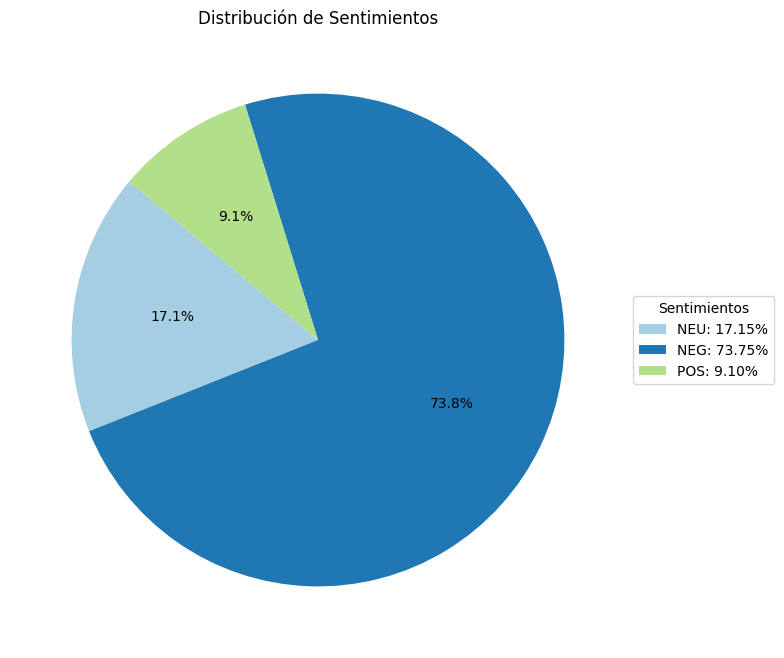

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_sentiment_percentages.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos")
legend_labels = [f"{sentiment}: {percentage:.2f}%" for sentiment, percentage in overall_sentiment_percentages.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [46]:
print("\nEjemplos de cada tipo de sentimiento:")
for sent_type, example in examples_per_sentiment.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento:
NEU: ["Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x", 'El gobierno debe crear un control estricto de inmigración en las zonas fronterizas con Colombia por q después del 20-8querrán venir en masa', '— Yo soy respetuoso con los demás, sólamente les recuerdo lo que son. Y si son escoria no es culpa mía. ... — ¡Claro que lo sé! ¿¡Por quién me tomas!?', '#Noticiasdelalinea: Detienen en Guatapanal motocicleta y nacional haitiano indocumentado https://t.co/qs9MTKddqK', 'Albondigas! Casi al estilo de las fodongas pero en el Gabacho.', '@elultimopeter Tu eres demasiado perra 😂', '@ValentinaaCruz Puteria y perico también somos almas gemelas excepto que tu eres puta desde él vientre.', 'I added a video to a @YouTube playlist https://t.co/lWXlQnkxyQ El Güero Bastidas - Enigma Norteño (2011)', 'Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.', 'Guyana recibirá $30 mil de Uni

--------------------------------------------


-----------------------------------------------

### Tweets de hate_speech

-----------------------------------------------


In [47]:
text_hate_speech = [text for text in df_semeval_train[df_semeval_train["hate_speech"] == 1]["text"].tolist()]
results_sentiment_analysis_hate_speech = [analyze_sentiment(text) for text in tqdm(text_hate_speech)]


  0%|          | 0/1833 [00:00<?, ?it/s]


-----------------------
Texto analizado: Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2518204152584076, 'NEU': 0.6687817573547363, 'POS': 0.07939779758453369}

-----------------------
Texto analizado: El gobierno debe crear un control estricto de inmigración en las zonas fronterizas con Colombia por q después del 20-8querrán venir en masa
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3522600531578064, 'NEU': 0.5988108515739441, 'POS': 0.04892905801534653}



  0%|          | 5/1833 [00:00<00:36, 50.00it/s]


-----------------------
Texto analizado: @MaivePerez Llora te lo.mereces por zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9475305080413818, 'NEU': 0.03619495779275894, 'POS': 0.016274424269795418}

-----------------------
Texto analizado: @mspn95 @SC_ESPN Callate gallina puta y cntala cmo quieras!! Bolso culo facil!! Jajajaaj hijooo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7605408430099487, 'NEU': 0.16857288777828217, 'POS': 0.07088631391525269}

-----------------------
Texto analizado: @enkarny282 @irenejunquera No tienes ni puta idea.la melodia es mi novia es sevillista...una puta mas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6239134669303894, 'NEU': 0.2658919095993042, 'POS': 0.11019464582204819}

-----------------------
Texto analizado: @elultimopeter Tu eres demasiado perra 😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.32556068897247314, 'NEU': 0.5739768743515015, 'POS': 0.10046244412660599}

-----------------------
Texto analizado: 


  1%|          | 10/1833 [00:00<00:38, 47.21it/s]


-----------------------
Texto analizado: Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16808286309242249, 'NEU': 0.7811136841773987, 'POS': 0.05080348998308182}

-----------------------
Texto analizado: @AngeAlvarez7 Callate perra, re despierta estoy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9066359996795654, 'NEU': 0.07017537951469421, 'POS': 0.023188628256320953}

-----------------------
Texto analizado: En ese listado deben estar de segundo los árabes y chinos que nos tienen jodidos. Vienen de sus países con una mano delante y una atrás y consiguen préstamos gigantescos para sus negocios y para maltratar al venezolano. Acá en margarita se ve mucho esa vaina https://t.co/gHdYmtl68V
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9538105130195618, 'NEU': 0.039173003286123276, 'POS': 0.007016473915427923}



  1%|          | 16/1833 [00:00<00:36, 49.85it/s]


-----------------------
Texto analizado: Querida tú eres una puta sin llenadero.. que dicen tus hijos de tu nuevo amor? Sigues siendo su ejemplo 🤣🤣🤣
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6195152401924133, 'NEU': 0.3494960069656372, 'POS': 0.03098878636956215}

-----------------------
Texto analizado: @DrodriguezVen tu eres la perra mas perra de las perras
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14082276821136475, 'NEU': 0.28287968039512634, 'POS': 0.5762975811958313}

-----------------------
Texto analizado: @MirandaLanda22 Ya callate pinche puta y celebra la navidad hija de perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9008587002754211, 'NEU': 0.06298128515481949, 'POS': 0.03615991026163101}

-----------------------
Texto analizado: A ver quién paga la factura y cómo se reparten el marrón de dejar inmigrantes ilegales sueltos por sus ciudades (y que los votantes no de lo hagan pagar dentro de un año)... https://t.co/CehRdJsSdU
Sentimiento dete


  1%|          | 22/1833 [00:00<00:34, 52.62it/s]


-----------------------
Texto analizado: La moronegrada está hundiendo el país a base d ser cobradores netos d pensiones, teroristas, robar, violar, traficar, petar el sistema penitenciario,educativo,judicial y sanitario...pero lo q importa es 1 negro q dice ser ingeniero  #NosTomanPorImbéciles  https://t.co/2pR0YPtNCA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9743778705596924, 'NEU': 0.022188762202858925, 'POS': 0.0034334769006818533}

-----------------------
Texto analizado: -¿Porque la esatua de la libertad es mujer? -Porque se nescesitaba una cabeza hueca para hacer un mirador
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7678716778755188, 'NEU': 0.21377892792224884, 'POS': 0.018349427729845047}

-----------------------
Texto analizado: Comemela XDDD y la cara también!! 🤣🤣🤣🤣🤣 — No nos pasemos 👀 https://t.co/t3o5yHY0zb
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3513820767402649, 'NEU': 0.5840281844139099, 'POS': 0.06458975374698639}



  2%|▏         | 28/1833 [00:00<00:35, 51.52it/s]


-----------------------
Texto analizado: @pauliboggino @soyunaforra cállate perra de mierda culona
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8949897289276123, 'NEU': 0.07298146933317184, 'POS': 0.03202873468399048}

-----------------------
Texto analizado: @_ArianaBelen Jajajaja vos cállate puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5421591997146606, 'NEU': 0.31581854820251465, 'POS': 0.1420222669839859}

-----------------------
Texto analizado: Eso, incompatible con ser moromierda, o musulmono. https://t.co/AMyOfhQVQy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8077903389930725, 'NEU': 0.18162554502487183, 'POS': 0.010584087111055851}

-----------------------
Texto analizado: @ash_london CALLATE PERRA LOCA CON METERTE CON LOUIS YA ES MUCHO . TE METES CON BARDERAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.957802951335907, 'NEU': 0.03403187915682793, 'POS': 0.008165152743458748}

-----------------------
Texto analizado: ¿para que se invent


  2%|▏         | 34/1833 [00:00<00:34, 51.96it/s]


-----------------------
Texto analizado: Se lo ha ganado a pulso, y ha sido muy comedido. Ese musulmono o se lo piensa la próxima vez. O le dan otra mayor. https://t.co/1NTIxMR11P
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.22289343178272247, 'NEU': 0.2516929507255554, 'POS': 0.5254135727882385}

-----------------------
Texto analizado: @vibrium_ JAJAJAJAJAJA El multitasking es lo de hoy: Perra en Instagram, emo en Twitter, ridículas por Facebook y divas en WhatsApp, todo a la misma vez y sin mezclar historias.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10207173228263855, 'NEU': 0.659577488899231, 'POS': 0.23835080862045288}



  2%|▏         | 40/1833 [00:00<00:35, 51.14it/s]


-----------------------
Texto analizado: @20m Lastima.... callate zorra!!!!!!!😠😠😠💩💩💩💩💩💩
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.85120689868927, 'NEU': 0.1348244547843933, 'POS': 0.013968700543045998}

-----------------------
Texto analizado: Antonio Adán: Mi novia es sevillista y es una puta mas | Sevilla 3 Real ... https://t.co/Pk1TYziPU8 vía @YouTube
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5336962342262268, 'NEU': 0.3723703622817993, 'POS': 0.09393336623907089}

-----------------------
Texto analizado: @anto07ro Siempre te hago el aguante callate, mña si perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1336759477853775, 'NEU': 0.5652561187744141, 'POS': 0.30106794834136963}

-----------------------
Texto analizado: Buenos dias, a trabajar en la fabrica para pagar a los refugiados y demas... gracias Sánchez por ser tan hijo de puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9453860521316528, 'NEU': 0.045260947197675705, 'POS': 0.00935301


  3%|▎         | 48/1833 [00:00<00:30, 58.51it/s]


-----------------------
Texto analizado: La policía británica permitió la violación de 1.000 niñas pobres por parte de árabes https://t.co/2uRICNLjO9 via @laotracara_co
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8399993181228638, 'NEU': 0.1433827430009842, 'POS': 0.016617899760603905}

-----------------------
Texto analizado: @rubenssambueza eres una basura de persona, lo cual no me sorprende porque eres SUDACA, y asi son los tercermundistas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9746232628822327, 'NEU': 0.020146101713180542, 'POS': 0.005230608396232128}



  3%|▎         | 57/1833 [00:00<00:26, 67.28it/s]


-----------------------
Texto analizado: Callate por zorra le dice Damián jajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8303422331809998, 'NEU': 0.11552807688713074, 'POS': 0.05412965267896652}

-----------------------
Texto analizado: Teñida del orto me dice el cara de artesanía prehispánica. Seguís siendo sudaca amigo, por algo no podes irte a tu alemania natal. https://t.co/zJQwgOL4Xp
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9529635906219482, 'NEU': 0.03620191663503647, 'POS': 0.010834514163434505}

-----------------------
Texto analizado: -¿Aquí es la oficina de atención contra el racismo? -Claro que sí, pásele pinche indio prieto sarrapastrozo ahorita lo atendemos, primero que pase el güero.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5178099870681763, 'NEU': 0.40819689631462097, 'POS': 0.07399311661720276}

-----------------------
Texto analizado: @BoffeGoals CALLATE QUE MAÑANA NOS VEMOS PERRA
Sentimiento detectado: NEU
Probabilidades: {'NEG'


  4%|▎         | 65/1833 [00:01<00:25, 70.62it/s]


-----------------------
Texto analizado: En este país, lo que hay que hacer de una puñetera vez, es que todo ilegal (sin papeles) sea deportado a su país de una vez. Ya vale de tanto buenismo y ayudas a inmigrantes antes que a los propios Españoles. https://t.co/yqWoWe40ae
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.970306932926178, 'NEU': 0.024069953709840775, 'POS': 0.005623192060738802}



  4%|▍         | 73/1833 [00:01<00:25, 69.85it/s]


-----------------------
Texto analizado: Llegarán en masa a Cartagena. De nosotros y nuestros gobernantes depende dar con la verdadera solución natural, los #camposdeautogestión de refugiados https://t.co/DP4JEeYl13 o dar paso a una invasión en toda regla en nuestras calles y la confrontación social de extremistas https://t.co/2cabgB9aTn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9198753237724304, 'NEU': 0.0715266689658165, 'POS': 0.008598008193075657}

-----------------------
Texto analizado: La zorra se queda callada porque sabe que mi combo es puro power 🔥
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14364448189735413, 'NEU': 0.7217669486999512, 'POS': 0.1345885992050171}

-----------------------
Texto analizado: @suicideroom22 Cállate que la que clava el visto sos vos Zorra 💔
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9587739109992981, 'NEU': 0.037402454763650894, 'POS': 0.0038235934916883707}

-----------------------
Texto analizado: No son subsaharian

  5%|▍         | 91/1833 [00:01<00:22, 78.49it/s]


-----------------------
Texto analizado: @Arthur_Zh69 CÓMO QUE TE FOLLAS A UNA PERRA Y OLVIDAS SU NOMBRE:0 Sí, bebé, me gusta mucho tu inglés, podrías enseñarme un poco
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5684174299240112, 'NEU': 0.3899724781513214, 'POS': 0.041610050946474075}

-----------------------
Texto analizado: Mierda,mierda y solo mierda viene de África, único sitio para recoger, toda esa basura, musulmono africana. https://t.co/ZLdMfxbjzk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9520782232284546, 'NEU': 0.04128764197230339, 'POS': 0.00663407938554883}

-----------------------
Texto analizado: Cállate puta, zorra, borracha, drogadictaaa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8347572088241577, 'NEU': 0.1228761151432991, 'POS': 0.04236666485667229}

-----------------------
Texto analizado: @MartuPerez_ O el de los flacos cuando te vienen a decir de todo, o sea, si tu novia es una zorra problema de ustedes no mio...
Sentimiento detecta

  6%|▌         | 109/1833 [00:01<00:21, 81.94it/s]


-----------------------
Texto analizado: REFUGIADOS SI, INMIGRANTES LOS NECESARIOS Y LOS QUE REALMENTE PODAMOS ATENDER, pienso que España sólo debería acoger y de una forma ordenada a inmigrantes latinoamericanos de habla española, cristianos, que... https://t.co/mo1PM2oR2l
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15819965302944183, 'NEU': 0.6437143087387085, 'POS': 0.19808606803417206}

-----------------------
Texto analizado: @Raviolsquad callate se me ve perfecta perra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10320202261209488, 'NEU': 0.1665089875459671, 'POS': 0.7302890419960022}

-----------------------
Texto analizado: @SrtoAdriGH abusaba de él, es una zorra merecía morir.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9602203369140625, 'NEU': 0.03062351793050766, 'POS': 0.009156161919236183}

-----------------------
Texto analizado: Campo de Refugiados en ESPAÑA 🇪🇸 Q gobierno tendrá Los Santos Cohones de poner fin SÍ o SÍ a este despropósito? #camp

  7%|▋         | 128/1833 [00:01<00:20, 84.78it/s]


-----------------------
Texto analizado: Os acordais de cuando decian los del lacito que preferian inmigrantes subsaharianos antes que españoles? Pues ala deseo concedido... Ya teneis barcelona plagada de manteros
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5998759269714355, 'NEU': 0.3490259051322937, 'POS': 0.051098186522722244}

-----------------------
Texto analizado: @PabloTinoco Cállate perra y ven a calentarme que hace frío. PD. Te extraño.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8403772711753845, 'NEU': 0.12924212217330933, 'POS': 0.03038063831627369}

-----------------------
Texto analizado: Esto es lo que la ONU/UNION EUROPEA/VATICANO/COMUNISTAS/SOCIALISTAS/PROGRES/NWO llevan de Africa a Europa...👇👇👇 Un inmigrante nigeriano mata y descuartiza a una joven italiana de 18 años. https://t.co/EaxYjwSsLt
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9110567569732666, 'NEU': 0.0818137377500534, 'POS': 0.007129482459276915}

-----------------------
Texto 

  8%|▊         | 146/1833 [00:02<00:19, 86.67it/s]


-----------------------
Texto analizado: @__wangpuppy Que voy yo y te pego con un pene en la cara cabrona
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7480539083480835, 'NEU': 0.18771781027317047, 'POS': 0.06422825157642365}

-----------------------
Texto analizado: harassand Pepe querido no te merecías el maltrato de esta puta… https://t.co/PupvavRFpF
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9765728116035461, 'NEU': 0.01860465295612812, 'POS': 0.004822576884180307}

-----------------------
Texto analizado: ¿Sabes lo que va a pasar? Yo lo veo muy claro. Pagaremos el pato los de abajo. Como sardinas de lata en la seguridad social. Las ayudas y becas colapsadas. Los manteros competencia desleal. Ya no tendremos sitio ni para recoger en las basuras.  https://t.co/MhFFHLYOIU
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9789515137672424, 'NEU': 0.018927348777651787, 'POS': 0.0021211940329521894}

-----------------------
Texto analizado: A mí esto de que los ileg

  9%|▉         | 164/1833 [00:02<00:20, 80.91it/s]


-----------------------
Texto analizado: @StayStrong2476 @SasuDep @Dellafuente_ tu que eres la comepollas groupie de dellafuente o que, callate la puta boca ya simio
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9422561526298523, 'NEU': 0.04744808375835419, 'POS': 0.010295746847987175}

-----------------------
Texto analizado: En un descuido y los güeros estén detrás de todo esto! https://t.co/p8IiBPxtHd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8412176370620728, 'NEU': 0.14030301570892334, 'POS': 0.018479416146874428}

-----------------------
Texto analizado: Y los españoles que no tienen dinero ni trabajo a dormir bajo puentes o en cajeros estamos guilipollas perdidos o que nos pasa primero ayudar a que no allá indigentes dandoles las mismas oportunidades que a los inmigrantes y cuando no hayan españoles en apuros ayudar a inmigrante https://t.co/Xxb1L522XM
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9516551494598389, 'NEU': 0.04498450458049774, 'POS': 0.0

 10%|▉         | 183/1833 [00:02<00:19, 85.50it/s]


-----------------------
Texto analizado: @leonelabeleenn ah callate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5717957019805908, 'NEU': 0.29729756712913513, 'POS': 0.13090670108795166}

-----------------------
Texto analizado: Tu chica es un poco guarra 😊 — Quién se supone que es mi chica https://t.co/bmgezed3wY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6750751733779907, 'NEU': 0.28756314516067505, 'POS': 0.037361785769462585}

-----------------------
Texto analizado: @medicengaribay Cállate zorra que él alcohólico aquí eres tú.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8946549892425537, 'NEU': 0.08745766431093216, 'POS': 0.01788727194070816}

-----------------------
Texto analizado: yo - me picó un animal wey. mi hermana - te lo mereces por zorra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8722778558731079, 'NEU': 0.0959438905119896, 'POS': 0.031778234988451004}

-----------------------
Texto analizado: @Alba_fcb14 Qué haces puta, cállat

 11%|█         | 201/1833 [00:02<00:18, 86.20it/s]


-----------------------
Texto analizado: Llegó el loquito más picante del condado, muy enojado, ta re apiolado. El que se coje a todo el patio de parado, y saca el choto todo cagado, acá en el barrio no queremos refugiados, sub 21 soy tu soldado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9309665560722351, 'NEU': 0.0598098486661911, 'POS': 0.009223598055541515}

-----------------------
Texto analizado: Los españoles pagamos por la Sanidad, los "sin papeles" no. Esta es la política de promoción de apátridas de Sánchez. Desde luego en España hay ya varias naciones, la española, la mauritana y la tribal subsahariana. Esto no es racismo, es la realidad. La integración es un mito.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9163486957550049, 'NEU': 0.07499484717845917, 'POS': 0.008656433783471584}

-----------------------
Texto analizado: Si son moromierdas o musulmonos, no pasa nada. Es una vergüenza. https://t.co/pT0IxUn6S9
Sentimiento detectado: NEG
Probabilidades: {'N


 11%|█▏        | 210/1833 [00:02<00:19, 84.63it/s]


-----------------------
Texto analizado: @AgusBenve10 Callate puta loca si sos un quebrado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9506604671478271, 'NEU': 0.0339696891605854, 'POS': 0.015369871631264687}

-----------------------
Texto analizado: VOY A PUBLICAR TU FOTO EN LA PRENSA PA QUE LA GENTE LO SEPA QUE TU ERES TREMENDA PERRA HIJUEPUTAAAAAAAA.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2240135222673416, 'NEU': 0.4734727740287781, 'POS': 0.3025136888027191}

-----------------------
Texto analizado: @MichuHeredia Y dsps aprobas mejor cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8478369116783142, 'NEU': 0.12398245185613632, 'POS': 0.028180651366710663}

-----------------------
Texto analizado: Estos son los que nos están invadiendo y nosotros acogiendo como refugiados y regalandoles todos nuestros servicios sociales https://t.co/iRPOROgtwW
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9544463753700256, 'NEU': 0.03889753296971321, 


 12%|█▏        | 220/1833 [00:02<00:18, 86.28it/s]


-----------------------
Texto analizado: @bbcmundo Lamentablemente ahora a todo le quieren llamar acoso, eso provocará radicalismo y falta de atención a casos reales que requerirán intervención penal, no caigamos en el juego de feminazis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.971981406211853, 'NEU': 0.024483686313033104, 'POS': 0.0035347756929695606}

-----------------------
Texto analizado: Pues francamente sería raro.  Como veros a vosotros en la mierda de los Goya denunciando a Maduro, las violaciones cometidas por manadas magrebíes, o el trato de favor a fuertes subsaharianos frente a nuestros débiles y cansados abuelos.  #FelizDomingo https://t.co/1tPqs65eXZ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9547317028045654, 'NEU': 0.04052726924419403, 'POS': 0.004740945063531399}

-----------------------
Texto analizado: @amparolasheras @gabrielrufian Amparo un porro Amparo po zi😂😂😂era bastante mejor persona q tú pq tú eres una perra sarnosa ponte el chip por si


 12%|█▏        | 229/1833 [00:03<00:18, 85.08it/s]


-----------------------
Texto analizado: @Alejanputa así es la escuela no vale madres, pretende enseñarle a las niñas que ser puta no es moral :/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9857828617095947, 'NEU': 0.011661320924758911, 'POS': 0.0025558494962751865}

-----------------------
Texto analizado: Currently reading https://t.co/aBtfL4OvM1 CUANDO VAYAN PERDIENDO EL MIEDO SE IRAN HACIENDO DUEÑOS DE LAS CALLES EN FORMA VIOLENTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6599951982498169, 'NEU': 0.31511619687080383, 'POS': 0.02488863840699196}

-----------------------
Texto analizado: @LVidegaray #Urgente parar inmigracion legal o ilegal a Mexico donde Criminales y Terroristas de otros paises , toman al Pais como Refugio de su criminalidad #RevolucionIndestructible
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8991836905479431, 'NEU': 0.09180747717618942, 'POS': 0.009008720517158508}

-----------------------
Texto analizado: Que les pasa a todos que me 


 13%|█▎        | 238/1833 [00:03<00:19, 80.93it/s]


-----------------------
Texto analizado: Callate zorra chupa pija
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8614814281463623, 'NEU': 0.08284987509250641, 'POS': 0.055668752640485764}

-----------------------
Texto analizado: #Catalunya #Canarias no queremos indocumentados en nuestro pais desde Barcelona hasta #lanzarote existen estas mafias que no cotizan vendiendo en la calle arruinando a los pequeños negocios y prostituyendo a las mujereS  #Idonotwantmafias in #Spain 🇪🇸 https://t.co/QkByE3bDnb
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6949847936630249, 'NEU': 0.2892514169216156, 'POS': 0.01576383039355278}

-----------------------
Texto analizado: Pues a mi el hebreo o lo que farfullan los sionistas me suena muy parecido al árabe. Lo digo por lo racistas que son con todo lo que este relacionado con los árabes. https://t.co/bdXtFVeDr0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.952019453048706, 'NEU': 0.04142323508858681, 'POS': 0.006557319778949022}

-


 13%|█▎        | 247/1833 [00:03<00:19, 80.19it/s]


-----------------------
Texto analizado: @ArmadaEspaola TU ERES UNA PUTA DE NOM GUARRA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9232452511787415, 'NEU': 0.05279943346977234, 'POS': 0.02395525574684143}

-----------------------
Texto analizado: Y el inmigrante recibe ayuda del rico Estado ladrón, que se olvida de los nacionales, mientras nos viola y mata. Pintada con una verdad a medias. https://t.co/4icBlhB3j9
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9588727355003357, 'NEU': 0.0337802916765213, 'POS': 0.007346930913627148}

-----------------------
Texto analizado: Puta, deja de enseñarme el tenedor. Hacía apenas cinco minutos había tenido fuerza suficiente para clavárselo y ahora no la tenía ni para mirarlo. ¿Qué hacíamos? Me echo a reír entre dientes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8469306826591492, 'NEU': 0.13755175471305847, 'POS': 0.015517603605985641}

-----------------------
Texto analizado: @infobae Yo te prenderia fuego por perra 


 14%|█▍        | 256/1833 [00:03<00:19, 79.89it/s]


-----------------------
Texto analizado: nos estamos dando cuenta tarde que hijos arabes, por ej en zona sur de argentina son una maldicion
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9556139707565308, 'NEU': 0.041133567690849304, 'POS': 0.003252472495660186}

-----------------------
Texto analizado: Saltan la valla al grito de ‘racistas’. (video) https://t.co/yTZ2ajQb4M https://t.co/S6UrsjjuGY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7398205399513245, 'NEU': 0.21007013320922852, 'POS': 0.050109341740608215}



 14%|█▍        | 265/1833 [00:03<00:19, 81.82it/s]


-----------------------
Texto analizado: Pues este año, aparte del montón de moros de siempre, he visto una jartá de árabes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.737244188785553, 'NEU': 0.22777211666107178, 'POS': 0.034983694553375244}

-----------------------
Texto analizado: No es machismo pero yo creo que las mujeres son inferiores que los hombres. Lo que hay que leer.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.870376706123352, 'NEU': 0.11450040340423584, 'POS': 0.015122874639928341}

-----------------------
Texto analizado: @SombriXX @aixiNOOO @InesArrimadas Callaté perra, que es la cuenta B de arrimadas?? 😱😱
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8067942261695862, 'NEU': 0.18060965836048126, 'POS': 0.012596113607287407}

-----------------------
Texto analizado: @KarenLoveNow Qué buenos vídeos! Eso y más te mereces por puta y caliente. Todavía te faltó uno más en la boca.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.012422689236700535


 15%|█▍        | 274/1833 [00:03<00:18, 82.96it/s]


-----------------------
Texto analizado: #EXCLUSIVA:  Pablo Casado propone colgar jamones, morcillas y salchichones en la valla de Melilla, para evitar que los musulmanes la salten.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3580699563026428, 'NEU': 0.5846211314201355, 'POS': 0.057308975607156754}

-----------------------
Texto analizado: @mendezr_agus jajajajajajaja perra te lo merecías
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.049376823008060455, 'NEU': 0.08258580416440964, 'POS': 0.8680373430252075}



 15%|█▌        | 283/1833 [00:03<00:18, 84.09it/s]


-----------------------
Texto analizado: Sé que no me conoces pero quería enseñarte la clase de zorra que es tu novia😃
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03338761627674103, 'NEU': 0.19584190845489502, 'POS': 0.7707704901695251}

-----------------------
Texto analizado: Vecina chupa pija callate la boca que cantas horrible la puta que te pario
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9689397811889648, 'NEU': 0.019570806995034218, 'POS': 0.011489486321806908}

-----------------------
Texto analizado: LO QUE A EUROPA NO LE GUSTA OIR Y LE LLAMA POPULISMO: LA INVASION AFRICANA, desde dónde salen los asaltos a las vallas, las decenas de pateras con inmigrantes ilegales, y los contínuos fardos de haschis?,... https://t.co/NAqdEEtMDz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9607234597206116, 'NEU': 0.03449897840619087, 'POS': 0.004777500405907631}

-----------------------
Texto analizado: @FrankliLeonardo Cállate perra. Jajajaja
Sentimiento detectado:


 16%|█▌        | 292/1833 [00:03<00:18, 84.65it/s]


-----------------------
Texto analizado: @elisacarrio Cállate gorda hija de puta, las veces que te vi entrar en la iglesia de Av Santa Fe, no haberte mandado a la concha de tu madre . Chupa pija de represores chaqueños.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.953477144241333, 'NEU': 0.033629707992076874, 'POS': 0.012893146835267544}

-----------------------
Texto analizado: Tú eres de los 70’ Y yo soy una zorra de los 90’
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7161434888839722, 'NEU': 0.25121960043907166, 'POS': 0.032636865973472595}



 16%|█▋        | 301/1833 [00:03<00:17, 85.51it/s]


-----------------------
Texto analizado: @ConElMazoDando Tú eres la perra entre las perras que hay. Perra inmunda, hedionda, malparida, puerca, ladrona, sucia, asesina, pecuecua!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9385669231414795, 'NEU': 0.041704095900058746, 'POS': 0.019728943705558777}

-----------------------
Texto analizado: Ya ando bien pedo mi razita, mi vieja bailando la muy puta enseñando las nalgas.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10549864917993546, 'NEU': 0.2667589485645294, 'POS': 0.627742350101471}

-----------------------
Texto analizado: @toxiclxui tú eres mi puta no, mi putisima favorita❤
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4664490222930908, 'NEU': 0.2263154536485672, 'POS': 0.30723556876182556}

-----------------------
Texto analizado: @Mzavalagc Pinche-perra asesina de los niños de la guarderia abc.vete tu eres la peor delincuente, corrupta ratera, asesina , mierda, chorrillo, de la mierda llamada calderrata y d


 17%|█▋        | 310/1833 [00:04<00:18, 81.68it/s]


-----------------------
Texto analizado: La ven más perra que ellas y siempre están criticando. Estás mujeres que viven en competencia son una comedia. Ridículas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9698871374130249, 'NEU': 0.022535232827067375, 'POS': 0.007577759679406881}

-----------------------
Texto analizado: QUE haces con cc mogolica pili — Puta tomi callate https://t.co/1ceUx5zHuc
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9509089589118958, 'NEU': 0.037947408854961395, 'POS': 0.01114355493336916}



 17%|█▋        | 319/1833 [00:04<00:18, 79.91it/s]


-----------------------
Texto analizado: @InesVelo Ay ya callate mejor perra ve a decir eso afuera de Twitter https://t.co/YpqgWtzB07
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8014904260635376, 'NEU': 0.16735737025737762, 'POS': 0.031152164563536644}

-----------------------
Texto analizado: @YazminCantuT @ClubAmerica @eduardoushito Cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6966406106948853, 'NEU': 0.22371578216552734, 'POS': 0.07964355498552322}

-----------------------
Texto analizado: @caamibotella Callate puta , vamos a hacer algo q me aburro
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9056268930435181, 'NEU': 0.08044806867837906, 'POS': 0.013925047591328621}

-----------------------
Texto analizado: La infaltable oxigenada aspiracional. Una pobre y patética copia sudaka d TODO lo ke hacen los gringos. ¿Qué irá a hacer esta farándula-edil cuando los gringos se les ocurra comer caca? https://t.co/XoPGn66cfv
Sentimiento detectado: NEG
Pro

 18%|█▊        | 338/1833 [00:04<00:18, 82.26it/s]


-----------------------
Texto analizado: @_JBonilla_ @CanalYesTV Cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7031181454658508, 'NEU': 0.21309110522270203, 'POS': 0.08379073441028595}

-----------------------
Texto analizado: @califffournia callate puta x lo menos yo tengo la custodia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5002968311309814, 'NEU': 0.37966135144233704, 'POS': 0.12004180252552032}

-----------------------
Texto analizado: @Pardobrrisa Te mereces eso y más, porque a mi no me dejas dormir zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9037222862243652, 'NEU': 0.06242334097623825, 'POS': 0.03385434299707413}

-----------------------
Texto analizado: -Sin ETA esto no será lo mismo Albert, ¿cómo haremos para asustar a los paletos? Lo de Venezuela ya no se lo traga ni el más imbécil... -No me seas lila Pablo, tenemos a los negratas y los moros que vienen por millones a quitarnos el pan joderrrr! https://t.co/XrcvQb3YXa
Sentimien

 19%|█▉        | 356/1833 [00:04<00:17, 83.96it/s]


-----------------------
Texto analizado: ¿Qué dices, cerda? No puedo oirte con mi polla en tu garganta ja ja ja ja ja https://t.co/zxa50ayGcX
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8522610664367676, 'NEU': 0.12667317688465118, 'POS': 0.021065734326839447}

-----------------------
Texto analizado: @Untrust666 Cállate ok? Se aman déjalos, vida solo hay una perra.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3721216022968292, 'NEU': 0.5271168351173401, 'POS': 0.1007615476846695}

-----------------------
Texto analizado: @Antweetmoral tú cállate hija de perra https://t.co/rHAD9hosVI
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6059303879737854, 'NEU': 0.30435729026794434, 'POS': 0.08971232920885086}

-----------------------
Texto analizado: Estos dos moromierdas son los que han matado a Adrien. R.I.P. https://t.co/WTJUSDeVwn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9670884013175964, 'NEU': 0.0265544131398201, 'POS': 0.00635718647390604}

---------

 20%|██        | 374/1833 [00:04<00:17, 83.30it/s]


-----------------------
Texto analizado: @IamYanetGarcia puta pendeja zorra me cagas imbecil deja de putear pinche golfa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9532882571220398, 'NEU': 0.026323555037379265, 'POS': 0.020388199016451836}

-----------------------
Texto analizado: Su novia es puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6877135038375854, 'NEU': 0.24445216357707977, 'POS': 0.06783440709114075}

-----------------------
Texto analizado: @flasherius callate zorra del orto estoy en wilde dame bola
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8943884372711182, 'NEU': 0.08619121462106705, 'POS': 0.0194203220307827}

-----------------------
Texto analizado: @Franciscodagst no veo la correa de perra para que te traten como mereces
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.48259237408638, 'NEU': 0.4171956181526184, 'POS': 0.10021204501390457}

-----------------------
Texto analizado: ¿Por que las mujers fingen cuando hacen el amor? Por 


 21%|██        | 383/1833 [00:04<00:18, 78.12it/s]


-----------------------
Texto analizado: En estas noticias siempre me voy a leer el final.  Sí. Ahí donde pone eso de: "...un individuo de origen MAGREBÍ..."  Y si no lo encuentro entonces sé que era SUBSAHARIANO.  #inmigración #InmigrantesNO #inmigrantes  #africanos  https://t.co/damfo31UhG
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.26646894216537476, 'NEU': 0.7112349271774292, 'POS': 0.022296074777841568}

-----------------------
Texto analizado: Me encanta mi vestido de mujerzuela zorra suripanta. No se los voa enseñar…aún.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1429203599691391, 'NEU': 0.44814369082450867, 'POS': 0.4089360237121582}

-----------------------
Texto analizado: Ya por fin con 98% libre de puntas güeras https://t.co/BduFMrM6GF
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01627415046095848, 'NEU': 0.13374550640583038, 'POS': 0.8499804139137268}

-----------------------
Texto analizado: Menos mal que el ínclito Marlasca nos ha abierto los 


 21%|██▏       | 391/1833 [00:05<00:18, 78.07it/s]


-----------------------
Texto analizado: Así como a muchos les encabrona que les digan negros a mi tambien me encabrona y doble que me digan güera, para mí no es un alago ni mucho menos superioridad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9207490682601929, 'NEU': 0.06067840754985809, 'POS': 0.01857246831059456}

-----------------------
Texto analizado: tu vete a la verga, puto sudaca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8756148219108582, 'NEU': 0.07728734612464905, 'POS': 0.047097813338041306}

-----------------------
Texto analizado: me encanta lo guarra que eres, te follaria hasta provocarte un nuevo desgarro vaginal — si provocas un desgarro vaginal follando follas bastante mal https://t.co/j8U6umdicd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7410444021224976, 'NEU': 0.12079344689846039, 'POS': 0.13816213607788086}

-----------------------
Texto analizado: Si somos sudacas que no se note (?) https://t.co/XD4UoApwoL
Sentimiento detectado: NEU



 22%|██▏       | 399/1833 [00:05<00:19, 75.35it/s]


-----------------------
Texto analizado: @PaulaOrtizz Callate que si saliste sobria maldita perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8899441361427307, 'NEU': 0.08666238188743591, 'POS': 0.023393454030156136}

-----------------------
Texto analizado: @CutieMoon_ CÁLLATE, ERES PERFECTO MALDITA SEA NO LE HAGAS CASO A LA PERRA ZORRA DE TITÁN, QUE TE VALGA PUTA VERGA LO QUE DIGA, AAAAAAAAH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8605961203575134, 'NEU': 0.08035659044981003, 'POS': 0.059047285467386246}

-----------------------
Texto analizado: Comportamiento ejemplar.. no paga billete se cuela, le pillan y se pone chulo y amenaza, que buena es la inmigración sin control, nos entran personas agradables, amables que solo buscan estar encima tuya.. pero no pasa nada. https://t.co/xjoBQnfMxs
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10458780080080032, 'NEU': 0.1451214849948883, 'POS': 0.7502907514572144}

-----------------------
Texto analizado: Un pol


 22%|██▏       | 407/1833 [00:05<00:18, 75.21it/s]


-----------------------
Texto analizado: Apuesto que eres tan zorra que si alguien se acuesta contigo adquiere una ETS — Yo soy casi virgen asi que cállate https://t.co/XGUf0fGfQc
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9111889004707336, 'NEU': 0.08117437362670898, 'POS': 0.007636740803718567}

-----------------------
Texto analizado: @karlishgs No, tu eres puta y casta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5533580183982849, 'NEU': 0.3579169809818268, 'POS': 0.08872495591640472}

-----------------------
Texto analizado: Europa ni se ha enterado ni se quiere enterar de la inmigración masiva ni de la colonización musulmana, hasta que sea demasiado tarde... En cuanto a Marruecos un pais chantajista y lo estamos viendo despues de haber violado nuestras fronteras esta horda de subsaharianos...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9746151566505432, 'NEU': 0.02248072437942028, 'POS': 0.002904139459133148}

-----------------------
Texto analizado: @


 23%|██▎       | 415/1833 [00:05<00:18, 76.00it/s]


-----------------------
Texto analizado: Ojala recibamos mas inmigrantes como tu y no putos negratas,no soy racista,yo respeto mucho a los latinos — gilipollas https://t.co/6t48llaVXg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6930720210075378, 'NEU': 0.16527076065540314, 'POS': 0.1416572779417038}

-----------------------
Texto analizado: @_Sofiasosa_ Callate si ni me mandas zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9174496531486511, 'NEU': 0.059649232774972916, 'POS': 0.02290111966431141}

-----------------------
Texto analizado: me follo a los negratas
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.35980933904647827, 'NEU': 0.4971884787082672, 'POS': 0.14300218224525452}

-----------------------
Texto analizado: @_E_Villalva Jajajajajajajajajajajajajjajajajajajaja cállate puta reventada. En 4 años me recibo ahre yaki
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4486311674118042, 'NEU': 0.4464709162712097, 'POS': 0.1048978641629219}

--------


 23%|██▎       | 423/1833 [00:05<00:18, 76.38it/s]


-----------------------
Texto analizado: Por que las mujeres van de a 2 al baño? por mientras una caga la otra le aprieta la cabeza para que salga toda la mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9374921917915344, 'NEU': 0.058854714035987854, 'POS': 0.0036531558725982904}

-----------------------
Texto analizado: Cuando el coreano se pone caliente pero tu eres una perra fria mas fria que rusia gil culiao nomas https://t.co/qFF6eunZLt
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9389687776565552, 'NEU': 0.052238184958696365, 'POS': 0.008793048560619354}

-----------------------
Texto analizado: @LynaVallejosFan tu eres puta aquí , si no te gusta lyna tampoco para andarla insultando por el mundo estupida de mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.902819812297821, 'NEU': 0.07990334928035736, 'POS': 0.017276857048273087}



 24%|██▎       | 431/1833 [00:05<00:18, 76.01it/s]


-----------------------
Texto analizado: Que pelotudos son los religiosos. Los árabes pueden ser judíos, cristianos, musulmanes. Lástima que los judíos se creen ‘una raza superior’. https://t.co/VqM8MvLJ5R
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9483234286308289, 'NEU': 0.03966632857918739, 'POS': 0.012010296806693077}

-----------------------
Texto analizado: @MohikanoLoco @JustTonight_97 Sé mi putita. Llámame guarra MUERDEME LOS PEZONES ayyyys ve a buscar al niño al cole.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4404067397117615, 'NEU': 0.47428131103515625, 'POS': 0.08531194180250168}

-----------------------
Texto analizado: ¿cual es el dia de la mujer? -El dia menos pensado-
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1749039888381958, 'NEU': 0.7849705219268799, 'POS': 0.04012550413608551}

-----------------------
Texto analizado: @La_Gr0sera Si vas a enseñar Enséña bien hija de tu puta madre siempre es la misma mierda... PENDEJA
Sentimiento detec


 24%|██▍       | 440/1833 [00:05<00:17, 78.29it/s]


-----------------------
Texto analizado: @lortegadiaz Coño eh tu madre maldita perra pudrete mamagueba Tu eres culpable
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.832855761051178, 'NEU': 0.11405891180038452, 'POS': 0.053085386753082275}

-----------------------
Texto analizado: Según mi abuela Natacha Jaitt se merecía que le pegue su ex. Por haberle hecho 'eso' a Latorre, por qué es puta, por qué salió tarde, por qué fue mala toda la vida. https://t.co/cMGdAYrkdC
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9696798324584961, 'NEU': 0.02622443623840809, 'POS': 0.00409573782235384}

-----------------------
Texto analizado: Perro @amarchesin1 ponte a leer sudaca https://t.co/ERwBeNGsdg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7805221080780029, 'NEU': 0.17905904352664948, 'POS': 0.04041889309883118}



 24%|██▍       | 449/1833 [00:05<00:17, 79.53it/s]


-----------------------
Texto analizado: Acabas en los calabozos t desahucian d tu casa y si t atreves a protestar, t denuncian por ser una sin papeles y t mandan d vuelta a tu pais de origen por ilegal.Vamos lo mismo que si entras en España ilegalmente. Ahhh no q aquí t dan papeles y una paga. Seran Fachas en España. https://t.co/VsAnkVIKIY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9397443532943726, 'NEU': 0.054197296500205994, 'POS': 0.006058338098227978}

-----------------------
Texto analizado: @cualquiercositv @elonmusk CALLATE PUTA DE MIERDA, RESPETA AL DIOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8959960341453552, 'NEU': 0.07578738778829575, 'POS': 0.028216563165187836}

-----------------------
Texto analizado: PA Q TU ME RECLAMAS, HAY MILES DE MUJERES Q DICEN Q ME AMAN PERO TU ERES LA PUTA Q SIEMPRE YO MONTO EN EN LA CAMA
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.472621351480484, 'NEU': 0.4835585355758667, 'POS': 0.0438200943171978}

--------


 25%|██▍       | 458/1833 [00:05<00:16, 81.07it/s]


-----------------------
Texto analizado: @VictoriaChi_ Puta que sad callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9372817873954773, 'NEU': 0.04683472216129303, 'POS': 0.015883471816778183}

-----------------------
Texto analizado: Ya si eso, después de los negros, moros, sudacas, chinos y demás, ya si eso, nos centramos en ayudar a españoles en ESPAÑA. Hijo de puta traidor. https://t.co/bj0wloOTzm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9561276435852051, 'NEU': 0.03200848028063774, 'POS': 0.011863859370350838}

-----------------------
Texto analizado: Todo es ji ji y ja ja con los chistes sobre árabes y bombas hasta que te toca con uno de ellos en un vuelo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.46718913316726685, 'NEU': 0.47030678391456604, 'POS': 0.06250403821468353}

-----------------------
Texto analizado: @AngieDeviluke Lo unico que te mereces por ser una puta barata jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7438276410102


 25%|██▌       | 467/1833 [00:06<00:16, 82.75it/s]


-----------------------
Texto analizado: CÁLLATE PUTA ZORRA BORRACHA DROGADICTA https://t.co/60lgyRsEfk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8967710733413696, 'NEU': 0.07270123064517975, 'POS': 0.03052772954106331}

-----------------------
Texto analizado: la novia es mas puta y el pelotudo sigue estando con ella , ni pa bosta la mina mas zorra y el ni hablar mas gil todavía , le re kbio
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9642747640609741, 'NEU': 0.02848958410322666, 'POS': 0.007235726807266474}

-----------------------
Texto analizado: Que horrible verte así Sofi, como te voy a extrañar mi perra loca! Espero que estes en un lugar mejor, y tengas todo lo que mereces!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9241175651550293, 'NEU': 0.04820195585489273, 'POS': 0.027680443599820137}

-----------------------
Texto analizado: NADA COLAU @AdaColau⁩ la protectora de moromierdas delincuentes y violadores tapa otra reyerta de #Manteros en #Barcelo


 26%|██▌       | 476/1833 [00:06<00:16, 81.60it/s]


-----------------------
Texto analizado: #OmarPrieto, gobernador del Zulia, anunció que extranjeros indocumentados serán deportados. #extranjeros en #venezuela? El unico #extranjero que toda #venezuela queremos #deporten se llama @NicolasMaduro #MaduroGenocida #MaduroAcabóConVzla #maduroesmuerte
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6576535701751709, 'NEU': 0.3250945806503296, 'POS': 0.017251882702112198}

-----------------------
Texto analizado: @MauricioMaurox @alansaldana7 Ojala usaras vestidos y tacos para que seas felíz como mereces perra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.025279268622398376, 'NEU': 0.15802094340324402, 'POS': 0.8166998028755188}

-----------------------
Texto analizado: @beleen0 Cállate zorra que no fuiste capaz de contestar mi mensaje 😒
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9680777788162231, 'NEU': 0.027123404666781425, 'POS': 0.004798817448318005}



 26%|██▋       | 485/1833 [00:06<00:17, 79.19it/s]


-----------------------
Texto analizado: Los comunistas, han pasado de disparar a los que huyendo saltaban el muro en Berlín, a si eres subsahariano darte paguita @iunida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9279443621635437, 'NEU': 0.06203988566994667, 'POS': 0.010015707463026047}

-----------------------
Texto analizado: @TowandaRebels Soy puta y sois las mujeres más repugnantes que espero nunca tirarme a la cara nadie nos obliga y NO ME VIOLAN
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.939713716506958, 'NEU': 0.04359408840537071, 'POS': 0.01669221930205822}

-----------------------
Texto analizado: @YolandaRuizRCN @elespectador Se puede llamar acoso cuando algunas mujeres usan minifaldas, escotes, descaderados, transparencias etc, para provocarnos ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.865865170955658, 'NEU': 0.12691237032413483, 'POS': 0.007222413085401058}

-----------------------
Texto analizado: @AixaGimenez18 Callate puta y anda a dorm


 27%|██▋       | 494/1833 [00:06<00:16, 81.53it/s]


-----------------------
Texto analizado: Que nacionalidad o etnia crees que se adapta mejor a la vida occidental europea (tema derechos y libertades, mujer, lgtb, convi... — Pf... Mejor... Chinos, porque yo creo que ya estamos muy acostumbrades y idk  Peor, los árabes yo... https://t.co/YcmdcFwxcg
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33974790573120117, 'NEU': 0.6388822793960571, 'POS': 0.02136981673538685}

-----------------------
Texto analizado: m da miedo cuando me sigue un árabe
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9374704957008362, 'NEU': 0.058457061648368835, 'POS': 0.004072492476552725}

-----------------------
Texto analizado: @Anita_Romi Cállate la puta boca challenge no eres una mierda de persona y si te draggean pues las cogemos y las matamos https://t.co/uZThUJRoPD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9351774454116821, 'NEU': 0.0463859960436821, 'POS': 0.01843656785786152}

-----------------------
Texto analizado: este tipo e


 27%|██▋       | 503/1833 [00:06<00:16, 82.87it/s]


-----------------------
Texto analizado: Pasan las horas y @ahorapodemos aún no ha convocado ninguna manifa en apoyo a esta menor.   Ninguna femiNAZI se solidariza con ella. Parece que si los violadores son inmigrantes, es menos delito que si lo hace un Español  https://t.co/GTE5kBufJ7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.958617627620697, 'NEU': 0.0354069285094738, 'POS': 0.00597536563873291}

-----------------------
Texto analizado: @CerGamer_ @DewcesUhc Bueno tú eres su perra, no yo.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22131019830703735, 'NEU': 0.5579191446304321, 'POS': 0.2207707017660141}

-----------------------
Texto analizado: niña de 25 años de edad, atacada hace días en la estación de Milán, fue rescatada de una violación con spray de pimienta. Arrestaron al violador hoy. P.d. no puedo decirte que es un nigeriano inmigrante, clandestino y con antecedentes criminales, de lo contrario me acusan de. https://t.co/zaDbI9bnfw
Sentimiento detectado: 

 28%|██▊       | 521/1833 [00:06<00:15, 83.35it/s]


-----------------------
Texto analizado: @jcastle1995 mejor cállate perra lmao
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7697077989578247, 'NEU': 0.19110634922981262, 'POS': 0.03918580338358879}

-----------------------
Texto analizado: @LaDivinaDiva Callate maldita perra. O seguro eres un pobre marico detras de un user femenino. Chavista colaborador
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8987017273902893, 'NEU': 0.08218103647232056, 'POS': 0.019117282703518867}

-----------------------
Texto analizado: @DeboraGarrido15 Cállate perra del infierno 😭
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9142213463783264, 'NEU': 0.07411019504070282, 'POS': 0.011668427847325802}

-----------------------
Texto analizado: @AlemanS_ jajajajaj cállate perra, cumplime y súmale que me debes ir 1’ al Tasty Rails ‘conmigo’ 🤨
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.36277294158935547, 'NEU': 0.6027690768241882, 'POS': 0.03445794805884361}

----------------------


 29%|██▉       | 530/1833 [00:06<00:15, 84.84it/s]


-----------------------
Texto analizado: Zorra, puta arrastrada, eres una mierda, espero que algún día mueras, no mereces ese poco cariño que te dan. Son casi siempre los mismos insultos y llegan en los peores momentos, daría cualquier cosa por saber quién mierda es o son esos anónimos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.980430006980896, 'NEU': 0.014486975967884064, 'POS': 0.005083043128252029}

-----------------------
Texto analizado: Esta invasión continuada de subsaharianos,no se cuanto nos cuesta,imagino que cantidades astronómicas. Por qué no empleamos esta pasta en hacer que vuelvan los españoles que tenemos por el mundo, médicos,investigadores,y demás profesionales.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9421327710151672, 'NEU': 0.05412740632891655, 'POS': 0.0037398692220449448}

-----------------------
Texto analizado: Un inmigrante en Alemania. Se mea en sus leyes políticamente correctas. Están perdiendo sus países y aún no se dan cuenta. Este 


 29%|██▉       | 539/1833 [00:06<00:15, 85.92it/s]


-----------------------
Texto analizado: @juantaverash El acoso en la mujer es tan solo cuando el hombre no le gusta, si el hombre le gustara, no fuera acoso!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8693462610244751, 'NEU': 0.12109536677598953, 'POS': 0.009558377787470818}

-----------------------
Texto analizado: @Darkeph Ella es más bonita, tú eres más perra.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.035848475992679596, 'NEU': 0.14020751416683197, 'POS': 0.8239439725875854}

-----------------------
Texto analizado: @YVONNEDELATORRE @irenegaro @EPN @t2xmx @lopezdoriga Ya callate puta que no te hartas de escribir estupideces? Prostituta del sistema, viejita de mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9478451609611511, 'NEU': 0.04203275591135025, 'POS': 0.010122005827724934}

-----------------------
Texto analizado: @JessicaAvilez1 Tú eres perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4205401539802551, 'NEU': 0.4323237538337707


 30%|██▉       | 548/1833 [00:06<00:14, 86.70it/s]


-----------------------
Texto analizado: Que cojones les pasa al gobierno y a todos los que salieron contra la manada, tanto os acojonan los #moromierdas que no decís ni "mu"? https://t.co/C2oOx3lWaK
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.97782963514328, 'NEU': 0.017098255455493927, 'POS': 0.005072042346000671}

-----------------------
Texto analizado: ESTA MUJER ES UNA VERDADERA PERRA......SERA QUE SE EMBRIAGA CON LA SANGRE QUE DERRAMA EL PUEBLO HUMIDE ARGENTINO? https://t.co/InR3jvSOYm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8414950966835022, 'NEU': 0.13761894404888153, 'POS': 0.02088598906993866}

-----------------------
Texto analizado: Gracias a ⁦@AdaColau⁩ nos están, LES ESTÁN más bien poniendo finos en la prensa internacional y en concreto estadounidense. 👉 “Un moromierda ilegal ha tratado de matar un turista americano cortándole la femoral con la hebilla de un cinturón”. OLE!!  https://t.co/jvIP49ce4c
Sentimiento detectado: POS
Probabilidades: {'NEG'


 30%|███       | 557/1833 [00:07<00:14, 86.49it/s]


-----------------------
Texto analizado: Enseñan al pueblo Español a amedrentarse frente a un enemigo, yo enseño a mis hijos a saber defenderse, sea mantero, presidente del gobierno o saltador negro de la valla de Melilla!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7935534715652466, 'NEU': 0.17496775090694427, 'POS': 0.03147872909903526}

-----------------------
Texto analizado: Nadie se queja de los inmigrantes currantes, sino de los que vienen a vivir de la sopa boba, y esos, casi todos, llegan saltando la valla.   #PdV06A
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7528066039085388, 'NEU': 0.22626401484012604, 'POS': 0.020929468795657158}

-----------------------
Texto analizado: @120_0823 @PerroMariguano_ Tú eres la más pendeja y espantosa sirvienta provinciana.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9620542526245117, 'NEU': 0.02940596267580986, 'POS': 0.008539690636098385}

-----------------------
Texto analizado: Dentro de poco vamos a tener mal

 31%|███▏      | 575/1833 [00:07<00:15, 81.45it/s]


-----------------------
Texto analizado: @Shrlttw Callate puta sidosa de mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9078737497329712, 'NEU': 0.06672699749469757, 'POS': 0.025399278849363327}

-----------------------
Texto analizado: @mraubreygrey @sweetskipp asi me gusta amor bien rica enseñando las tetas ricas que tienes perra rica
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.005854466930031776, 'NEU': 0.03816384822130203, 'POS': 0.9559817314147949}

-----------------------
Texto analizado: @ash_london Eres tan hipócrita, que no mereces ni los insultos. Pero me voy a sacrificar, perra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9272732734680176, 'NEU': 0.04966691881418228, 'POS': 0.023059917613863945}

-----------------------
Texto analizado: @AngieDeviluke Te mereces toda mi verga por puta hermosa y para festejar año nuevo como la zorra come semen que eres hermosa
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.020225265994668007, 'NEU': 0.058

 32%|███▏      | 593/1833 [00:07<00:14, 83.26it/s]


-----------------------
Texto analizado: @alan15537141 Callate que después me andas abrazando puta loca jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8874980807304382, 'NEU': 0.08199960738420486, 'POS': 0.03050229325890541}

-----------------------
Texto analizado: Igual me quedo sin trabajo pero la zorra de la encargada se pensaba que me iba a quedar callada y hoy no he aguantado más, caliente hija de puta que he salido llorando y todo del trabajo :___
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9750937819480896, 'NEU': 0.02107786387205124, 'POS': 0.0038283998146653175}

-----------------------
Texto analizado: Si escucha tus gemidos obcenos seguro que si así que mejor cállate puta~ https://t.co/GCf6698vzb
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6801372170448303, 'NEU': 0.26221445202827454, 'POS': 0.057648323476314545}

-----------------------
Texto analizado: @SoyPutoImbecil @AngiieNinja HAHAHAHAHAHAHAA, con olerlo se pone to siega la tia sabes, l

 33%|███▎      | 611/1833 [00:07<00:14, 83.70it/s]


-----------------------
Texto analizado: A nuestro país llegan ya no solamente los migrantes “tradicionales” desde la fachada noroccidental africana. Ahora proceden de toda África y de Asia. Somos la plataforma europea "ideal" para refugiados e inmigrantes de cualquier parte del mundo. https://t.co/rc0k9POXEJ https://t.co/kxWmzFPXMK
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07703220099210739, 'NEU': 0.5556647777557373, 'POS': 0.3673030436038971}

-----------------------
Texto analizado: @Argitxu7 @charimorales68 @antoniabustaso1 Buenos días chicas, feliz semana, a protegerse del calor, de los inmigrantes... porque esto va a peor, hoy he oído por radio que había problemas en los centros de menores de Ceuta, Melilla, Andalucía y Bilbao, esto es inconcebible!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.951450526714325, 'NEU': 0.041354406625032425, 'POS': 0.0071951523423194885}

-----------------------
Texto analizado: Una web islamica anima a los moromierdas a veni

 34%|███▍      | 629/1833 [00:07<00:14, 85.26it/s]


-----------------------
Texto analizado: En las últimas 24h varias peleas callejeras en ceuta por parte de los últimos en saltar violentamente la valla. Y el gobierno pide respeto???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9685657024383545, 'NEU': 0.028243063017725945, 'POS': 0.0031912745907902718}

-----------------------
Texto analizado: @Barbijaputa Puta = Jaque mate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7884072065353394, 'NEU': 0.15648850798606873, 'POS': 0.05510425567626953}

-----------------------
Texto analizado: Los bailes sexis de mi primo se van a la mierda cuando empieza a cantar: 'tu novia es puta con mi pingo se ahoga y vos no decis nada porque sos un toga' 😂😂😂😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8513363599777222, 'NEU': 0.13753049075603485, 'POS': 0.011133123189210892}

-----------------------
Texto analizado: Qué hace una mujer cuando llega y.. Bah, a quién coño le importa? Si es una mujer...
Sentimiento detectado: NEG
Pro


 35%|███▍      | 638/1833 [00:08<00:14, 83.99it/s]


-----------------------
Texto analizado: Nunca pensé que un capitulo de Dr. House me iba a hacer llorar tanto 💔 Amber eras una perra pero no merecías eso 😞
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9207757711410522, 'NEU': 0.07207616418600082, 'POS': 0.00714810099452734}

-----------------------
Texto analizado: @juliamengo @leonvodoo Puta asquerosa cállate. Sino te gusta andate del pais
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9528753757476807, 'NEU': 0.035289961844682693, 'POS': 0.01183465588837862}

-----------------------
Texto analizado: @josesinito @LeaderDeus @NewSchool_CL Cállate vo si Eri mi perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7591033577919006, 'NEU': 0.20597036182880402, 'POS': 0.034926287829875946}

-----------------------
Texto analizado: @valecmn @mauroveneno24 Veridico. En la calle 'rica mi amor' y uno: 'que le pasa imbécil' el de nuevo: 'o zorra malparida' 😒 #resentidos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.78


 35%|███▌      | 647/1833 [00:08<00:14, 80.91it/s]


-----------------------
Texto analizado: Y las ves llorando x un amor de dos dias y tu k has sufrido x años callada como una puta estas sonriendo ai se ve la madurez 💋
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5529794692993164, 'NEU': 0.3961772322654724, 'POS': 0.050843335688114166}

-----------------------
Texto analizado: Segui comiendo chipa y revocando paredes, negro indocumentado, ojala te rompas todos los cruzados https://t.co/oUlBNcKVs8
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9070107936859131, 'NEU': 0.06979966163635254, 'POS': 0.023189587518572807}

-----------------------
Texto analizado: Felices 15 a la mas puta💗 espero que la estes pasando re lindo porque te lo re mereces, te amo un monnnnton !!! @XimeGatter https://t.co/onlbzJO13K
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.00678443955257535, 'NEU': 0.028013642877340317, 'POS': 0.9652018547058105}

-----------------------
Texto analizado: La chica de diamons me dice 'ay si tenes una cintura


 36%|███▌      | 656/1833 [00:08<00:14, 79.39it/s]


-----------------------
Texto analizado: Pero, no tantos ni tan maleducados, como son ahora los inmigrantes ("latinos", rumanos, africanos, árabes, chinos,...) https://t.co/xpdRsEGgos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7133716940879822, 'NEU': 0.2653915584087372, 'POS': 0.02123667113482952}

-----------------------
Texto analizado: Si estamos cogiendo ejemplo de los Arabes, mal vamos. https://t.co/vQAPjspj8V
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9705255031585693, 'NEU': 0.023620983585715294, 'POS': 0.00585345271974802}

-----------------------
Texto analizado: @_CandelaNievas Manga de pitos cortos hijos de puta les voy en enseñar lo q es respeto puto de la patada en sus partes intimas que les voy a dar y mujeres ustedes tampoco se salvan conchas retobadas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9231085777282715, 'NEU': 0.05709657073020935, 'POS': 0.019794832915067673}

-----------------------
Texto analizado: @Ibi_hotmidori por que no me l


 36%|███▋      | 665/1833 [00:08<00:14, 81.68it/s]


-----------------------
Texto analizado: @Nazaariverplate me va a durar todo lo que yo quiera, callate zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6349875926971436, 'NEU': 0.2790081202983856, 'POS': 0.08600425720214844}

-----------------------
Texto analizado: La culpa de la INVASIÖN de NEGRATAS es como ha dicho Marlasca de @marianorajoy  !!! … lo de "son los más valientes", lo de "papeles para todos", lo de "bienvenidos refugiados" etc etc es culpa de @marianorajoy !!! TODO es culpa de @marianorajoy !!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.907841682434082, 'NEU': 0.0717281624674797, 'POS': 0.020430119708180428}

-----------------------
Texto analizado: En tu cara zorra. https://t.co/nMhHGPNYl4
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.827201783657074, 'NEU': 0.11955464631319046, 'POS': 0.05324358865618706}

-----------------------
Texto analizado: Sigue Hiriart pero para que se largue a Chile y dejé de estar molestando a los mexicanos largue


 37%|███▋      | 674/1833 [00:08<00:14, 82.25it/s]


-----------------------
Texto analizado: Los mismos que defienden a los que asaltaron la valla de Ceuta atacando a la guardia civil con cal viva, piedras y bolas de mierda, dicen que son gente pacífica y no vienen a delinquir. https://t.co/VpaheeMPoX
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8816303610801697, 'NEU': 0.08529293537139893, 'POS': 0.0330766998231411}

-----------------------
Texto analizado: @psychodelay Dice Andres que te calles maldita perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.878243625164032, 'NEU': 0.0875772014260292, 'POS': 0.034179165959358215}

-----------------------
Texto analizado: || CALLATE LA BOK ZORRA MAL PARIDA https://t.co/Z6VDnK2Wa0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8468084931373596, 'NEU': 0.12232901901006699, 'POS': 0.030862482264637947}

-----------------------
Texto analizado: #ElCascabel01A Se que voy tarde pero dedicado a la idiota rubia que está en la tertulia  Estoy fuera de España, en una ciudad del 


 37%|███▋      | 683/1833 [00:08<00:13, 82.83it/s]


-----------------------
Texto analizado: Jajajajajajajajaja...  Como van quedando en evidencia, los seudo gurús shilensis sudacas al cuete... https://t.co/wrTQsX5dTr
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8503248691558838, 'NEU': 0.12694206833839417, 'POS': 0.022733107209205627}

-----------------------
Texto analizado: Wow whatsapp ahora permite compartir ubicación enviar imágenes contactos y hasta indocumentados https://t.co/50mcnyoB7Z
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09274668991565704, 'NEU': 0.6887486577033997, 'POS': 0.2185046523809433}

-----------------------
Texto analizado: @javi_nolasquez Haha ay cállate si aquí el que es la perra sexual de los profes eres tú! Y 20 pero en la cola ojete !
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9215328693389893, 'NEU': 0.06672348082065582, 'POS': 0.011743622832000256}

-----------------------
Texto analizado: Comparar a @tibisay_lucena con una perra es ofender al género perruno... Esa mujer es u


 38%|███▊      | 692/1833 [00:08<00:13, 83.95it/s]


-----------------------
Texto analizado: Con un paro estructural de 15% no hay trabajo para NINGÚN inmigrante más y sobran muchos de los presentes. Los africanos que traen en patera o trabajan ilegalmente o hunden los salarios o viven de nuestros impuestos. Son un lastre. https://t.co/4wOXmZud9T
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9842578172683716, 'NEU': 0.013202445581555367, 'POS': 0.002539797453209758}

-----------------------
Texto analizado: Qué ridículas la puta madre me da sarna leerlas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9799561500549316, 'NEU': 0.015628011897206306, 'POS': 0.004415755160152912}

-----------------------
Texto analizado: ¿Cuántas veces se ríe una mujer con un chiste? Tres veces: cuando se lo cuentan, cuando se lo explican y cuando lo entiende.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1562548726797104, 'NEU': 0.6719143986701965, 'POS': 0.17183077335357666}

-----------------------
Texto analizado: Me recibes así para


 38%|███▊      | 701/1833 [00:08<00:13, 84.62it/s]


-----------------------
Texto analizado: Un tio de 26 años de Camerún (pais en guerra, espero que note la ironia). Con dos hijos que no puede mantener (como la mitad de los africanos). Que dice que se ha dedicado a violar menores y animales desde que salió de Camerún... inmigrante económico como él dice....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.950204610824585, 'NEU': 0.04516170546412468, 'POS': 0.004633723758161068}

-----------------------
Texto analizado: Los árabes me dan asco
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9756695628166199, 'NEU': 0.01767096109688282, 'POS': 0.006659477483481169}

-----------------------
Texto analizado: A este paso,  con Sánchez,  hasta la ablación a las hijas adolescentes de los inmigrantes subsaharianos será cubierta por la Seguridad Social
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8123013377189636, 'NEU': 0.17435429990291595, 'POS': 0.013344397768378258}

-----------------------
Texto analizado: A la señora que 


 39%|███▊      | 710/1833 [00:08<00:13, 85.79it/s]


-----------------------
Texto analizado: Alguna de sus co secuencias, no siendo las peores que las hay y graves. "sin papeles" Una joven sufre seis fracturas tras ser arrollada por un grupo de manteros en la Gran Vía https://t.co/ixBlY7j37D vía @elmundoes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9406455159187317, 'NEU': 0.0517490990459919, 'POS': 0.007605310995131731}

-----------------------
Texto analizado: Hay que sacar a patadas a los judios de territorio Arabe Palestino!!!urgente https://t.co/vTCoJClU8U
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.646561324596405, 'NEU': 0.29026564955711365, 'POS': 0.0631730705499649}

-----------------------
Texto analizado: @MarioJuarezR Cállate perra, es un rolon! Perdón por no poner tweets todos emos 😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8173832893371582, 'NEU': 0.1473739743232727, 'POS': 0.035242632031440735}

-----------------------
Texto analizado: Puta mereces ser venezolana ,por tu vida pasada de exce


 39%|███▉      | 719/1833 [00:09<00:12, 86.36it/s]


-----------------------
Texto analizado: @RSaladb94 Estoy en mi pueblo. La Castilla profunda. No todos tenemos la suerte de pueblo grande como tu, ZORRA
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.28013309836387634, 'NEU': 0.45250460505485535, 'POS': 0.2673623561859131}

-----------------------
Texto analizado: Lisa agradece que tenes un dueño con corazón porque te mereces que te ahorque perra hdp😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9248803853988647, 'NEU': 0.05519688501954079, 'POS': 0.01992272585630417}

-----------------------
Texto analizado: @GladysP53066784 @lilianasirne @AmericaTV Callate la boca, tilinga perra frígida castrada.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.900786817073822, 'NEU': 0.07430648058652878, 'POS': 0.024906674399971962}

-----------------------
Texto analizado: Debería sacar un libro donde se cuente todas las veces que me han deseado la muerte por tonterías. (Esta puta payasa me deseo la muerte dos veces por un puto d


 40%|███▉      | 728/1833 [00:09<00:13, 81.55it/s]


-----------------------
Texto analizado: Hecho: Colombia es una especie de país perteneciente a SUDACA (sudados sudamericanos) donde hablan muy lento con un acento espantoso e incomprensible, piensan aún mas lento y siembran cocaína en las maletas de los turistas extranjeros en sus aeropuertos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9319178462028503, 'NEU': 0.06285637617111206, 'POS': 0.005225825123488903}

-----------------------
Texto analizado: el indocumentado marica donde está? https://t.co/2lvCsBucAw
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8099771738052368, 'NEU': 0.17609861493110657, 'POS': 0.013924138620495796}

-----------------------
Texto analizado: Permuto 256 millones de dolares por 21.000 bolivianos indocumentados que pululan por las calles argentinas, haciendo piquetes, manteros, narcos y planeros. https://t.co/wSxqdNNNgf
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8224890828132629, 'NEU': 0.1560395359992981, 'POS': 0.0214714352041482


 40%|████      | 737/1833 [00:09<00:13, 81.91it/s]


-----------------------
Texto analizado: Que es una Mujer embarazada de dos nenas y un varon? Un kit de limpieza con instrucciones.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07483793795108795, 'NEU': 0.8620882034301758, 'POS': 0.06307382136583328}

-----------------------
Texto analizado: no me va a dar rabia porque me di la inyección callate estúpida no me muerdas vos que sos perra https://t.co/VetY24HKjG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.955145001411438, 'NEU': 0.03674912080168724, 'POS': 0.008105885237455368}

-----------------------
Texto analizado: @Rayados Cállate a la verga pinche puerca tú eres Tigres puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9493006467819214, 'NEU': 0.03231685981154442, 'POS': 0.018382523208856583}

-----------------------
Texto analizado: Jajajaja cállate perra 😂❤️😂😂😂 https://t.co/vxFQGusOBh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4908830523490906, 'NEU': 0.4579756259918213, 'POS': 0.0511413291096687


 41%|████      | 746/1833 [00:09<00:13, 79.84it/s]


-----------------------
Texto analizado: Hay q luchar contra la inmigración ilegal y enseñar los dientes a este gobierno q nos quiere urdir en la miseria , como siempre . Soy sonifobo , pues no ! Pero empiezo a pensar en ello .
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8515474200248718, 'NEU': 0.1258801370859146, 'POS': 0.02257252112030983}

-----------------------
Texto analizado: @mignonescabio zorra hija de puta no mereces bibir!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9604478478431702, 'NEU': 0.026091821491718292, 'POS': 0.013460321351885796}

-----------------------
Texto analizado: @Coni_Donnetta Callate pedazo de puta yo se que me extrañas, no te hagas la dura
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8653978705406189, 'NEU': 0.10283052176237106, 'POS': 0.03177155926823616}

-----------------------
Texto analizado: que no¿? por que eres tan puta zorra mentirosa¿ cualquier user chica es mas juguetona que tu, puta monja — Bueno, suele pasar yo n


 41%|████      | 755/1833 [00:09<00:13, 81.37it/s]


-----------------------
Texto analizado: @VPaolacci Jajaj cállate puta anda a depilarte
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6801074147224426, 'NEU': 0.2544553875923157, 'POS': 0.06543716788291931}

-----------------------
Texto analizado: Dice mi mejor amiga que te calles puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.664318323135376, 'NEU': 0.23780061304569244, 'POS': 0.09788105636835098}

-----------------------
Texto analizado: @TNFamosos Uy pero que cochino el que acoso a la fea está. No se le cree nada a la imbécil está maju creo se llama. Un asco y mentirosa la mina
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9773386120796204, 'NEU': 0.0178231094032526, 'POS': 0.004838181659579277}

-----------------------
Texto analizado: @pnique Inmigrante motorizado,eres una rata de cloaca.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9460544586181641, 'NEU': 0.03870768845081329, 'POS': 0.015237857587635517}

-----------------------
Texto analizado


 42%|████▏     | 764/1833 [00:09<00:13, 82.21it/s]


-----------------------
Texto analizado: @sadnesscox Cállate un rato zorra quema
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8310345411300659, 'NEU': 0.1266499012708664, 'POS': 0.04231555387377739}

-----------------------
Texto analizado: El mensaje de Carmena q animaba a asaltar la valla de Melilla como fuera  Los Cuerpos de Seguridad están desbordados. Y la asistencia colapsada. Los asaltos violentos a la valla de Ceuta y Melilla son un gran problema,pero hay políticos q animan a hacerlos https://t.co/dhGckkkdiO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9606819748878479, 'NEU': 0.034841470420360565, 'POS': 0.00447660218924284}

-----------------------
Texto analizado: Bueno callate esos dedos perra https://t.co/SanYHqwxTi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7461687922477722, 'NEU': 0.1850910782814026, 'POS': 0.0687401294708252}

-----------------------
Texto analizado: Son "cacahuates" dichos sobre inmigrantes: @realDonaldTrump dijo que sus come


 42%|████▏     | 773/1833 [00:09<00:12, 83.00it/s]


-----------------------
Texto analizado: @LuceroAndraade Nany tú eres bien perra básica
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9098818898200989, 'NEU': 0.07110379636287689, 'POS': 0.019014259800314903}

-----------------------
Texto analizado: Verga, puta, cállate ya https://t.co/HNdpuMPELr
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8956984281539917, 'NEU': 0.0736112892627716, 'POS': 0.030690236017107964}

-----------------------
Texto analizado: Y cuando llega y me destroza él dice: te lo mereces por puta. 🤗 No dejes de someterme cielo. #enamorada #minovioesgenial https://t.co/6ue18QOg8e
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03428962826728821, 'NEU': 0.24177883565425873, 'POS': 0.7239314913749695}

-----------------------
Texto analizado: @davidpepi00 Cállate perra que estás igual
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8340209722518921, 'NEU': 0.13714812695980072, 'POS': 0.028830887749791145}

-----------------------
Texto analizad


 43%|████▎     | 782/1833 [00:09<00:12, 83.50it/s]


-----------------------
Texto analizado: @pepecardozo249 no te deseaba ningún mal pero necio con los pendejos de @AZaldivar_  @eduardochof19. Entonces que te corran a chingar a tu sudaca madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9422321319580078, 'NEU': 0.03755129873752594, 'POS': 0.02021658420562744}

-----------------------
Texto analizado: Vuelvan ahre quiero un novio asi, mi novia es una zorra y estoy enojada asi que quiero uno asi ahr mentira https://t.co/hi5JPVcgs2
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7880193591117859, 'NEU': 0.19317278265953064, 'POS': 0.018807822838425636}

-----------------------
Texto analizado: #MiraQuienBaila  ya mire puro sudaca..cuando México se volvió sudacalandia. https://t.co/JcvQgiID6n
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6777527332305908, 'NEU': 0.3000355660915375, 'POS': 0.0222117118537426}

-----------------------
Texto analizado: Digamos un suponer, si yo me pongo cerca de la Valla de Ceuta y le ti


 43%|████▎     | 791/1833 [00:09<00:12, 83.88it/s]


-----------------------
Texto analizado: Nunca confíes en el gordito güero orejon &gt;:(
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9060018658638, 'NEU': 0.07510177046060562, 'POS': 0.01889633759856224}

-----------------------
Texto analizado: He sentido envidia, con que justo, se la "dado" al moromierda. https://t.co/sYr1mmcrvj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9516422152519226, 'NEU': 0.03934967517852783, 'POS': 0.009008136577904224}

-----------------------
Texto analizado: @pablocasado_ saludando a gente que ha entrado de forma ilegal, indocumentados que vete a saber de dónde llegan, vete a saber si alguno de ellos es un genocida o miembro de algún grupo terrorista, sin control sanitario.... Pero voy a saludarles porque mis complejos y tal... https://t.co/XR7KKTVlLy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9016047120094299, 'NEU': 0.09132568538188934, 'POS': 0.0070695653557777405}

-----------------------
Texto analizado: @tresaaad Te lo m


 44%|████▎     | 800/1833 [00:10<00:12, 83.87it/s]


-----------------------
Texto analizado: JAJAJAJA te lo mereces, perra https://t.co/c8Eo4ctpWw
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.023106150329113007, 'NEU': 0.034439314156770706, 'POS': 0.9424545764923096}

-----------------------
Texto analizado: A esta guarra le gusta enseñar el coño: #morenas #porn #sexooral https://t.co/3hZlUMKkcv
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23448218405246735, 'NEU': 0.7106476426124573, 'POS': 0.0548701249063015}

-----------------------
Texto analizado: @VicttoriaBianca Cállate puta que voy a ir ese día y te va a caber
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4421004354953766, 'NEU': 0.36958134174346924, 'POS': 0.18831825256347656}

-----------------------
Texto analizado: Menudo ostión que se lleva el moromierda. 😂😂 https://t.co/zSNAjjBvPQ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7502273917198181, 'NEU': 0.2253243327140808, 'POS': 0.024448337033391}

-----------------------
Texto analizado: -NO c


 44%|████▍     | 809/1833 [00:10<00:12, 82.83it/s]


-----------------------
Texto analizado: @MariaFPaternina Tu eres divina y perra también JAJAJAJAJJAAJA
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.005284977611154318, 'NEU': 0.04885212332010269, 'POS': 0.945862889289856}

-----------------------
Texto analizado: @RodrigoReveco Cállate zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7155265212059021, 'NEU': 0.19885797798633575, 'POS': 0.08561553061008453}

-----------------------
Texto analizado: Comentario ESCATOLÓGICO: Si no hay papal del culo, deben abstenerse de acercarse a la valla de Melilla, al menos hasta que los "lindos negritos visitantes" estén ESTREÑIDOS. https://t.co/mpuxy1wXnm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7225522994995117, 'NEU': 0.2621002197265625, 'POS': 0.015347507782280445}

-----------------------
Texto analizado: @abc_es @HiginiaRoig Ya está la niña del exorcista diciendo tonterías. Has visto lo que a hecho la guarra de tú hija.
Sentimiento detectado: NEG
Probabilidades: 


 45%|████▍     | 818/1833 [00:10<00:12, 81.24it/s]


-----------------------
Texto analizado: @maitezamora4 Callate zorra si a vos te gusta estar con todos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8911802172660828, 'NEU': 0.07694339007139206, 'POS': 0.03187644109129906}

-----------------------
Texto analizado: Estos son los niveles de maldad de un malandro venezolano. Por esa razón apoyo las protestas en contra de la inmigración masiva de venezolanos. Se requiere un control. https://t.co/8X4M7o7y65
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9328679442405701, 'NEU': 0.053785379976034164, 'POS': 0.01334666833281517}

-----------------------
Texto analizado: @AFDLP Bueno pues entonces en vez de olvidar repetiremos una vez más: 'mi novia es del sevilla y es una puta más!!!' #minoviaesdelsevillayesunaputamas @AntonioAdan13 todo nuestro apoyo!!!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21761095523834229, 'NEU': 0.5556264519691467, 'POS': 0.22676260769367218}

-----------------------
Texto analizado: La intel


 45%|████▌     | 827/1833 [00:10<00:12, 78.84it/s]


-----------------------
Texto analizado: Manda a casa el libro y a los refugiados... 2x1 https://t.co/MyqVT7kT8m
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21485644578933716, 'NEU': 0.6692294478416443, 'POS': 0.11591408401727676}

-----------------------
Texto analizado: @medelcami01 Tu eres mi perra cierto
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14648433029651642, 'NEU': 0.4653898775577545, 'POS': 0.3881257176399231}

-----------------------
Texto analizado: @AlexiaBiava Jajajajajaj zorra imbecil mi idola
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5579385161399841, 'NEU': 0.24983035027980804, 'POS': 0.19223111867904663}

-----------------------
Texto analizado: @mimendalirenda @_SantosTrinidad Las hijas de puta no son conscientes que se les va a acabar enseñar las tetas en capillas/mezquitas, robar desnudas niños Jesús, procesiones del PUTO COÑO.....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9707353711128235, 'NEU': 0.02440272457897663, 'PO


 46%|████▌     | 836/1833 [00:10<00:12, 80.17it/s]


-----------------------
Texto analizado: Lo primero que tendría que hacer Pdr Snchz cuando vuelva de vacaciones  es una sesión de fotos practicando footing en la Moncloa rodeado de  negros. Perdón, subsaharianos. Con eso lo arreglábamos todo. Hasta podríamos usar a Obama de extra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10163051635026932, 'NEU': 0.6175866723060608, 'POS': 0.2807827889919281}

-----------------------
Texto analizado: @laurabozzo Callate la boca vieja loca ven lame mi axila perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9010353088378906, 'NEU': 0.07191864401102066, 'POS': 0.027046116068959236}

-----------------------
Texto analizado: @qweenbellaC callate de una vez perra en celo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8744372129440308, 'NEU': 0.102696493268013, 'POS': 0.022866280749440193}

-----------------------
Texto analizado: @birarxs nono claro que no, callate q mientras tenga alcohol vos tragas perra
Sentimiento detectado: NE


 46%|████▌     | 845/1833 [00:10<00:12, 80.91it/s]


-----------------------
Texto analizado: @NeksTeAmoBebe Te pones bien cachonda hija de tu puta madre ahkkkk Te amo maaaaaaaaaas Ya lo sabia ahk Y tu eres mi puta favoritaaaaa <33333333
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.00802157074213028, 'NEU': 0.02733463980257511, 'POS': 0.9646437764167786}

-----------------------
Texto analizado: Las becas son para los morenos, si eres güero, seguro nomás es que eres amarrado.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8306694030761719, 'NEU': 0.14551198482513428, 'POS': 0.02381860464811325}

-----------------------
Texto analizado: @_FernandaCaso No mereces mi amistadabputa perra olvidadora
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9648898839950562, 'NEU': 0.026257280260324478, 'POS': 0.008852819912135601}

-----------------------
Texto analizado: Los putos #MoroMierdas envenenan a los perros y exigen su prohibición. Mi perro es más limpio que cualquier piojoso de estos  https://t.co/s7p45pNKxk https://t.co/


 47%|████▋     | 854/1833 [00:10<00:12, 79.57it/s]


-----------------------
Texto analizado: la pedroche que buena está y que feminista es pero la chica de tu barrio que lleva escote y falda pa salir de fiesta es una guarra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9151999354362488, 'NEU': 0.05125649645924568, 'POS': 0.03354353830218315}

-----------------------
Texto analizado: ¿Que hace una mujer en una habitación redonda? - Buscarle las esquinas
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3577234745025635, 'NEU': 0.6200006008148193, 'POS': 0.02227592095732689}

-----------------------
Texto analizado: @detailiant no mereces entrar a mi choza perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9560337066650391, 'NEU': 0.03182877600193024, 'POS': 0.012137513607740402}

-----------------------
Texto analizado: Quiero que el pibe me diga “ tu eres mi puta la mejor que mama “ jaaja ahre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.016766022890806198, 'NEU': 0.2926729619503021, 'POS': 0.6905609965324402}


 47%|████▋     | 863/1833 [00:10<00:12, 78.61it/s]


-----------------------
Texto analizado: @robertfelixrodz @agria_ @Mellowshyt Psss hoy vamos y como tu eres una puta te voy a regalar un trago
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07363543659448624, 'NEU': 0.7354314923286438, 'POS': 0.19093310832977295}

-----------------------
Texto analizado: @Maayymartinez vos sos la zorra callate mayra n te banco
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9614076614379883, 'NEU': 0.02840396948158741, 'POS': 0.010188322514295578}

-----------------------
Texto analizado: @DaniBalmaceda98 Cállate perra, nunca más nos juntamos (?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.872257649898529, 'NEU': 0.10136909037828445, 'POS': 0.026373302564024925}

-----------------------
Texto analizado: @chemoide33 Pero la mujer es igual de puta que el porque lo sabia y no dijo nada ojala les pase lo mismo con su hija aver que les parece
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8867484331130981, 'NEU': 0.1020087897777557


 48%|████▊     | 871/1833 [00:10<00:14, 66.56it/s]


-----------------------
Texto analizado: Los gringos ya nos descubrieron!!!!!!! Saben que mandamos indocumentados a Arizona, Texas y California con el fin de colonizar y recuperar esos territorios F%U%#C%&amp;$K
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.554616391658783, 'NEU': 0.4009293019771576, 'POS': 0.04445425793528557}

-----------------------
Texto analizado: @SilvanaGiudici @PatoBullrich CALLATE GORDA PUTA CONCHA SUCIA MAL TEÑIDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9227933883666992, 'NEU': 0.05509090796113014, 'POS': 0.022115787491202354}

-----------------------
Texto analizado: @david__maranon Y tú eres la Ana Guarra, robachicos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9184595346450806, 'NEU': 0.06878662109375, 'POS': 0.012753792107105255}

-----------------------
Texto analizado: @VMM2806 Callate estoy en depresión estoy llorando pinche zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9695472121238708, 'NEU': 0.02433850988745


 48%|████▊     | 878/1833 [00:11<00:15, 61.11it/s]


-----------------------
Texto analizado: @martini_nezz Obvio, que intentas hacer ahí una 1314 y no te ha salido, a quien le preguntes sabe que tú eres la zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9276909232139587, 'NEU': 0.06592440605163574, 'POS': 0.006384702865034342}

-----------------------
Texto analizado: #AgresiónManterosBcnPdV Soy partidario de ayudar a la gente sin papeles, pero se están aprovechando de nuestra solidaridad. Lo que faltaba por ver, agredir a turistas y policias. La única manera que nos obligan hacer es mantero sin papeles, mantero a su país
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9671493768692017, 'NEU': 0.030046945437788963, 'POS': 0.0028037377633154392}

-----------------------
Texto analizado: @PPatriciamh @SUKOICRIOLLO Callate puta. A esa mierda la insulto cuando me da la gana. Y suerte que este podrido porque se lo samparia en la cara
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8978191614151001, 'NEU': 0.083280071616


 48%|████▊     | 885/1833 [00:11<00:15, 59.40it/s]


-----------------------
Texto analizado: Los sin papeles te roban el trabajo. https://t.co/OCAXJm4UH2
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.92356276512146, 'NEU': 0.06647048890590668, 'POS': 0.009966813959181309}

-----------------------
Texto analizado: @Andrea_Mush Mami ellas son pendejas tú eres fabulosa (léase en tono de soy bien perra)
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33521416783332825, 'NEU': 0.5390077829360962, 'POS': 0.12577807903289795}

-----------------------
Texto analizado: LA INMIGRACION LEGAL SI CREA RIQUEZA PERO LOS ILEGALES SOLO NOS CUESTAN DINERO A LOS CONTRIBUYENTES POR QUE SE LES DA DE TODO ¿NO? - La riqueza se crea, no se reparte https://t.co/sJ7cXm9hwp vía @voz_opinion
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7742592692375183, 'NEU': 0.2030152976512909, 'POS': 0.022725436836481094}

-----------------------
Texto analizado: @bangtancitos si pero callate zorra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.409910


 49%|████▊     | 892/1833 [00:11<00:16, 57.39it/s]


-----------------------
Texto analizado: @TopisimaYo @PadreJosePalmar CALLATE perra muérete de hambre !!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9018726348876953, 'NEU': 0.07423509657382965, 'POS': 0.023892147466540337}

-----------------------
Texto analizado: Yo tengo un pana que su novia es tan puta que en vez de ponerse condones antes de chingar debería tomar antibióticos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.885465681552887, 'NEU': 0.10453014820814133, 'POS': 0.010004140436649323}

-----------------------
Texto analizado: Qué es un partido doble mixto de tenis? Un single de hombres con obstáculos.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2240029275417328, 'NEU': 0.759890615940094, 'POS': 0.016106493771076202}

-----------------------
Texto analizado: @Gaoh1 -Me voy antes de que Joey empiece a llamarnos zorras a todos. -Cállate, zorra!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8011747598648071, 'NEU': 0.17837239801883698, 'POS':


 49%|████▉     | 899/1833 [00:11<00:15, 58.97it/s]


-----------------------
Texto analizado: ¿Ha subido una foto suya enseñando un poco su cuerpo? Qué forma de denigrar a la mujer, y encima no me la follaré jamás, puta asquerosa....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9806642532348633, 'NEU': 0.01568087935447693, 'POS': 0.0036548764910548925}

-----------------------
Texto analizado: -Veis chicas? Nunca hay que tener piedad con estas putas. Hay que educarlas en todo momento y enseñarles para lo que sirven: para nuestra diversión. Le voy a reventar su culo de puta mientras te lo come, y por su bien, espero que se esfuerce o no podrá se
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.27120617032051086, 'NEU': 0.29033777117729187, 'POS': 0.43845614790916443}

-----------------------
Texto analizado: @MarisaGlave callate perra de mierda... anda preparando tus maletas, te vas presa junto con la ratera villaran, la otra ratera heredia y la terruca veronika mendoza.... NADIE TE CREE..sigues con el floro de la matanza y s


 49%|████▉     | 906/1833 [00:11<00:15, 60.44it/s]


-----------------------
Texto analizado: Negros y árabes aquí en UK, son una desgracia https://t.co/xM35d5JDxp
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9763186573982239, 'NEU': 0.019304560497403145, 'POS': 0.004376829601824284}

-----------------------
Texto analizado: @PatriaPreciosa Tal vez gege no te responda pero yo si , callate maldita perra acomplejada lambucia miserable
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8622686266899109, 'NEU': 0.1223917081952095, 'POS': 0.015339571982622147}

-----------------------
Texto analizado: No sé dónde vives pero la delincuencia que he visto yo cuando he ido de vacaciones a Madrid y a Barcelona es absoluta vale y estos señores al no tener papeles se ven totalmente Internet de lo que les pueda pasar sin miedo total a la ley https://t.co/dikQdlSUk5
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8880768418312073, 'NEU': 0.09608373045921326, 'POS': 0.015839368104934692}

-----------------------
Texto analizado: A la lu


 50%|████▉     | 913/1833 [00:11<00:15, 60.82it/s]


-----------------------
Texto analizado: @FacuGajardoBRC Callate zorra crema
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8100734353065491, 'NEU': 0.13880859315395355, 'POS': 0.05111796036362648}

-----------------------
Texto analizado: @Romang0920 Y tu eres una puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7978546023368835, 'NEU': 0.16866928339004517, 'POS': 0.033476199954748154}

-----------------------
Texto analizado: @eloyalvidrez10 Tu eres mi lady zorra barata
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.36241739988327026, 'NEU': 0.5064860582351685, 'POS': 0.13109655678272247}

-----------------------
Texto analizado: Como son españoles nada... sin fueran refugiados...GLORIA #migrates #refugiados #EspañaLoPrimero https://t.co/JKc8IYs32c
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7437066435813904, 'NEU': 0.24219049513339996, 'POS': 0.014102766290307045}

-----------------------
Texto analizado: Oye viste lo de Sampa... -Cállate zorra te gana


 50%|█████     | 920/1833 [00:11<00:15, 59.95it/s]


-----------------------
Texto analizado: Indocumentados sin salarios sin horarios vuelven los chicos del barrio
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8250243067741394, 'NEU': 0.16312755644321442, 'POS': 0.011848114430904388}

-----------------------
Texto analizado: @manuel70m @elhijod50580766 Qué pasó Manolo! Ya Dile al sudaca ese que mande unos kilos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6808449029922485, 'NEU': 0.2949119210243225, 'POS': 0.02424314059317112}

-----------------------
Texto analizado: Plot twist: Chat Noir: Tú eres mi mejor amiga, perra desalmada. Ladybug: ¿Qué? Chat Noir: Perdón, me alteré. #MiraculousLadybug
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7595799565315247, 'NEU': 0.22107616066932678, 'POS': 0.019343877211213112}

-----------------------
Texto analizado: @BrotherDroiid @Snowknight9 Pero si tu eres Igual de perra Y rata Haci que no vengas a hablar maldita dejenerada >:v
Sentimiento detectado: NEG
Probabilidades: {'N


 51%|█████     | 927/1833 [00:11<00:14, 61.24it/s]


-----------------------
Texto analizado: -¿cual es el vehículo de una mujer? -la aspiradora.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17930853366851807, 'NEU': 0.737007200717926, 'POS': 0.08368422836065292}

-----------------------
Texto analizado: @ValeriaGV0222 @ibaewhore Oye oye, le enseñaré esto a mi mamá, perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1304895281791687, 'NEU': 0.60494464635849, 'POS': 0.2645658254623413}

-----------------------
Texto analizado: @iAmGuillin @laimarie30 *Entra Héctor El Father al chat* ¡Si tú eres una perra pues yo soy más perro! y que se joda. 😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21263356506824493, 'NEU': 0.7100722789764404, 'POS': 0.07729417830705643}

-----------------------
Texto analizado: @AnaMari54039993 @anthony_j17 @Lenin Cállate perra igual entendiste el mensaje anda a pintarte las uñas y hablar de maquillajes perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8180134892463684, 'NEU': 0.15


 51%|█████     | 934/1833 [00:12<00:14, 61.19it/s]


-----------------------
Texto analizado: Vendieron una servicentro shell y echaron a todos los chilenos porque el nuevo dueño solo contrata inmigrantes. Tenemos mas del 7 % de desempleo y solo quieren inmigrantes. Apoyas a los inmigrantes hasta que te quitan el empleo, la polola, la casa o la vida. Defiende a tu gente.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9675232172012329, 'NEU': 0.029165271669626236, 'POS': 0.003311572829261422}

-----------------------
Texto analizado: @FioreSalo Callate vs puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7710838317871094, 'NEU': 0.15598121285438538, 'POS': 0.07293494790792465}

-----------------------
Texto analizado: @Tabatajalilreal @Azteca @AztecaTrece Putabata, me paras la verga bien rico, te quiero culiar y venirme en tu cara de zorra😍
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.056505706161260605, 'NEU': 0.23191703855991364, 'POS': 0.711577296257019}

-----------------------
Texto analizado: Por qué las mujer


 51%|█████▏    | 941/1833 [00:12<00:15, 57.76it/s]


-----------------------
Texto analizado: Vaya perla de sabiduría de esta gentuza: “No es tan malo que los refugiados musulmanes violen a las mujeres suecas, ya que es algo cultural en ellos” - Barbro Sörman (diputada socialista feminista. Fuente: https://t.co/RKQEJTNDRB
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6447668075561523, 'NEU': 0.24674679338932037, 'POS': 0.10848643630743027}

-----------------------
Texto analizado: @giiiiiiil99 @maria94betis Si mi novia es sevillista es una puta mas eso ha cantado
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1701708734035492, 'NEU': 0.33951249718666077, 'POS': 0.49031659960746765}

-----------------------
Texto analizado: Se quejan del 'acoso' y hacen este tipo de publicidad.... Y ahí van tu todas a 'provocar atracción masculina' https://t.co/btzgELFrn1
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8983429670333862, 'NEU': 0.0910540223121643, 'POS': 0.010603111237287521}

-----------------------
Texto analizado: @na


 52%|█████▏    | 947/1833 [00:12<00:16, 54.95it/s]


-----------------------
Texto analizado: LA INMIGRACIÒN DE AFRICA Y PAÍSES ÁREBES ES UNA ESTRATEGIA PARA ENTRAR A EUROPA Y ATACARLA DESDE DENTRO COMO HACE MIL AÑOS HICIERON LOS  BARBAROS PARA DESTRUIR EL IMPERIO ROMANO, EL ISLAN ATACA UNA EUROPA LACSA EN LEYES Y DESUNIDA. MARINA LEPEN TIENE RAZÓN, NADA D INMIGRANTES https://t.co/nzduyEI7x5
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9000048637390137, 'NEU': 0.08183417469263077, 'POS': 0.018160946667194366}

-----------------------
Texto analizado: Rata güera piloteando terreneando
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.18433746695518494, 'NEU': 0.686618983745575, 'POS': 0.12904350459575653}

-----------------------
Texto analizado: -¿En que se parecen las mujeres a los delfines? -en que se cree que tienen inteligencia pero no se ha demostrado aun.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7265625596046448, 'NEU': 0.2546091675758362, 'POS': 0.01882830820977688}



 52%|█████▏    | 953/1833 [00:12<00:16, 52.36it/s]


-----------------------
Texto analizado: @sofiaarranz_ @carmela_garcia_ Callate zorra, ya tengo suficientes enemigos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8962066173553467, 'NEU': 0.08200878649950027, 'POS': 0.021784480661153793}

-----------------------
Texto analizado: La zorra de @laufer4 riéndose en la cara de mica mientras lloraba hay la tienen ala careta esa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9635599255561829, 'NEU': 0.026582978665828705, 'POS': 0.009857121855020523}

-----------------------
Texto analizado: @OficialYuri De hecho Dios vomita a los tibios. Y tu eres tibia. Hipócrita. Puta a escondidas. Doble moral. Ya estas vomitada https://t.co/noOHOXP11u
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9483548402786255, 'NEU': 0.040303267538547516, 'POS': 0.01134190708398819}

-----------------------
Texto analizado: Un sirio-libanés narco-terrorista y un cretino colombiano indocumentado títere de Cuba... Este par de malditas piltrafas gobi


 52%|█████▏    | 959/1833 [00:12<00:16, 52.36it/s]


-----------------------
Texto analizado: Pregunta: en cuánto incide el desempleo en sectores más básicos de la economía por la presencia de inmigrantes? Si no puedo hacer esa pregunta, estamos jodidos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9437077641487122, 'NEU': 0.05378933623433113, 'POS': 0.0025029026437550783}

-----------------------
Texto analizado: @kleopatreus Tú eres bien perra 😂😂💪🏽
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2831408679485321, 'NEU': 0.6237632036209106, 'POS': 0.09309598803520203}

-----------------------
Texto analizado: Putos moros violadores. https://t.co/zvr41M68xf
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9288880825042725, 'NEU': 0.04667045548558235, 'POS': 0.024441499263048172}



 53%|█████▎    | 965/1833 [00:12<00:17, 49.61it/s]


-----------------------
Texto analizado: Guarra buscando a un abuelo por la ventana https://t.co/A21y8EVnUA https://t.co/emkE1Ub5JA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7170043587684631, 'NEU': 0.2607059180736542, 'POS': 0.022289687767624855}

-----------------------
Texto analizado: @Conchetta9 Bien sabes que la inmigración a Europa de gente de origen árabe es un movimiento impulsado por Soros y los sionistas para crear caos ahí, en Europa.  Venganza ancestral de judíos contra vaticanos romanos (año 70 arrase de HieroSalem). Arrasar ahora el Vaticano. https://t.co/WXj499wA9D
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.687634289264679, 'NEU': 0.2746458947658539, 'POS': 0.03771986439824104}

-----------------------
Texto analizado: @Milagrosfe Vos extrañas solo a tus amigas perra. Callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.871870219707489, 'NEU': 0.10433004051446915, 'POS': 0.023799683898687363}

-----------------------
Texto analizado: Alguno

 53%|█████▎    | 977/1833 [00:12<00:16, 51.44it/s]


-----------------------
Texto analizado: @EvelynAlcaldesa Alcaldesa los extranjeros que estan vendiendo en las calles los fiscalizan si estan legal en el País por que no los deportan si estan indocumentados muy bien su trabajo las calles de Providencia parecian interminables ferias
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6236182451248169, 'NEU': 0.3306058943271637, 'POS': 0.04577583447098732}

-----------------------
Texto analizado: Te gustaría participar en una peli porno? buscamos tu perfil, una tia guarra con ojos bonitos y no muy guapa — Hostia, no te has esforzado mucho, sigue intentándolo https://t.co/A8pnVpXQhT
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2951149046421051, 'NEU': 0.4199306070804596, 'POS': 0.2849544882774353}

-----------------------
Texto analizado: Acá me ven y ya me hablan español, más sudaca no conseguís.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8478096127510071, 'NEU': 0.1281868815422058, 'POS': 0.02400358021259308}

-----

 54%|█████▍    | 991/1833 [00:13<00:14, 58.99it/s]


-----------------------
Texto analizado: @ValencianosHoy @DrodriguezVen Delci es una puta,pero tu eres una prepago de 5 pesos piaso mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8971928954124451, 'NEU': 0.08127792924642563, 'POS': 0.0215291790664196}

-----------------------
Texto analizado: @JDanceInTheDark no puta levanta tu coño puta busca trabajo puta consigue un negocio puta chupa una polla puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8031498789787292, 'NEU': 0.13874401152133942, 'POS': 0.05810612440109253}

-----------------------
Texto analizado: Qué asco y repulsa me levantan los jefes árabes, sus pajas mentales y su machismo rancio..  Arabia Saudita condena a una mujer a dos años de cárcel por abrazar a un cantante https://t.co/FMRBEiajJz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9795758724212646, 'NEU': 0.01488766260445118, 'POS': 0.005536433309316635}

-----------------------
Texto analizado: Tipico : si una chica no le cae otra chica e

 55%|█████▍    | 1008/1833 [00:13<00:11, 70.85it/s]


-----------------------
Texto analizado: @lovatospriority Callate puta que tu fuiste la primera en darle like
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8880759477615356, 'NEU': 0.09348834306001663, 'POS': 0.01843571662902832}

-----------------------
Texto analizado: @Shariit_Rgueez @_Axxelo Cállate. Tú eres bien zorra. 🌚❤
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4209836721420288, 'NEU': 0.5249135494232178, 'POS': 0.054102763533592224}

-----------------------
Texto analizado: @PabloAgustin @barbarammzz @MicaSuarez12 CÁLLATE...PERRA https://t.co/Qm6enxgxls
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7186256051063538, 'NEU': 0.21750758588314056, 'POS': 0.06386677175760269}

-----------------------
Texto analizado: DÉJATE DE WEBIAR ZORRA MAL PARIDA YO NO TE TIRO WEAS VKOOK EN LA CARA MARIA JAVIERA TE VOY A SACAR LA CTM https://t.co/ofEH8W3Gor
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7776737213134766, 'NEU': 0.16525885462760925, 'POS': 0.057067

 56%|█████▌    | 1025/1833 [00:13<00:10, 76.24it/s]


-----------------------
Texto analizado: @MemeBurgos tu eres la perra https://t.co/FSN6n9BTBH
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23088252544403076, 'NEU': 0.6381188035011292, 'POS': 0.1309986412525177}

-----------------------
Texto analizado: L- El mejor luegar para tener mi polla ahora mismo es en la garganta de Wicca, llenándome de babas
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05648927018046379, 'NEU': 0.22119513154029846, 'POS': 0.7223156094551086}

-----------------------
Texto analizado: @JuanitoFxtbol_ @ElKriket Pero tu eres una perra sucia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8465231657028198, 'NEU': 0.12937869131565094, 'POS': 0.02409815415740013}

-----------------------
Texto analizado: Una razón más para odiar a Arturo Vidal. Sudaca, chileno y además del barça 🙌🏻🙌🏻🙌🏻
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6432883143424988, 'NEU': 0.3315485715866089, 'POS': 0.025163184851408005}

-----------------------
Texto anal

 57%|█████▋    | 1042/1833 [00:13<00:09, 80.41it/s]


-----------------------
Texto analizado: Las viejas de antes, puteaban bonito para ganar dinero. Las de hoy acusan de acoso o violacion a algún pobre y buen hombre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8629964590072632, 'NEU': 0.12180215120315552, 'POS': 0.015201314352452755}

-----------------------
Texto analizado: @CameArrascae Cállate perra que deje la ventana del balcón del apto abierta jajajajaja me quiero matar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9548408389091492, 'NEU': 0.0374269038438797, 'POS': 0.007732277736067772}

-----------------------
Texto analizado: Los refugiados se van de vacaciones a sus "países en guerra"  No cabe un mentecato más. https://t.co/W10dHIIwcW
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9529607892036438, 'NEU': 0.0407094843685627, 'POS': 0.006329679396003485}

-----------------------
Texto analizado: Cuando un hombre da su opinión es un hombre. Cuando lo hace una mujer es una puta.
Sentimiento detectado: NEG
P

 58%|█████▊    | 1060/1833 [00:13<00:09, 83.22it/s]


-----------------------
Texto analizado: malditos árabes, como pueden entender esto https://t.co/7sPjVFSI6u
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9442121386528015, 'NEU': 0.050353340804576874, 'POS': 0.005434609483927488}

-----------------------
Texto analizado: Pobrecillos. Es que dan lastima. Aunque no entiendo por que ninguno de los asaltantes de la valla de Ceuta tenía aspecto de estar desnutrido o de haber pasado calamidades. Más bien, parecían recién salidos de un gimnasio. https://t.co/8iJnORictx
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.97809237241745, 'NEU': 0.018503539264202118, 'POS': 0.0034041032195091248}

-----------------------
Texto analizado: @justlikecams callate camila y dame seguidores perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7695682644844055, 'NEU': 0.1861763894557953, 'POS': 0.044255275279283524}

-----------------------
Texto analizado: Maldito sudaca Maldito latino Inmundo chileno peruano o argentino Horrible bolivia


 58%|█████▊    | 1069/1833 [00:14<00:09, 81.24it/s]


-----------------------
Texto analizado: ¿y de donde sacan para irse de vacaciones? de verdad que esto ya pasa de castaño oscuro. ¿refugiados y vuelven al lugar donde les maltrataban? https://t.co/7IL4VYOuqa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9781697988510132, 'NEU': 0.018907923251390457, 'POS': 0.0029222865123301744}

-----------------------
Texto analizado: @puerk_jimin Te lo mereces mi amor. Eres una puta arenosa y me pena compartir planeta contigo subserie, eres inferior a una cucaracha... Además no te reflejes en los demás cuela, das pena. Besis en la cola ;3
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9784804582595825, 'NEU': 0.014644804410636425, 'POS': 0.006874745711684227}

-----------------------
Texto analizado: mira esa wea, hermano. Una zorra en la cara https://t.co/bSgGX8vBWy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9066667556762695, 'NEU': 0.06824668496847153, 'POS': 0.025086555629968643}

-----------------------
Texto analizado: @


 59%|█████▉    | 1078/1833 [00:14<00:09, 77.02it/s]


-----------------------
Texto analizado: ESTA MUJER ES UNA ZORRA 💖💖💖💖🔝
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4000471830368042, 'NEU': 0.5012274384498596, 'POS': 0.0987253338098526}

-----------------------
Texto analizado: @rioroma16 @magoskyper Tu callate pinche zorra lo que es mio nadie lo prueba antes que yo perra monjita
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7290944457054138, 'NEU': 0.22818394005298615, 'POS': 0.04272163286805153}

-----------------------
Texto analizado: Que vengan unos indocumentados a reírse en nuestra cara, que nos agredan, q la justicia pase, que les demos los mejores cuidados, dinero para comprar en Primark, sanidad, paguitas y vivienda... es que somos gilipollas, tontos, subnormales, idiotas.. #DefiendeEspaña #StopInvasion https://t.co/wiNCBnndzX
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.97516268491745, 'NEU': 0.021759744733572006, 'POS': 0.003077516332268715}

-----------------------
Texto analizado: Ven, comemela y


 59%|█████▉    | 1086/1833 [00:14<00:09, 77.57it/s]


-----------------------
Texto analizado: ¿A qué están esperando para regularizar a la mafia de manteros, ilegales y con muy mala leche? Se creen que tienen todos los derechos del mundo. Hasta dónde sé, en ningún país desarrollado, te permiten estar viviendo ilegales y sin papeles. Y ni pensar lo de la sanidad.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.976860523223877, 'NEU': 0.020057890564203262, 'POS': 0.0030816884245723486}

-----------------------
Texto analizado: En Redes Sociales están las fotos de los supuestos asesinos uno un nicaragüense indocumentado y un costarricense. Muy preocupante que la lacra de #Nicaragua entre a #CostaRica como perro por su casa. https://t.co/8PwkSEhehe
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9592548608779907, 'NEU': 0.03714655339717865, 'POS': 0.003598495852202177}

-----------------------
Texto analizado: 80,000 menores han entrado en España solos desde Marruecos, luego llegará la reunificación familiar, Padres, Hermanos, Pri


 60%|█████▉    | 1095/1833 [00:14<00:09, 79.82it/s]


-----------------------
Texto analizado: Los polideportivos que financiamos todos los andaluces para que puedan hacer deporte nuestros jóvenes, están siendo inutilizados e invadidos por subsaharianos y musulmanes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9589269757270813, 'NEU': 0.03668832406401634, 'POS': 0.004384724423289299}

-----------------------
Texto analizado: INMIGRACION ILEGAL DEPORTACION ¡YAA! Y ENTRE OTRAS COSAS MENOS RIESGO DE TERRORISTAS INFILTRADOS ¿NO? - Un mando único policial para combatir inmigración ilegal https://t.co/UxYyEMH8T3. vía @EPExtremadura
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5158674120903015, 'NEU': 0.40573301911354065, 'POS': 0.07839956879615784}

-----------------------
Texto analizado: @jocksan51 @MemoTorresL Cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7031181454658508, 'NEU': 0.21309110522270203, 'POS': 0.08379073441028595}

-----------------------
Texto analizado: Sea insulto o no, los "malditos sud


 60%|██████    | 1104/1833 [00:14<00:09, 78.41it/s]


-----------------------
Texto analizado: @Stolbizer @mainesCyN Callate la boca perra siberiana metiendo a CFK en esto! Sos tan pelotuda podes ser! Nunca seras nada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9677286744117737, 'NEU': 0.02570275403559208, 'POS': 0.006568587850779295}

-----------------------
Texto analizado: Nivel 4 reforzado es igual a recoger 400 inmigrantes cada día . https://t.co/RVYHv6mL06
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.49385151267051697, 'NEU': 0.47876378893852234, 'POS': 0.02738468162715435}

-----------------------
Texto analizado: @Yullian2 A veces creo que tú eres su perra.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1276780217885971, 'NEU': 0.6134731769561768, 'POS': 0.25884881615638733}

-----------------------
Texto analizado: @c_orci Si tu eres la que me anda rogando que puta hueva, pinche vieja pediche larga ya te traía bien patrocinada y la sigues haciendo de pedo como chingas a la verga
Sentimiento detectado: NEG



 61%|██████    | 1113/1833 [00:14<00:09, 79.77it/s]


-----------------------
Texto analizado: @cafetalero1705 @criptografo Y veo que tu eres muy celosa... Y puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.913902997970581, 'NEU': 0.07773289829492569, 'POS': 0.008364103734493256}

-----------------------
Texto analizado: Pues la India de Gandhi Ese país tan espiritual... Son razas dominadas..como los árabes, dominados por un libro...Tendencia a retroceder ante lo nuevo,desprecio por la mujer, por lo inferior según el criterio de estas simple minds; los animales,las mujeres,las niñas los pobres.. https://t.co/H7hV6nCHyj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9229468703269958, 'NEU': 0.06999766826629639, 'POS': 0.007055353373289108}

-----------------------
Texto analizado: Los Venezolanos llamamos por años: Ladrones a los Chinos Tacaños a los Árabes Mala gente a los Colombianos Indios y feos a los Peruanos Vagos a los Panameños Y venimos a indignarnos cuando nos llaman Venecos en otro lado.  Xenofobico el venezolano


 61%|██████    | 1122/1833 [00:14<00:08, 80.29it/s]


-----------------------
Texto analizado: Vendida, @IndiraHuilca, tienes cara para demostrar tu hipocresía, mejor cállate, perra. https://t.co/mLwCXla1nn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9651071429252625, 'NEU': 0.022920308634638786, 'POS': 0.011972497217357159}

-----------------------
Texto analizado: Niños españoles, que este verano, al día no harán una comida completa, pero no pasa nada, son niños españoles, si fueran invasores negros o musulmonos, sería otra cosa. Eres español, te jodes. Y ahora Gob y Pte del mismo, a costa de los españoles, de vacaciones, de nuevo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9434089064598083, 'NEU': 0.049824319779872894, 'POS': 0.006766781210899353}

-----------------------
Texto analizado: Ahora todas con un discurso feminista, pero cuando veis a una tía con escote o liándose con quien le da la gana, la llamáis guarra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.937374472618103, 'NEU': 0.05112530663609505, 'P


 62%|██████▏   | 1131/1833 [00:14<00:08, 81.54it/s]


-----------------------
Texto analizado: @adanariabigail TU ERES ESA AMIGA PUTA JAJAJAJ
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20132967829704285, 'NEU': 0.6109374761581421, 'POS': 0.1877327859401703}

-----------------------
Texto analizado: @HoranFlynn Y tú eres la puta? Ah perdón pensé que hablábamos de las verdades perdón
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3671678602695465, 'NEU': 0.6043415665626526, 'POS': 0.02849053032696247}

-----------------------
Texto analizado: @Monique_1714 @adriasolebabi Y tú eres una zorra estúpida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9035667777061462, 'NEU': 0.08064695447683334, 'POS': 0.015786251053214073}

-----------------------
Texto analizado: @PeyejitoStyle @Zeildoux y tu eres un hijo de la gran puta y tu novia una guarra jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8808267116546631, 'NEU': 0.09573867917060852, 'POS': 0.02343462035059929}

-----------------------
Texto analizado: Xdios


 62%|██████▏   | 1140/1833 [00:15<00:08, 78.87it/s]


-----------------------
Texto analizado: Nos hicimos una pregunta el #17A de 2017 en #Barcelona. Otros muchos se la hicieron. ¿Con el mogollón de negros subsaharianos manteros que hay siempre en la Rambla, cómo es que ninguno fue arrasado por la furgoneta de Younes Abouyaaqoub? Ninguno entre los 15 muertos en Ramblas. https://t.co/2BPauvgb7Q
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.835817277431488, 'NEU': 0.15869686007499695, 'POS': 0.0054859076626598835}

-----------------------
Texto analizado: Es odioso ser perra con mi madre pero te juro esta mujer es insoportableeeee Ok
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9779617786407471, 'NEU': 0.01769530586898327, 'POS': 0.00434291223064065}

-----------------------
Texto analizado: @realDonaldTrump recuerde señor presidente el xq ni arabes xq como payasos ponen su cara en mi familua y chinos xq ponen a un loco y un cinico assesino como mi mirada recuerde senor presidente el xq ni arabes ni chinos
Sentimiento detec

 63%|██████▎   | 1156/1833 [00:15<00:09, 73.38it/s]


-----------------------
Texto analizado: Indios hijos de puta. Soltad al gabacho😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8288758397102356, 'NEU': 0.13444958627223969, 'POS': 0.036674633622169495}

-----------------------
Texto analizado: @MarialeOficial Ya cállate puta caballo hija de tu perra madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.948916494846344, 'NEU': 0.030509451404213905, 'POS': 0.0205739326775074}

-----------------------
Texto analizado: que asco le tengo a esta mina la puta que la parió POR QUÉ NO TE VAS A TU CASA COME CON LA BOCA CERRADA CALLATE NO HABLES vieja atravesada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9747688174247742, 'NEU': 0.018033847212791443, 'POS': 0.007197261787950993}

-----------------------
Texto analizado: Las bandas de metal sudaka no tienen derecho a cantar en español. O sea, ya de por sí el cantante de afinar cero, lo mínimo es que sepa inglés el vago gutural.
Sentimiento detectado: NEG
Probabilidades: {'N

 64%|██████▍   | 1174/1833 [00:15<00:08, 79.03it/s]


-----------------------
Texto analizado: Cuando la sirvienta que tienes es una zorra te provocará hasta que te la folles y trates como una zorra https://t.co/dsc8ftD7YO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9379593729972839, 'NEU': 0.05309990420937538, 'POS': 0.008940746076405048}

-----------------------
Texto analizado: Le dije a mi vieja que era rompe pija y me dice ' callate puta'AJJAJAJA la odio
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9464854598045349, 'NEU': 0.04069529473781586, 'POS': 0.012819296680390835}

-----------------------
Texto analizado: Miriam se merecía una canción decente para bordarlo y es que la perra lo ha bordado y se ha quedado tan tranqui! #OTGala8
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013064815662801266, 'NEU': 0.05062765255570412, 'POS': 0.9363075494766235}

-----------------------
Texto analizado: A SUS CASAITAS CON SU PUEBLO YA  LOS REFUGIADOS VENGA YA!! FUERA ESCLAVISTAS Y NEGREROS!! https://t.co/eJFPU7V9eU
Sent

 65%|██████▍   | 1191/1833 [00:15<00:08, 79.12it/s]


-----------------------
Texto analizado: Son moromierdas, o musulmonos, entonces no pasa nada, ni los molestéis y de fotos nada, y de protestas por las guarras Femimarxistas, ni están ni se las espera. https://t.co/mXwR8Ii8gn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.921997606754303, 'NEU': 0.06326036155223846, 'POS': 0.014742003753781319}

-----------------------
Texto analizado: @Afrit0_ @luisanalamejorx tu callate puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5590251684188843, 'NEU': 0.351384699344635, 'POS': 0.0895901694893837}

-----------------------
Texto analizado: -Un corte en la garganta y se dejaba de dramas. Pero como es una zorra dramática... 🙄🙄🙄🙄- https://t.co/YiqS05R5c8
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6232876181602478, 'NEU': 0.3545488715171814, 'POS': 0.022163543850183487}

-----------------------
Texto analizado: @SenoraletiLeti @pollaprecoz1 Callate y aprieta esas naglotas tuyas perra blanca~
Sentimiento detectado: NEG
Pro

 66%|██████▌   | 1208/1833 [00:15<00:07, 80.91it/s]


-----------------------
Texto analizado: @JSark09 @guardiacivil @policia @interiorgob @_mariaps Mereces q te pase lo mismo zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9003340601921082, 'NEU': 0.0813826322555542, 'POS': 0.01828322373330593}

-----------------------
Texto analizado: Tu no eres amiguera tu eres puta🤫
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.45415928959846497, 'NEU': 0.5101560950279236, 'POS': 0.03568463400006294}

-----------------------
Texto analizado: @InanimadaBarra subnormal cállate la boca ,escoria es tu padre que es yonky se follo a una zorra y saliste tu puta basura es lo que eres .
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9705621004104614, 'NEU': 0.021441251039505005, 'POS': 0.007996614091098309}

-----------------------
Texto analizado: Y en toda Europa se estan matando y violando a millones y millones de blancos, pero eso ni lo mencionas. Tampoco mencionas que esos negros y arabes causan problemas. https://t.co/jmxZmnY6Qw


 66%|██████▋   | 1217/1833 [00:15<00:07, 80.66it/s]


-----------------------
Texto analizado: ALERTA ROJA: Un millón de inmigrantes, la mayoría subsaharianos islamicos y ex soldados  se dirigen hacia Marruecos para entrar en España... Ministroooooooooo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8268070220947266, 'NEU': 0.16401998698711395, 'POS': 0.009173008613288403}

-----------------------
Texto analizado: Un ilegal de Nigeria decapita en el metro de Hamburgo a su ex novia alemana y a su hija de un año… y la prensa trata de ocultarlo (video) https://t.co/fjX0b42UQX
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8267379403114319, 'NEU': 0.14999641478061676, 'POS': 0.023265667259693146}

-----------------------
Texto analizado: Haced una encuesta, a ver qué pensamos los españoles de los inmigrantes? Seguro que el resultado no os gusta.Estamos saturados, hay calles dónde ya te sientes tú  el extranjero. Esto se ha ido de las manos, y con las ayudas que reciben más van a venir. #PdV06A
Sentimiento detectado: NEG
Probabili


 67%|██████▋   | 1226/1833 [00:16<00:07, 81.68it/s]


-----------------------
Texto analizado: Estás cabrón 'jodia golda puta tu eres para mí'😂😂😂 https://t.co/Z4NDUE6wKL
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6594820618629456, 'NEU': 0.30543312430381775, 'POS': 0.03508481755852699}

-----------------------
Texto analizado: @Ricardo_Peralta Cállate puta creo que aún sigo ebria 😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4044875502586365, 'NEU': 0.5364773869514465, 'POS': 0.05903509259223938}

-----------------------
Texto analizado: Asi son los conchuditos, deci que no estaba yo o lo apuñalaba https://t.co/GvkBJTPXln
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9480224847793579, 'NEU': 0.04191774129867554, 'POS': 0.010059716179966927}

-----------------------
Texto analizado: Tú cállate pinché puta y ve a darle de tragar a tu asquerosa bendición, ramera de mierda. https://t.co/8WAh67Bjuk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9361576437950134, 'NEU': 0.04144749790430069, 'POS': 0.022394886240


 67%|██████▋   | 1235/1833 [00:16<00:07, 78.41it/s]


-----------------------
Texto analizado: @JorgeUrielPeal2 @JAIMEXELPINGU7 @YixGamingXD @leandronahuelv5 @AdairGT Tu eres solo mia zorra >:'v💔
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9000521302223206, 'NEU': 0.09252247959375381, 'POS': 0.007425433024764061}

-----------------------
Texto analizado: Me encanta, contra el maltrato animal, pero a los inmigrantes subsaharianos que los acoja en su casa los perroflautas y @sorluciacaram . https://t.co/4nFrMzDmLh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8735517263412476, 'NEU': 0.08724056929349899, 'POS': 0.03920770063996315}

-----------------------
Texto analizado: El que viene en yate de lujo no viene a pedir, si acaso a negociar. El que viene en patera no viene a dar, viene a consumir los recursos sociales de los españoles. Si cada uno de los 4.000.000 de populistas que los quiere, se llevara un sólo inmigrante a su casa, asunto resuelto. https://t.co/iN5bBll9gI
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0


 68%|██████▊   | 1243/1833 [00:16<00:07, 78.64it/s]


-----------------------
Texto analizado: Pero es contra puro sudaca, asi que chiste https://t.co/fLAAahxjTd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7941595315933228, 'NEU': 0.1861628293991089, 'POS': 0.019677607342600822}

-----------------------
Texto analizado: @JorgeTorres210 TALK TO ME IMBECIL? NO TE OYGO VIVO EN EL PARAISO SOY UN DIOS NO COMO TU PERRA SEDIENTA DE POLLA TE PEGO UN GUANTASO Y TE D
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5892131924629211, 'NEU': 0.34925562143325806, 'POS': 0.061531148850917816}

-----------------------
Texto analizado: @freechipsy ESA MUJER ES UNA ZORRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9273520708084106, 'NEU': 0.05674603953957558, 'POS': 0.015901952981948853}

-----------------------
Texto analizado: Deja de estar chingando, estúpida. Tú eres la zorra que se acuesta con quien sea aunque le den diez centavos. https://t.co/yCe73qIbmE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8893323540687561, 'N


 68%|██████▊   | 1252/1833 [00:16<00:07, 80.41it/s]


-----------------------
Texto analizado: @ximeenavega Puta siempre oe' No te olvides lo que siempre me has querido enseñar y por mensa no aprendo jaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6663108468055725, 'NEU': 0.27542969584465027, 'POS': 0.05825945734977722}

-----------------------
Texto analizado: -Africanos saltan la Valla de Ceuta armados y hieren a 22 Guardias civiles. -Manteros que no pagan impuestos y arruinan a los comercios, toman el control de Barcelona, su Alcaldesa lo permiten. -Turista defiende a una mujer, los manteros le pegan una paliza. El feminismo calla. https://t.co/lVbA33OGk0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9530049562454224, 'NEU': 0.03986502066254616, 'POS': 0.007130003068596125}

-----------------------
Texto analizado: Mi hermano llego a casa lleno de chupones y lo primero que le dice mi tia que la novia es una puta JAJAJAJAJAJAJ ke
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.839652955532074, 'NEU': 0.14095050096


 69%|██████▉   | 1261/1833 [00:16<00:07, 79.74it/s]


-----------------------
Texto analizado: @LuciaV1llar Cállate zorra si vos ya tenes 20
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8293830156326294, 'NEU': 0.12478039413690567, 'POS': 0.045836616307497025}

-----------------------
Texto analizado: @andygallego1 tu eres d siempre zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9278262257575989, 'NEU': 0.06463374942541122, 'POS': 0.007540031336247921}

-----------------------
Texto analizado: Ola de calor subsahariano, la semana pasada 600 marroquíes cruzan la valla de Ceuta violentamente, joder con Marruecos, que se queden con sus mierdas, aquí no las queremos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.977425217628479, 'NEU': 0.019314352422952652, 'POS': 0.0032604101579636335}

-----------------------
Texto analizado: @angelic07790105 @Rubiu5 Callate puta fea https://t.co/PPPoBTGu9a
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7489359974861145, 'NEU': 0.18977008759975433, 'POS': 0.0612939074635505


 69%|██████▉   | 1270/1833 [00:16<00:06, 81.15it/s]


-----------------------
Texto analizado: Después de ver las noticias de Malasia 🇲🇾, con razón tenemos tanto inmigrante en el país.  Todo es mucho más fácil acá, incluso delinquir! 😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9393801093101501, 'NEU': 0.056879427284002304, 'POS': 0.003740399843081832}

-----------------------
Texto analizado: @BlankaRota @_vickygzz @leylamalenb @reggiierocket @Ludbre1 @paulidraper Callate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6168951988220215, 'NEU': 0.29100295901298523, 'POS': 0.09210184216499329}

-----------------------
Texto analizado: putos moros tan en to
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8978926539421082, 'NEU': 0.08194472640752792, 'POS': 0.02016262710094452}

-----------------------
Texto analizado: DE NUESTRAS GUERRAS, LOS ASESINOS NOS TAEN SUS GUERRAS EN NUESTRAS TIERRAS Y NUESTRA ES CON LA DICTADURA FRANQUISTA..... YA HABLAREMOS COMO SOLUCIONAR DEL TODO EL MUNDO AYUDA A LOS ÁRABES , TODA ÁFRIC


 70%|██████▉   | 1279/1833 [00:16<00:06, 82.10it/s]


-----------------------
Texto analizado: ¿Por qué una mujer no puede ser guapa e inteligente? Porque sería un hombre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8499139547348022, 'NEU': 0.13295617699623108, 'POS': 0.01712988130748272}

-----------------------
Texto analizado: Estos son lo pobrecitos refugiados de Carmena, Ada Colau y Pedro Sánchez. A ver que dicen, cuando empiecen a matar y violar como ya han hecho a las mujeres de aquí. https://t.co/x3Kz7Il7ro
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9556468725204468, 'NEU': 0.03578992933034897, 'POS': 0.0085631487891078}

-----------------------
Texto analizado: Me acaban de querer sacar plata en NY diciendome que era el día nacional del homeless. Me vieron cara de sudaca y de pelotuda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9379799365997314, 'NEU': 0.0574471540749073, 'POS': 0.004572960082441568}

-----------------------
Texto analizado: ¿La mitad de sueldo por ser mujer?' http://t.co/HXOVOaiOuj A


 70%|███████   | 1288/1833 [00:16<00:06, 83.17it/s]


-----------------------
Texto analizado: Pero vamos a ver PUTA VECINA DE MIERDA QUE TE CALLES ZORRA CANTAS CÓMO LA MIERDA Y YA ES MUY TARDE PARA ANDAR PEGANDO BERRIDOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9754069447517395, 'NEU': 0.019025932997465134, 'POS': 0.0055671799927949905}

-----------------------
Texto analizado: @Andresaurio_ Cállate perra, ¡déjame ser! 😂😂😂 Pero neta si se llevo mi corazón, ya se lo que sentía Davy Jones.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7064970135688782, 'NEU': 0.2614651620388031, 'POS': 0.032037798315286636}

-----------------------
Texto analizado: @Enriwhaaaaat @sofiafernanda29 CALLATE PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7525392174720764, 'NEU': 0.1852070540189743, 'POS': 0.06225378438830376}

-----------------------
Texto analizado: @smercedesfranco @BSCmask007 @flynn_and_clu @abdalabucaram @daloes10 @LassoGuillermo Perra mentirosa y mereces mas calificativos ante tamaña mentira, gracias a gente 


 71%|███████   | 1297/1833 [00:16<00:06, 80.70it/s]


-----------------------
Texto analizado: Analicemos esto: ¿Si te pones unos shorts así, en la calle, ¿qué esperas que te digan? ¿Acoso? ¿O Provocación... https://t.co/vRDyNzMdCG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6121719479560852, 'NEU': 0.3756563365459442, 'POS': 0.012171659618616104}

-----------------------
Texto analizado: @Fernanda55E Tu cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.685966968536377, 'NEU': 0.23288555443286896, 'POS': 0.08114743232727051}

-----------------------
Texto analizado: Échate pa ca y no me discutas si yo se que tu eres bien puta
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2730712592601776, 'NEU': 0.6357564330101013, 'POS': 0.09117227047681808}

-----------------------
Texto analizado: Me fascinan los tombos gringos que no discriminan entre golpear niños, adultos, mujeres, blancos, negros y sudakas. Dan bolillo por igual.   😍
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.009997406974434853, 'NEU': 0.


 71%|███████   | 1306/1833 [00:17<00:06, 80.56it/s]


-----------------------
Texto analizado: No les gusta el trabajo, no obedecen órdenes, son flojos, sin iniciativa y quieren sueldos de mano de obra de primera!  “Un consejo”  VÁYANSE A SU TIERRA!! Chile no los necesita! #No+Inmigración #chileprimero  https://t.co/mrirmf8OVg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9602513313293457, 'NEU': 0.035412948578596115, 'POS': 0.004335696343332529}

-----------------------
Texto analizado: Puta vi esta chica es un desastre AJAJJAJAJAJA https://t.co/kdgbEsAWCY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.936444103717804, 'NEU': 0.0512901172041893, 'POS': 0.012265780009329319}

-----------------------
Texto analizado: Malditos Sudacas @MuSuX_ @Pedroelprofe https://t.co/KwliRJTD5l
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8746973276138306, 'NEU': 0.09401175379753113, 'POS': 0.03129091486334801}

-----------------------
Texto analizado: @perradesatan @iamjoseAM Pues tengo todo el día del señor libre. Y como tú eres un


 72%|███████▏  | 1315/1833 [00:17<00:06, 77.68it/s]


-----------------------
Texto analizado: @prssrx desnudas provocais al igual que un hombre, simplemente porque es un instinto humano.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.12429651618003845, 'NEU': 0.40925732254981995, 'POS': 0.4664462208747864}

-----------------------
Texto analizado: Los inmigrantes vienen a quitarnos el trabajo a los españoles https://t.co/DNlA7pYb5E
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9657328724861145, 'NEU': 0.028977347537875175, 'POS': 0.005289700347930193}

-----------------------
Texto analizado: @Maaaaimolina Callate puta y decime ya cuando nos juntamos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6014997363090515, 'NEU': 0.3206348121166229, 'POS': 0.07786538451910019}

-----------------------
Texto analizado: SOS tremenda puta no lo mereces un hombre bueno. puta barata como todas tus amigas gatos de cuarta @yas__mendeguia @_ymartu @labandadeyas1 https://t.co/SscswKRgAh
Sentimiento detectado: NEG
Probabilidades: {'NEG'


 72%|███████▏  | 1324/1833 [00:17<00:06, 79.00it/s]


-----------------------
Texto analizado: En vez de derrochar el dinero en los inmigrantes indocumentados, preocúpese mejor de nuestro ancianos https://t.co/GiqiwGSpEP
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8827649354934692, 'NEU': 0.10226713120937347, 'POS': 0.014967875555157661}

-----------------------
Texto analizado: @TuGolosa69 Delicioso culo para montarte como te mereces deliciosa perra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01555317547172308, 'NEU': 0.06739115715026855, 'POS': 0.9170556664466858}

-----------------------
Texto analizado: @alejandrapl12 @manuelzr Perra muerta de hambre vos cállate ese ladro de juanrobando no es el presidente de honduras
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.913404643535614, 'NEU': 0.0675073117017746, 'POS': 0.01908794417977333}

-----------------------
Texto analizado: El Gobierno de ⁦@sanchezcastejon⁩ admite ya la "emergencia por la llegada masiva" de moromierdas a las costas españolas. NO ES UNA CRISI


 73%|███████▎  | 1332/1833 [00:17<00:06, 78.99it/s]


-----------------------
Texto analizado: Una joven sufre seis fracturas tras ser arrollada por un grupo de manteros moromierdas ilegales en la Gran Vía  https://t.co/kLP1X5KQSz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9153316617012024, 'NEU': 0.07264082133769989, 'POS': 0.012027540244162083}

-----------------------
Texto analizado: Increíble...solo en este país de sudacas negros https://t.co/PvBhzcCWNz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9520019292831421, 'NEU': 0.03953930735588074, 'POS': 0.008458837866783142}

-----------------------
Texto analizado: Esto es lo que está importando Sánchez a Europa por la vía de la inmigración ilegal. Los africanos y árabes son pueblos con culturas primitivas donde el más fuerte se come al débil (literalmente). Y los más débiles como las mujeres son tratadas como esclavas sexuales. https://t.co/unFWKIwPvR
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9571305513381958, 'NEU': 0.038241222500801086, 'POS': 0.00462823


 73%|███████▎  | 1340/1833 [00:17<00:06, 78.97it/s]


-----------------------
Texto analizado: Acá en el patio no queremos refugiados
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7723393440246582, 'NEU': 0.2055383026599884, 'POS': 0.022122342139482498}

-----------------------
Texto analizado: @rajas35 @SoyElMrPayaso Callate perrita... traes la polla dentro... te mueves y te duele mas. Perrita comodina 😊
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8361096382141113, 'NEU': 0.13989171385765076, 'POS': 0.023998674005270004}

-----------------------
Texto analizado: Asi que tu eres la ex arrancar numero 3 eh?... eres una sucia puta traidora te dare lo que te mereces! https://t.co/z8hgYmsk3c
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9357802867889404, 'NEU': 0.05026237294077873, 'POS': 0.013957280665636063}

-----------------------
Texto analizado: Todo aquel que quiere ver en esta invasion por el sur un problema migratorio se equivoca. En los que han asaltado la valla de Ceuta solo veo hombres muy jóvenes, fuertes,


 74%|███████▎  | 1348/1833 [00:17<00:06, 77.73it/s]


-----------------------
Texto analizado: @ChuySibillaO Tú eres perra y borracha!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.613006055355072, 'NEU': 0.3269752562046051, 'POS': 0.06001874431967735}

-----------------------
Texto analizado: -¿Y vosotros por qué habéis saltado la valla de Melilla? -Pues hemos oído que era un coladero de indeseables y pallá que hemos ido... https://t.co/k1vTgFeBxH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9478852152824402, 'NEU': 0.04803790524601936, 'POS': 0.004076785873621702}

-----------------------
Texto analizado: @juanfecid Soy pejezombie animal, si soy el lider de los pendejos y tu eres mi perra, eso que te hace a tí? 😂😂😂😂😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8516361713409424, 'NEU': 0.13760481774806976, 'POS': 0.010758972726762295}

-----------------------
Texto analizado: Hoy casi se cumple el sueño de todos, pero lamentablemente no pasó nada 😢. Chamo, tantos árabes que hay en esta vaina y ninguno que se exp


 74%|███████▍  | 1357/1833 [00:17<00:06, 78.88it/s]


-----------------------
Texto analizado: El pueblo exige mas atencion en cuanto al sistema alimentario y contra la especulacion de precios impuesto por los chinos, turcos, arabes y colombianos; defendamos lo nuestro hagamos patria @NicolasMaduro @lossaliascanda2 @KumpaLili @LaZurdaDeChavez @LaHojillaenTV @karla11guarico https://t.co/26zwsII2VZ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6127078533172607, 'NEU': 0.30177852511405945, 'POS': 0.08551355451345444}

-----------------------
Texto analizado: Quintana ha explotado como una cucaracha. Que se jodan los sudacas Menuda mentira de tío #TDF2018
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.922377347946167, 'NEU': 0.058610137552022934, 'POS': 0.019012434408068657}

-----------------------
Texto analizado: @RanguGamer Tú puedes rangu si pudiste con la zorra de Dahlia podrás con esta tú eres el phoniex de la vida real
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.13994719088077545, 'NEU': 0.4373965561389923, 'POS


 75%|███████▍  | 1366/1833 [00:17<00:05, 79.69it/s]


-----------------------
Texto analizado: Un turista herido tras la agresión de unos manteros en Barcelona (Esto es lo que viene con los inmigrantes subsaharianos varones. Muchos de ellos ex soldados con violaciones y asesinatos a sus espaldas)  https://t.co/S0JMcCwr37 vía @20m
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9322666525840759, 'NEU': 0.06033497676253319, 'POS': 0.007398349232971668}

-----------------------
Texto analizado: Fav si eres bien puta para meterte al nuevo grupo de dm que crearé donde nos enseñaras las tetas guarra desgrac
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5026928782463074, 'NEU': 0.4195464849472046, 'POS': 0.07776058465242386}

-----------------------
Texto analizado: @AquiCorroVrgara Porque tú eres más perra todavía. 💅👄👅👑💄
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.36890220642089844, 'NEU': 0.5791192650794983, 'POS': 0.051978521049022675}

-----------------------
Texto analizado: -¿Porque los gallos no tienen manos? -Porque


 75%|███████▌  | 1375/1833 [00:17<00:05, 80.96it/s]


-----------------------
Texto analizado: Sabedlo desde ya invasores inmigrantes, catalufos y marxistas culturales podemitas: esto es España y no permitiremos que nos destruyan nuestra democracia 🇪🇸💪 https://t.co/pST6pcgCAV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5844268202781677, 'NEU': 0.37293025851249695, 'POS': 0.042642831802368164}

-----------------------
Texto analizado: @CFKArgentina HIJA DE PUTA..CHORRA CONCHUDA. TE MERECES LA PENA DE .MUERTEE.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9471311569213867, 'NEU': 0.03445315361022949, 'POS': 0.018415678292512894}

-----------------------
Texto analizado: - ¡¡Mi novia es sevillista y es una puta más oeee!! - Casi que prefiero procrear con la serpiente, Adán. - ¡¡Ha sido penalti, Eva!! - Paraíso mis ovarios.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.619579553604126, 'NEU': 0.19730934500694275, 'POS': 0.18311108648777008}

-----------------------
Texto analizado: La esposa de mi jefe pasó de ser “la


 76%|███████▌  | 1384/1833 [00:18<00:05, 81.72it/s]


-----------------------
Texto analizado: Esta imbécil esta buscando piña, zorra de mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9350203275680542, 'NEU': 0.05116771161556244, 'POS': 0.013811918906867504}

-----------------------
Texto analizado: @g23_o Cállate perra de Twitter
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8532002568244934, 'NEU': 0.11250688135623932, 'POS': 0.0342928022146225}

-----------------------
Texto analizado: @salvameoficial Cállate ya Puta Belén ostia Tia das asco siempre berreando
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9717268347740173, 'NEU': 0.02052818424999714, 'POS': 0.007744954898953438}

-----------------------
Texto analizado: @IrantzuVarela Claro porque todo lo que hace un pene esta mal y todo lo que hace un coño es maravilloso... A ver si te tropiezas con todas tus generalizaciones
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9390457272529602, 'NEU': 0.052046582102775574, 'POS': 0.008907712996006012}

---


 76%|███████▌  | 1393/1833 [00:18<00:05, 78.84it/s]


-----------------------
Texto analizado: @perfilcom @CFKArgentina Esto te mereces hija de puta https://t.co/mcvYYHvJg8
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8963445425033569, 'NEU': 0.07269445806741714, 'POS': 0.030960921198129654}

-----------------------
Texto analizado: hdp solo sudacas tenian que ser https://t.co/gipWnw1ahR
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9326589703559875, 'NEU': 0.055635977536439896, 'POS': 0.011705053970217705}

-----------------------
Texto analizado: QUE SE QUEDEN EL DINERO Y LOS INMIGRANTES ILEGALES - La UE concede 3 millones extra a España para atender la llegada de inmigrantes https://t.co/FJacZG4Qqk vía @Elperiodico
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6922300457954407, 'NEU': 0.24969476461410522, 'POS': 0.0580751970410347}

-----------------------
Texto analizado: Venga, más hijos de puta de refugiados, ni llevándoles a vuestra puta casa se acaba esto, putos moros de mierda.  Antes tenía algún moro por m

 77%|███████▋  | 1411/1833 [00:18<00:05, 82.08it/s]


-----------------------
Texto analizado: @MilagrosMBarros @AgusQ_99 Jajajajajajaja callate que ni labial tenias zorra , yo si😇
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3228282034397125, 'NEU': 0.6137393712997437, 'POS': 0.0634324699640274}

-----------------------
Texto analizado: @amparcst Cállate zorra déjame vivir ajajajajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7246950268745422, 'NEU': 0.21747586131095886, 'POS': 0.057829152792692184}

-----------------------
Texto analizado: @psoe @sanchezcastejon @ahorapodemos @AdaColau Parece que va siendo hora de hacer algo contra estos indocumentados ¿No? La pasividad y el inmovilismo no es una opción. Actúen o dimitan!!! https://t.co/GuJ3uTrRRr
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9373884797096252, 'NEU': 0.05326865613460541, 'POS': 0.009342843666672707}

-----------------------
Texto analizado: Típica respuesta de gorda...: http://t.co/E4VgERSomC
Sentimiento detectado: NEG
Probabilidades: {'NEG'


 77%|███████▋  | 1420/1833 [00:18<00:05, 80.88it/s]


-----------------------
Texto analizado: 40.000 ESPAÑOLES VIVEN EN  LA CALLE Y 2 MILLONES VIVEN EN INFRAVIVIENDAS Y CHABOLAS.  MIENTRAS ......EL GOBIERNO SOCIALISTA Y LAS ONG DE IZQUIERDAS ALOJAN A MILES DE INMIGRANTES ILEGALES NEGROS Y MUSULMANES EN HOSTALES, PISOS Y HOTELES....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9224396347999573, 'NEU': 0.06954776495695114, 'POS': 0.00801259744912386}

-----------------------
Texto analizado: El biribiri de las estupidas adolescentes manipuladas por la #femimoda aburre a la sociedad y enoja a los abusadores. #feminazis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9546762108802795, 'NEU': 0.03850074112415314, 'POS': 0.006823016796261072}

-----------------------
Texto analizado: Lo que se consigue con empresarios canallas y masiva inmigración ilegal que permite bajada de sueldos y de derechos laborales por la enorme oferta de mano de obra barata. Y los políticos la mar de contentos. https://t.co/qrlaRgILbd
Sentimiento detect


 78%|███████▊  | 1429/1833 [00:18<00:05, 76.53it/s]


-----------------------
Texto analizado: Cómo buen sudaca Almeyda ya anda de puta ofreciéndose con los centruca, espero que Yon De Luisa ya descarte por completo a ese pendejo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8808343410491943, 'NEU': 0.09873542189598083, 'POS': 0.020430246368050575}

-----------------------
Texto analizado: #parejainfelizSDP lq mujer es lesbiana puta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.08182155340909958, 'NEU': 0.3829909861087799, 'POS': 0.5351874828338623}

-----------------------
Texto analizado: Partiendo de que toda generalización es mala, estoy hasta los huevos de la actitud prepotente y exigente de muchos inmigrantes. Esta mañana dos cruzando Alfonso el Sabio por dónde querían y parando a los coches...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.978906512260437, 'NEU': 0.01764718070626259, 'POS': 0.0034463023766875267}

-----------------------
Texto analizado: @KilvettZ Cállate tú vende patria hijo de tu maldita per


 78%|███████▊  | 1437/1833 [00:18<00:05, 77.31it/s]


-----------------------
Texto analizado: La pelea entre mujeres son tan ????¿¿ —cállate puta que tienes extensiones —cállate tú maldita perra que tú broceado es más falso que tú
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9590859413146973, 'NEU': 0.0364234484732151, 'POS': 0.004490650724619627}

-----------------------
Texto analizado: “Que tú eres perra,miau,miau,miau”. –Valentina 17 años,mientras piensa para que nació JAJSJAJAJAJAJA.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.34937819838523865, 'NEU': 0.5648483633995056, 'POS': 0.08577342331409454}

-----------------------
Texto analizado: ¿En què se diferencia un hombre de una mujer? En que el hombre es masculino, la mujer masculona.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3241484463214874, 'NEU': 0.6425995826721191, 'POS': 0.03325194865465164}

-----------------------
Texto analizado: @LulyDobbler_ Tu calla que tu coño tiene hasta aparcacoches de lo guarra que eres
Sentimiento detectado: NEG
Probabi


 79%|███████▉  | 1446/1833 [00:18<00:04, 78.94it/s]


-----------------------
Texto analizado: @SR_haru_L Sería un honor enseñarle a mi hija como ser una buena zorra💖
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.009723270311951637, 'NEU': 0.09425447136163712, 'POS': 0.8960222601890564}

-----------------------
Texto analizado: Yoles iba a dar lo que piden, pero en plomo, y con ellos, a los asesinos yanquis, que perderían el culo por ir a defender al sátrapa y sus moromierdas y musulmonos. https://t.co/n8isMsKuVa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9355154633522034, 'NEU': 0.05425985902547836, 'POS': 0.010224721394479275}

-----------------------
Texto analizado: Te subis a un bondi y esta todo cerrado, ABRAN UNA VENTANA MANGA DE BICHOS REFUGIADOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9635067582130432, 'NEU': 0.02953455038368702, 'POS': 0.006958620622754097}

-----------------------
Texto analizado: Podéis pagar impuestos y no ser inmigrantes ilegales y ya si eso dejad de intentar apalizar a turista


 79%|███████▉  | 1455/1833 [00:18<00:04, 80.01it/s]


-----------------------
Texto analizado: @AbrilBordon2 Te lo tenías guardado a Kevin , zorra callada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7909289002418518, 'NEU': 0.1790066808462143, 'POS': 0.030064336955547333}

-----------------------
Texto analizado: Nada más vulgar y de mala educación entrar a mi casa y gritarme sin saber de que me habla. TE MERECES EL INFIERNO PERRA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9858217835426331, 'NEU': 0.010516910813748837, 'POS': 0.003661362687125802}

-----------------------
Texto analizado: Polonia tiene que recibir refugiados musulmanes, pero los países árabes no admiten ni uno solo, maquiavélico!!! https://t.co/3prgkDNEJQ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9305469393730164, 'NEU': 0.057725049555301666, 'POS': 0.011728008277714252}

-----------------------
Texto analizado: @Claudiashein @martibatres @CitlaFoto @craviotocesar @FadlalaAkabani @morenaestatalDF @morena_cdmx Callate puta!!
Sentimiento dete


 80%|███████▉  | 1464/1833 [00:19<00:04, 77.90it/s]


-----------------------
Texto analizado: Que bueno que no fui güerita, si prieta soy mamona, no quiero ni imaginarme güera jajjajaa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8207317590713501, 'NEU': 0.12579111754894257, 'POS': 0.05347711965441704}

-----------------------
Texto analizado: Te voy a enseñar lo que es una perra, PERRA.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.18960325419902802, 'NEU': 0.394670307636261, 'POS': 0.4157264530658722}

-----------------------
Texto analizado: 📣🗡️#Barcelona, ciudad de #okupas, inmigrantes ilegales #manteros, #turismofobia y #narcopisos en el Raval. Magrebíes atacan a un filipino en ese barrio. @AdaColau desaparecida y sin dar la cara. https://t.co/pSzcNIZCCl
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.733049750328064, 'NEU': 0.2520827353000641, 'POS': 0.014867555350065231}

-----------------------
Texto analizado: Sólo faltaba eso, campos de refugiados en España. Que sigue, el ébola? Malaria? Puto PSOE https://t


 80%|████████  | 1472/1833 [00:19<00:04, 73.52it/s]


-----------------------
Texto analizado: @erices16_ Cállate vos wacha trola deja de confundir las hormonas puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9160507917404175, 'NEU': 0.06529106199741364, 'POS': 0.0186581052839756}

-----------------------
Texto analizado: Otro gol que se come el sudaca ese y Carlos Felipe TRIUNFANDO en el trabucleti.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7419810891151428, 'NEU': 0.2153376042842865, 'POS': 0.042681317776441574}

-----------------------
Texto analizado: @Natsumi_muscle ━ No es nada y también mi verga estará dentro de ti atravesando tu útero ❤. Tu eres la zorra y el saco de semen preferido de todos, me encantaría masacrarla sin ningún límite, que bonita perra eres. https://t.co/Si5ev8eVY2
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013244494795799255, 'NEU': 0.12615995109081268, 'POS': 0.8605955839157104}

-----------------------
Texto analizado: @Alejand64454564 Creo que te lo he explicado antes,la zorra e


 81%|████████  | 1480/1833 [00:19<00:04, 74.56it/s]


-----------------------
Texto analizado: Cuando te dicen que tu mujer es una perra!! https://t.co/dugyoVKqM3
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.803638756275177, 'NEU': 0.16156625747680664, 'POS': 0.03479498624801636}

-----------------------
Texto analizado: @CeelMateos Cállate maldita perra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.857062816619873, 'NEU': 0.09382646530866623, 'POS': 0.04911074414849281}

-----------------------
Texto analizado: Las aceras son para el tránsito de personas no para que gente sin papeles venda falsificaciones de manera ilegal bajo el paraguas del Ayuntamiento. https://t.co/foPILmcwV7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8439691066741943, 'NEU': 0.13856740295886993, 'POS': 0.01746353693306446}

-----------------------
Texto analizado: @xVolkovaVera Que guarra. Búscate ya un mozo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9124043583869934, 'NEU': 0.06413029879331589, 'POS': 0.02346535585820675}

----


 81%|████████  | 1489/1833 [00:19<00:04, 76.67it/s]


-----------------------
Texto analizado: @NuriaJagger @Nikiitins CÁLLATE ZORRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7057775855064392, 'NEU': 0.22262674570083618, 'POS': 0.07159562408924103}

-----------------------
Texto analizado: Obviamente, @A3Noticias no iba a desvelar la nacionalidad de los 3 moromierdas que han abusado en Tudela de una niña.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8333244323730469, 'NEU': 0.15451854467391968, 'POS': 0.012157026678323746}

-----------------------
Texto analizado: @Ojo_Publico @YeniVilcatoma2 Que PERRA ERES! ni un perro se porta como tu! No mereces ser mujer! el pais te repudia! y te pasará la factura!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9753490090370178, 'NEU': 0.018117336556315422, 'POS': 0.006533726118505001}

-----------------------
Texto analizado: Cuando se llega a eso,traen inmigrantes,que tienen muchos hijos,se soban las manos por mano de obra,recursos para pensiones y antes que se den cuenta n


 82%|████████▏ | 1498/1833 [00:19<00:04, 78.32it/s]


-----------------------
Texto analizado: @AzulOKey Jajaja callate gila, inviame y voy perra !!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2347157597541809, 'NEU': 0.5667997598648071, 'POS': 0.19848445057868958}

-----------------------
Texto analizado: Zorra no es la que lleva el escote más pronunciado en la cena de Navidad de empresa....zorra es la que no bebe, para retransmitir todo lo que hicieron los demás el lunes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8681961894035339, 'NEU': 0.1175960823893547, 'POS': 0.014207806438207626}

-----------------------
Texto analizado: Esto es lo que opina y dice este subsahariano, yo no digo ni opino. Me puedes llamar, racista, facha o que no soy solidario. Pero yo no estaré aqui y no te diré eso de......te lo dije y no me hicistes caso, cuando te quiten tu libertad. https://t.co/BmjM4vomjR
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.917589545249939, 'NEU': 0.07503369450569153, 'POS': 0.007376798428595066}

-------


 82%|████████▏ | 1506/1833 [00:19<00:04, 77.85it/s]


-----------------------
Texto analizado: Cómo va a ser penal, güera hija de de la rechin.... No m*m*s !??!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9027206897735596, 'NEU': 0.07367151230573654, 'POS': 0.023607732728123665}

-----------------------
Texto analizado: Entre brisas me llega la voz de alguien cantando y solo pienso: cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7020577788352966, 'NEU': 0.27535292506217957, 'POS': 0.02258930169045925}

-----------------------
Texto analizado: QUE OS FOLLEN A TODOS VEO PORNO EN MI CASA Y ME JALO EL GANSO CON UN MONTON DE VIEJAS Y MI NOVIA ES UNA GUARRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9505394101142883, 'NEU': 0.04343676194548607, 'POS': 0.006023808848112822}

-----------------------
Texto analizado: @ludmi526 Cállate zorra, me haces acordar a nuestro soldado caído @VickyDeamicis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9511429667472839, 'NEU': 0.03846031054854393, 'POS': 0.0103


 83%|████████▎ | 1515/1833 [00:19<00:03, 79.96it/s]


-----------------------
Texto analizado: La inmigración también es un determinante de salud  El Real Decreto de 2012 esgrimía justificaciones como el turismo sexual: los inmigrantes no vienen por turismo sexual, de hecho, los que vienen son los más sanos, fuertes, jóvenes,... https://t.co/TgPG6FI6pS
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17895753681659698, 'NEU': 0.7082065939903259, 'POS': 0.1128358244895935}

-----------------------
Texto analizado: #impromilf    Yaz! cultura árabe = cultura machista. Te lo digo xq me ha pasado lo mismo! @clauconserva @LaFranConserva descendencia árabe siguen inculcando el machismo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9013803601264954, 'NEU': 0.09334041178226471, 'POS': 0.0052792695350945}

-----------------------
Texto analizado: @sara_cuckold Te mereces una mamada en el año y dejarte lo abierto , puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7236683964729309, 'NEU': 0.18274007737636566, 'POS': 0.0935915708


 83%|████████▎ | 1524/1833 [00:19<00:03, 80.70it/s]


-----------------------
Texto analizado: Allá que vayan las feminazis a reclamar derechos. Los árabes no están con webadas. https://t.co/4ZqvX5COxw
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7449364066123962, 'NEU': 0.2001822143793106, 'POS': 0.054881416261196136}

-----------------------
Texto analizado: Hija de puta, pero para los moromierdas, lo que éstos hijos de puta le pidan a la primera zorra de Barcelona. https://t.co/qe3pf9kAhc
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8931118249893188, 'NEU': 0.07723312079906464, 'POS': 0.0296550951898098}

-----------------------
Texto analizado: @anavict80506514 Una sudaca de 38 años ha asesinado con alevosía ha puñaladas a joven varón de 27 en Tenerife, a la p. Cárcel
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8600505590438843, 'NEU': 0.1177641972899437, 'POS': 0.022185225039720535}

-----------------------
Texto analizado: La misma zagala al zagal que le acompaña: 'Tú eres gay de postureo. Qué tienes 16 año


 84%|████████▎ | 1533/1833 [00:19<00:03, 81.06it/s]


-----------------------
Texto analizado: Mira rolitranco el mamagueva tu eres una puta y eso vas a seguir siendo toda tu maldita y miserable vida, y punto y he dicho. Fin del comunicado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8842891454696655, 'NEU': 0.09419779479503632, 'POS': 0.02151309885084629}

-----------------------
Texto analizado: Yo no soy tu...zorra. Tu eres quien lo golpea. Lo veo todo. https://t.co/gBXg85beXL
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.444315105676651, 'NEU': 0.490418940782547, 'POS': 0.065265953540802}

-----------------------
Texto analizado: Formas sensatas de subir el PIB: – Bajar impuestos. – Desregular. – Fomentar la natalidad. – Prohibir a la izquierda.  Formas absurdas de subir el PIB: – Dejar entrar a millones de subsaharianos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8371400833129883, 'NEU': 0.14156657457351685, 'POS': 0.02129330113530159}

-----------------------
Texto analizado: Zorra Colau,amante de moros,pen


 84%|████████▍ | 1542/1833 [00:20<00:03, 80.75it/s]


-----------------------
Texto analizado: *Hola! Tu eres la ex de mi novio? *Si Hola!!! *te tengo un regalo !! *awn que es?? *comida para perros! PERRA https://t.co/NREpkqDFwB
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07509980350732803, 'NEU': 0.7276233434677124, 'POS': 0.19727684557437897}

-----------------------
Texto analizado: Están ya detenidos estos salvajes indocumentados? https://t.co/TrOpaUgiR4
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7425944805145264, 'NEU': 0.23797067999839783, 'POS': 0.019434833899140358}

-----------------------
Texto analizado: Ascazo de negratas https://t.co/9MLOutjkFM
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9630228281021118, 'NEU': 0.024342646822333336, 'POS': 0.012634442187845707}

-----------------------
Texto analizado: @Enana_miceli Jajajaja gracias amor, y callate que vos también estás re perra😍
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.005693418439477682, 'NEU': 0.04306356608867645, 'POS': 0.95124304


 85%|████████▍ | 1551/1833 [00:20<00:03, 77.81it/s]


-----------------------
Texto analizado: #HoyLeDoyUnfollow a los Nazis Sudacas!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8564143776893616, 'NEU': 0.13328270614147186, 'POS': 0.010302923619747162}

-----------------------
Texto analizado: @Justin_ori42 Callate la boca que pareces mas gobernada vos que yo y eso que supuestamente estas sola, ni a la plaza salis perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9681903123855591, 'NEU': 0.024080391973257065, 'POS': 0.007729321252554655}

-----------------------
Texto analizado: Venezolanos echados de su propio país por un cretino extranjero indocumentado títere de Cuba... Que bolas... https://t.co/t9gXJFUpab
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.960121214389801, 'NEU': 0.030707618221640587, 'POS': 0.009171226061880589}

-----------------------
Texto analizado: Estoy a un solo cliente que no me diga "gracias" de irme a la frontera de Ceuta con Marruecos, sentarme en una mecedora en la valla con una esco


 85%|████████▌ | 1559/1833 [00:20<00:03, 75.65it/s]


-----------------------
Texto analizado: @gonzalojalao Pues si,si no llega intentar secuestrar a otra no lo pillan y la hp de la novia callada como una zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9060699939727783, 'NEU': 0.07862204313278198, 'POS': 0.015308002009987831}

-----------------------
Texto analizado: @jubarrientoss Cállate puta que vos sos cómplice
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9308469891548157, 'NEU': 0.05114611238241196, 'POS': 0.01800684817135334}

-----------------------
Texto analizado: @majohcampos ay cállate no mames estás divina puta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.36756259202957153, 'NEU': 0.13684678077697754, 'POS': 0.4955906271934509}

-----------------------
Texto analizado: odio que me escriban arabes y me hablen en arabe,o sea amigo yo hablo castellano,ingles y portugues,no arabe
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9205164909362793, 'NEU': 0.075166717171669, 'POS': 0.004316793754696846


 86%|████████▌ | 1568/1833 [00:20<00:03, 78.30it/s]


-----------------------
Texto analizado: No escucho por nadie que condenen al nutrido grupo de emigrantes indocumentados africanospor su martato a una turista en Varselona Espana y la gorpisa que le propinaron al cubanoamericano que fue a defenderla ni he visto ni escuchado a nadie condenando este actocriminal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9454748034477234, 'NEU': 0.04841125011444092, 'POS': 0.0061139608733356}

-----------------------
Texto analizado: EnTwitter: Muérete maldita puta me destruiste no mereces la vida púdrete en el peor de los infiernos Ex: y eso? Me: es una canción jaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8950374722480774, 'NEU': 0.09669432789087296, 'POS': 0.008268148638308048}

-----------------------
Texto analizado: momento del día: vero y yo cogidos de la mano mientras me dice ''es que tú eres muy zorra''
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4921526610851288, 'NEU': 0.3442671000957489, 'POS': 0.16358017921447


 86%|████████▌ | 1577/1833 [00:20<00:03, 79.93it/s]


-----------------------
Texto analizado: @lopezdoriga Y la vida de los niños con cancer perra,que murieron por aplicarles quimios falsas perra? Mereces morir en la hoguera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9703729152679443, 'NEU': 0.023101625964045525, 'POS': 0.006525488570332527}

-----------------------
Texto analizado: @GI0RGIELL0 cállate perra! unas birras después de toda la mierda familiar navideña?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6498948335647583, 'NEU': 0.29273074865341187, 'POS': 0.057374436408281326}

-----------------------
Texto analizado: @INM @tatclouthier #TODOCOYOCAN @amandititita @JesusMartinMx @TlalpanCoyoacan @MovimientoAMLO @flacuchiruda  cuidado lacras Sudacas en MEXICO !!el plan de EU https://t.co/cWBC33fFaW
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.750182569026947, 'NEU': 0.20886550843715668, 'POS': 0.04095195606350899}

-----------------------
Texto analizado: Putos inmigrantes !! https://t.co/M7H7lQYaPv
Sentimi


 87%|████████▋ | 1586/1833 [00:20<00:03, 77.92it/s]


-----------------------
Texto analizado: @_alejandra_mm_ puta hetero que te calles
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8206976056098938, 'NEU': 0.1297200471162796, 'POS': 0.04958237707614899}

-----------------------
Texto analizado: @PoderFeminazi Cállate y hazme la cena.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.368717759847641, 'NEU': 0.4763765037059784, 'POS': 0.1549057513475418}

-----------------------
Texto analizado: @EdiiXI @lidiahdlgo Cállate tu !! Perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8163245916366577, 'NEU': 0.13307443261146545, 'POS': 0.050600990653038025}

-----------------------
Texto analizado: Cuando Franco vivía ningún inmigrante se hubiera atrevido a tocar a la guardia civil, a cruzar la frontera o a ser un ilegal en Barcelona. Cuando Franco éramos España.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7788593173027039, 'NEU': 0.1997712254524231, 'POS': 0.021369442343711853}

-----------------------
Texto analiz


 87%|████████▋ | 1595/1833 [00:20<00:02, 79.45it/s]


-----------------------
Texto analizado: @DavidMichele8 Cualquier motivo es bueno para enseñar carne, eh zorra. 🌚
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.03287563472986221, 'NEU': 0.5464567542076111, 'POS': 0.4206676483154297}

-----------------------
Texto analizado: @joaoftigoa HIJA DE PUTA CÁLLATE AJSJAJAKAJAJAJSJ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7259167432785034, 'NEU': 0.19846603274345398, 'POS': 0.07561726123094559}

-----------------------
Texto analizado: HSM cuando le requisan sus edificios okupados: pofa no me los requiseis que hay cumida  Ah pero el resto del año: putos moros, putos inmigrantes, putos rojos, putos maricones, putos indepes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9206868410110474, 'NEU': 0.06862178444862366, 'POS': 0.010691342875361443}

-----------------------
Texto analizado: Tranquila, están a la espera de entrar a nuestro país 40.000 subsaharianos. Cuando haya más manteros y los pequeños comercios tengan que c


 88%|████████▊ | 1604/1833 [00:20<00:02, 80.10it/s]


-----------------------
Texto analizado: Campaña para que ley Rapa Nui se extienda a todo el país y así frenar la inmigración
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.18390460312366486, 'NEU': 0.7221648693084717, 'POS': 0.09393056482076645}

-----------------------
Texto analizado: @SadracH Cállate conchetumare e insulta a la madre perra culiá. Mamon culiao.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8445166945457458, 'NEU': 0.09791591018438339, 'POS': 0.057567328214645386}

-----------------------
Texto analizado: El Madrid dando pena con el moromierda argelino delincuente de Florentino de capitán, ya puede estar feliz el dictador y sus oficialistas... Mucha mierda por comer con ese pedazo de mierda con el 9 a la espalda...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9779819846153259, 'NEU': 0.015886161476373672, 'POS': 0.006131844129413366}

-----------------------
Texto analizado: #SabiasQue el cerebro de la mujer esta conectado al culo? Porque cada v


 88%|████████▊ | 1613/1833 [00:20<00:02, 81.81it/s]


-----------------------
Texto analizado: Todas las perdonas güeras son bien maricas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9671868681907654, 'NEU': 0.026164526119828224, 'POS': 0.00664865504950285}

-----------------------
Texto analizado: @SoleOchoa15 ammmmmmmm vos sabes que no me gusta nadie callate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8006290793418884, 'NEU': 0.1714096963405609, 'POS': 0.027961160987615585}

-----------------------
Texto analizado: @BrisaSilva142 vos callate puta del orto 😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5707351565361023, 'NEU': 0.33583590388298035, 'POS': 0.09342898428440094}

-----------------------
Texto analizado: Trabajan por la mitad del sueldo, no pagan impuestos, no generan renta, sacan la plata del país, y no aportan un culo. Hablo del venezolano que votó por Chávez, que está indocumentado, y que es un parásito.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9703859686851501, 'NEU': 0.0257275


 88%|████████▊ | 1622/1833 [00:21<00:02, 80.60it/s]


-----------------------
Texto analizado: @farandulaperu Cállate putilsa fumona borrachas puta barata borracha vulgar https://t.co/lHFBkSAb5q
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9102542400360107, 'NEU': 0.07620304822921753, 'POS': 0.013542642816901207}

-----------------------
Texto analizado: Y tu eres una zorra mala que lo sepas jajaja https://t.co/AUzvokaT5I
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8588457703590393, 'NEU': 0.10486910492181778, 'POS': 0.03628511726856232}

-----------------------
Texto analizado: @yoyalolaz @IberiaXVIII @Pablo_Iglesias_ @Laenredadera Cállate tú, zorra! 😊😘
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20125067234039307, 'NEU': 0.7106202840805054, 'POS': 0.08812903612852097}

-----------------------
Texto analizado: Por primera vez ENTIENDO el ODIO de Trump a los Mexicanos. 😥 Ayer o antier, 7 mexicanos intentaron robar dentro de un centro comercial, una joyería. Los atraparon.....  Los 7 son : Mexicanos, indocumentad


 89%|████████▉ | 1631/1833 [00:21<00:02, 78.11it/s]


-----------------------
Texto analizado: La izquierdona ha encontrado su mina de oro. Votará a su favor todo inmigrante que esté aquí unas cuantas semanas y votará a quienes les han traído aquí, les mantienen aquí, les adoctrinan  y les dan beneficios a costa de tu  dinero y el mío. Pedro El Grande es un genio. https://t.co/r6BNau7nn0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7187775373458862, 'NEU': 0.19646304845809937, 'POS': 0.08475938439369202}

-----------------------
Texto analizado: 1.-Los va a mantener Ud., porque desde su Palacio de Doñana,?se vé todo muy bonito. Es que no hay manera de que comprendan, PSOE y PODEMOS que no hay presupuesto para esta avalancha? Que somos la mofa Europea? Que todos los camellos de Lavapiés, MADRID, son inmigrantes ilegales? https://t.co/t1yeNXJnGH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9662463665008545, 'NEU': 0.03018277697265148, 'POS': 0.003570886328816414}

-----------------------
Texto analizado: Pobrecitos, los pob


 89%|████████▉ | 1640/1833 [00:21<00:02, 79.35it/s]


-----------------------
Texto analizado: Después del asalto frustrado en Plaza Norte, creo que el gobierno debe expulsar inmediatamente a los Venezolanos indocumentados, a los que manejan sin brevete y a los que venden el alfajor a 1.50 en los semáforos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8871155381202698, 'NEU': 0.10286903381347656, 'POS': 0.010015341453254223}

-----------------------
Texto analizado: @LoboEfimero Eso se pasa con un simple 'PERRA YA CALLATE!!!'
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5349324345588684, 'NEU': 0.3954852521419525, 'POS': 0.06958230584859848}

-----------------------
Texto analizado: @juandeltoro08 Tú eres una pinche perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9338313341140747, 'NEU': 0.04762829840183258, 'POS': 0.018540367484092712}

-----------------------
Texto analizado: @beleeeennnn_ sos más perra vos que ella callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9161372780799866, 'NEU': 0.058943


 90%|████████▉ | 1648/1833 [00:21<00:02, 74.35it/s]


-----------------------
Texto analizado: @GrPepe tu novia es una perra Tiene las mismas tetas que una perra preñada JAAJJAAJA Que asco Tanto Ego que tienes mmgvo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9025808572769165, 'NEU': 0.07596124708652496, 'POS': 0.021457871422171593}

-----------------------
Texto analizado: Imagínate si hubiera sido güero hubiera sido mas mamón
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7752568125724792, 'NEU': 0.17459408938884735, 'POS': 0.050149157643318176}

-----------------------
Texto analizado: @ReniiiT cállate perra... te sigo dónde quiera....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.39930540323257446, 'NEU': 0.3707145154476166, 'POS': 0.22998012602329254}

-----------------------
Texto analizado: “Voy a enseñarle a esta perra como se trata a un hombre” LMAO IN LOVE WITH EL TITI 😂
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.08921941369771957, 'NEU': 0.38496366143226624, 'POS': 0.5258169174194336}

---------

 91%|█████████ | 1665/1833 [00:21<00:02, 75.59it/s]


-----------------------
Texto analizado: @la_patilla Callate infeliz eres una perra de los cubanos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9392953515052795, 'NEU': 0.043324850499629974, 'POS': 0.017379872500896454}

-----------------------
Texto analizado: @CocotePR @ashleyhonohan callate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7525392174720764, 'NEU': 0.1852070540189743, 'POS': 0.06225378438830376}

-----------------------
Texto analizado: @xDeputyGrimes Pero si tú eres la perra.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33429840207099915, 'NEU': 0.47863292694091797, 'POS': 0.18706870079040527}

-----------------------
Texto analizado: Asiaticos devastados por la Guerra hoy tienen mejor estructura que Chilito. Cosas Sudacas.. https://t.co/M1lHR1blG7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8220985531806946, 'NEU': 0.13916729390621185, 'POS': 0.03873414173722267}

-----------------------
Texto analizado: @lusiluu24 @muriRooster @Su

 92%|█████████▏| 1682/1833 [00:21<00:01, 79.45it/s]


-----------------------
Texto analizado: Mi impresión de los gabachos es que el 90% nos quieren y solo el 1 % son una mierda. Lo demás que falta son putos mexicanos que se creen gringos. 🖕🏻 el chiste se cuenta solo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9697891473770142, 'NEU': 0.026828590780496597, 'POS': 0.0033822988625615835}

-----------------------
Texto analizado: Q en los vuelos desde VENEZUELA pongan un billete d 10$ en el baño dl avión. Q abran un taquilla d inmigración cuando ya todos estén formados. Q pongan bolígrafos sueltos par llenar la plantilla de migración. Allí pudieran filtrar justamente a los abusadores y deportarlos PATRAS!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.25343358516693115, 'NEU': 0.7017277479171753, 'POS': 0.04483870044350624}

-----------------------
Texto analizado: @NadiuReeb Vos callate zorra y devolveme la corona
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7639425992965698, 'NEU': 0.1778886914253235, 'POS': 0.058

 93%|█████████▎| 1699/1833 [00:22<00:01, 79.73it/s]


-----------------------
Texto analizado: Tú crees que eres cool y no eres una zorra y droga — y tu eres mi fan que tan pendiente a mi vida estas ... https://t.co/rNQvEMXCTH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7404016256332397, 'NEU': 0.21545903384685516, 'POS': 0.044139314442873}

-----------------------
Texto analizado: @solci_cordoba15 @CandeAcunia Callate sol puta, cande no se dio cuenta por q sabe que estudió
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.620121419429779, 'NEU': 0.33194491267204285, 'POS': 0.047933656722307205}

-----------------------
Texto analizado: Mientras el común de los mortales padecemos una oleada violenta de musulmanes subsaharianos y una ola de calor 🔥 subsahariano abrasante, los proletarios @sanchezcastejon y sus adlateres de vacaciones de millonario. Que bien viven los proletarios de hoy en día. #SanchezDimisión https://t.co/hZrNNVSg9i
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9492907524108887, 'NEU': 0.04479607939720


 93%|█████████▎| 1707/1833 [00:22<00:01, 72.02it/s]


-----------------------
Texto analizado: Muy bien que el Presidente Piñera se mantenga firme en expulsar a inmigrantes ilegales. quien quiera venir, que lo haga como corresponde.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02940276451408863, 'NEU': 0.12882068753242493, 'POS': 0.8417765498161316}

-----------------------
Texto analizado: ¡MALPARIDO, DESGRACIADO HIJO DE PUTA! ¿SERÁ QUE TE PARIÓ UNA BURRA, QUE TU MUJER ES UNA HIENA Y TE HA PARIDO CHACALES EN VEZ DE NIÑAS? ¡CON EL PERDÓN DE ESE ZOOLÓGICO QUE NOMBRE, PORQUE LOS ANIMALES SON ESO, Y TÚ Y TU GENTE MIERDA PURA! https://t.co/WrQaGXHAIf
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9619432687759399, 'NEU': 0.0279691144824028, 'POS': 0.010087626986205578}

-----------------------
Texto analizado: Callate, que casi te pones a bailar cuando lo escuchaste zorra. https://t.co/hWZlmcz3He
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.775305449962616, 'NEU': 0.18706859648227692, 'POS': 0.03762592747807503}

------


 94%|█████████▎| 1716/1833 [00:22<00:01, 74.53it/s]


-----------------------
Texto analizado: -¿Por que una mujer se alegra al acabar en 6 meses un puzle de 4 piezas? -Porque en la caja ponia de 2 a 3 años.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2907874882221222, 'NEU': 0.6561040282249451, 'POS': 0.05310850217938423}

-----------------------
Texto analizado: esta mujer es de las pocas q levantan mi atencion y mi polla https://t.co/DZFBowWwjA
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02034549042582512, 'NEU': 0.0592222660779953, 'POS': 0.9204322695732117}

-----------------------
Texto analizado: Para vos gallina puta callate es idolo de todos Dieguito https://t.co/6vW74CJhzJ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8776306509971619, 'NEU': 0.06639066338539124, 'POS': 0.05597873032093048}

-----------------------
Texto analizado: Lo de Maduro salió mal. Lástima. Era un drone sudaca. Un drone-bomba americano no fallaba.   🤗
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4291377663612366, 'NEU': 0


 94%|█████████▍| 1725/1833 [00:22<00:01, 77.59it/s]


-----------------------
Texto analizado: @MicaMarsilli00 HIJA DE PUTA YA ME VEIA ENSEÑANDOTE A CAMBIAR PAÑALES YEGUA DE MIERDA, te odio
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.963553249835968, 'NEU': 0.025333041325211525, 'POS': 0.011113722808659077}

-----------------------
Texto analizado: Cierre de fronteras. Boicot a sus productos en la UE. Devolución en caliente, frío y templado. Establecimiento de relaciones diplomáticas con la República Arabe Saharaui Democrática. Expulsión de marroquies de España .... a ver si se les quita la tontería
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7457464933395386, 'NEU': 0.21954907476902008, 'POS': 0.03470435366034508}

-----------------------
Texto analizado: @IariSch Encontré mí billetera con toda la plata, todos los documentos y tarjetas. EN TU CARA ZORRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8685554265975952, 'NEU': 0.1126103550195694, 'POS': 0.018834205344319344}

-----------------------
Texto analizado:


 95%|█████████▍| 1734/1833 [00:22<00:01, 79.58it/s]


-----------------------
Texto analizado: Típico de minitas, si una chabona sube una foto con poca ropa o en bikini es una trola,puta y que quiere provocar pero si lo hace ella está todo bien jajaja ni dos dedos de frente tienen algunas https://t.co/mMPww8DfJ5
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9499008059501648, 'NEU': 0.0388721227645874, 'POS': 0.011227150447666645}

-----------------------
Texto analizado: Yo sólo digo una cosa... Si algun miembro de mi familia es agredido por algún inmigrante ilegal... Yo mismo tomaré mis medidas... Por que nuestros gobernantes nos están jodiendo el país y no hacen nada.. Y yo defiendo a los míos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9558746814727783, 'NEU': 0.03986333683133125, 'POS': 0.0042620026506483555}

-----------------------
Texto analizado: @JuanZepeda_ @Ale_BarralesM Cállate mi perra https://t.co/3nWSOKUwxG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.465408056974411, 'NEU': 0.3899669051170349, 'PO


 95%|█████████▌| 1743/1833 [00:22<00:01, 80.11it/s]


-----------------------
Texto analizado: Despertó la alcaldesa de la ciudad en la que un inmigrante con papeles casi fue muerto por inmigrantes sin papeles, al defender a una mujer hostigada por éstos.  ¿No tendrá nada que decir? ¿Le parecerá bien que los manteros hostiguen a señoras y peguen a turistas? @pedroj_ramirez https://t.co/l4VPcEBmeD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9547300934791565, 'NEU': 0.04034506157040596, 'POS': 0.004924935754388571}

-----------------------
Texto analizado: @_sa_dg Callate zorra ayer yo estaba sanito en mis 5 sentidos jaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.44256943464279175, 'NEU': 0.4321513772010803, 'POS': 0.1252792328596115}

-----------------------
Texto analizado: Hace unos días asalto a la  valla en Ceuta, desembarcos diarios en nuestras costas, y una vez dentro... Enfrentamientos con los CCFFSS, atentados como el de Barcelona, violencia callejera , etc. etc. No son migrantes, son Invasores.    https://t.co


 96%|█████████▌| 1752/1833 [00:22<00:01, 79.69it/s]


-----------------------
Texto analizado: https://t.co/U1z05BiWHN problema de la inmigración africana. No dejen de verlo, menudo asco, aunque luego cobren justos por pecadores.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.928113579750061, 'NEU': 0.05899893492460251, 'POS': 0.0128873810172081}

-----------------------
Texto analizado: Nunca se en que sección estoy si en; “prientos en aprietos” o “güeros por pendejos” ¿no hay algo para los “apiñonados”?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9271960854530334, 'NEU': 0.06919309496879578, 'POS': 0.003610859625041485}

-----------------------
Texto analizado: el es un capo!!! la mujer es una zorra !!! https://t.co/8WMjuYt3Uh
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.26349911093711853, 'NEU': 0.20361897349357605, 'POS': 0.5328819155693054}

-----------------------
Texto analizado: Y que haya en este pais españoles RETRASADOS que apoyan la inmigración. https://t.co/IHJ6pR34qn
Sentimiento detectado: NEG
Probabi


 96%|█████████▌| 1761/1833 [00:22<00:00, 80.97it/s]


-----------------------
Texto analizado: Pablo Echenique: “La inmigración mejora la economía y por lo tanto el estado de bienestar” -  Correcto! Él es inmigrante. SU economía ha mejorado y SU estado de bienestar también. https://t.co/DqqU6qxoWo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.024708431214094162, 'NEU': 0.1369248628616333, 'POS': 0.838366687297821}

-----------------------
Texto analizado: @machismocalleje @Nyra_Freedom Llevaba mucho escote la zorra esa :v
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5258520245552063, 'NEU': 0.3810393512248993, 'POS': 0.0931086614727974}

-----------------------
Texto analizado: @xTZeuS Zeus callate puta gorda q te huele la boca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9186293482780457, 'NEU': 0.06294544786214828, 'POS': 0.01842520385980606}

-----------------------
Texto analizado: Que buena vaina carajo con la cochina cultura árabe no conforme con la invasion que tenemos xq ya los venezolanos parecemos extranj


 97%|█████████▋| 1770/1833 [00:22<00:00, 82.75it/s]


-----------------------
Texto analizado: @Faventinaa Tú eres perra sólo conmigo.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.25707048177719116, 'NEU': 0.4872998595237732, 'POS': 0.25562968850135803}

-----------------------
Texto analizado: @JuanitaTafernab @Brisamedinaa_ Cállate zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7057775855064392, 'NEU': 0.22262674570083618, 'POS': 0.07159562408924103}

-----------------------
Texto analizado: España, caos total: Un grupo de manteros subsaharianos se enfrenta violentamente a los Mossos en... https://t.co/Euie06kYzv https://t.co/NXmhIwZURe
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8737016916275024, 'NEU': 0.10871203988790512, 'POS': 0.017586251720786095}

-----------------------
Texto analizado: Ej2: es que es bien puta anda enseñando su cuerpo y eso en que le ayuda a ser feminista?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7550597786903381, 'NEU': 0.22368675470352173, 'POS': 0.021253423765301704}


 97%|█████████▋| 1779/1833 [00:23<00:00, 71.38it/s]


-----------------------
Texto analizado: En EE. UU., ese moromierda ilegal estaría hecho un colador.  Los estadounidenses, los ataques a los suyos se los toman muy en serio, tanto en su propio país como en el extranjero. Te pasará factura, @sanchezcastejon https://t.co/ELRHtgyZp0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9588071703910828, 'NEU': 0.03530917689204216, 'POS': 0.005883684381842613}

-----------------------
Texto analizado: @quieromamarpene @calenton_madrid @Pito_maricon_ Vas a sentir como sé mueve mí polla en tú culo de putita para qué veas que tú amo no sé olvida nunca de darte tú ración de leche en ese maravilloso culo peludo de putita
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03458964452147484, 'NEU': 0.2551077902317047, 'POS': 0.7103025913238525}

-----------------------
Texto analizado: @albafff14 tú eres una perra infernal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9098172783851624, 'NEU': 0.0722397044301033, 'POS': 0.0179430693387985


 97%|█████████▋| 1787/1833 [00:23<00:00, 63.53it/s]


-----------------------
Texto analizado: CACHO GUARRA QUE TE CALLES YA Y ME DEJES ESTUDIAR https://t.co/YKoWtvaRwB
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9453034996986389, 'NEU': 0.04502130672335625, 'POS': 0.009675231762230396}

-----------------------
Texto analizado: @atahirAraque @indianajoness07 @carlosmoreno1 Ah tu eres la puta barata del vestido rojo? Ven para que te pongan presa aqui por estar hechandole vaina al gobierno https://t.co/pl4qpvVfAu
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7456495761871338, 'NEU': 0.23044706881046295, 'POS': 0.02390333078801632}

-----------------------
Texto analizado: @mariooovt Está pinche zorra cállate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9248087406158447, 'NEU': 0.05333087593317032, 'POS': 0.021860409528017044}

-----------------------
Texto analizado: @CalvoAguss @ccasttellino Quedate callada hija de puta roba novios que son la pucha jajajananaba
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8


 98%|█████████▊| 1794/1833 [00:23<00:00, 61.93it/s]


-----------------------
Texto analizado: @zabdiarrechame CALLATE ANA TOY MAL CONTIGO PERRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9577638506889343, 'NEU': 0.03526069223880768, 'POS': 0.006975512020289898}

-----------------------
Texto analizado: Cada año qué pasa, el Arenal se va pareciendo más a un campo de refugiados.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7599279880523682, 'NEU': 0.21171016991138458, 'POS': 0.028361912816762924}

-----------------------
Texto analizado: USTED HABLA DESDE EL BUENISMO DEMAGOGO D LOS DELINCUENTES Q AGREDIERON A LOS GUARDIAS CIVILES AL SALTAR LA VALLA DE CEUTA ILEGALMENTE, NO SE OLVIDE, ILEGALMENTE Y AGRESIONES PREMEDITACIÓN.  LS G.CIVILES SON LS Q MERECEN MUCHÍSIMO MAS,Y LA HUMANIDAD CN ELLOS Y FAMILIAS q@ximopuig https://t.co/zGvfkyf864
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9156568646430969, 'NEU': 0.06876756995916367, 'POS': 0.015575666911900043}



 98%|█████████▊| 1801/1833 [00:23<00:00, 60.77it/s]


-----------------------
Texto analizado: -¿Por que las mujeres tienen Un sexto sentodo? -Porque no usan los otros cinco
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7465814352035522, 'NEU': 0.23860885202884674, 'POS': 0.014809711836278439}

-----------------------
Texto analizado: Todos los árabes son terroristas. Todos los colombianos son traficantes. Todos los haitianos son brujos y malos. Todos los portugueses huelen mal. Todos los franceses son racistas. Todos los venezolanos son malandros.  Así es tw, la vida de los hater. Los unicos que sirven pues.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9618778824806213, 'NEU': 0.033597175031900406, 'POS': 0.004524984396994114}

-----------------------
Texto analizado: ¡Menudo cachondeo! Los refugiados se van de vacaciones a sus "peligrosos" países con las ayudas públicas que reciben https://t.co/4bEL8F5ttF
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9433531761169434, 'NEU': 0.04641769453883171, 'POS': 0.010229190

 99%|█████████▉| 1815/1833 [00:23<00:00, 60.57it/s]


-----------------------
Texto analizado: No soporto al chicharo güero
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9693162441253662, 'NEU': 0.02307979203760624, 'POS': 0.007604020647704601}

-----------------------
Texto analizado: ¿Que harian los hombres sin las mujeres? Pues domesticar otro animal y esta vez no enseñarle a hablar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8498145937919617, 'NEU': 0.14315514266490936, 'POS': 0.007030349690467119}

-----------------------
Texto analizado: @weni_habbo @ESHabbo @JorgeHelper @LinuXx_Habbo @DeRociodemiel @BryanBieber17HB @iMonyHabbo Cállate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6412357687950134, 'NEU': 0.2732125222682953, 'POS': 0.08555164933204651}

-----------------------
Texto analizado: Sonya porque tuviste que morir ptmr te odio pendeja, tenías que quedarte callada zorra sin alma https://t.co/vDTRILdW6U
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9681681990623474, 'NEU': 0.0245905239135

100%|█████████▉| 1829/1833 [00:24<00:00, 62.18it/s]


-----------------------
Texto analizado: @YooaRamirez Callate zorra y deja de cagarme los tw
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9121775031089783, 'NEU': 0.06588442623615265, 'POS': 0.02193811535835266}

-----------------------
Texto analizado: @Fraanpereyra_ No es culpa miiiia uooo, la zorra de tu novia quiere arrancar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5648370981216431, 'NEU': 0.37607455253601074, 'POS': 0.05908835306763649}

-----------------------
Texto analizado: Sobre el video que he publicado, me informan que ocurrio en Guatemala lo de la voz en árabe, es para meter mierda ¡¡Pido disculpas!! eso si, sigo pensando que son unos Hijos de Puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9781870245933533, 'NEU': 0.01943950727581978, 'POS': 0.002373424358665943}

-----------------------
Texto analizado: Palestino indocumentado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4762306213378906, 'NEU': 0.44209960103034973, 'POS': 0.0816697


100%|██████████| 1833/1833 [00:24<00:00, 76.08it/s]


-----------------------
Texto analizado: Absurda Europa y Bruselas. El populismo es lo que tienen ellos declarando un igualitarismo y socialismo fracasado , un estado de bienestar para inmigrantes ilegales y para quienes no trabajan y de malestar para el que produce y le quitan todo con impuestos https://t.co/B87xPLow29
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9770749807357788, 'NEU': 0.01874815858900547, 'POS': 0.004176795482635498}

-----------------------
Texto analizado: @miriaan_ac @Linaveso_2105 @HumildesSquad_ CÁLLATEEEE ZORRA AHRE #CNCO #BestBoyBand #iHeartAwards
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2628985643386841, 'NEU': 0.6445935964584351, 'POS': 0.09250780940055847}

-----------------------
Texto analizado: @IvanDuque presidente en Cúcuta , tenemos problemas con venezolanos que se disputan territorios como si estuvieran en Su país !!! No se como indocumentados pueden estar acá  cerremos la frontera y saquemos  aquellos que delinquen y hacen cad

In [48]:
total_sentiment_counts_hate_speech = Counter()
examples_per_sentiment_hate_speech = defaultdict(list)

In [52]:
for result in tqdm(results_sentiment_analysis_hate_speech):
  if len(result) == 3:
    sentiment, probabilities, text = result
  else:
    continue

  total_sentiment_counts_hate_speech[sentiment] += 1

  if len(examples_per_sentiment_hate_speech[sentiment]) < 10:
    examples_per_sentiment_hate_speech[sentiment].append(text)

total_texts_hate_speech = sum(total_sentiment_counts_hate_speech.values())
overall_sentiment_percentages_hate_speech = {sent: (count / total_texts_hate_speech) * 100 for sent, count in total_sentiment_counts_hate_speech.items()}


print("\nDistribución de Sentimientos en los textos de hate speech:")
for sentiment, percentage in overall_sentiment_percentages_hate_speech.items():
    print(f"{sentiment}: {percentage:.2f}%")

100%|██████████| 1833/1833 [00:00<00:00, 698098.54it/s]


Distribución de Sentimientos en los textos de hate speech:
NEU: 14.75%
NEG: 77.90%
POS: 7.36%


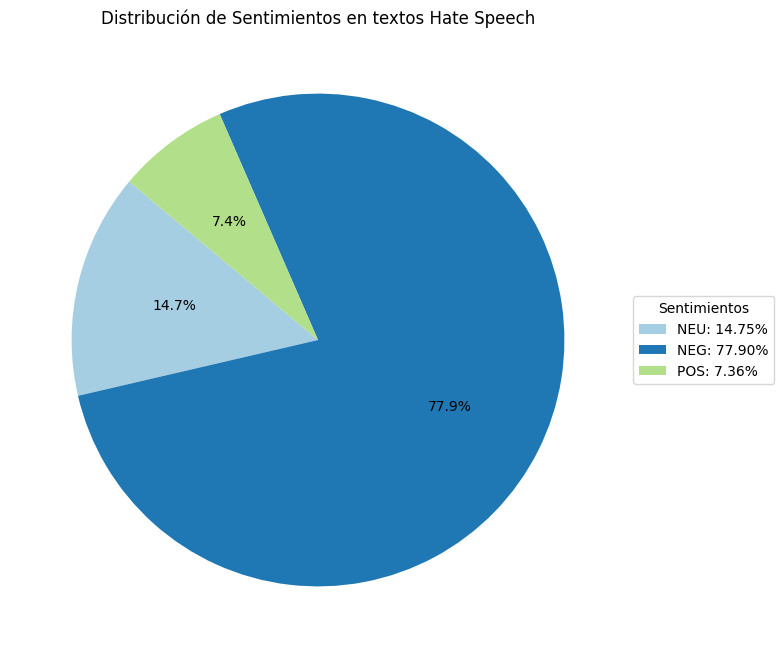

In [53]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_sentiment_percentages_hate_speech.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos en textos Hate Speech")
legend_labels = [f"{sentiment}: {percentage:.2f}%" for sentiment, percentage in overall_sentiment_percentages_hate_speech.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [54]:
print("\nEjemplos de cada tipo de sentimiento en textos hate speech:")
for sent_type, example in examples_per_sentiment_hate_speech.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos hate speech:
NEU: ["Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x", 'El gobierno debe crear un control estricto de inmigración en las zonas fronterizas con Colombia por q después del 20-8querrán venir en masa', '— Yo soy respetuoso con los demás, sólamente les recuerdo lo que son. Y si son escoria no es culpa mía. ... — ¡Claro que lo sé! ¿¡Por quién me tomas!?', '#Noticiasdelalinea: Detienen en Guatapanal motocicleta y nacional haitiano indocumentado https://t.co/qs9MTKddqK', 'Albondigas! Casi al estilo de las fodongas pero en el Gabacho.', '@elultimopeter Tu eres demasiado perra 😂', '@ValentinaaCruz Puteria y perico también somos almas gemelas excepto que tu eres puta desde él vientre.', 'I added a video to a @YouTube playlist https://t.co/lWXlQnkxyQ El Güero Bastidas - Enigma Norteño (2011)', 'Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.', 'Guyana r


-----------------------------------------------

### Tweets no hate_speech

-----------------------------------------------


In [60]:
text_not_hate_speech = [text for text in df_semeval_train[df_semeval_train["hate_speech"] == 0]["text"].tolist()]
results_sentiment_analysis_not_hate_speech = [analyze_sentiment(text) for text in tqdm(text_not_hate_speech)]

  0%|          | 9/2617 [00:00<00:31, 83.09it/s]


-----------------------
Texto analizado: Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9714699387550354, 'NEU': 0.02565343677997589, 'POS': 0.0028765136376023293}

-----------------------
Texto analizado: — Yo soy respetuoso con los demás, sólamente les recuerdo lo que son. Y si son escoria no es culpa mía. ... — ¡Claro que lo sé! ¿¡Por quién me tomas!?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2818618714809418, 'NEU': 0.6185503005981445, 'POS': 0.0995878130197525}

-----------------------
Texto analizado: Antonio Caballero y como ser de mal gusto e ignorante a la vez. Claro que no es lo mismo acoso sexual y violación pero hay varias conductas que componen la violencia sexual.
Sentimiento detectado: NEG
Probabil

  1%|          | 27/2617 [00:00<00:31, 81.76it/s]


-----------------------
Texto analizado: @PepeGonzalezRP @EsmeSese Diappoler* jajaja cállate Pepe niño polla Si me han llenado de notificaciónes jajajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5785874724388123, 'NEU': 0.37255653738975525, 'POS': 0.048855990171432495}

-----------------------
Texto analizado: ¿Mojigatas, moralinas? ¿Neta? ¿Por estar en contra del acoso sexual y la violación en el trabajo?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9115220308303833, 'NEU': 0.08209214359521866, 'POS': 0.006385869812220335}

-----------------------
Texto analizado: Si cualquier cosa es violación o acoso, se minimizan la violación y el acoso. Por lo tanto, pierden las víctimas de las mierdas que se dedican a violar y/o acosar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9566561579704285, 'NEU': 0.038780126720666885, 'POS': 0.004563700873404741}

-----------------------
Texto analizado: Que divertido que consideres que una piba por estar con uno con novia 

  2%|▏         | 45/2617 [00:00<00:30, 84.42it/s]


-----------------------
Texto analizado: @Proctologo Maldito hijo de perra... no sé por que no se fue por una puta letrina en su pueblo y se ahogó en mierda, como lo merecia.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9673249125480652, 'NEU': 0.023294417187571526, 'POS': 0.009380670264363289}

-----------------------
Texto analizado: - El tiempo no existe. La división espacio-temporal es una invención del hombre, por lo tanto,.. - Cállate, hijo(a) de puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6196065545082092, 'NEU': 0.35132861137390137, 'POS': 0.029064839705824852}

-----------------------
Texto analizado: Me mandan esta mierda. Cultura de la violación en sus mejores pantallas. ESCORIA. Se puede hacer algo @policia ? https://t.co/vGmcVPSO7B
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9773737192153931, 'NEU': 0.019352955743670464, 'POS': 0.0032733173575252295}

-----------------------
Texto analizado: @gliclazida @dotfanny @el_pais Pero el escenario 

  2%|▏         | 63/2617 [00:00<00:30, 84.99it/s]


-----------------------
Texto analizado: no entiendo eso de enseñarle la polla a cualquiera de verdad, no le encuentro el sentido
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9323834180831909, 'NEU': 0.05568088963627815, 'POS': 0.011935662478208542}

-----------------------
Texto analizado: Me obligan a tragar polla y me mean en la cara 😮 https://t.co/8SHYnivgXa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9086934328079224, 'NEU': 0.08405615389347076, 'POS': 0.0072503481060266495}

-----------------------
Texto analizado: @DarkGraphics_YT @IstEkoGFX @kanouraa LO MAS SATURADO ES VER MI POLLA EN TU CULO AGUJEREADO😂😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7635135650634766, 'NEU': 0.22197236120700836, 'POS': 0.014514039270579815}

-----------------------
Texto analizado: @Valeria_Martell @NopaIep Si, estoy de acuerdo. A ningún hombre le pasaría por la cabeza que una mujer es puta por subir fotos semi desnuda. Libertad y respeto.
Sentimiento detectado: NEG
Pr

  3%|▎         | 81/2617 [00:00<00:29, 86.58it/s]


-----------------------
Texto analizado: Los procesos administrativos tienen que ser rápidos para menores inmigrantes refugiades, ya que el futuro de eses menores está en juego. El día de mañana si quieren trabajar, seguirán sin esos papeles, los hombres terminarán en trabajos irregulares y las mujeres en prostitución.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8513647317886353, 'NEU': 0.14386235177516937, 'POS': 0.00477291364222765}

-----------------------
Texto analizado: Mirna, para algunas feministas celebrarle un vestido a una mujer es acoso, ojo ahí #pautab @adnradiochile @mirnaschindler
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8525940179824829, 'NEU': 0.13359910249710083, 'POS': 0.013806899078190327}

-----------------------
Texto analizado: @alejitacoll ... habemos muchos hombres en contra del acoso; eso sí, no todos lo expresamos desde el prejuicio sexista. Su respuesta se ganará aplausos y likes de los bienpensantes 'pero en ciertos pasajes no represen

  4%|▍         | 99/2617 [00:01<00:28, 88.02it/s]


-----------------------
Texto analizado: Pedimos picada árabe? 3 palabras, 1 corazón feliz
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.028381796553730965, 'NEU': 0.7508805990219116, 'POS': 0.22073760628700256}

-----------------------
Texto analizado: @JordiWild Que te calles ya pesao... ACEPTALO DE UNA PUTA VEZ Y dejalo ya en el pasado pide disculpas y ya conbio
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9156509637832642, 'NEU': 0.06852637976408005, 'POS': 0.01582265831530094}

-----------------------
Texto analizado: @LucasSpadafora Lucas callate que no lees dm nunca la puta que te pario ahre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.940351128578186, 'NEU': 0.04824630916118622, 'POS': 0.011402538046240807}

-----------------------
Texto analizado: Cómo me atraen las güeras 🤤
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03308656066656113, 'NEU': 0.077016681432724, 'POS': 0.889896810054779}

-----------------------
Texto analizado: @edward18jgm @P

  4%|▍         | 117/2617 [00:01<00:29, 86.20it/s]


-----------------------
Texto analizado: @spitfireXxX77 Si yo soy nazi, tu eres un hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8828871250152588, 'NEU': 0.08984434604644775, 'POS': 0.027268538251519203}

-----------------------
Texto analizado: Lo malo del tema de acosos sexual que se da en TODOS lados… es simple… abuso físico, violación o coacción son un delito… PERO!!! El coqueteo insistente o torpe no lo es, ni es la caballerosidad una agresión machista… Pero la exageración sensacionalista es lo de hoy ¿no?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.943223237991333, 'NEU': 0.05079486966133118, 'POS': 0.005981887690722942}

-----------------------
Texto analizado: ICE le da gran prioridad a la lucha contra la inmigración ilegal, incluyendo la búsqueda de extranjeros #indocumentados con antecedentes penales que presentan una amenaza para la seguridad pública https://t.co/y0Af1LVSXi https://t.co/YAfqZYJgSg
Sentimiento detectado: NEG
Probabilidades: {'NEG

  5%|▌         | 135/2617 [00:01<00:29, 84.91it/s]


-----------------------
Texto analizado: @Ark_antos Y por qué el.peor insulto que se te ocurre contra una mujer es puta?? Es mucho peor ser violador y/o asesino. Siendo putas sólo perdemos nosotras... Pero, ahí está, el machismo cultural. 'Eh, q yo no soy racista, q tengo un amigo negro'.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9568248391151428, 'NEU': 0.037935178726911545, 'POS': 0.005239968188107014}

-----------------------
Texto analizado: Del árbol del silencio pende el fruto de la seguridad-Proverbio Árabe
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1309133917093277, 'NEU': 0.6507431864738464, 'POS': 0.21834340691566467}

-----------------------
Texto analizado: El acoso sexual empieza a destaparse en la industria musical: poderoso magnate acusado de violación por varias ... https://t.co/g8ZpzWEWeS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7600299715995789, 'NEU': 0.2132723480463028, 'POS': 0.026697702705860138}

-----------------------
Texto ana

  6%|▌         | 154/2617 [00:01<00:28, 87.38it/s]


-----------------------
Texto analizado: es una puta gilipollez alarmarse asi, enserio que hay de malo? no esta desnuda no tiene nada que enseñar, por que tanto revuelo? Para eso puedes poner ropa a tu pj si tanto te molesta verle 'desnudo' un poquito de logica
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9276332855224609, 'NEU': 0.06359401345252991, 'POS': 0.008772742934525013}

-----------------------
Texto analizado: Que lindo es poder escuchar música árabe con alguien que también le gusta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0070181251503527164, 'NEU': 0.03421308845281601, 'POS': 0.9587688446044922}

-----------------------
Texto analizado: @bichoscristo Ya ni me hables de esa escoria, aunque no todos son malos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7586498260498047, 'NEU': 0.21312931180000305, 'POS': 0.028220880776643753}

-----------------------
Texto analizado: @drawman675 @Otrafachamas1 @ForretsGump Tu no te mereces q yo me esfuerce en po

  7%|▋         | 172/2617 [00:02<00:29, 82.26it/s]


-----------------------
Texto analizado: ALLANARON la oficina de Thomas (ex de EBY) en la propia Central! A nuestra CGR, nunca dejaron entrar porque es bilateral. #YacyretaSeEntregó sin ver papeles y ahora se destapó escándalo de corrupción. Van a seguir igual con este FATO FEROZ @Horacio_Cartes y @MaritoAbdo ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9531922936439514, 'NEU': 0.042703963816165924, 'POS': 0.004103779327124357}

-----------------------
Texto analizado: feliz cumpleaños franchute moracrema 💋💋💏❤️❤️❤️❤️❤️ @thesinnner1
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.059776753187179565, 'NEU': 0.5416960716247559, 'POS': 0.3985271751880646}

-----------------------
Texto analizado: @izargorri93 @A3Noticias Tú lo lo único que te mereces es lo que comes, puta bafofia, a parte igual también dos ostias, a ver si espabilas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9742094874382019, 'NEU': 0.02083037979900837, 'POS': 0.004960064310580492}

-------------

  7%|▋         | 190/2617 [00:02<00:28, 83.72it/s]


-----------------------
Texto analizado: Las #niñas #niños y #adolescentes pueden ser #refugiados. Las cifras de @unhcr muestran la enorme vulnerabilidad de NNA al desplazamiento forzado https://t.co/MpyWfweTt4
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5537711977958679, 'NEU': 0.42014122009277344, 'POS': 0.026087544858455658}

-----------------------
Texto analizado: Acá es como que vas al club a tomar algo y si o si tenes que cruzar a sudaca para qué tal está 🤷🏻‍♀️
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3552793264389038, 'NEU': 0.6352386474609375, 'POS': 0.009481995366513729}

-----------------------
Texto analizado: arabe es un temaiken amigos no veo la hora de q lo pasen en blv
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07752185314893723, 'NEU': 0.1896057277917862, 'POS': 0.7328724265098572}

-----------------------
Texto analizado: @diegovftbau REENCUENTRO LA PUTA MADRE, DISFRUTALO MUCHO, LO RE MERECES AMIGA
Sentimiento detectado: POS
Probabilida

  8%|▊         | 208/2617 [00:02<00:29, 81.62it/s]


-----------------------
Texto analizado: ESTA TERRIBLE ARABE DE ECKO AMIGO QUE CHABON CON FLOW
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.049540672451257706, 'NEU': 0.079872727394104, 'POS': 0.870586633682251}

-----------------------
Texto analizado: Hay gente miserable en el mundo Luego está esta señora, que parece que no tiene ningún escrúpulo que buscar  Bufete de Nuria Vandenberghe: Una abogada proisraelí, antimusulmana y fan de Trump denuncia a 602 inmigrantes que saltaron la valla de Ceuta   https://t.co/kp5zMKui5l
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9514750838279724, 'NEU': 0.04186238721013069, 'POS': 0.006662464700639248}

-----------------------
Texto analizado: @HuxGeneraI « hijo de perra. Por supuesto no lo haría, solo el muy bastardo se lo merecía por intentar siempre menospreciarle .... Si los golpes no funcionaban, habría de intimidarlo aún de la manera más repugnante —
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9488685131072998, 'NE

  9%|▊         | 226/2617 [00:02<00:28, 84.27it/s]


-----------------------
Texto analizado: @gerardotc Y tu eres un racista de mierda que ahora es progre, revienta hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9680531024932861, 'NEU': 0.023417895659804344, 'POS': 0.008529068902134895}

-----------------------
Texto analizado: Detienen a tres #jugadores de la #Arandina por presuntos #abusossexuales a una #menor https://t.co/vgkgFox4a5 #movimientojupsin #gentejupsin NO al #acoso
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4525323212146759, 'NEU': 0.4980040192604065, 'POS': 0.04946364089846611}

-----------------------
Texto analizado: yo: hol- todas vosotras: blanca puta gilipollas hueles mal vaya pozos tu bias es hy*kjae eres una rata sucia callate ya
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9602854251861572, 'NEU': 0.03339791297912598, 'POS': 0.006316579878330231}

-----------------------
Texto analizado: Refugiados na UNICAMP!!! https://t.co/XmNzRWenx4 via @YouTube
Sentimiento detectado: NEU
P

  9%|▉         | 244/2617 [00:02<00:27, 85.10it/s]


-----------------------
Texto analizado: @Csanchezberzain @DLasAmericas Callate hijo de perra no soy masista. Tu eres de la misma calaña q quintana. Hijo de puta no toenes moral para reclamar nada. !!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9411509037017822, 'NEU': 0.04507334902882576, 'POS': 0.013775692321360111}

-----------------------
Texto analizado: @cxwww @anaisbernal Sigo pensando lo mismo. Enseñar a las mujeres a pelear no acabará con el machismo y la violencia. Hay que acabar con el machismo desde la política y la educación y, empoderar a las mujeres para que estén en política
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.40589669346809387, 'NEU': 0.43437784910202026, 'POS': 0.15972550213336945}

-----------------------
Texto analizado: Por eso si no están al nivel los criticaré, en ésta cuenta no estamos para comerle la polla a nadie sin que lo merezca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9403470158576965, 'NEU': 0.05293451249599457, 'PO

 10%|█         | 262/2617 [00:03<00:28, 82.88it/s]


-----------------------
Texto analizado: Pero que coño le pasa esta puta noche a la naranjo!!??? Eres consciente de las tonterías que has soltado hoy por tu boca!??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9741378426551819, 'NEU': 0.02089058607816696, 'POS': 0.004971605259925127}

-----------------------
Texto analizado: mi mama esta escuchando el nuevo tema de ecko jajajaj esta en modo arabe la loca
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3190291225910187, 'NEU': 0.4482586681842804, 'POS': 0.23271222412586212}

-----------------------
Texto analizado: ATENCIÓN #España ofrece salud gratuita a #inmigrantes indocumentados   https://t.co/tOKF1o7y5A https://t.co/W6OQ0MLSnn
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19886457920074463, 'NEU': 0.6821039915084839, 'POS': 0.11903144419193268}

-----------------------
Texto analizado: Marlaska la caga...#Dimisionya Cn el asalto valla d Ceuta se abre una crisis Cn el show dl Aquarius s activo efecto llamada y l

 11%|█         | 280/2617 [00:03<00:28, 80.98it/s]


-----------------------
Texto analizado: Es imposible escuchar Arabe de ecko sin bailarlo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5478848814964294, 'NEU': 0.3358269929885864, 'POS': 0.11628817021846771}

-----------------------
Texto analizado: @AnaDargallo @imma0142 @Hermo46572739 @M_BrokenLeg @omnium @PPopular Tu eres lo peor de la escoria que anda suelta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8807949423789978, 'NEU': 0.09120490401983261, 'POS': 0.028000174090266228}

-----------------------
Texto analizado: inventarse espías de amlo para montarte todo un show de acoso y persecusión q acaba de guardanalgas por los celos de un afiliado blandengue mocho es pretexto p pedir 💰a la sectayunquera o al partido
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9227083921432495, 'NEU': 0.06990718096494675, 'POS': 0.007384440861642361}

-----------------------
Texto analizado: @AldoGarFer Tu eres mi perra en beer pong
Sentimiento detectado: NEU
Probabilidades: {


 11%|█         | 289/2617 [00:03<00:30, 77.21it/s]


-----------------------
Texto analizado: Santos firmó un decreto que permitirá a 400 mil venezolanos indocumentados regularizar su situación en el país https://t.co/8B0FSOKn7M  #INTERNACIONALES
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.18782055377960205, 'NEU': 0.6340723633766174, 'POS': 0.17810708284378052}

-----------------------
Texto analizado: Escuelas públicas enseñando a bebés a cantar: Cargol treubanya vuy sortir d'España. Lo estais haciendo de puta madre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07597549259662628, 'NEU': 0.17142970860004425, 'POS': 0.7525947690010071}

-----------------------
Texto analizado: COMO LE VAN A ENSEÑAR A UNA BEBE DE 2/ 3 AÑOS QUR CANTE UNA CANCIÓN QUE DICE 'PUTA BOLUDA, ZORRA', ENCIMA LA CANCIÓN LS TOMAN A CHISTE Y ES HORRIBLE TE DAS CUENTA A LO QUE LLEGAN LOS CELOS? HAY GENTE ESTÚPIDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9831737875938416, 'NEU': 0.013987716287374496, 'POS': 0.0028383994940668344}

----------

 12%|█▏        | 305/2617 [00:03<00:30, 75.34it/s]


-----------------------
Texto analizado: @demoniocaotico Es flipante lo que ha dicho, Es la típica persona que justifica cualquier violación o acoso. Pero lo más triste es que puede que detrás de su pj esté un due mujer.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9791190028190613, 'NEU': 0.016456741839647293, 'POS': 0.004424302838742733}

-----------------------
Texto analizado: @Berenjeno_ Te mereces todos los regalos del mundo berenjeno feliz Navidad me cago en la puta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.24505648016929626, 'NEU': 0.09340977668762207, 'POS': 0.6615337133407593}

-----------------------
Texto analizado: Gracias a dios no fui güera. Sí prieta soy bien mamona, imagínate que fuera güera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8056124448776245, 'NEU': 0.14497973024845123, 'POS': 0.04940779134631157}

-----------------------
Texto analizado: No volverá a responder a la palabra Gabacha. Así que ahí se queda. Con uno tuvo suficiente.
S

 12%|█▏        | 322/2617 [00:03<00:29, 78.71it/s]


-----------------------
Texto analizado: #HaceMuchoQue no tienes derechos #Honey...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.778133749961853, 'NEU': 0.21287401020526886, 'POS': 0.008992265909910202}

-----------------------
Texto analizado: @abogadopenal @sasarandag Yo creo que sí. Primer ejemplo de acoso sexual: levantar la falda para ver enaguas.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.45032253861427307, 'NEU': 0.5174821019172668, 'POS': 0.03219536319375038}

-----------------------
Texto analizado: Sería la puta hostia! Pero no sé quién le puede enseñar algo, eso sí, desfibriladores a mano, eskerrik askoooo!!! https://t.co/HrFunTjFwh
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.043151549994945526, 'NEU': 0.24090200662612915, 'POS': 0.7159465551376343}

-----------------------
Texto analizado: @CamiTala Jajajajaja cállate imbécil, tu perra casi se come a la mía 😥
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.944657027721405, 'NEU': 0.051558703

 13%|█▎        | 339/2617 [00:04<00:28, 80.97it/s]


-----------------------
Texto analizado: @Zurine3 Las prostitutas estarán hasta el coño de ti Pablo Fernandez, putero de mierda!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9571226835250854, 'NEU': 0.0316481739282608, 'POS': 0.01122918352484703}

-----------------------
Texto analizado: @_eckoyg  Arabe va a tener la 10 en la espalda de Neneneymar 🎧 en los boliches
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.06596655398607254, 'NEU': 0.8044785857200623, 'POS': 0.1295548379421234}

-----------------------
Texto analizado: ¿Qué dice este de frivolizar el acoso escolar? ¿Por favor queréis dejar de decir semejantes tonterías? https://t.co/ndVjx73SH3
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9700180292129517, 'NEU': 0.026022518053650856, 'POS': 0.00395949836820364}

-----------------------
Texto analizado: ¿De qué murió Cenicienta? De que a las doce el tampax se le convirtió en calabaza.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7217453122138977, 'NEU

 14%|█▎        | 357/2617 [00:04<00:26, 84.28it/s]


-----------------------
Texto analizado: Siempre su hija preferida tiene que tener todo,pero por que no entras en tu culo hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9543248414993286, 'NEU': 0.040060680359601974, 'POS': 0.005614484194666147}

-----------------------
Texto analizado: Vergüenza da cerrar el 2017 con el asesinato de Diana Quer, la violación de los San Fermines y el acoso que aun hay, ya es hora de pararlo, mujeres y hombres por el feminismo, por la IGUALDAD, porque locos hay pocos, pero han causado demasiada desgracia ya #noalaviolenciamachista
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9844812154769897, 'NEU': 0.01209806464612484, 'POS': 0.0034207000862807035}

-----------------------
Texto analizado: 41. Me encantan los memes y las tonterias de twitter y Facebook, me parto la polla
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.27781158685684204, 'NEU': 0.233579620718956, 'POS': 0.48860886693000793}

-----------------------
Texto a

 14%|█▍        | 375/2617 [00:04<00:27, 81.63it/s]


-----------------------
Texto analizado: Espera,que me puedo morir ya😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍 Soraya cállate de una puta vez, y sé feliz.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3130948841571808, 'NEU': 0.5520990490913391, 'POS': 0.1348060518503189}

-----------------------
Texto analizado: [29/12 9:48 AM] Axel : T VOY A ENSEÑAR Axel : A MO TENER SENTIMIENTOS Axel : DIOS Axel : LA PUTA MADRE Axel : LA CONCXHA D TU HERMANA Ta bien axel
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4589659571647644, 'NEU': 0.44770023226737976, 'POS': 0.09333381056785583}

-----------------------
Texto analizado: ÚLTIMA HORA| @pablocasado_ culpa a Pedro Sánchez de la #Oladecalor. Dice que si no tiene bastante con acoger migrantes, que también tiene que acoger el calor subsahariano. #FelizMiércoles #1Agosto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7433770895004272, 'NEU': 0.24101056158542633, 'POS': 0.015612366609275341}

-----------------------
Texto analizado: #SNInternacional  

 15%|█▌        | 393/2617 [00:04<00:28, 77.77it/s]


-----------------------
Texto analizado: Lo más cagado, es que cuando estaba morro, me enojaba que me dijeran 'güero'...  https://t.co/sPYpVfdYQr
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9651790857315063, 'NEU': 0.028652748093008995, 'POS': 0.006168185733258724}

-----------------------
Texto analizado: Dónde vas mi arma??? Mi polla poco tendrá que hacer en tu culo, no notarías nada jajaja https://t.co/xdWEs9oM1f
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4871343970298767, 'NEU': 0.4355353116989136, 'POS': 0.07733029872179031}

-----------------------
Texto analizado: @DarkPunisher00 @mauriciomacri CALLATE BOLIVIANO K ,LA RECONCHA DE TU PUTA MADRE ,UDS QUISIERON QUEBRAR Y HACER MIERDA EL PAIS . AHORA TU KCHORRA LE SACAN LOS FUEROS Y VAN EN CANA .
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9607827067375183, 'NEU': 0.028916284441947937, 'POS': 0.010300995782017708}

-----------------------
Texto analizado: @hennexsy Callate la puta boca o te regalo una ho


 15%|█▌        | 401/2617 [00:04<00:31, 71.21it/s]


-----------------------
Texto analizado: austin mahone callate hijo de puta solo quiero oir a abraham
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.920166552066803, 'NEU': 0.06789866834878922, 'POS': 0.011934777721762657}

-----------------------
Texto analizado: #Mesaza en un tema de acoso... La abuela le va a poner las imágenes del coqueteo... En tu cara Darthes!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8805045485496521, 'NEU': 0.11455848067998886, 'POS': 0.004936969373375177}

-----------------------
Texto analizado: LA PUTA MADRE LO Q HABÍA LLORADO XQ ENCIMA LO RE AMABA A RAMA SE MERECÍA EL MUNDO https://t.co/zXG0vg0VgD
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.21264714002609253, 'NEU': 0.15503285825252533, 'POS': 0.6323199272155762}

-----------------------
Texto analizado: All I want for Xmas is yoQUE TE CALLES DE UNA PUTA VEZ, LOQUER, CÁLLATE YA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9335715174674988, 'NEU': 0.05534503236413002, 'POS'

 16%|█▌        | 416/2617 [00:05<00:33, 64.82it/s]


-----------------------
Texto analizado: Ejemplo perfecto de cómo NO hay que diseñar un cuestionario, me lo guardo xa mis alumnos #periodismo #opinionpublica :/ :/ @UCMccinf #encuestas #metodologia #ccss #inmigracion https://t.co/cpkuQeMDfr
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5431344509124756, 'NEU': 0.44134819507598877, 'POS': 0.015517381951212883}

-----------------------
Texto analizado: @ash_london mas odio asi ti aunque intentes ignorarlo hija de fruta te metiste con nuestro bebé ahora jodete perra y deja tu hipocresía
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9624042510986328, 'NEU': 0.03063204139471054, 'POS': 0.006963701918721199}

-----------------------
Texto analizado: que si el lenguaje, que si es acoso, que si es lío de faldas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8734633326530457, 'NEU': 0.12025895714759827, 'POS': 0.006277676206082106}

-----------------------
Texto analizado: @Daniela__Valdiv dani no alcancé a escuchar porque

 16%|█▋        | 430/2617 [00:05<00:34, 64.24it/s]


-----------------------
Texto analizado: @Kevinn_almiron Cállate que todos vieron como dormía y dormis, LO VAS A ACEPTAR O NO HIJO DE PUTA PRIMER AVISO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8946812152862549, 'NEU': 0.09016001224517822, 'POS': 0.01515873707830906}

-----------------------
Texto analizado: @A24COM Callate hijo de puta! Chorro corrupto.uds.empezaron la violencia como siempre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9387260675430298, 'NEU': 0.04103679582476616, 'POS': 0.020237265154719353}

-----------------------
Texto analizado: La vida es puta Y la mujer es una señora
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3884713053703308, 'NEU': 0.5614432096481323, 'POS': 0.05008550360798836}

-----------------------
Texto analizado: @salvameoficial Esto es lo que os merecéis en la puta boca los de salvame? https://t.co/DbYLJIkwhz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9653933644294739, 'NEU': 0.028684496879577637, 'POS': 0.0059

 17%|█▋        | 444/2617 [00:05<00:34, 62.75it/s]


-----------------------
Texto analizado: Los ultras groguicidas tienen bula e impunidad total para ir a la caza del golpista indepe catalufo separata todo por la patria viva franco y viva letizio 🇪🇸 https://t.co/3EcJpPcwlS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9188753366470337, 'NEU': 0.06528590619564056, 'POS': 0.01583874598145485}

-----------------------
Texto analizado: No te pierdas hoy 10:30pm por @TeleritmoTv el programa #leytexana artista invitado Güero Robles  Teleritmo Sonando Recio https://t.co/2C3Ubrq8pP
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09622994065284729, 'NEU': 0.594857931137085, 'POS': 0.30891212821006775}

-----------------------
Texto analizado: Retweeted Carlos Peñaloza (@GenPenaloza):  INDOCUMENTADO a punto de entrar en coma. Se le alzaron Izarra y Mary Pili. Ademas sus 3 hijastros son acusados en EEUU de lavar $200 millones. Debe ser el dinero de la... https://t.co/PYIXWYkgaY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.693

 18%|█▊        | 458/2617 [00:05<00:33, 64.06it/s]


-----------------------
Texto analizado: en nombre del pueblo venezolano manuel bartual callate la puta boca ya imbecil
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8828859925270081, 'NEU': 0.10049016028642654, 'POS': 0.01662380062043667}

-----------------------
Texto analizado: @Nigguel Jajaja respondes este y no los otros tweets, callate marico en serio no tienes ni puta idea de que hablas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9103832244873047, 'NEU': 0.07758539170026779, 'POS': 0.01203130092471838}

-----------------------
Texto analizado: Con mis manos en tu culo sintiendo el recorrido de mi polla dentro de ti, despacio entrando y saliendo, mis venas s… https://t.co/exSo05cYON
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07920332998037338, 'NEU': 0.44503018260002136, 'POS': 0.47576653957366943}

-----------------------
Texto analizado: @cristobalsoria Retrasado callate la puta boca asqueroso , encima el puto arbitro no nos pita un penalti legal
Sent

 18%|█▊        | 472/2617 [00:06<00:34, 62.85it/s]


-----------------------
Texto analizado: Q ministra d "Lo Que Falta y Lo Que Sobra" (Trabajo y Migraciones),diga q ve n Casado y Rivera tendencias "racistas y xenófobas" x visitar Ceuta es como si yo digo q Sánchez e Iglesias lo son x no tener inmigrantes dentro d la valla d Moncloa o d La Navata https://t.co/VCITOyMvuT
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9406333565711975, 'NEU': 0.054226938635110855, 'POS': 0.005139730870723724}

-----------------------
Texto analizado: @abc_es Una puta mierda!!!! Luego hablan de democracia y de tonterías!!!! Se lo montan bien!!! Eso tendría que estar prohibido!!! Y mientras españoles jubilados muriéndose d hambre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9686571955680847, 'NEU': 0.02307889237999916, 'POS': 0.008263884112238884}

-----------------------
Texto analizado: Podían poner los taxis bloqueando el paso en la valla de Ceuta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.49740949273109436, 'NEU': 0.4765922427


 18%|█▊        | 479/2617 [00:06<00:36, 58.16it/s]


-----------------------
Texto analizado: Esto es para ti indocumentado  https://t.co/8mQq3aa02q  @dejanirasilveir @EduardoJFloresF
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6341742277145386, 'NEU': 0.3125726580619812, 'POS': 0.053253136575222015}

-----------------------
Texto analizado: La coalición árabe niega haber atacado Al Hudeida y asegura que el ataque contra un mercado y un hospital que dejó ayer más de 50 muertos fue perpetrado por los rebeldes hutíes con proyectiles de mortero. #Yemen
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.75499027967453, 'NEU': 0.20559477806091309, 'POS': 0.03941496089100838}

-----------------------
Texto analizado: @ppkamigo tu eres la escoria del país maldito ladrón vete s tu país pero no t lleves nada de dinero q has hecho en mi país a causa d corrupt
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9576978087425232, 'NEU': 0.02938907966017723, 'POS': 0.012913147918879986}

-----------------------
Texto analizado: Difundamo

 19%|█▉        | 491/2617 [00:06<00:36, 57.53it/s]


-----------------------
Texto analizado: Y es que estoy hasta la polla de leer siempre en las noticias a alguien diciendo 'Pero no todos los hombres somos así' Tío, en vez de defender tu puto orgullo herido por generalizarte en algo que eres capaz de normalizar, lucha, apoya y haz que algo así no sea algo normal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9816853404045105, 'NEU': 0.014784161001443863, 'POS': 0.0035305162891745567}

-----------------------
Texto analizado: Horrible. Nadie ni nada te obliga a violar a https://t.co/HnaOYCv5k6 de los refugiados del Aquarius: "Me obligaron a violar a menores y animales durante meses" https://t.co/7QRzJqAwv1 vía @elmundoes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8892916440963745, 'NEU': 0.09431041777133942, 'POS': 0.016397908329963684}

-----------------------
Texto analizado: mega arabe remix la rompe toda amigo q zarpado q esta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05558403581380844, 'NEU': 0.129062533

 19%|█▉        | 503/2617 [00:06<00:39, 52.97it/s]


-----------------------
Texto analizado: @sr_hater_ Guarra es la persona que no se lava, no una chica libre de enseñar lo que quiera y como quiera :)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6046361327171326, 'NEU': 0.29470211267471313, 'POS': 0.10066170990467072}

-----------------------
Texto analizado: La derecha ya ha marcado su línea de disputa y discurso. Los medios tenemos, hoy, una gran responsabilidad en cómo contamos esta situación. Los inmigrantes llegados este año a España sólo llenarían un cuarto del Estadio Santiago Bernabeu. https://t.co/flJvG39ba7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8778597116470337, 'NEU': 0.11116816848516464, 'POS': 0.010972126387059689}

-----------------------
Texto analizado: Ahora mirad la actuación de Raoul y decidme a mi puta cara que merecía quedarse frente a Cepeda. DECÍDMELO.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6163988709449768, 'NEU': 0.2880905270576477, 'POS': 0.09551059454679489}

------------

 20%|█▉        | 515/2617 [00:06<00:38, 54.03it/s]


-----------------------
Texto analizado: Fav si te vienes a dormir conmigo y te pego una patada en la cara al despertarnos por la mañana.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.419609934091568, 'NEU': 0.4639833867549896, 'POS': 0.11640668660402298}

-----------------------
Texto analizado: @_Noel_Pereira2 Definitivamente tú eres un grandísimo hijo de puta, el coño de tu madre! Si el escenario es Negro para ti es Blanco. Siempre juzgando a dividir y llevar la contraria. Te propongo algo, deja que te coja un Burro con los ojos azules
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9462199807167053, 'NEU': 0.04262463003396988, 'POS': 0.011155449785292149}

-----------------------
Texto analizado: @TowandaRebels Justamente los violadores son la escoria de los hombres, la forma más baja de vida animal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9727229475975037, 'NEU': 0.02194923907518387, 'POS': 0.005327824968844652}

-----------------------
Texto analizado: @N

 20%|██        | 533/2617 [00:07<00:29, 69.95it/s]


-----------------------
Texto analizado: RACISMO ES QUE TE PREGUNTEN PORQUE ERES PRIETO SI TU MAMÁ ES GÜERA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9705442190170288, 'NEU': 0.02431446872651577, 'POS': 0.005141302943229675}

-----------------------
Texto analizado: Me re estresa ser tan hija de puta pero a ver viejo de mierda cállate que quiero dormir
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9736522436141968, 'NEU': 0.0195204745978117, 'POS': 0.006827257107943296}

-----------------------
Texto analizado: Trump arremete contra las mujeres que lo acusan de acoso sexual; asegura que las denuncias de las 16 mujeres son 'historias inventadas' https://t.co/5A4r7PPtYt https://t.co/UePk8310gP
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8012215495109558, 'NEU': 0.16961872577667236, 'POS': 0.02915961667895317}

-----------------------
Texto analizado: Mueren 11 inmigrantes en Italia en accidente de camión con trabajadores agrícolas - https://t.co/UEmuxExgid ht

 21%|██        | 552/2617 [00:07<00:25, 79.79it/s]


-----------------------
Texto analizado: @ertenembaum @flandivar Callate hijo de puta, sos el primero en justificar y promover esta mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9705295562744141, 'NEU': 0.02045641653239727, 'POS': 0.009013958275318146}

-----------------------
Texto analizado: Los 5 minutos d gloria de una asociación gracias a #TVE. 2 ediciones del #telediario ofrecieron amplia cobertura a la #denuncia contra los #inmigrantes del salto de la #valla de #Ceuta interpuesta x una asociación fantasma con conexiones #ultraderechistas https://t.co/kTrPg40rH2
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4116191267967224, 'NEU': 0.5231496095657349, 'POS': 0.06523122638463974}

-----------------------
Texto analizado: 🌹 “El Gobierno ha reforzado el sistema nacional de protección internacional y de acogida al aprobar una oferta de empleo público extraordinaria y adicional de 323 plazas destinadas a mejorar la atención a los solicitantes y beneficiarios de 

 22%|██▏       | 570/2617 [00:07<00:26, 78.33it/s]


-----------------------
Texto analizado: Mi mamá hace empanadas árabes para el viernes. 180 la docena. El que quiera me avisa. Es de carne tierna, lo hacemos a mi sobrinito. Tiene 2 años. Ahre marginal 😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0252990685403347, 'NEU': 0.7146440744400024, 'POS': 0.26005682349205017}

-----------------------
Texto analizado: @soyboosteada TU TYA K ES X LA NOXE K EN TEORIA TU ERES LA LISTA MENUDA PUTA MIKERDA DE ROLEPLAY ESTASMOS AHCIENDO TUS PUTOSA MEURTOS AFASA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9566808342933655, 'NEU': 0.03945742920041084, 'POS': 0.0038616773672401905}

-----------------------
Texto analizado: Lena Dunham prepara una serie sobre feminismo para HBO' Afirman que se rodará integramente en una cocina. #NewCine http://t.co/xJcFGo61c4
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.11947955191135406, 'NEU': 0.5775706768035889, 'POS': 0.3029497563838959}

-----------------------
Texto analizado: Aprendí a 

 22%|██▏       | 588/2617 [00:07<00:24, 82.24it/s]


-----------------------
Texto analizado: ¿alguien que tenga el numero del güero de super vale?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.13415411114692688, 'NEU': 0.8079025149345398, 'POS': 0.05794338881969452}

-----------------------
Texto analizado: Yo cuando alguien me dice güera? https://t.co/24AYSlKT2d
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5169700980186462, 'NEU': 0.4544026553630829, 'POS': 0.028627241030335426}

-----------------------
Texto analizado: Cuando tu eres la única que sabe hacer Picoway Resolve y todas quieren que les enseñes, te sientes la más perra del mundo 😂💆🐩
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2768896222114563, 'NEU': 0.6429316401481628, 'POS': 0.08017872273921967}

-----------------------
Texto analizado: Vivir a la defensiva en un bello lugar....que todos podrían disfrutar, árabes e israelíes https://t.co/Zpm9dA6Qk7
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.010132648050785065, 'NEU': 0.12571892142295837, 

 23%|██▎       | 606/2617 [00:07<00:24, 83.27it/s]


-----------------------
Texto analizado: @Jackvatore Es que sinceramente ni puta gracia me haces, y si me insultas menos, así que callate la puta boca, gracias.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9757751226425171, 'NEU': 0.015492662787437439, 'POS': 0.008732268586754799}

-----------------------
Texto analizado: Quiero pegarte pq estás bien imbécil y después darte un besito. 🙂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.745639443397522, 'NEU': 0.21440789103507996, 'POS': 0.03995267674326897}

-----------------------
Texto analizado: A lo mejor si alguien no lucha por alguien es porque NO MERECES LA PUTA PENA, no siempre es culpa del que no lucha.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9557371139526367, 'NEU': 0.034885771572589874, 'POS': 0.009377065114676952}

-----------------------
Texto analizado: Infeliz no seria un termino que el se merezca... No soy Dios para juzgar, pero este hijo de puta merece el infierno en tierra. https://t.co/lOB3PT

 24%|██▍       | 624/2617 [00:08<00:23, 84.36it/s]


-----------------------
Texto analizado: También te estresa todo hermana' y bueno gil, callate la puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9615314602851868, 'NEU': 0.03163587301969528, 'POS': 0.0068327258341014385}

-----------------------
Texto analizado: @beyondthesvn no lo eres. callate jode. hostia puta ya no te digo la gira que estoy intentando sacar maldito
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9231166839599609, 'NEU': 0.06385939568281174, 'POS': 0.01302399206906557}

-----------------------
Texto analizado: @Trolasodemierda el empujón en plan cállate la puta bocaaa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.48112788796424866, 'NEU': 0.3851405084133148, 'POS': 0.1337316483259201}

-----------------------
Texto analizado: @BayasFb Cállate mmvg, hoy te saco la puta 🖕
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.939608097076416, 'NEU': 0.047997307032346725, 'POS': 0.012394626624882221}

-----------------------
Texto analizado:

 25%|██▍       | 642/2617 [00:08<00:23, 85.16it/s]


-----------------------
Texto analizado: @Lolo__Caggiano callate y retoma la puta serie
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8902191519737244, 'NEU': 0.08756817132234573, 'POS': 0.022212715819478035}

-----------------------
Texto analizado: 🗞 Leer a Sami Naïr para entender mejor a Europa:   "El temor delante de la inmigración no es producto de una xenofobia congénita [...] sino el precio que se paga por la profunda crisis social provocada por la gestión ultraliberal de la economía europea" https://t.co/HHFLWZhdpy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9122845530509949, 'NEU': 0.07626338303089142, 'POS': 0.011452061124145985}

-----------------------
Texto analizado: @TowandaRebels Genial eso de reíros en la cara de las prostitutas que hayan elegido, libremente, ser lo que son. Sabíais que hasta se han asociado? Y algunas hasta tienen estudios y deciden igualmente ejercer! Qué cosas!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.012455123476684093,

 25%|██▌       | 660/2617 [00:08<00:24, 80.68it/s]


-----------------------
Texto analizado: Un día largo CALLATE HIJO DE PUTA ESTABAS JUGANDO AL PÁDEL
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9516124129295349, 'NEU': 0.03466096892952919, 'POS': 0.013726577162742615}

-----------------------
Texto analizado: No entiendo porque la vida es así..ellos son escoria..son delincuentes..Nosotros merecíamos más ese título. Que hicimos mal?😖
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9776496887207031, 'NEU': 0.020062057301402092, 'POS': 0.0022882188204675913}

-----------------------
Texto analizado: LAS GANADORAS DEL PRIMER SORTEO DE ENTRADAS PARA LA ÚNICA FIESTA EXCLUSIVA PARA MAYORES DE 18 AÑOS DE SUDACA&amp;LA ISLA‼️ @melanicolinaa FELICITACIONES NOS COMUNICAREMOS POR PRIVADO CONTIGO‼️ https://t.co/i28u0VSHiH
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.015051651746034622, 'NEU': 0.40740880370140076, 'POS': 0.5775396227836609}

-----------------------
Texto analizado: Les arabes 😭 https://t.co/C74kOciSi6
Sentimi


 26%|██▌       | 669/2617 [00:08<00:29, 65.90it/s]


-----------------------
Texto analizado: Instan a granjeros de Colorado a “defender” a sus trabajadores indocumentados https://t.co/kDF5VcA7jw https://t.co/gZrDAnOZmj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6839125752449036, 'NEU': 0.2627827525138855, 'POS': 0.05330469086766243}

-----------------------
Texto analizado: Buenos días Güera, solo pasó a desearte u lindo fin de semana en compañía de tú Príncipe. Qué se diviertan mucho y disfruten.😘😘❤️❤️ Besitos. https://t.co/RIOvnfFL0n
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.015043451450765133, 'NEU': 0.1100916936993599, 'POS': 0.8748648166656494}

-----------------------
Texto analizado: ¿Hipocresía de Estados Unidos frente al conflicto nicaragüense? https://t.co/pJDIYMmXEn vía @cnnee
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9218829274177551, 'NEU': 0.0715034157037735, 'POS': 0.006613715551793575}

-----------------------
Texto analizado: Mecagontodo 2 tíos en clase aprueban y llevan 35 min quejándos


 26%|██▌       | 677/2617 [00:08<00:33, 58.31it/s]


-----------------------
Texto analizado: Que Las Mujeres Son Perras🐶 o.O ? No Parcero No Hay Mujer Perra🐶 Sino Cansada De Que Un Hombre No Le Demuestre... https://t.co/ScXTRGZHdn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8739762902259827, 'NEU': 0.11911693960428238, 'POS': 0.006906847935169935}

-----------------------
Texto analizado: Lo mejor que le paso a Florida fue que hubiera competencia de Sudaca , porque ahora todos meten buenas ofertas 😏
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.00594708975404501, 'NEU': 0.07751694321632385, 'POS': 0.9165359139442444}

-----------------------
Texto analizado: Esta chica denuncia una violación invisibilizada y lo que os preocupa es que diga que el agresor tenía polla. Sois imbéciles. https://t.co/ZeBi9EIIR1
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9719362854957581, 'NEU': 0.02078351005911827, 'POS': 0.007280170451849699}

-----------------------
Texto analizado: Siento que mi güera @_elan_ vino a rompernos el 


 26%|██▌       | 684/2617 [00:09<00:36, 52.24it/s]


-----------------------
Texto analizado: Puta madre, buscar trabajo en México, es entrevistarte con Argentinos, Colombianos, Peruanos, Brasileños y mis favoritos: zafios gachupines para que te den chamba en tu propio país.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9039416313171387, 'NEU': 0.0816069021821022, 'POS': 0.014451428316533566}

-----------------------
Texto analizado: Y tú eres la perra mayor, Hux. No te muerdas la lengua. —Rueda los ojos, colocándose aquel gorro y quitándole el polvo de encima, deteniéndose de golpe frente a el.— Y he acabado mi entrenamiento de hoy, así que, no. https://t.co/CM2pbnNCc4
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.13931256532669067, 'NEU': 0.5533021688461304, 'POS': 0.30738526582717896}

-----------------------
Texto analizado: El master de Casado no ha sido gratis. Lo van a pagar los inmigrantes. https://t.co/qkL0KCJDIQ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.868523120880127, 'NEU': 0.11610043048858643, 'POS

 27%|██▋       | 696/2617 [00:09<00:39, 48.50it/s]


-----------------------
Texto analizado: @3LigasEn10Anos @alvaroojeda80 Tu eres el alemán tonto que usa el traductor porque no tiene ni puta idea de hablar español y que dice gilipolleces en Youtube? Viva España que es y será siempre tu país🇪🇸🇪🇸🇪🇸!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8960628509521484, 'NEU': 0.09478658437728882, 'POS': 0.009150546044111252}

-----------------------
Texto analizado: Varios me han dicho "chama pero vente sin papeles, vete de Venezuela con la cédula" pregunta ¿ustedes son mrcos o que? Dejen de estar fomentando la ilegalidad por muy desesperado que estés no hagas esa cagada.... https://t.co/7SYoMjeG88
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9104477763175964, 'NEU': 0.08194901049137115, 'POS': 0.007603274658322334}

-----------------------
Texto analizado: @DVDFRRP @niluspc @sextaNoticias Imbécil dice!! Luego vais de educados y pacíficos y sois auténtica escoria....basura
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9


 27%|██▋       | 702/2617 [00:09<00:43, 43.60it/s]


-----------------------
Texto analizado: M.Rajoy en los papeles de Barcenas, NO es Mariano Rajoy  Pablo Casado aprueba el master sin ir a clase, sin hacer exámenes y convalidando 18 de 22 asignaturas  2 casos que millones de ciudadanos vemos claro pero los jueces NO  #CasadoDimision #MasterCasado https://t.co/XatDTWK1qf
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8487460017204285, 'NEU': 0.138307586312294, 'POS': 0.012946397066116333}

-----------------------
Texto analizado: @FilmusDaniel Callate hijo de puta. Fuiste una mierda y vas a terminar tu vida siendo una mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9572070837020874, 'NEU': 0.02888442762196064, 'POS': 0.013908532448112965}

-----------------------
Texto analizado: Pásame la receta. Si son empanadas árabes me como una docena https://t.co/mraWpDDIys
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.023411065340042114, 'NEU': 0.8062506914138794, 'POS': 0.1703382283449173}

-----------------------
Text

 27%|██▋       | 712/2617 [00:09<00:41, 45.67it/s]


-----------------------
Texto analizado: @elopi23 La celebración de Carmona algún sportinguista aún tiene la polla en la garganta #elproblemanoerapacoherrera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7938466668128967, 'NEU': 0.19299516081809998, 'POS': 0.013158141635358334}

-----------------------
Texto analizado: @diarioas Le pega primero en la cara 'tonto la polla'
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5475696921348572, 'NEU': 0.3068954050540924, 'POS': 0.14553487300872803}

-----------------------
Texto analizado: El Partido Popular considera contradictorio el anuncio del PSOE de que retirará las concertinas de Ceuta y Melilla porque "las pusieron ellos"  https://t.co/EDk8c8AKgb
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8992630243301392, 'NEU': 0.0907103568315506, 'POS': 0.010026609525084496}

-----------------------
Texto analizado: La feminidad busca igualdad, el feminismo sólo el poder' https://t.co/qVgvNGne1H
Sentimiento detectado: NEU
Prob

 28%|██▊       | 722/2617 [00:10<00:43, 43.96it/s]


-----------------------
Texto analizado: E insisto con esto de 'libertad de expresión, puedo decir lo que quiero' claro, nunca en la puta historia enseñaron el concepto de libertad. Que claro, va de la mano con la Responsabilidad. Es decir, q lo que expreses de manera libre tiene q ser de forma responsable.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5927732586860657, 'NEU': 0.3669228255748749, 'POS': 0.040303926914930344}

-----------------------
Texto analizado: @peachwall Aaaaayy CÁLLATE NSMSJS TE JURO QUE AÚN SIENTO QUE NO ES REAL NO MAMES QUE CLASE DE PUTA SUERTE ES ESTA ?? 😭😭😭
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7756887674331665, 'NEU': 0.20861180126667023, 'POS': 0.015699412673711777}

-----------------------
Texto analizado: Esto es posesión, machismo, acoso, violación a la intimidad de la persona, y nadie cae en la cuenta que están así por “un cariño” que acaba siendo una tortura. https://t.co/owf0retc4c
Sentimiento detectado: NEG
Probabilidades: {'N

 28%|██▊       | 733/2617 [00:10<00:39, 48.21it/s]


-----------------------
Texto analizado: PIETRAPIERCE STORY: PURS SANGS ARABES STARS DES FESTIVITES A AGAR EL M... https://t.co/G2HgYnflxg
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.11747708916664124, 'NEU': 0.3591090738773346, 'POS': 0.523413896560669}

-----------------------
Texto analizado: @bblackbird_ @vntiat Tu eres más tonto que un bocao en la polla chaval
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9403404593467712, 'NEU': 0.04853029176592827, 'POS': 0.011129241436719894}

-----------------------
Texto analizado: Lo de los bolardos obstaculizando las entradas del zoco árabe año tras año es de traca... Como para tener que salir corriendo!!! O con silla!!! @vitoriagasteiz https://t.co/1qlkvETBgp
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.97849440574646, 'NEU': 0.017243456095457077, 'POS': 0.004262099973857403}

-----------------------
Texto analizado: La forma que se me pegó la base de Arabe, la escuché 75 veces hoy. 🤦🏼‍♂️
Sentimiento detectado: NEG

 28%|██▊       | 745/2617 [00:10<00:38, 48.18it/s]


-----------------------
Texto analizado: Violencia machista, acoso escolar, violación de derechos humanos, privación de libertades, homofobia, racismo, precariedad, corrupción ... Que en 2018 avancemos para terminar con todo esto. Salud y felicidad 😘❤️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8172863125801086, 'NEU': 0.15658685564994812, 'POS': 0.026126772165298462}

-----------------------
Texto analizado: como puede ser que justifiquen un acoso o una violación porque 'estaba borracho' loco yo también el finde estaba borracha y no por eso viole a una mina DEJEN DE JUSTIFICAR MACHITOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9419440627098083, 'NEU': 0.05074796453118324, 'POS': 0.007308013271540403}

-----------------------
Texto analizado: @chater9000 @myriambregman @NicolasdelCano @Solanopo Hijos de perra, para lo unico que sirven es para provocar y seguir haciendo mierda el país. Nunca van a gobernarnos en su puta y reventada vida. Queremos vivir en Paz, si n

 29%|██▉       | 756/2617 [00:10<00:38, 48.57it/s]


-----------------------
Texto analizado: Echenle un ojo a este especial que armé para @PlayCamCine   ¿Hubiera sido bueno respetar el look güero de #Aquaman o esta bien el look Tritón motociclista? https://t.co/TkQGtDWE1Z
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.06979832053184509, 'NEU': 0.4252723455429077, 'POS': 0.5049293637275696}

-----------------------
Texto analizado: @EPN @PNH_oficial @JuanOrlandoH Hijo de puta callate la jeta .de la jente asesinadas por el ejercito de honduras nadie dice nada son mas de 30 muertes.el unico delito que cometemos esque no queremos un corructo como tu en nuestro pais
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9692233800888062, 'NEU': 0.023508066311478615, 'POS': 0.007268520072102547}

-----------------------
Texto analizado: Acusaciones de acoso reviven caso de Trump y revelan epidemia: Tres de cada 4 mujeres son víctimas en todas las áreas productivas: reporte https://t.co/TAoMfJhnae https://t.co/mTd6XUYO9c
Sentimiento detec

 29%|██▉       | 768/2617 [00:10<00:35, 52.09it/s]


-----------------------
Texto analizado: Que lindo levantarse un domingo sin resaca, sin problemas ni peleas y como si no fuese suficiente bueno mi papi me espera con comida árabe 🤤🤤🤤🤤
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04142201691865921, 'NEU': 0.2928737699985504, 'POS': 0.6657041907310486}

-----------------------
Texto analizado: ¡Pedimos a la ONU descolonizar el #SaharaOccidental! Más de 200.000 #saharauis viven desde hace más de 40 años en campamentos de refugiados #ActualidadSaharaui https://t.co/eXvjtYZUvC
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5406409502029419, 'NEU': 0.4172898232936859, 'POS': 0.042069245129823685}

-----------------------
Texto analizado: QUE HIJOS DE PUTA LOCO, SE LO SÚPER MERECÍA FLORENCIA ENVÍA BAILA FLOR AL 13013
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6380429267883301, 'NEU': 0.17449866235256195, 'POS': 0.18745841085910797}

-----------------------
Texto analizado: Vos brasilero de mierda t mereces lo peor co

 30%|██▉       | 780/2617 [00:11<00:34, 53.10it/s]


-----------------------
Texto analizado: @FunesCartagena Cállate serote vos ya no sos de aqui podrías en ese país hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.95954430103302, 'NEU': 0.029875878244638443, 'POS': 0.010579889640212059}

-----------------------
Texto analizado: El río Guadarrama y sus Puentes #Madrid https://t.co/R9h9M70rCu Madrid y Castilla se comunican por el cauce del río Guadarrama desde época romana; árabes, castellanos, Felipe II, Carlos III... dejaron su huella Publica gratis tu anuncio: https://t.co/4XuzB7eWqq https://t.co/24OdYUr2jj
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.11414327472448349, 'NEU': 0.5811073184013367, 'POS': 0.30474936962127686}

-----------------------
Texto analizado: Enhorabuena por las mujeres, madres de familia, que han sufrido calladas muchos años el acoso de hombres inmorales! https://t.co/caEwp1LI8I
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4824732542037964, 'NEU': 0.1358291357755661, 'POS': 0.3


 30%|███       | 786/2617 [00:11<00:35, 51.79it/s]


-----------------------
Texto analizado: @cobaiabaia Al menos en 13rsw, creo que no idealizan el suicidio ni el acoso o la violación y dan un mensaje, sin embargo en esta serie me da la sensación de que pintan como super guay ser un psicópata.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.25873857736587524, 'NEU': 0.44305020570755005, 'POS': 0.2982112467288971}

-----------------------
Texto analizado: Este es un buen tema llamado “Arabe” https://t.co/Te9zAW53YP
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.003934392239898443, 'NEU': 0.04306457191705704, 'POS': 0.9530009627342224}

-----------------------
Texto analizado: Los enemigos de la inmigración en la Unión Europea  Líderes de Europa se han puesto como objetivo frenar el flujo de migrantes indocumentados. Conoce a estos mandatarios, que han hecho en el tema migratorio, y porque lo han hecho.... https://t.co/XK4nPEZADy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7172068357467651, 'NEU': 0.23864489793777466

 30%|███       | 798/2617 [00:11<00:35, 51.48it/s]


-----------------------
Texto analizado: Que ningún hijo de puta os de menos de lo que os merecéis.'
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5426058769226074, 'NEU': 0.23286254703998566, 'POS': 0.2245316058397293}

-----------------------
Texto analizado: “La gravedad de la violación no desvirtúa la infamia del acoso sexual” https://t.co/6j7c8Gaa8w
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8089681267738342, 'NEU': 0.1586010903120041, 'POS': 0.032430753111839294}

-----------------------
Texto analizado: Sinceramente te mereces pasar roncha y comer mierda, con chavez hubiese pasado igual, el fue otra puta de Fidel y una gran maldicion para este pais, fue un ladron, resentido y un fracasado, pa que sepais https://t.co/lQq997uhBV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9596204161643982, 'NEU': 0.03194430470466614, 'POS': 0.008435347117483616}

-----------------------
Texto analizado: @Zurine3 @robotronk1 Así no me como yo un coño ni de coña.
Sentimien

 31%|███       | 810/2617 [00:11<00:35, 51.19it/s]


-----------------------
Texto analizado: @TurokJr Si, eso es lo “terrorifico” del cine de horror, pero cuál es la gracia de las malditas tonterías, para eso veo una puta comedia 😒
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9727758765220642, 'NEU': 0.02423325926065445, 'POS': 0.0029909515287727118}

-----------------------
Texto analizado: @Rubiaaa31 Cuando cumplas 18 te denuncio por violación y acoso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6248467564582825, 'NEU': 0.3475073575973511, 'POS': 0.027645817026495934}

-----------------------
Texto analizado: Amnistía para indocumentados en Estados Unidos https://t.co/egGSzieAjP vía @sosvox
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5719863176345825, 'NEU': 0.361289918422699, 'POS': 0.06672373414039612}

-----------------------
Texto analizado: Reportaje de @lafronterahoy sobre las clases de español para inmigrantes que ofrece @JerezCNT junto a voluntari@s de la red de acogida de #Jerez https://t.co/2d5NYeSn

 31%|███▏      | 822/2617 [00:12<00:34, 51.95it/s]


-----------------------
Texto analizado: #Seguridad #SLP |  *Graves, integrantes de una familia tras chocar su camioneta con un tráiler. https://t.co/k4mpe0CACG *Aparatoso accidente en el Periférico deja un muerto. https://t.co/8BaoeCYHZs *Inmigrante muere al caer del tren. https://t.co/CaMQZnOLv2 https://t.co/tfhGrARzuR
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.821125328540802, 'NEU': 0.15125681459903717, 'POS': 0.027617866173386574}

-----------------------
Texto analizado: @xAlexJuegaJuego No necesariamente por enseñar de más en una foto signifique que sea puta, creo que necesitas familiarizarte un poco más con el concepto y no es que la defienda pero quitense esa puta mentalidad de que por tomarse una foto así ya es una 'P
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7633187174797058, 'NEU': 0.21548587083816528, 'POS': 0.021195361390709877}

-----------------------
Texto analizado: @rodotailhade CALLATE NEGRO DEL ORTO...TE LE HACES EL MALO A UNA MUJER...LA RE PU

 32%|███▏      | 834/2617 [00:12<00:33, 53.13it/s]


-----------------------
Texto analizado: La caga el y yo me tengo que tragar todo y quedarme callada La cago yo y se cae el mundo y soy una escoria de la vida No es justo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9836242198944092, 'NEU': 0.014384346082806587, 'POS': 0.0019913953728973866}

-----------------------
Texto analizado: @Carlos07_rcd @AntimadridVCF No mereceis estar en 1 division sois la verguenza de la liga puta depor
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.979836642742157, 'NEU': 0.015034415759146214, 'POS': 0.005128894932568073}

-----------------------
Texto analizado: Tener una discapacidad visual no es impedimento para bailar danza árabe. Paola Román, Indira Pereyra, Iara Viñals integran el Ballet Ashaki Hafsa y junto a su Prof. Evelyn Baigorria nos demuestran que cuando hay... https://t.co/rImbjGRvVK
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04834844172000885, 'NEU': 0.4111034572124481, 'POS': 0.5405481457710266}

------------------


 32%|███▏      | 840/2617 [00:12<00:33, 52.98it/s]


-----------------------
Texto analizado: @Hugo_Gutierrez_ Tu eres lo peor de la política resentido CTM, que lastima que tu padre no uso condon y saliste escoria
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9658749103546143, 'NEU': 0.022531138733029366, 'POS': 0.011593930423259735}

-----------------------
Texto analizado: Desde el New York Times y The New Yorker publicó por primera vez las acusaciones de acoso sexual y violación contra Harvey Weinstein por Rose McGowan, Gwyneth Paltrow, Ashley Judd y docenas de otros, el productor desgracia ha sido despedido de su empresa y fiscal d ...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7088794112205505, 'NEU': 0.26819908618927, 'POS': 0.022921497002243996}

-----------------------
Texto analizado: @AndyToughCookie Comemela, cambio y corto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4511624574661255, 'NEU': 0.3970242142677307, 'POS': 0.1518133580684662}

-----------------------
Texto analizado: Que nadie le compre e

 33%|███▎      | 851/2617 [00:12<00:38, 45.44it/s]


-----------------------
Texto analizado: @FormulaTV Ya está bien del acoso que tiene esta pareja, ni todo vale, han ido a provocar , para tener un tiempo programa, yo boicot a la basura de Salvame.? Es vomitivo,🤮🤮🤮🤮🤮💩💩💩
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9739790558815002, 'NEU': 0.02262258343398571, 'POS': 0.003398358589038253}

-----------------------
Texto analizado: @todonoticias @TimermanHector traidor hijo de puta! ...ni tu propia sangre respetaste. Mereces por lo que pasas, basura inmunda. https://t.co/SWla7X1Fxn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9668141007423401, 'NEU': 0.022092806175351143, 'POS': 0.011093070730566978}

-----------------------
Texto analizado: Las señoras artistas y drags van a ir vestidas de animalicos y cosas monis sin enseñar polla ni chocho. Otra decepción para las fantasías enfermizas del PP y C’s.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9532734155654907, 'NEU': 0.038603320717811584, 'POS': 0.0081233000382


 33%|███▎      | 856/2617 [00:12<00:46, 37.55it/s]


-----------------------
Texto analizado: Hey @Loli_Chichona: Tu nabo es una polla pequeña y tú eres un cornudo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9271392822265625, 'NEU': 0.06202833354473114, 'POS': 0.010832452215254307}

-----------------------
Texto analizado: Decirle 'zorra', ' perra', 'puta' a otra mujer es tan de inquilinato del centro de Bogotá. Gas 💅
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8122248649597168, 'NEU': 0.17869988083839417, 'POS': 0.00907527469098568}

-----------------------
Texto analizado: Siria invita a Venezuela, como un país que ha ayudado en la lucha antiterrorista, a invertir en la reconstrucción del país árabe.@ConexiontlSUR
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10368741303682327, 'NEU': 0.3741215765476227, 'POS': 0.5221909880638123}

-----------------------
Texto analizado: Ori, tu eres la excepción que cumple la regla, eres un hijo de puta y no hay mas (<3)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5

 33%|███▎      | 870/2617 [00:13<00:38, 45.71it/s]


-----------------------
Texto analizado: @fullereno374 @Bcnisnotcat_ Tu eres gallego no? Pues tu a lo tuyo... verdad que yo no me meto en tu puta comunidad? Pues tu no te metad en la mía
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7829620838165283, 'NEU': 0.19605663418769836, 'POS': 0.02098124474287033}

-----------------------
Texto analizado: @AP4ster Callate ya porfavor,enserio te lo digo hijo de puta wey mal pario
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9700979590415955, 'NEU': 0.024197371676564217, 'POS': 0.005704589653760195}

-----------------------
Texto analizado: -Detienen en El Llano a “El Güero Bin Laden” menor que cuenta con dos carpetas de investigación por robo-  • Su detención se efectuó luego de que fuera reportado por molestar a los transeúntes en la comunidad... https://t.co/fZUhGUiFOy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5716506838798523, 'NEU': 0.36807578802108765, 'POS': 0.06027346849441528}

-----------------------
Texto ana

 34%|███▍      | 888/2617 [00:13<00:27, 63.12it/s]


-----------------------
Texto analizado: Pero ¿que puta mierda de muerte le habéis hecho a Glenn? el se merecía lo mejor y sobretodo una muerte digna ¿qué os pasa en la cabeza?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9821503758430481, 'NEU': 0.014218969270586967, 'POS': 0.003630750346928835}

-----------------------
Texto analizado: Lo que está Ecko en el vídeo de Árabe aaaaaa
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.08170364797115326, 'NEU': 0.1645062416791916, 'POS': 0.7537901401519775}

-----------------------
Texto analizado: VIERNES EN #Bailahoraocallaparasiempre ARABE NIÑOS DE 18:30 A 19:30 HS Veni a conocernos!  Av. Medrano 311 caba tel: 4958-6492  contacto@bailahora.com // Insta: bailahora_o_calla_para_siempre #Arabe #parachicos #agosto2018 #bailahora #clases #Baila #Danza https://t.co/GHZgxuvo84
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0663423240184784, 'NEU': 0.761287271976471, 'POS': 0.1723703145980835}

-----------------------
Texto ana

 35%|███▍      | 905/2617 [00:13<00:23, 71.58it/s]


-----------------------
Texto analizado: @gravitysweigh me molesta que diga que las tías no valen una puta mierda por enseñar su cuerpo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9743489027023315, 'NEU': 0.018908683210611343, 'POS': 0.006742445286363363}

-----------------------
Texto analizado: @El_Universal_Mx @EnriqueOchoaR Cállate mejor hijo de tu puta madre cinico si te tuviera enfrente te pondría en la madre por dejarnos el país así!!! Pinche ratero vividor del pueblo mexicano existe el karma y espero que pronto todo lo que nos han hecho se
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9733960032463074, 'NEU': 0.016439903527498245, 'POS': 0.010164136998355389}

-----------------------
Texto analizado: @ElInformanteMX @Cabify_Mexico Pinche bastardo ojalá un dia me lo tope para enseñarle a no ser un hijo de su puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9241729378700256, 'NEU': 0.04510714113712311, 'POS': 0.030719950795173645}

----------------

 35%|███▌      | 922/2617 [00:13<00:22, 75.20it/s]


-----------------------
Texto analizado: Soy de esos pinches cursis que cuando la mujer amada no se acaba sus tacos árabes, se sacrifica por amor y los termina por ella.  Ya lo se, no tengo remedio.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5515033006668091, 'NEU': 0.2595272362232208, 'POS': 0.1889694780111313}

-----------------------
Texto analizado: Gostei de um vídeo @YouTube https://t.co/SHJvXIwFYC VOCALES EN ARABE, AL SOKUN Y EL TANUIN
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23774755001068115, 'NEU': 0.4989129602909088, 'POS': 0.26333945989608765}

-----------------------
Texto analizado: @ivanzarak eres un cinico mereces que te caiga un rayo para que te mueras rabiblanco hijo puta. Perra la madre que te parió.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9696271419525146, 'NEU': 0.0186072438955307, 'POS': 0.011765655130147934}

-----------------------
Texto analizado: @Ahrizorrita9 Mmm... Cuidarte y follarte con ganas y llenar tu coño con harto s

 36%|███▌      | 940/2617 [00:13<00:20, 80.00it/s]


-----------------------
Texto analizado: Estaba tan feliz porque mi mamá había echo empanadas árabes y las amo. Resulta que cuando las como le había puesto CHILE HABANERO que trajo de Mexico. porque es tan cruel el amor ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.846011221408844, 'NEU': 0.13170789182186127, 'POS': 0.02228088118135929}

-----------------------
Texto analizado: Ser inmigrante en la era Trump: la experiencia de una docente argentina https://t.co/3piDP6qk9b vía @LANACION
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3999094069004059, 'NEU': 0.5017030835151672, 'POS': 0.09838753193616867}

-----------------------
Texto analizado: ¿todavía piensan que una mujer es perra porque habla de sexo? O ya dejaron atrás ese estúpido pensamiento.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.784049928188324, 'NEU': 0.19968008995056152, 'POS': 0.016270017251372337}

-----------------------
Texto analizado: tengo a un chamo demasiado lindo al lado en Londres y d

 37%|███▋      | 958/2617 [00:14<00:20, 81.47it/s]


-----------------------
Texto analizado: Cuento las horas para ver a mi mamá y a mi güero.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0708947703242302, 'NEU': 0.2530718743801117, 'POS': 0.6760333180427551}

-----------------------
Texto analizado: ya no uses el puto “we” — Cállate puto maricon hijo de perra https://t.co/186gAlnjrG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9562664031982422, 'NEU': 0.03190649300813675, 'POS': 0.011827077716588974}

-----------------------
Texto analizado: I liked a @YouTube video https://t.co/o8QbxUqOwD Una estudiante SUECA detiene un avión e impide la deportación de un INMIGRANTE
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2921160161495209, 'NEU': 0.47233518958091736, 'POS': 0.23554877936840057}

-----------------------
Texto analizado: 5. El típico gilipollas que te grita puta y de todo por llevar un escote o ir enseñando un poco las nalgas. VOY A VESTIR COMO YO QUIERA SUBNORMAL DE MIERDA.
Sentimiento detectado: NEG
Proba

 37%|███▋      | 976/2617 [00:14<00:19, 83.20it/s]


-----------------------
Texto analizado: Y CHILEEE??? CUÁNDO VISITAN A LOS SUDACAS 💔🙏🏻 https://t.co/OP6Tbw2mBk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8718100786209106, 'NEU': 0.12245796620845795, 'POS': 0.005731978453695774}

-----------------------
Texto analizado: STRANGER THINGS MERECÍA GANAR HIJOS DE MIL PUTA ME CHUPAN LA PIJA TODOS #GoldenGlobes2018
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7160166501998901, 'NEU': 0.15208308398723602, 'POS': 0.13190026581287384}

-----------------------
Texto analizado: #WK12CL como hacen ganar a la pala Okada, Naito lo merecia. Puta q estoy enojado!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9012740254402161, 'NEU': 0.06894029676914215, 'POS': 0.029785657301545143}

-----------------------
Texto analizado: James majestad haciendo como que va a enseñar la polla pero al final no https://t.co/m3vn204qyZ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7896828055381775, 'NEU': 0.17998473346233368, 'POS': 0.0

 38%|███▊      | 994/2617 [00:14<00:19, 81.58it/s]


-----------------------
Texto analizado: Todas las cosas son posibles para los que creen . . . . . . .  #ABOGADO #immigration #immigrants #inmigrantes #inmigracion #inmigración #jorgerivera #abogadodeinmigracion #casosdeinmigración #indocumentados #daca #tps #visa #deportadosentijuana  #deporta… https://t.co/3iHJZywG02 https://t.co/nLnASIMeJL
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16315343976020813, 'NEU': 0.7774801850318909, 'POS': 0.059366315603256226}

-----------------------
Texto analizado: La Coalición Árabe entregó una ayuda de 14.000 millones de dólares a Yemen  https://t.co/oa0Wic4rrF
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10858789831399918, 'NEU': 0.5090277194976807, 'POS': 0.38238441944122314}

-----------------------
Texto analizado: Estoy mas flaca creo q me kiero
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.24269111454486847, 'NEU': 0.5102990865707397, 'POS': 0.2470097690820694}

-----------------------
Texto analizado: Hola.   Según y

 39%|███▊      | 1012/2617 [00:14<00:19, 82.11it/s]


-----------------------
Texto analizado: #Reseña: Las lágrimas de una inmigrante, de Karem Suárez @suarez_karem  https://t.co/yXlC61ArYR #libros #lectura #escritoras #mindfulness #CrecimientoPersonal
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14744548499584198, 'NEU': 0.696962296962738, 'POS': 0.15559223294258118}

-----------------------
Texto analizado: Basta de victimizar a Cacho porque es de otra época!!!! Acoso y violación es lo mismo ahora y en 1970.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9308793544769287, 'NEU': 0.06024526059627533, 'POS': 0.008875497616827488}

-----------------------
Texto analizado: Ana War ya puede inventarse la letra y llamarme hijo de puta que la voy a adorar igual #OTDirecto14D
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19254283607006073, 'NEU': 0.4484288692474365, 'POS': 0.3590282201766968}

-----------------------
Texto analizado: La insistencia en flirsteo sin correspondencia es: Acoso - La violación es un delito- No 

 39%|███▉      | 1030/2617 [00:15<00:19, 82.94it/s]


-----------------------
Texto analizado: Japón entreabre la puerta a la inmigración apremiado por la escasez laboral https://t.co/nIPZKVXnUh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8697251677513123, 'NEU': 0.12053149938583374, 'POS': 0.00974340457469225}

-----------------------
Texto analizado: ¿Quién les dijo qué una mujer es puta por tener una vida sexual activa? ¿En qué pinche siglo viven?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9305352568626404, 'NEU': 0.0618637353181839, 'POS': 0.0076010823249816895}

-----------------------
Texto analizado: @Aprosex @anagailo1 @DoctoraGlas @TowandaRebels De su coño moreno, y todo por no mirar el puto estudio de la UNODC para Europa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9409448504447937, 'NEU': 0.05009324103593826, 'POS': 0.008961834013462067}

-----------------------
Texto analizado: @zamue23 @ivancastello Tú eres un poeta, pero sin puta idea de fútbol. Si hace mal su trabajo, a la mierda. Aquí o en Per

 40%|████      | 1048/2617 [00:15<00:18, 84.86it/s]


-----------------------
Texto analizado: @GingerJoker25 Jajajaja que perra mi amiga, si a esas nos vamos tú eres 5to dan en putería
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3981744050979614, 'NEU': 0.46433407068252563, 'POS': 0.13749152421951294}

-----------------------
Texto analizado: Hamman Al Aldalus | Baños árabes de relajación https://t.co/MHeGHYA6Df
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03151277080178261, 'NEU': 0.4160718619823456, 'POS': 0.5524153113365173}

-----------------------
Texto analizado: @MarhwissAlone @Imvxlgez Lo peor que ni da ni puta gracia LoL tu eres él único subnormal que le mira cara de eso pinche meco que le qlea
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9784956574440002, 'NEU': 0.016208583489060402, 'POS': 0.005295766983181238}

-----------------------
Texto analizado: Me acuerdo la primera vez que me pinté el cabello güero, dije “solo una vez para quitarme la espinita” LOOOOLLL.
Sentimiento detectado: NEU
Probabilida


 40%|████      | 1057/2617 [00:15<00:18, 83.87it/s]


-----------------------
Texto analizado: @feminiciD10S @lopezobrador_ Callate hijo de perra eso no lo veras, te iras a chingar tu madre junto con el pri pinche asalariado de mierda, y cuando quieras nos rompemos la madre pendejo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9495928287506104, 'NEU': 0.0323534831404686, 'POS': 0.018053745850920677}

-----------------------
Texto analizado: Taburete: 'A casa de Dron, a casa de Dron, nos vamos a casa, a casa de Dron – Cállate de una puta vez, niño de papá y vete con él a la cárcel que es donde debería estar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9193398356437683, 'NEU': 0.06812554597854614, 'POS': 0.01253471802920103}

-----------------------
Texto analizado: @santibarbagela1 Callate chapa la puta madre te voy a vomitar el farol
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9543890357017517, 'NEU': 0.0321468748152256, 'POS': 0.013464177027344704}

-----------------------
Texto analizado: Yo justo cambiando la c

 41%|████      | 1075/2617 [00:15<00:19, 77.26it/s]


-----------------------
Texto analizado: Ahhh pero vaya y uno callada les acepte las cortesías sin ánimos de darles sexo que cuando se estrellen, de 'perra oportunista' no te bajan.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8764981627464294, 'NEU': 0.10643410682678223, 'POS': 0.01706767827272415}

-----------------------
Texto analizado: @forestal_1967 Callate facho #PSLP acosador y la conchetumare si no queí q tiré tu dm de acoso 'hombre felizmente casado' bloqueame te conviene viejo culiao
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8992846608161926, 'NEU': 0.08237671852111816, 'POS': 0.018338652327656746}

-----------------------
Texto analizado: le tengo que enseñar a mi perra a cerrar la puerta porque la abre y no se da cuenta de quE TENGO EL AIRE PRENDIDO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.933772087097168, 'NEU': 0.060638345777988434, 'POS': 0.005589586216956377}

-----------------------
Texto analizado: @finger_pies @Martattack88 @Relatofem

 42%|████▏     | 1091/2617 [00:15<00:19, 77.56it/s]


-----------------------
Texto analizado: Ya habeis hablado de los atentados de barcelona, del desgraciado de Santi potros, del pp, del psoe, de la inmigración y problemas en el metro, de franco... y yo me pregunto.. " del marido de @anarosaq pa' cuando??"🎶🎵.. 🤔🤔🤔 #pdv06a
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6411804556846619, 'NEU': 0.34408584237098694, 'POS': 0.014733669348061085}

-----------------------
Texto analizado: @miccalvente Jajajajaj callateee, en serio? Que hijos de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8999398946762085, 'NEU': 0.0809473767876625, 'POS': 0.01911267638206482}

-----------------------
Texto analizado: En 1808 4 tipos fueron puteados por delitos que no habían cometido No tardaron en echarse al monte Hoy buscados por Migueletes y Gabachos sobreviven como bandoleros en Sierra de Ronda Si tiene Ud. algún problema y si los encuentra quizá pueda contratarlos #ElEquipoB #FrikismoWeno https://t.co/hBS1w2A7WR
Sentimiento detectado:

 42%|████▏     | 1109/2617 [00:16<00:18, 79.58it/s]


-----------------------
Texto analizado: TANIA FECHA DE NACIMIENTO APROXIMADA: JULIO 2016 FECHA DE APERTURA DE ÁLBUM: 05/01/2018 SEXO: HEMBRA PESO: 6'5 KILOS ALTURA A LA CRUZ: 31 CM POSITIVA EN LEISHMANIA 16/01/2018 PADRINOS: DAVID Y LIDIA  CARACTER:... https://t.co/4YXOnafNOk
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.032367292791604996, 'NEU': 0.8607197999954224, 'POS': 0.10691285878419876}

-----------------------
Texto analizado: @salvameoficial @socialitet5 Sois tan sumamente escoria, para provocar a las personas, para crear audiencia y sabiendo el día que os mandan al basurero,salvame lo ha dejado la gente de ver, no me extraña,yo sabía lo q hacéis para crear audiencia os invent
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9765893816947937, 'NEU': 0.017161281779408455, 'POS': 0.006249354686588049}

-----------------------
Texto analizado: En el tren la gente habla gabacho :V
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4711240530014038, 'NEU': 0.5105067

 43%|████▎     | 1125/2617 [00:16<00:18, 78.81it/s]


-----------------------
Texto analizado: #OTGala7 ostia puta!! Pedazo de actuación!!! Se esta comiendo a Cepeda... Vamos mireya te lo mereces, es muy grande!!! Menuda pedazo de artista!!! Impresionante 🎼🎵🎶 #MireyaSeQueda #OT @17OTriunfo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.12628668546676636, 'NEU': 0.38598671555519104, 'POS': 0.4877265989780426}

-----------------------
Texto analizado: Policía tramita en Algeciras 400 expedientes al día de inmigrantes indocumentados – Radio La Primerísima (Comunicado de prensa) (blog) https://t.co/ubaetWIyNl
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.36832311749458313, 'NEU': 0.533936083316803, 'POS': 0.09774073958396912}

-----------------------
Texto analizado: @EAbidalOfficial @elchiringuitotv @jpedrerol En toda la puta boca!! Para q no hableis mas tonterias q sois unos vendehumos!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9331916570663452, 'NEU': 0.05329512432217598, 'POS': 0.013513254933059216}

-----------

 44%|████▎     | 1141/2617 [00:16<00:19, 76.01it/s]


-----------------------
Texto analizado: @aaronscoot @Laura99CM @NiDarrak Es que aunque no lo creas responder eso suena a 'no llevas razón cállate la puta boca porque no quiero escuchar una verdad', aunque no sea lo que quieras expresar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9212173819541931, 'NEU': 0.06819333881139755, 'POS': 0.010589241050183773}

-----------------------
Texto analizado: Raoul no se merece estar nominado, se merecia estarlo la semana pasada y hoy en la puta calle, gracias. #OTgala7 #OTDirecto11D
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8847044110298157, 'NEU': 0.08040963113307953, 'POS': 0.034885965287685394}

-----------------------
Texto analizado: Madura colombiana quiere leche en la cara - #TetasPequeñas tetillas, come mi polla, chupar las pollas, comiendosela, chupa la verga, comiendome la polla, chupa, gargantas, chicas https://t.co/t3mPuTiQDs
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0951412171125412, 'NEU': 0.60207921266

 44%|████▍     | 1158/2617 [00:16<00:19, 76.60it/s]


-----------------------
Texto analizado: LOCO LA PUTA MADRE,NO TODO TIENE Q VER CON MI NOVIA ES LA LETRA DE UNA CANCIÓN
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3419260084629059, 'NEU': 0.5527642965316772, 'POS': 0.10530969500541687}

-----------------------
Texto analizado: Cuando le decís a un inmigrante que se vaya a su país él/ella piensa "ojalá pudiera volver a mi país".
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.46491172909736633, 'NEU': 0.509755551815033, 'POS': 0.025332728400826454}

-----------------------
Texto analizado: @RafaelVazquez21 te hice un dibujo pero la verdad me da puta pena enseñarlo xD Es horrible xDDD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9531487822532654, 'NEU': 0.041699908673763275, 'POS': 0.005151226185262203}

-----------------------
Texto analizado: LOS ARABES DE AMÉRICA.  La FEF necesitará  $ 5.200.000 (cinco millones doscientos mil dolares) para el pago del Cuerpo Técnico comandado por Hernán Darío Gómez que llega ma

 45%|████▍     | 1174/2617 [00:16<00:21, 68.43it/s]


-----------------------
Texto analizado: Aseguran al “Güero” y a sus cómplices por robo en un establecimiento https://t.co/izJCUv7YWv
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6870515942573547, 'NEU': 0.21055752038955688, 'POS': 0.10239090025424957}

-----------------------
Texto analizado: Video: discriminaron a una niña "sudaca" en el metro de Madrid https://t.co/7fXL71tWfW
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.863201379776001, 'NEU': 0.11381232738494873, 'POS': 0.022986289113759995}

-----------------------
Texto analizado: Miki nadal callate la puta ducha de los cojones del papa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9342435002326965, 'NEU': 0.04502489045262337, 'POS': 0.02073163539171219}

-----------------------
Texto analizado: QUÉ HACESSSSS COMO QUE VETE IMBECIL QUE TE PEGO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.847710371017456, 'NEU': 0.1375514715909958, 'POS': 0.014738135039806366}

-----------------------
Texto analizado


 45%|████▌     | 1181/2617 [00:17<00:23, 62.14it/s]


-----------------------
Texto analizado: @DaamiWeht @LuViera_Carp La puta madre Damián cállate jajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7813947200775146, 'NEU': 0.1568494588136673, 'POS': 0.06175588071346283}

-----------------------
Texto analizado: @auronplay Tú eres subnormal, ya te dije que ni puta gracia.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9460713267326355, 'NEU': 0.04170403629541397, 'POS': 0.01222458016127348}

-----------------------
Texto analizado: @sanchezcastejon Haciendo un hueco en Moncloa para ayudar a inmigración No solo quiere dinero. Luego los suelta por las calles que se busquen la vida. Sus hijas tienen guardaespaldas Pablo tiene vigilancia en el chaletazo. Los demás estámos a lo que venga. https://t.co/4scCJpU4nm
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4094011187553406, 'NEU': 0.4944024384021759, 'POS': 0.0961964800953865}

-----------------------
Texto analizado: @Metapodsin eres un imbécil de mierda nos tienes 

 46%|████▌     | 1195/2617 [00:17<00:23, 59.40it/s]


-----------------------
Texto analizado: @martasuarezesm Ni tú eres perra ni yo soy un gato!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2399747222661972, 'NEU': 0.639052152633667, 'POS': 0.120973140001297}

-----------------------
Texto analizado: @mcclives Me apunto para enseñarle a volar a ese hijo de puta
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12581327557563782, 'NEU': 0.5958796143531799, 'POS': 0.27830711007118225}

-----------------------
Texto analizado: Cc tu novio es güero y le hablan en inglés 😂❤️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.777546226978302, 'NEU': 0.18696999549865723, 'POS': 0.03548372909426689}

-----------------------
Texto analizado: @ladelatienda24 Dan ganas como de tirarle con todo el patriarcado encima a ver si reaccionan, y el man un imbécil y la vieja escoria,
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9589741230010986, 'NEU': 0.031816475093364716, 'POS': 0.009209351614117622}

-----------------------
Texto a

 46%|████▌     | 1208/2617 [00:17<00:24, 57.10it/s]


-----------------------
Texto analizado: @MaestroChuli A mi ponme la polla en la cara y ya veremos quien no ve nada.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.39847105741500854, 'NEU': 0.5024252533912659, 'POS': 0.09910362213850021}

-----------------------
Texto analizado: Cádiz acoge el primer "campo de refugiados temporal" en ES  Disponen de camas, duchas y aseos por un máximo de 72 horas,  de 400 migrantes  cada 24 horas  Sería el primero de los “centros de desembarco cerrados” para inmigrantes   #LaSilenciosaCat https://t.co/Vb5zvCambM
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23037762939929962, 'NEU': 0.6654353141784668, 'POS': 0.10418710112571716}

-----------------------
Texto analizado: @CaraotaDigital Hijos de puta,te mereces lo peor del mundo junto con los desgraciados que te rodean,ladrones,malandros
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9603767991065979, 'NEU': 0.0224745012819767, 'POS': 0.01714872196316719}

-----------------------
Te

 47%|████▋     | 1220/2617 [00:17<00:26, 53.60it/s]


-----------------------
Texto analizado: Los ilegales no son refugiados, son invasores: No es lo mismo pisar territorio español como inmigrante indocumentado e irregular que hacerlo como refugiado. https://t.co/VzWIRJeI3X
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8068389892578125, 'NEU': 0.17659635841846466, 'POS': 0.01656471937894821}

-----------------------
Texto analizado: EEUU. Una investigación forense realizada con cuerpos de cerdos muertos colocados en el desierto de #Arizona (EE.UU.) hace temer, por la rapidez con que "desaparecen", que las cifras oficiales de muertes de inmigrantes indocumentados sean muy cortas. https://t.co/fvGEodOao6 https://t.co/xHznd4BG6v
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9264697432518005, 'NEU': 0.06756454706192017, 'POS': 0.005965712014585733}

-----------------------
Texto analizado: @jonnycasals SON UNOS HIJOS DE PUTA SARAH SE MERECÍA SER UNA ARQUITECTA :(
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.97332203388


 47%|████▋     | 1226/2617 [00:17<00:26, 52.14it/s]


-----------------------
Texto analizado: @NoticiasUno Hay que ser uno un Hijo de Puta @Defensagob para inventarse esas mentiras. La incompetencia del Payaso Bebe en el Ministerio de Defensa no se tapa con mentiras y menos con el dolor ajeno.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9787406325340271, 'NEU': 0.01588474027812481, 'POS': 0.005374617408961058}

-----------------------
Texto analizado: @gabicerru Anda a la puta q te pario. Quien te pensas q sos para enseñar a la militancia? Te la das de sobradora encima jaja . En breve terminas como sanguchito Bossio.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9627918601036072, 'NEU': 0.02925843745470047, 'POS': 0.007949675433337688}

-----------------------
Texto analizado: YA CALLATE HIJO DE TU PUTA MADRE TENGO COSAS QUE HACER Y QUIERO DORMIRRRR PARA EVITARLAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9500979781150818, 'NEU': 0.04068431258201599, 'POS': 0.009217746555805206}

-----------------------
Texto 


 47%|████▋     | 1232/2617 [00:18<00:36, 38.28it/s]


-----------------------
Texto analizado: Me quiero dormir y el vecino de aca puso musica para toda la cuadra, encima canta. Callate hijo de puta quien te mintio y te dijo que cantas bien
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9519133567810059, 'NEU': 0.04140448197722435, 'POS': 0.006682253908365965}

-----------------------
Texto analizado: Interesante dato que muestra, una vez más, la desvergüenza en la manipulación y las ganas de gresca a cualquier precio que tienen ciertos energúmenos que dicen amar la patria mientras roban y abusan de lo público echando la culpa de esos males a la inmigración @quinfernandezz https://t.co/ecbcxghyYh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9703540802001953, 'NEU': 0.023676738142967224, 'POS': 0.005969159305095673}

-----------------------
Texto analizado: La que dijo me encargaré de que tengas hijos de puta tranquila Dios te preparará tu sitio donde mereces😊aqui y aĺli
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0


 47%|████▋     | 1237/2617 [00:18<00:37, 36.94it/s]


-----------------------
Texto analizado: Inmigrante — Eh inmigrante ya te extraño https://t.co/yIBAHhy10w
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7862915396690369, 'NEU': 0.19890141487121582, 'POS': 0.014806999824941158}

-----------------------
Texto analizado: Me parece perfecto haberme comido 13 empanadas arabes😍
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0043947952799499035, 'NEU': 0.029421664774417877, 'POS': 0.9661834836006165}

-----------------------
Texto analizado: Follar esta bien y mola, pero no dejes que tu coño/polla controle tu vida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4669322669506073, 'NEU': 0.3840272128582001, 'POS': 0.14904050529003143}

-----------------------
Texto analizado: Abogada Elsa Martinez, siempre manteniéndote informado. https://t.co/JrmCE5f9Kz
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.022576268762350082, 'NEU': 0.2567999064922333, 'POS': 0.720623791217804}

-----------------------
Texto analizado: Ahori

 48%|████▊     | 1246/2617 [00:18<00:41, 32.88it/s]


-----------------------
Texto analizado: I want to write you a song se merecia mas y la puta madre la letra es lo mas hermoso y la melodia es paz total la concha de la lora SE MERECIA MAS
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0324544794857502, 'NEU': 0.11714668571949005, 'POS': 0.85039883852005}

-----------------------
Texto analizado: @Don_chava1 @PedroFerriz Hay de viejos a viejos, pero tu eres un viejo pendejo escoria de la sociedad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9600009322166443, 'NEU': 0.0327397882938385, 'POS': 0.00725938007235527}

-----------------------
Texto analizado: @NexusSep @ximicomics @Barbijaputa Pues aki tenemos a los nietos y tataranietos de un genocida viviendo de puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8233528733253479, 'NEU': 0.136207714676857, 'POS': 0.040439408272504807}

-----------------------
Texto analizado: me muero por decirte que te calles la puta boca de una puta jodida vez pero voy a pasar
S


 48%|████▊     | 1250/2617 [00:18<00:40, 33.45it/s]


-----------------------
Texto analizado: Miguel Amante - Aumentan rescates de inmigrantes indocumentados https://t.co/7gFAIAGKPL via @YouTube
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7030042409896851, 'NEU': 0.24433709681034088, 'POS': 0.05265860632061958}

-----------------------
Texto analizado: @Solanopo Cállate sorete buscan un muerto hijos de puta, ojalá se te muera tu mascota en navidad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9584488868713379, 'NEU': 0.02693292871117592, 'POS': 0.014618216082453728}

-----------------------
Texto analizado: Con todo y sin todo el respeto que me mereces que pinche puta buena estas https://t.co/Rnpq8ZDB2G
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.47848862409591675, 'NEU': 0.07958202064037323, 'POS': 0.4419293701648712}

-----------------------
Texto analizado: Preferían enfrentar los peligros de regresar a su hogar antes que ser encarcelados en estas condiciones señaló la organización que también demandó a la po

 48%|████▊     | 1259/2617 [00:19<00:41, 33.04it/s]


-----------------------
Texto analizado: NUESTRA HERENCIA CULTURAL. RT en Español ha compartido un vídeo. 40 min ·  Una cultura andina construía islas artificiales siglos antes que lo hicieran en los Emiratos Árabes Unidos https://t.co/N5wWPBjveE
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.06753186881542206, 'NEU': 0.4440583884716034, 'POS': 0.48840978741645813}

-----------------------
Texto analizado: @parejamadrid31 Uuiifffff me encanta cómo me gustaría follarte bien tu coño y culo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.011568385176360607, 'NEU': 0.04989520087838173, 'POS': 0.9385363459587097}

-----------------------
Texto analizado: @pabloiria @focusings Pablo callate de una puta vez. Te has ganado otro strike.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9564452171325684, 'NEU': 0.03552559018135071, 'POS': 0.008029219694435596}

-----------------------
Texto analizado: @anaisbernal Estos personajes consiguen sacarme las pasiones más bajas. Me encan

 48%|████▊     | 1267/2617 [00:19<00:39, 33.77it/s]


-----------------------
Texto analizado: ¿No jugó Estados Unidos o que? A las gabachas no les pueden ganar, me sorprende. https://t.co/Vj80wVtcPi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.954318642616272, 'NEU': 0.04008110612630844, 'POS': 0.005600281525403261}

-----------------------
Texto analizado: VAMOS LA PUTA MARE VAMOS VAMOS SE LO MERECIA VAMOS DIOS COMO SUFRI LPM ENVÍA BAILA FLOR AL 13013
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.22985194623470306, 'NEU': 0.19885827600955963, 'POS': 0.5712897181510925}

-----------------------
Texto analizado: @paquitoeldela13 @FuriaRojaTV Que murmullos ni que hpta. Callate futbolera hijo de puta no estes sapiando peorra. Que no sabes ni mierda @tulioagomez es quien contrat.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9123336672782898, 'NEU': 0.07444934546947479, 'POS': 0.013217020779848099}

-----------------------
Texto analizado: feliz año zorra, te amo imbécil :( @poetswonho
Sentimiento detectado: NEG
Probab


 49%|████▊     | 1271/2617 [00:19<00:41, 32.75it/s]


-----------------------
Texto analizado: Migración dominicana cobra 5mil pesos a indocumentados para no deportarlos #Latinoamérica #RepúblicaDominicana #Deportación #Indocumentados https://t.co/0pa5yG7PE4 https://t.co/Do4foMUokE
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4834517538547516, 'NEU': 0.49625012278556824, 'POS': 0.02029806189239025}

-----------------------
Texto analizado: Aquí Pedro hablando de solidaridad mientras sigue sin referirse a ls 22 guardias civiles q resultaron heridos tras el salto a la valla Ceuta https://t.co/J62H0aOMML
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9477284550666809, 'NEU': 0.04640476033091545, 'POS': 0.00586686423048377}

-----------------------
Texto analizado: Escuela de Danza Árabe mueve a Acámbaro https://t.co/zB9xzsGB5G
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07047812640666962, 'NEU': 0.5129948258399963, 'POS': 0.41652703285217285}

-----------------------
Texto analizado: 💁‍♀️💁🏻‍♀️💁🏼‍♀️💁🏽‍♀️💁🏾‍♀️💁🏿‍♀️neces

 49%|████▉     | 1281/2617 [00:19<00:35, 37.63it/s]


-----------------------
Texto analizado: Únete a SEMEN!! http://t.co/SADfduwmgE
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.045715928077697754, 'NEU': 0.5787492394447327, 'POS': 0.3755348324775696}

-----------------------
Texto analizado: Me levanté de malhumor cc. Hoy no esto pa esto. Cállate la puta, boca https://t.co/808mlKYMo8
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9623963236808777, 'NEU': 0.029441911727190018, 'POS': 0.008161801844835281}

-----------------------
Texto analizado: @NorenebergNacho la puta, cállate nomas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8644171953201294, 'NEU': 0.08264079689979553, 'POS': 0.052942074835300446}

-----------------------
Texto analizado: PANAMÁ🇵🇦 | El central Johnatan Mosquera 🇨🇴 jugó partido completo en el empate 0-0 Árabe Unido ante Costa del Este FC https://t.co/ZkZEi1Q5lj
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12747196853160858, 'NEU': 0.793090283870697, 'POS': 0.07943767309188843}

-------

 49%|████▉     | 1292/2617 [00:19<00:29, 44.85it/s]


-----------------------
Texto analizado: un chabon me dijo, muy confiado cabe aclarar, que en las situaciones de acoso, abuso, violacion y violencia machista las mujeres podemos ir a la policia que ellos se encargan de todo y problema solucionado. No sabia si reirme o llorar https://t.co/kuMCZJOye5
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.46939006447792053, 'NEU': 0.4922932982444763, 'POS': 0.03831666335463524}

-----------------------
Texto analizado: Un lugar lleno de Sabiduría, Sanación, Energía !!!!  Vámonos a Machupichu del 17 al 22 de Septiembre!! Aun estás a Tiempo! Haz tu maleta !! https://t.co/MNVrYdg8vJ
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006842928938567638, 'NEU': 0.12885458767414093, 'POS': 0.8643025159835815}

-----------------------
Texto analizado: Qui habite a Cannes/Nice/Monaco
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15912656486034393, 'NEU': 0.7029941082000732, 'POS': 0.1378793567419052}

-----------------------
Texto analiza

 50%|████▉     | 1302/2617 [00:20<00:28, 45.90it/s]


-----------------------
Texto analizado: @ClaseObreraSXX @PayLark4 @Relatofeminista Si no estoy apoyando su ideologia soy un machista hijo de puta asesino resentido social
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9281126856803894, 'NEU': 0.062691830098629, 'POS': 0.009195533581078053}

-----------------------
Texto analizado: @Zalaca1 @Zurine3 @vmm7773 Lo desconocía eso, lo que use tipejo para defender a una escoria como esos, no justifica ir en contra del cine porno o cine para adultos que es como se conoce, cierto es que si miras porno desde muy joven puedes hacerte una idea
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.833329439163208, 'NEU': 0.13803721964359283, 'POS': 0.02863331325352192}

-----------------------
Texto analizado: Hoy nos ha dado mucha alegría  recibir noticias de Soda desde su hogar ya que llevábamos mucho tiempo sin saber de ella. Muchas gracias por las fotos a su família.😘
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.00778293469920754

 50%|█████     | 1314/2617 [00:20<00:26, 48.27it/s]


-----------------------
Texto analizado: Hoy @ArandinaCF clama contra el #abusosexual tras el caso de los ex jugadores del club. #sucesos #Arandina https://t.co/yyg9ASxWlQ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5692211985588074, 'NEU': 0.4041745662689209, 'POS': 0.026604263111948967}

-----------------------
Texto analizado: @metaldoc86 @TemporaAeterna No saben tener su puta polla de muerda metida en el calzoncillo y necesitar ir enseñándola.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.970419704914093, 'NEU': 0.025298690423369408, 'POS': 0.004281575791537762}

-----------------------
Texto analizado: @Culossexys un RT para SEMEN, Movimiento machista internacional!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.26275816559791565, 'NEU': 0.6535115838050842, 'POS': 0.0837302953004837}

-----------------------
Texto analizado: Carta abierta de un cura a Pablo Casado sobre los inmigrantes https://t.co/9RvM6QRIz3
Sentimiento detectado: NEG
Probabilidades: {'NEG'

 51%|█████     | 1325/2617 [00:20<00:26, 48.88it/s]


-----------------------
Texto analizado: ¿Por qué mierda la poligamia es ilegal? Sabía que ni era bien vista, pero, ¿ilegal? — Sí, en los únicos países donde sé qué es legal sólo para el hombre es en algunos países árabes. P... https://t.co/BYNRO3mCEF
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.875056266784668, 'NEU': 0.11787258088588715, 'POS': 0.007071136962622404}

-----------------------
Texto analizado: La “Conselleria está porque no haya asignatura de Religión en la enseñanza pública, pero si la ley lo obliga se deben ofrecer todas las alternativas. Todos los niños que estudian en nuestras escuelas son valencianos, profesen la religión que profesen". https://t.co/rtK6BeztvJ
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2758167088031769, 'NEU': 0.6223529577255249, 'POS': 0.1018303781747818}

-----------------------
Texto analizado: @AnntoIglesias HIJA DDE PUTA TE LO MERECES POR TOFAS LAS VECES QUE LO HICISTE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.919

 51%|█████     | 1337/2617 [00:20<00:24, 52.60it/s]


-----------------------
Texto analizado: New post (Demandan a Trump por trato "inhumano" a indocumentados) has been published on Estilo FM - https://t.co/E94Lv8M416 https://t.co/008vFMooFo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6402088403701782, 'NEU': 0.26202118396759033, 'POS': 0.09776991605758667}

-----------------------
Texto analizado: @DalasReview Chabon cállate un rato la re puta que te parió, que tipo idiota y ventajero que sos, cortala con ese tema, ya te dieron famita, y no de la buena, déjate de romper las bolas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9674685001373291, 'NEU': 0.02298835478723049, 'POS': 0.009543072432279587}

-----------------------
Texto analizado: Es por que no soy güera?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7060317993164062, 'NEU': 0.27897828817367554, 'POS': 0.014990009367465973}

-----------------------
Texto analizado: @martinezlleixa @1daniel197 Callate hijo de perra
Sentimiento detectado: NEG
Probabilidade

 52%|█████▏    | 1349/2617 [00:21<00:25, 50.11it/s]


-----------------------
Texto analizado: @juncosCataa Ninguna mujer es puta y el que lo diga es un rancio 😁
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6217614412307739, 'NEU': 0.3323814272880554, 'POS': 0.045857179909944534}

-----------------------
Texto analizado: @AlfredoJalifeR_  saludos master, Emiratos Árabes Unidos se dispone a reabrir su embajada en Damasco https://t.co/jzEfz6PSx8
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.057398904114961624, 'NEU': 0.726493239402771, 'POS': 0.2161078155040741}

-----------------------
Texto analizado: @PachuVisconti @AilenCabelier Callate porque la ligas vos tambien bolsa de escoria
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9262595772743225, 'NEU': 0.05933578684926033, 'POS': 0.014404618181288242}

-----------------------
Texto analizado: Amiga querida, deseo que se cumpla un año de mucha felicidad y mucho aprendizaje, que seas muy bendecida y sigas irradiando con tu gran ser. ¡Te quiero mucho! ¡Feliz cumpleaños

 52%|█████▏    | 1361/2617 [00:21<00:24, 51.15it/s]


-----------------------
Texto analizado: El mejor Rallo: el que se mete en jardines con sus lectores habituales. "Por qué Pablo Casado se equivoca con la inmigración". https://t.co/sKMvCRqCA9
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6154765486717224, 'NEU': 0.287009596824646, 'POS': 0.09751385450363159}

-----------------------
Texto analizado: Esta es la razón por la cual dice @HoustonTX @SouthwestKey no puede abrir pronto centro de detención para nińos indocumentados en #Houston aún cuando @FireChiefofHFD dice que compańía ya tiene un permiso pero para operar un hotel o refugio más @TelemundoHou 5pm https://t.co/hbtAB0Mn6S
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8147100806236267, 'NEU': 0.17836950719356537, 'POS': 0.006920317653566599}

-----------------------
Texto analizado: Que alguien le diga a Eusebio que pongan a Janu a enseñarle a diblar a Odriozola que no tiene ni puta idea.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9543002843856812, 'NEU'

 52%|█████▏    | 1373/2617 [00:21<00:25, 49.58it/s]


-----------------------
Texto analizado: Eagle Pass, Tx. Arrestan 48 indocumentados que estaban escondidos en  una casa de seguridad ubicada en el sector Las Quintas Fronterizas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.52374267578125, 'NEU': 0.41902121901512146, 'POS': 0.05723607540130615}

-----------------------
Texto analizado: @siraallwhite @Barbijaputa Qué? Mujeres con los mismos derechos? Igualdad? Joder sois puta escoria, ni radicales ni nada, sois el anticristo!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9644439220428467, 'NEU': 0.02836155705153942, 'POS': 0.0071945516392588615}

-----------------------
Texto analizado: La falacia de la porción de trabajo: a algunos les gusta para las pensiones; a otros, para la inmigración. "La riqueza se crea, no se reparte", por @Manuj_Hidalgo https://t.co/aeeoNTC7Co
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7281850576400757, 'NEU': 0.2490347921848297, 'POS': 0.02278020605444908}

-----------------------
T

 53%|█████▎    | 1384/2617 [00:21<00:24, 50.23it/s]


-----------------------
Texto analizado: Gracias al #MasterCasado hoy no hablaremos de #inmigracion ilegal ni de traiciones #independentistas ni de #terroristas que celebran su puesta en libertad 1000 años antes de tiempo. Me voy a comer. Avísenme si hay algo interesante
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.39987874031066895, 'NEU': 0.5523433685302734, 'POS': 0.047777920961380005}

-----------------------
Texto analizado: @ZonAzulSatelite Disfruta tu evento!! Nosotros te lo organizamos, banquetes, menú a tiempos, flautas, taquizas, tacos árabes, pastas, bar de ensalada, waffles bar, etc, con gusto te atendemos 5554383714 https://t.co/v6jZMMWEe1
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.029129959642887115, 'NEU': 0.37068673968315125, 'POS': 0.6001832485198975}

-----------------------
Texto analizado: El PP exige al Gobierno "una solución urgente para una inmigración legal, ordenada y sin demagogias" - https://t.co/K8RDqWbeoq
Sentimiento detectado: NEG
Probab


 53%|█████▎    | 1390/2617 [00:21<00:23, 51.23it/s]


-----------------------
Texto analizado: #FinalGH hijos de puta tongazo hasta el final.....Yang no merecía esto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9634494781494141, 'NEU': 0.028455879539251328, 'POS': 0.008094617165625095}

-----------------------
Texto analizado: @Guille_1128 Que me la suda, cállate y muérete de una puta vez, pedazo de escoria humana
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.951515257358551, 'NEU': 0.030091626569628716, 'POS': 0.018393181264400482}

-----------------------
Texto analizado: Esta es la serie con la que Jesús Hdez-Güero obtuvo la V Beca Jacobo Tosio &gt;&gt;&gt; https://t.co/YEQ2fRJwiv
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0931917354464531, 'NEU': 0.4380224049091339, 'POS': 0.4687859117984772}

-----------------------
Texto analizado: @Marta04104594 Embestir te con fuerza q chilles al sentir mi.polla en tu coño humedo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16331106424331665, 'NEU': 0.509715318679

 54%|█████▎    | 1401/2617 [00:22<00:25, 47.03it/s]


-----------------------
Texto analizado: LA PUTA MADRE LA PUTA MADRE ESTOY LLORANDO. SABIA QUE IBAS A GANAR, LE ESTABAS PONIENDO TODI A ESTO. LO RE MERECES, ESTOY TAN FELIZ. DESEABA TANTO QUE SEAS LA GANADORA. @twogayghosts https://t.co/GP3sPYSnkG
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.012751849368214607, 'NEU': 0.03479783236980438, 'POS': 0.9524503350257874}

-----------------------
Texto analizado: Te digo yo que antes estás tú atragantandote con mi polla a que yo esté hundido en tu culo. Por muy bueno que sea, caerias tú antes. https://t.co/cGLooWUCnX
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9189797639846802, 'NEU': 0.07137557864189148, 'POS': 0.009644611738622189}

-----------------------
Texto analizado: @PabloSobrado7 claro, como tu eres un subnormal retrasado venido de otra planeta. Voy a ir a tu puta casa a romperte un brazo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9512566328048706, 'NEU': 0.040266118943691254, 'POS': 0.008477171882987022

 54%|█████▍    | 1413/2617 [00:22<00:23, 50.31it/s]


-----------------------
Texto analizado: Tengo el Twitter de Celeste en mi celular y yo no puedo creer que con poner 'Milton callate' se llene de favs, la puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9346131086349487, 'NEU': 0.05653393268585205, 'POS': 0.008852925151586533}

-----------------------
Texto analizado: @PoderFeminazi Eso es! Cojones!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.025961685925722122, 'NEU': 0.1264202743768692, 'POS': 0.847618043422699}

-----------------------
Texto analizado: Emiratos Árabes y el Dubai International Financial Centre quieren crear el primer sistema de resolución de disputas basado en blockchain e integrado en un sistema judicial https://t.co/uMWbdFPRnw
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08381272852420807, 'NEU': 0.659574568271637, 'POS': 0.2566126585006714}

-----------------------
Texto analizado: @LaJornadaMaya Si denuncian acoso sexual.—le quitan sus derechos sindicales. Cuando naciste imbécil 

 54%|█████▍    | 1425/2617 [00:22<00:23, 50.38it/s]


-----------------------
Texto analizado: 1MILLON “ARABE”🔥🚀❌@_eckoyg https://t.co/0w7suyO1FC
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.25439023971557617, 'NEU': 0.6929644346237183, 'POS': 0.052645329385995865}

-----------------------
Texto analizado: Hoxe meu abuelo vaime enseñar a usar a escopeta e estou superemocionada 😍😍😍 a miña nai non lle fai puta gracia pero me da iwá
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.3853684663772583, 'NEU': 0.3694742023944855, 'POS': 0.2451573759317398}

-----------------------
Texto analizado: #AtentadoMaduro #Venezuela @carlosvecchio : "Es una estrategia [para justificar la represión] que han usado las dictaduras, con el sello cubano. Ha habido un exilio que yo lo llamo una "crisis de refugiados", producto de la peor crisis económica que ha tenido Latinoamérica".
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9087827205657959, 'NEU': 0.08587174117565155, 'POS': 0.005345602054148912}

-----------------------
Texto analizado

 55%|█████▍    | 1437/2617 [00:22<00:22, 52.27it/s]


-----------------------
Texto analizado: https://t.co/ItYktmuAh8 Pero eh, que las mujeres son unas santas y los hombres unos hijos de puta, machistas, opresores.. puto asco de sociedad, las leyes no son iguales para ambos generos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9760922193527222, 'NEU': 0.01984323188662529, 'POS': 0.004064544104039669}

-----------------------
Texto analizado: Toma hijo de re mil puta,te mereces eso y una buena cagada a palo solo,son unos pedazo de mierda @yaoecabrera https://t.co/kGASzZl5Tq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9375327229499817, 'NEU': 0.032675206661224365, 'POS': 0.029792049899697304}

-----------------------
Texto analizado: @kalitres @DarthVallekas callate fascista nazi franquista cerdo andaluz vago hijo de puta cuñao viva el RESPETO y la DEMOCRACIA LIBERTAD A LOS PRESOS POLITICOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9031885266304016, 'NEU': 0.06407851725816727, 'POS': 0.032732974737882614}

----

 55%|█████▌    | 1449/2617 [00:22<00:21, 53.18it/s]


-----------------------
Texto analizado: Feliz Novidad @Juanpelota, tu eres una fuerte Perra https://t.co/keYmgcOiCS
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013387871906161308, 'NEU': 0.10836108028888702, 'POS': 0.8782510757446289}

-----------------------
Texto analizado: ¿No sabes que es?, aunque hay gente que conoce muy bien de la comida árabe, averígualo aqui El Tahinat Beid https://t.co/xrb6N3mHOs
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.03432415425777435, 'NEU': 0.5253957509994507, 'POS': 0.44028010964393616}

-----------------------
Texto analizado: Menos aspavientos y más hechos: los #GuardiaCiviles demandan una verdadera protección legal en el ejercicio de sus funciones. Comenzando por las agresiones y lesiones producidas en la valla de Ceuta. https://t.co/QGRhFIVRkt
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8476865887641907, 'NEU': 0.13331909477710724, 'POS': 0.018994353711605072}

-----------------------
Texto analizado: Hoy, en mi intent

 56%|█████▌    | 1461/2617 [00:23<00:23, 49.85it/s]


-----------------------
Texto analizado: Joder nena, como me gusta cuando frotas tu coño empapado con mi polla y mis huevos, sentir ese calor, tus nalgas sobre mi, tu maravillosa espalda moviéndose tan sexy, quiero follar contigo ahora https://t.co/ejJlOx0loM
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.014218042604625225, 'NEU': 0.04085559397935867, 'POS': 0.9449263215065002}

-----------------------
Texto analizado: Cosas como estas calman mi alma. NECESITO LA SEGUNDA TEMPORADA PERO A LA VOZ DE YA, APÚRATE GÜERO QUERIDO 🙏🏾 @PorAmarSinLey https://t.co/C3JJG0rCPo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.19343487918376923, 'NEU': 0.3929373025894165, 'POS': 0.41362783312797546}

-----------------------
Texto analizado: @yonhy_lescano Tu eres el traidor hijo de puta... ubieras botado a favor de la vacancia..traidor.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9213890433311462, 'NEU': 0.05491551384329796, 'POS': 0.02369537390768528}

-----------------------
Te


 56%|█████▌    | 1467/2617 [00:23<00:23, 49.10it/s]


-----------------------
Texto analizado: Ver las series en ingles subtituladas al español esta bien Pero ver Daniel el Tigre en portuges subtitulado en arabe Ufffff eso es otra historia
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03802689537405968, 'NEU': 0.2757088243961334, 'POS': 0.6862642765045166}

-----------------------
Texto analizado: @poputonadEminem Ayy gracias en verdad, te mereces todo lo bueno del mundo \>:v/ ahre eres lo + y me caes de puta madre peeero no tengo WhatsApp ;-; a que esa no te la esperabas ;y
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.009583553299307823, 'NEU': 0.05360348895192146, 'POS': 0.9368129372596741}

-----------------------
Texto analizado: @samantavillar @dicaro101 @cielikolindo @TradxAbolicion @NIKITALY_FM @1620emaraa @Abolicion_Prost El siendo puta por un día, pa cuándo?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6404029726982117, 'NEU': 0.3414115607738495, 'POS': 0.018185468390583992}

-----------------------
Texto 

 56%|█████▋    | 1478/2617 [00:23<00:23, 49.19it/s]


-----------------------
Texto analizado: La doble cara y la doble vida de los de ‘muchos golpes de pecho’ El último ejemplo Pablo Casado saludando al subsahariano días después de criticar el “efecto llamada” del Aquarius. https://t.co/097XDhXJmt
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9104806780815125, 'NEU': 0.07536033540964127, 'POS': 0.014158929698169231}

-----------------------
Texto analizado: @cristinadevonne Ni tú eres perra ni yo soy un gato, mi corazón de repuesto, se muere por latir siempre a tu lado.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1570138931274414, 'NEU': 0.4542011320590973, 'POS': 0.3887849748134613}

-----------------------
Texto analizado: Y por la PEDERASTIA, VIOLACIÓN y ACOSO IMBÉCIL @SandovalIniguez?? Por esos PECADOS DEBERÍA TEMBLAR TU IGLESIA de VERGÜENZA!! @Pontifex_es Póngales un bozal a esos curas hocicones, lengua de diablos, machines, misóginos, homófobos, DENIGRAN su Iglesia y OFENDEN a la Sociedad #Asco https://t.co/96KjZa8

 57%|█████▋    | 1490/2617 [00:23<00:21, 51.65it/s]


-----------------------
Texto analizado: @tonialba @elperiodico Es igual a qué Inés te refieras, el problema es que llames puta a una mujer. TÚ eres muy desagradable.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.956640899181366, 'NEU': 0.03593917191028595, 'POS': 0.007419935893267393}

-----------------------
Texto analizado: “Mi novia es sevillista y es una puta más...” Palabras del portero del Betis, Adán Cosas como estas, donde se ataca la imagen de la mujer sin más, es las que deberíamos condenar y corregir #Verguenza
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9806588888168335, 'NEU': 0.01590750366449356, 'POS': 0.0034335837699472904}

-----------------------
Texto analizado: Claro que sí: 'El feminismo ideológico es un paso en el proceso de deconstrucción de la persona' http://t.co/lKwmK9MtuQ
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04731721058487892, 'NEU': 0.2492685616016388, 'POS': 0.703414261341095}

-----------------------
Texto analizado: Joder

 57%|█████▋    | 1502/2617 [00:24<00:21, 51.30it/s]


-----------------------
Texto analizado: @el_pais Más d 17 denuncias por acoso sexual incluyendo Una violacion a su propia esposa y una relación promiscua con su hija Ivanka.Universidad y fundación Trump en NY cerrados por fraude y lavado d dinero,Siete bancarrotas,este delincuente tiene d todo 
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8799900412559509, 'NEU': 0.10646899789571762, 'POS': 0.013540998101234436}

-----------------------
Texto analizado: No es puerto seguro. Un rescate no puede terminar ahí. El jefe de rescate del 'Aquarius' asegura que su barco no dejará a ningún inmigrante en Libia https://t.co/PgIvEr6QVa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7630221843719482, 'NEU': 0.2131541669368744, 'POS': 0.023823589086532593}

-----------------------
Texto analizado: Yo no puedo creer que las propias mujeres naturalicen una violación o acoso y lo justifiquen con que la mujer es la que “provoca”. Que mente de mierda la puta madre
Sentimiento detectado: NE

 58%|█████▊    | 1513/2617 [00:24<00:23, 47.06it/s]


-----------------------
Texto analizado: Miriam se merecía estar entre los tres favoritos me cago en la puta #OTGala9
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6645090579986572, 'NEU': 0.14393271505832672, 'POS': 0.19155827164649963}

-----------------------
Texto analizado: @_iamsteve_ Cállate ya y se justo hijo de puta haber si te mueres ya Putin pringau de mierda me tienes hasta la poya
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9655362367630005, 'NEU': 0.023289060220122337, 'POS': 0.011174729093909264}

-----------------------
Texto analizado: @juanestebaanc @MovingTo_Mars CÁLLATE LA PUTA BOCA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.86026531457901, 'NEU': 0.10434737056493759, 'POS': 0.03538728132843971}

-----------------------
Texto analizado: @pelotazo Jajajaja... a veces me dan unas ganas de contestarte 'cállate zorra' solo para hinchar, pero nunca olvido que eres de los chunchos más piola y objetivos que habrá jamás en este cuático planeta Fút


 58%|█████▊    | 1518/2617 [00:24<00:23, 46.31it/s]


-----------------------
Texto analizado: @AyudaMadrid @LeticiaDolera Le deseo una muerte lenta y dolorosa a la escoria humana que le ha hecho eso al pobre gatito.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9696640372276306, 'NEU': 0.022785430774092674, 'POS': 0.007550533395260572}

-----------------------
Texto analizado: Hasta junio han entrado en España un total de 17.950 personas de manera ilegal.  Sin embargo, Grecia llegó a alcanzar los 200.000 inmigrantes en solo un mes.  Comprueba estos y más datos sobre la inmigración ⬇️ https://t.co/AaCIo3TPV7 https://t.co/Epqs80w9m9
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3809870183467865, 'NEU': 0.5675045847892761, 'POS': 0.05150839686393738}

-----------------------
Texto analizado: INMIGRACIÓN https://t.co/Drh8Lz5nzk
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3417719602584839, 'NEU': 0.6001318097114563, 'POS': 0.05809623748064041}

-----------------------
Texto analizado: 1- no se pintan para crear un efec

 58%|█████▊    | 1528/2617 [00:24<00:26, 40.75it/s]


-----------------------
Texto analizado: Cuando me detengan POR PARTIRLE LA PUTA CABEZA este video va a ser considerado prueba de que se lo merecía. Vais provocando odio, provocando violencia.. https://t.co/r2vmGRKxSD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9696449637413025, 'NEU': 0.02124783582985401, 'POS': 0.009107198566198349}

-----------------------
Texto analizado: Hoy inicia el Festival Gastronómico Cuchara E’Palo en @cccartagenaco y está espectacular!!. #Mexico país invitado de honor. Año 🇲🇽-🇨🇴 #SaberesySabores @saberessabores   Gracias Hotel Capellan Tacos El Güero @FenalcoBolivar @EmbaMexCol @SoyBlancaAlcala @bolivarsiavanza @SRE_mx https://t.co/0KpMtQxaM2
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04159099981188774, 'NEU': 0.20435795187950134, 'POS': 0.7540510892868042}

-----------------------
Texto analizado: @wladdiespin @MashiRafael Cállate hijo de la gran puta zorra de tu madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.948346436023712

 59%|█████▊    | 1537/2617 [00:24<00:29, 36.60it/s]


-----------------------
Texto analizado: Cogerte en brazos sin sacar mi polla de tu coño y llevarte sobre el mueble, duro contra la pared, clavándotela sin… https://t.co/5SgcBJg4Ez
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.27677685022354126, 'NEU': 0.49717164039611816, 'POS': 0.22605153918266296}

-----------------------
Texto analizado: el tema Arabe me hace mover el orto solo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9278921484947205, 'NEU': 0.05404598265886307, 'POS': 0.01806187443435192}

-----------------------
Texto analizado: No me gusta Árabe pero se me pegó.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3304414451122284, 'NEU': 0.6003721356391907, 'POS': 0.06918639689683914}

-----------------------
Texto analizado: @auronplay @Esteban_Alva_ Jajaj que gracioso kion cuando dise no pares de ablarme raul y despues callate hijo puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5150693655014038, 'NEU': 0.3738389015197754, 'POS': 0.1110917553305

 59%|█████▉    | 1545/2617 [00:25<00:28, 37.77it/s]


-----------------------
Texto analizado: No voy a enviar nudes de piernas, que los árabes dirán que voy incitando Si queréis verme las piernas, tendréis que verme en persona 👀
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23218749463558197, 'NEU': 0.7267472743988037, 'POS': 0.041065312922000885}

-----------------------
Texto analizado: Vieron que las feministas son re violentas pero cuando es contra la mujer es como 'no, terrible hijo de puta no pueden ser tan violentos' xd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.897190272808075, 'NEU': 0.08183111250400543, 'POS': 0.020978601649403572}

-----------------------
Texto analizado: @todonoticias Callate la puta que te pario hijo de puta si vos no arreglaste nada pelotudo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9537644386291504, 'NEU': 0.031061770394444466, 'POS': 0.015173898078501225}

-----------------------
Texto analizado: // Hostia puta, si tú eres del Fake Danganronpa, si mal no recuerdo¿ https://t.co

 60%|█████▉    | 1562/2617 [00:25<00:17, 58.88it/s]


-----------------------
Texto analizado: «Q paso mi lic no lo veo desde el año pasado jejeje» Sí sí cállate hijo de perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7122055292129517, 'NEU': 0.25086402893066406, 'POS': 0.03693043440580368}

-----------------------
Texto analizado: Tu no eres mala persona TU ERES ESCORIA @angeeles013
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9026958346366882, 'NEU': 0.07945392280817032, 'POS': 0.017850209027528763}

-----------------------
Texto analizado: No le digan a sus hijos que 'puta' es una 'mala palabra', deberían enseñarle que NO es un insulto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.888542115688324, 'NEU': 0.09122035652399063, 'POS': 0.020237594842910767}

-----------------------
Texto analizado: Cuántos inmigrantes creemos que hay, y cuántos hay en realidad. Ciudadanos de un lugar llamado mundo... https://t.co/ngyCsVJjBp
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4889771342277527, 'NEU': 0.4834928512

 60%|██████    | 1579/2617 [00:25<00:14, 70.24it/s]


-----------------------
Texto analizado: @Relatofeminista Pero que ridiculas sois enceder la tv y verlo con vuestros ojos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.967560350894928, 'NEU': 0.02472081035375595, 'POS': 0.007718857377767563}

-----------------------
Texto analizado: Pedro Sánchez cede y autoriza a Open Arms a desembarcar 87 inmigrantes ilegales - Rambla Libre.  "Que importancia tienen estas admisiones cuando por las costas de Cádiz, en apoyo de las mafias, estamos admitiendo a miles cada semana" dice Pedro Sánchez.   https://t.co/nCLSWwwKaO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8259040713310242, 'NEU': 0.14259938895702362, 'POS': 0.031496524810791016}

-----------------------
Texto analizado: @Michael5SOS @DestinyTheGame Puta que eres lindo, te mereces todo mijito rico 💖
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013612760230898857, 'NEU': 0.054018523544073105, 'POS': 0.9323686957359314}

-----------------------
Texto analizado: @Friedd

 61%|██████    | 1596/2617 [00:25<00:13, 77.22it/s]


-----------------------
Texto analizado: Rescatan a 61 indocumentados #Video https://t.co/FuduLWiOgO
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3907279968261719, 'NEU': 0.4543425440788269, 'POS': 0.154929518699646}

-----------------------
Texto analizado: Que bronca cuando te despertas de la siesta pq estan hablando muy fuerte en el living, callate la puta boca plissssss
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9792326092720032, 'NEU': 0.01684526912868023, 'POS': 0.003922159317880869}

-----------------------
Texto analizado: He publicado un episodio en #ivoox "Bienvenido a Chile, Bitácora del Inmigrante 04 agosto ..." #pod... https://t.co/nkJaCbkgi5
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1600896269083023, 'NEU': 0.664487898349762, 'POS': 0.17542250454425812}

-----------------------
Texto analizado: Cierto. Y ni se diga en bici, no tienes la carcasa, así que si traes falda ahí les encargo el acoso y los prejuicios. Bueno de TODAS formas y en donde

 62%|██████▏   | 1614/2617 [00:26<00:12, 80.34it/s]


-----------------------
Texto analizado: Puse arabe en la previa. Cami me dijo, SÁCAME ESTO YA QUE HORRIBLE, pero en el baile le dio hasta abajo como si no hubiese un mañana...
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16535791754722595, 'NEU': 0.7830905914306641, 'POS': 0.05155148357152939}

-----------------------
Texto analizado: Nunca falta ese hijo de puta que dice -Se puso colorada!- cállate! Ya se dieron cuenta ! Haces que me de más verguenza!😣
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9694117903709412, 'NEU': 0.027656394988298416, 'POS': 0.0029318176675587893}

-----------------------
Texto analizado: @rodolfo_rincon CALLATE YAAAA GRAN MARICAA, sos una puta cacorra anda que te den por el culo viejo decrepito HIJO DE TRES MIL PUTAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9300559759140015, 'NEU': 0.04221242666244507, 'POS': 0.027731528505682945}

-----------------------
Texto analizado: @andygomal ¡Hola güero!
Sentimiento detectado: POS
Probabi

 62%|██████▏   | 1632/2617 [00:26<00:12, 80.68it/s]


-----------------------
Texto analizado: #FRANCHUTE!! segundo track de #INDAWEBA con Lazy Maco &amp; Maikel compartiendo las barras!!! https://t.co/47CDr1xUoY
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.027164112776517868, 'NEU': 0.2832987904548645, 'POS': 0.6895370483398438}

-----------------------
Texto analizado: ESTA MUJER ES LA MACANADA PERSONIFICADA PUTA MADRE! https://t.co/uO8VF5qLr3
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7998915910720825, 'NEU': 0.12661100924015045, 'POS': 0.07349730283021927}

-----------------------
Texto analizado: @la_patilla Desgraciado hijo de perra cantante panameño ojalá que un venezolano té de lo que te mereces
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9334544539451599, 'NEU': 0.04122006520628929, 'POS': 0.025325540453195572}

-----------------------
Texto analizado: Pinche sol apiadate de nosotros los Güeros, los prietos como quiera aguantan.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8959901332855225, 'NE

 63%|██████▎   | 1650/2617 [00:26<00:12, 79.96it/s]


-----------------------
Texto analizado: malisimos los temas arabe de ecko y cuando te besé de paulo londra y becky g
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9496284127235413, 'NEU': 0.042250052094459534, 'POS': 0.008121463470160961}

-----------------------
Texto analizado: Buen día, con mucho respeto Pres. @NicolasMaduro con asesoriías de  @DrodriguezVen @DCabelloR @WladimirPadrino @NestorReverol @GNBoficial @tareckWsaab Cierren esas Fronteras se debe controlar inmigración solicitar Visa, estamos en emergencia de valores...  #EscudoDeAmor
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.38570189476013184, 'NEU': 0.5677403807640076, 'POS': 0.04655775427818298}

-----------------------
Texto analizado: Árabe me cebo tanto que me dieron ganas de masticar ladrillos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4809424579143524, 'NEU': 0.3296421766281128, 'POS': 0.18941530585289001}

-----------------------
Texto analizado: Este amor por la comida árabe y mediterr

 64%|██████▎   | 1668/2617 [00:26<00:11, 81.54it/s]


-----------------------
Texto analizado: @cosecharoja Me parece una aberración la violación y el acoso, creo que a las denuncias frente a la ley y/o a los medios hay que hacerla inmediatamente para q se tomen medidas in situ y no tiempo después, con sólo el hecho viralizar y escrachar a la perso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9490076303482056, 'NEU': 0.04353713616728783, 'POS': 0.0074551827274262905}

-----------------------
Texto analizado: @elpais_espana De hecho, tanto, que puedo decir que con Franco eso no pasaba.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.18354319036006927, 'NEU': 0.6020362973213196, 'POS': 0.21442048251628876}

-----------------------
Texto analizado: @CerristaFiel @SC_ESPN Pero callate un poco paraguayo de mierda hijo de puta negro villero. No te conoce ni tu mama gil
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9298363327980042, 'NEU': 0.045245565474033356, 'POS': 0.02491806074976921}

-----------------------
Texto anali

 64%|██████▍   | 1686/2617 [00:26<00:11, 82.18it/s]


-----------------------
Texto analizado: @stevelean4real pues no te voy a engañar mis tuits son una puta mierda pero pa q pueda enseñárselo a mis colegas y fardar de q me sigues la verdad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9168326258659363, 'NEU': 0.07665140181779861, 'POS': 0.006515908986330032}

-----------------------
Texto analizado: Ya que #Jaén es TT aprovecho para recomendar la visita a nuestra ciudad, y pongo como ejemplo nuestra Catedral, nuestro Castillo de Santa Catalina, nuestros baños árabes, o la iglesia parroquial de San Bartolomé, entre otras muchísimas cosas que ver. https://t.co/zEWrRfFIYU
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.024318160489201546, 'NEU': 0.22024743258953094, 'POS': 0.7554343938827515}

-----------------------
Texto analizado: Pablo Casado saludando a sus alumnos después de la masterclass de cómo vivir sin papeles. https://t.co/CGtg8l1yyY
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1412087380886078, 'NEU': 0.32

 65%|██████▌   | 1704/2617 [00:27<00:11, 82.79it/s]


-----------------------
Texto analizado: Amnistía para indocumentados en Estados Unidos #DerechosHumanos ▶ https://t.co/usDEh0hOPk https://t.co/1HgWDPGXA9
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.32837212085723877, 'NEU': 0.5908978581428528, 'POS': 0.08073008060455322}

-----------------------
Texto analizado: Argumentario PP, 31 de julio de 2018  Inmigración  Más de 600 inmigrantes entran en Ceuta tras saltar la valla: 22 guardias civiles heridos, varios por cal viva (todos los medios).  ¿Qué piensa el PP... https://t.co/6E21KVRrIf
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8182002902030945, 'NEU': 0.1737060397863388, 'POS': 0.00809374637901783}

-----------------------
Texto analizado: Mujer Fail I https://t.co/j57X2pTafA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8291211724281311, 'NEU': 0.14379365742206573, 'POS': 0.027085093781352043}

-----------------------
Texto analizado: @iiPoK3 @AmazingKily No juego al FIFA como tú pedazo de hijo de puta hazt


 65%|██████▌   | 1713/2617 [00:27<00:11, 79.54it/s]


-----------------------
Texto analizado: Propublica - Informes revelan supervisión “laxa,” actividad sexual en centros de acogida de niños inmigrantes en Chicago https://t.co/kR8eCePPZW
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.601162850856781, 'NEU': 0.36318278312683105, 'POS': 0.03565436974167824}

-----------------------
Texto analizado: @schmidtpil El imbecil creia que habia quimica... Como la pelicula de Demi moore.. el acoso es un asunto de poder y control.. La causa del abuso es el isoso arbitrario de los limites de la dignidad para controlar otra persona a si capricho....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8799490332603455, 'NEU': 0.11255255341529846, 'POS': 0.007498389109969139}

-----------------------
Texto analizado: @kalipolis @OlabiagaOk FAV es acoso... RT es violación (?)
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3946835398674011, 'NEU': 0.5623644590377808, 'POS': 0.04295200854539871}

-----------------------
Texto analizado: que 

 66%|██████▌   | 1731/2617 [00:27<00:11, 79.67it/s]


-----------------------
Texto analizado: feminismo forma de machismo'??? Pero, qué te pasa? No tienes ni puta idea. Mejor cállate. Lo equivalente al machismo es el HEMBRISMO, chaval.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9464864134788513, 'NEU': 0.04607310891151428, 'POS': 0.00744051206856966}

-----------------------
Texto analizado: Estos árabes le andan metiendo duro a la publicidad de sus canciones en YouTube.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8445437550544739, 'NEU': 0.12354382872581482, 'POS': 0.03191240504384041}

-----------------------
Texto analizado: Ah, bueno.... El super ministro. Callate hijo de mil puta. https://t.co/fKOcYm05mu
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8819300532341003, 'NEU': 0.08565454185009003, 'POS': 0.03241544961929321}

-----------------------
Texto analizado: VAAAAAAMOOS FLORENCIA VIGNA LA PUTA MADREEEEEE! SOS UNA AMOR DE PERSONA Y TE LO MERECES MUCHO MUCHO💛💛💛💛💛💛
Sentimiento detectado: POS
Probabilidad

 67%|██████▋   | 1749/2617 [00:27<00:10, 81.49it/s]


-----------------------
Texto analizado: En Jaén hay que visitar el arco de san lorenzo que es una joya junto con la iglesia de la merced, los baños árabes mejores conservados, la iglesia de la magdalena, la pedazo de catedral de vandelvira y la arquitectura del arquitecto berges.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.005334403365850449, 'NEU': 0.031246542930603027, 'POS': 0.9634191393852234}

-----------------------
Texto analizado: @ComicsGodfather Sos crack, ojalá tengas un 2018 de la puta madre. Te lo mereces.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006440232042223215, 'NEU': 0.015498337335884571, 'POS': 0.9780614376068115}

-----------------------
Texto analizado: Podemos preguntarnos si esta forma darwinista de arriesgar la vida en los mares y en los desiertos para llegar a Occidente no será la forma específica en que se logra regular el ritmo de la emigración; (...) la utopía de regulación al modo neoliberal. https://t.co/rDqqn8K5mp https://t.co/uPIt

 68%|██████▊   | 1767/2617 [00:27<00:10, 80.87it/s]


-----------------------
Texto analizado: #QueenOfTheSouth just catching up #rip El Güero
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8646026253700256, 'NEU': 0.1255301535129547, 'POS': 0.00986726488918066}

-----------------------
Texto analizado: El fin de semana que vaya chano a sudaca voy a dejar el auto guardadito, mejor prevenir que curar 😂🚗
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19004219770431519, 'NEU': 0.7175561189651489, 'POS': 0.0924016460776329}

-----------------------
Texto analizado: RECIÉN A LAS 4:17 SE QUEDO CALLADA LA PERRA DE LOS VECINOS. La re putísima madre, me voy a dormir antes de que empiece a joder de nuevo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9541553854942322, 'NEU': 0.03647955507040024, 'POS': 0.009365038014948368}

-----------------------
Texto analizado: @OwningCurtX13 @jamesvoltaire18 Jajajjaja callate hijo de puta niño de mami ese juego nosotros los latinos lo esperamos con ansias
Sentimiento detectado: NEU
Probabili

 68%|██████▊   | 1785/2617 [00:28<00:10, 82.75it/s]


-----------------------
Texto analizado: Buenas Tardes Pequeñuelos😂 Qué se cuenta por aquí? Yo aún sin encontrar al Jeque Árabe....así que laburando 😂😂😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23790785670280457, 'NEU': 0.7281937599182129, 'POS': 0.033898353576660156}

-----------------------
Texto analizado: Como la rompe ecko en arabe
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.06887390464544296, 'NEU': 0.12524166703224182, 'POS': 0.8058844208717346}

-----------------------
Texto analizado: ********Nuevo Video¡¡¡¡******* Muchos dicen que si sufres de acoso lo digas o hables, sin embargo no todos los acosadores tienen la misma reacción ante las consecuencias, unos simplemente nunca van a aprender y nunca van a entender a base de palabras. https://t.co/XsN21x9N3x
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9236331582069397, 'NEU': 0.06946449726819992, 'POS': 0.00690233102068305}

-----------------------
Texto analizado: @SamuSG_ pues comemela
Sentimiento

 69%|██████▉   | 1803/2617 [00:28<00:10, 81.03it/s]


-----------------------
Texto analizado: Entendía la diferencia entre acoso, violación y coqueteo hasta que la nación del fuego atacó.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4372507929801941, 'NEU': 0.5324514508247375, 'POS': 0.030297735705971718}

-----------------------
Texto analizado: La palabra correcta es "refugiados", porque el término "exiliado" tiene connotaciones específicas https://t.co/PyT33xMg7y
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1264820545911789, 'NEU': 0.7177245020866394, 'POS': 0.1557934731245041}

-----------------------
Texto analizado: Gobierno regional quiere imponer religión islámica en escuelas de España https://t.co/W4tYRkXXzp  “El gobierno izquierdista de la Comunidad Valenciana ha decidido emprender un proyecto para que el islam se enseñe en las escuelas de esta región española…”  Haz clic aquí!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4405673146247864, 'NEU': 0.4322951138019562, 'POS': 0.12713758647441864}

--------

 70%|██████▉   | 1821/2617 [00:28<00:09, 79.67it/s]


-----------------------
Texto analizado: Tendrían que pegarte a ti la paliza y que te calles de una puta vez para siempre https://t.co/zncjv32WFn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9369832873344421, 'NEU': 0.04553520679473877, 'POS': 0.017481468617916107}

-----------------------
Texto analizado: @sanchezcastejon y el PSOE crean el primer campo de  concentración para refugiados en Algeciras.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19021075963974, 'NEU': 0.4410575330257416, 'POS': 0.36873170733451843}

-----------------------
Texto analizado: el no merecía nada de esto la puta madre, todos merecen ser felices 😭
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7220876812934875, 'NEU': 0.1274176687002182, 'POS': 0.15049467980861664}

-----------------------
Texto analizado: Lost en el Gabacho recomendado Gala Ropa By Karla Carrillo #boutique #tijuana #recomendacion #famosa https://t.co/GrCmxVMTQo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0970

 70%|███████   | 1839/2617 [00:28<00:09, 80.94it/s]


-----------------------
Texto analizado: Estoy hasta la polla de aguantar a imbéciles diariamente de verdad eh.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9775329232215881, 'NEU': 0.016566568985581398, 'POS': 0.0059005082584917545}

-----------------------
Texto analizado: Creo que "catalufo" es una buena palabra para referirse a los separatistas, no a los catalanes. Evita algo tan largo como "separatistas catalanes". https://t.co/fT0pkOc7co
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.297634094953537, 'NEU': 0.5679836869239807, 'POS': 0.1343822181224823}

-----------------------
Texto analizado: ¡Unión La Calera Reparte Puntos Con Palestino!  Con goles de la visita Oliver Benitez (19'), Y Del local Carlos Nuñez (72') El cuadro cementero solo pudo rescatar un empate contra el cuadro arabe. https://t.co/mO3zuHCqgz
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.06185298040509224, 'NEU': 0.5073667764663696, 'POS': 0.430780291557312}

-----------------------
Texto 

 71%|███████   | 1857/2617 [00:29<00:09, 81.66it/s]


-----------------------
Texto analizado: Ya estamos full en las delicias de isabella lomito árabe salsa para pizza empanada hamburguesa sándwich de lomito todo casero te espero en campo vía entre… https://t.co/tnGhCUblPb
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01984180510044098, 'NEU': 0.3203289806842804, 'POS': 0.6598291993141174}

-----------------------
Texto analizado: Vamos vamos la puta madre lo dimos todos estoy tan feliz no pare de votar te adoro flor te mereces todo en esta vida #Showmach2017
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.007478719111531973, 'NEU': 0.03656574338674545, 'POS': 0.9559555053710938}

-----------------------
Texto analizado: @pgmenorca @paulagonu Tal vez te suena dice la hija de la gran puta si te conoce hasta sin gafas mira callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7654313445091248, 'NEU': 0.2088167518377304, 'POS': 0.025751862674951553}

-----------------------
Texto analizado: Aquí no tienen nada que opinar


 71%|███████▏  | 1866/2617 [00:29<00:09, 81.53it/s]


-----------------------
Texto analizado: Salma Hayek no parece una mujer que permita el acoso y permanecer callada... Yo lo hubiera hecho qué se arrastrara cómo un gusano!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9436759352684021, 'NEU': 0.05058874562382698, 'POS': 0.00573530001565814}

-----------------------
Texto analizado: ¿Cuántas vidas son arruinadas por falsas acusaciones de violación y acoso? El caso del estudiante de psicología Liam Allan es sólo uno de muchos errores judiciales. https://t.co/Nl64oUt1VO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9303303360939026, 'NEU': 0.06268753856420517, 'POS': 0.006982223130762577}

-----------------------
Texto analizado: @DalasReview @Moodswings02 Para ridículo, tú. Ojalá te peguen un buen repaso en la cárcel, que es lo que te mereces. Escoria.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9639447927474976, 'NEU': 0.02230670675635338, 'POS': 0.01374857034534216}

-----------------------
Texto analizado: @and

 72%|███████▏  | 1884/2617 [00:29<00:09, 81.28it/s]


-----------------------
Texto analizado: Le grité a mi vieja y me contesta 'HIJA, CALLATE QUE HAY UN HOMBREEEE' jajajajajaja la puta madreeeeeeeee
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7129295468330383, 'NEU': 0.22684942185878754, 'POS': 0.06022099405527115}

-----------------------
Texto analizado: no sé como enseñar a mi gata a que no se meta en la puta olla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9249297976493835, 'NEU': 0.06848230957984924, 'POS': 0.006587946321815252}

-----------------------
Texto analizado: @sarahernandezp Que te calles quejica hostia puta si mola
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7298597097396851, 'NEU': 0.19441528618335724, 'POS': 0.07572498172521591}

-----------------------
Texto analizado: @jc_quijano Que te calles polla vieja o pirate de mi perfil, q eres más pedazo q un kilo de mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9512057304382324, 'NEU': 0.03772835060954094, 'POS': 0.0110660037025809

 73%|███████▎  | 1901/2617 [00:29<00:10, 67.68it/s]


-----------------------
Texto analizado: @johnny21es Algun@ no tiene ni puta idea de fútbol, desengáñate. Decir cientos de nombres y tonterías al tuntún y que cuatro inocentes se las crean es ser un charlatán, no saber de fútbol.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9762000441551208, 'NEU': 0.01966225728392601, 'POS': 0.004137734416872263}

-----------------------
Texto analizado: #Mario_Testino y #Bruce_Weber acusados de acoso y violación a modelos masculinos, las más importantes revistas anuncian que nunca más serán contratados ... #NiUnoMenos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8085470795631409, 'NEU': 0.17192664742469788, 'POS': 0.019526183605194092}

-----------------------
Texto analizado: @XENlOH @damtehh Callate sapo conchetumare ijo la perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8020661473274231, 'NEU': 0.13449698686599731, 'POS': 0.06343688815832138}

-----------------------
Texto analizado: @Antodaianna ay sí, cuando encima es


 73%|███████▎  | 1909/2617 [00:29<00:11, 62.94it/s]


-----------------------
Texto analizado: Es estúpido pensar que te tratan de inmaduro, o que haces acoso cibernético. No todos somos perfectos, y esta bien. Vos con aquel tweet te fuiste al carajo, pero bueno, todos cometemos errores. @itsjoelpimentel
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9441747069358826, 'NEU': 0.05020725727081299, 'POS': 0.0056179906241595745}

-----------------------
Texto analizado: Otro montaje sobre los refugiados ahogándose en el mar https://t.co/nMwXB1XPxM
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8588235378265381, 'NEU': 0.12761671841144562, 'POS': 0.013559667393565178}

-----------------------
Texto analizado: La banda que ponía huevos y le cantaba a estos hijos de puta, la bajaron. Que me vienen a querer decir que las bandas están calladas???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9720416069030762, 'NEU': 0.022151704877614975, 'POS': 0.005806677974760532}

-----------------------
Texto analizado: @Zurine3 Joder, menu

 73%|███████▎  | 1923/2617 [00:30<00:11, 61.00it/s]


-----------------------
Texto analizado: #Ecuador facilitará el ingreso y salida de su territorio de indocumentados menores de edad ante el "flujo inusual" de venezolanos, indicó el sábado la cancillería. https://t.co/rw8cf0YBgN
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21795199811458588, 'NEU': 0.6726940870285034, 'POS': 0.10935395956039429}

-----------------------
Texto analizado: @AguussOpperttii CÁLLATE CARA DURA HIJO DE TU PERRA MADRE, me clavaste el visto después de 3 mensajes preguntándote que te pasaba, te voy a dar un trompon gil.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9791395664215088, 'NEU': 0.013960137963294983, 'POS': 0.0069002751260995865}

-----------------------
Texto analizado: 1cosa que no entiendo es porque un tío puede enseñar la polla en redes sociales pero si una tía enseña las tetas,el chichi o lo que sea se ve mal Es así o me equivoco? Porque creo que no,creo que todavía falta cierta libertad o mentalidad abierta mejor dicho
Sentimient

 74%|███████▍  | 1937/2617 [00:30<00:11, 60.30it/s]


-----------------------
Texto analizado: @vignaxnnayar No tenes nada que agradecer, te lo merecesssss blda !!! Te amo mas zorra💙💙
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.024164101108908653, 'NEU': 0.12921889126300812, 'POS': 0.8466169834136963}

-----------------------
Texto analizado: #CLM @GarciaPage reclama un pacto de Estado sobre inmigración y exige a Casado que sea más… @interiorgob @policia https://t.co/rAAj78Hoaj
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3899853527545929, 'NEU': 0.5263533592224121, 'POS': 0.0836612656712532}

-----------------------
Texto analizado: @JulioBorges Tu también rata asquerosa vendido hijo de perra mereces otros cońazos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9455834031105042, 'NEU': 0.0333554744720459, 'POS': 0.021061133593320847}

-----------------------
Texto analizado: Mi sobrina:  Los iehudim somos hermanos pprque somos hijos de hashem, Los arabes son nuestros primos, son hijos del hermano de hashem?
Sentimi

 75%|███████▍  | 1950/2617 [00:30<00:11, 58.35it/s]


-----------------------
Texto analizado: Cepeda eres la puta viuda negra. Y llegarás a la final quitándole el puesto otro que se lo merezca más. #hedicho #OTGala7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7043019533157349, 'NEU': 0.18581686913967133, 'POS': 0.10988116264343262}

-----------------------
Texto analizado: @Pantolomeo Si no tuviéramos probabilidades de ser víctimas de acoso y violación NO TENDRÍAMOS MIEDO! Es un atentado contra la libertad de la mujer para hacer lo que quiera, sin tener que tener miedo de que alguien pueda violarla.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8376573920249939, 'NEU': 0.13834285736083984, 'POS': 0.023999681696295738}

-----------------------
Texto analizado: Le estoy enseñando a árabes decir “pinche puta” 😂😂😂😂 ¿En que momento me volví la mexicana que prometí jamás ser? 🤦🏾‍♀️😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8772071003913879, 'NEU': 0.11665237694978714, 'POS': 0.006140576675534248}

-----------------

 75%|███████▍  | 1962/2617 [00:30<00:11, 56.52it/s]


-----------------------
Texto analizado: @PeritoPeroncho @ChicaElectro Callate gil!! Sali a laburar trollO. En tu puta vida moviste un dedo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9457722306251526, 'NEU': 0.041057050228118896, 'POS': 0.01317079272121191}

-----------------------
Texto analizado: Porque mierda no se mueren hijos de puta,micaela se lo merecía más que todos los fracasados esos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9007588028907776, 'NEU': 0.05901237577199936, 'POS': 0.04022877663373947}

-----------------------
Texto analizado: #SinRollo yo no me quedaría callada six acoso sexual , lo haría de inmediato, no esperaría como tod@s estas gente hablar después de tantos años.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7566880583763123, 'NEU': 0.21888427436351776, 'POS': 0.024427630007267}

-----------------------
Texto analizado: Edgar tapia Buen compa Nos conocemos desde prepa Llevamos tocando en la misma banda como 2/3 años  Se acaba de


 75%|███████▌  | 1968/2617 [00:30<00:11, 54.80it/s]


-----------------------
Texto analizado: Primero sacab de la convocatoria del 1er equipo a Duque y Ángelo.  Ahora ni a la Sub 20 van. Y del güero Díaz ni hablamos. 3 delanteros borrados en Atlas.  ¿Qué pasará sí Octavio Rivero no funciona? https://t.co/Ih6pY5FaxD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9636837840080261, 'NEU': 0.032719213515520096, 'POS': 0.0035970245953649282}

-----------------------
Texto analizado: @Ndemoniado @Zurine3 Que coño que vivan las putas libres
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.24081863462924957, 'NEU': 0.36914724111557007, 'POS': 0.39003410935401917}

-----------------------
Texto analizado: @BorjaBlueEyes @Zekengod Callate la puta boca de rubio que tienes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.950337827205658, 'NEU': 0.038139790296554565, 'POS': 0.011522425338625908}

-----------------------
Texto analizado: @drmtorres @Barbijaputa @CloeStein @SusanaST96 @raquelejerique Ni puta idea de la que hablas.
Sentim

 76%|███████▌  | 1980/2617 [00:31<00:12, 52.24it/s]


-----------------------
Texto analizado: Vamos a ver si hay algún extremista de la mujer por aqui...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5109676122665405, 'NEU': 0.4664492905139923, 'POS': 0.022583073005080223}

-----------------------
Texto analizado: Arabe de ecko y papichamp es un temazo loco, quien no lo va a bailar en un boliche por favooooor🔥🔥
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.27274569869041443, 'NEU': 0.4839438498020172, 'POS': 0.24331045150756836}

-----------------------
Texto analizado: No llevo ni 2 semanas de clases y ya me están pidiendo calcular la masa del sol, en árabe y con los ojos tapados 🙂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5787049531936646, 'NEU': 0.409532755613327, 'POS': 0.011762265115976334}

-----------------------
Texto analizado: Le dije a mi hermana que el sábado me haga una chocolina o empanadas árabes por que me merezco un premio por tener dos 10 en física y en biología😂
Sentimiento detectado: NEU
Prob

 76%|███████▌  | 1992/2617 [00:31<00:12, 48.17it/s]


-----------------------
Texto analizado: Me gustó un video de @YouTube https://t.co/ArUxnxbuNM INMIGRANTES - Muxaxitos - (album) Maquinas de Amor
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.13223588466644287, 'NEU': 0.44198524951934814, 'POS': 0.42577889561653137}

-----------------------
Texto analizado: @DOSI_AGLL Me hablas tu imbécil, supongo que tendrás la hombría de mantener el insulto no zorra?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9215720891952515, 'NEU': 0.07029453665018082, 'POS': 0.008133351802825928}

-----------------------
Texto analizado: La puta escena en la que la asiática salva a Finn? Pero tu eres subnormal o como va?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8836926221847534, 'NEU': 0.10296863317489624, 'POS': 0.013338691554963589}

-----------------------
Texto analizado: Me enamore de un mayate
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.22812680900096893, 'NEU': 0.3286866843700409, 'POS': 0.4431864321231842}

----------

 77%|███████▋  | 2003/2617 [00:31<00:12, 47.62it/s]


-----------------------
Texto analizado: España está a la cabeza de países como destino para inmigrantes africanos por las gafas que regaló Dulceida allí. Todos vienen a por más
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0484539195895195, 'NEU': 0.3608849346637726, 'POS': 0.5906611084938049}

-----------------------
Texto analizado: Viendo el posado me acuerdo de los de IU de Palma y demás catalufos, tipo Grosske, que llevan 20 años pidiendo que se retire la bandera española de La Almudaina. Os jodéis, no se puede. Es un cuartel militar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9739469289779663, 'NEU': 0.023111872375011444, 'POS': 0.0029411239083856344}

-----------------------
Texto analizado: @Velherro @yolandacmorin @CristinaSegui_ @okdiario @eduardoinda @pacomarhuenda Que no sé si os habéis fijado...que el caso Pablito”el iluminao”, q no está archivado...ahora que hacemos, Venezuela o criminalizamos inmigrantes ?? Rápido q os pilla el toro!!
Sentimiento detec


 77%|███████▋  | 2009/2617 [00:31<00:12, 48.84it/s]


-----------------------
Texto analizado: Me encanta el puerto, por más que estés negra/o te dicen güera/o. ☺
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.13740971684455872, 'NEU': 0.2601531445980072, 'POS': 0.6024371385574341}

-----------------------
Texto analizado: Mi mejor amiga me defendió sin agredirle verbalmente, él respondió con comentarios del estilo 'Callate, puta guarra zorra asquerosa'
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7385678887367249, 'NEU': 0.222282275557518, 'POS': 0.03914990648627281}

-----------------------
Texto analizado: @xLostSlave eso es preciosa disfruta de mi erecta polla~ ven conmigo y te enseñaré a disfrutar más aun~
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.010907820425927639, 'NEU': 0.08603625744581223, 'POS': 0.9030559659004211}

-----------------------
Texto analizado: Tras las acusaciones de violación y acoso sexual, #HarveyWeinstein es golpeado en #Arizona https://t.co/rRheX3cCMp
Sentimiento detectado: NEG
Probab

 77%|███████▋  | 2023/2617 [00:31<00:10, 57.67it/s]


-----------------------
Texto analizado: Dimisión ya  https://t.co/fxWakySEcg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5366707444190979, 'NEU': 0.37359818816185, 'POS': 0.08973106741905212}

-----------------------
Texto analizado: Esta tarde estaba enseñándole los funkos nuevos a @MadWonderlands con la vitrina abierta y mi perra se ha estampado contra la puerta de cristal 😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7708002924919128, 'NEU': 0.20594646036624908, 'POS': 0.02325325459241867}

-----------------------
Texto analizado: @carmonangelica @anaisbernal Por que no la salió del coño decirlo, a quién has venido a juzgar, a Salma o al puto acosador?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8960168957710266, 'NEU': 0.09485774487257004, 'POS': 0.009125345386564732}

-----------------------
Texto analizado: @Revolucion3_0 Cierto tú eres un hijo de puta más ratero y corrupto de este narcoestado y AMLO es decente hasta la comparación ofende!
Sentimiento

 78%|███████▊  | 2041/2617 [00:32<00:08, 70.22it/s]


-----------------------
Texto analizado: Maradona neta es un hijo de puta, ya hiciste lo que hiciste en tu tiempo, ya cállate la boca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9701588153839111, 'NEU': 0.020297296345233917, 'POS': 0.009543920867145061}

-----------------------
Texto analizado: Cali, ciudad de inmigrantes: https://t.co/TA08MMoj5k
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.34358206391334534, 'NEU': 0.549980103969574, 'POS': 0.10643782466650009}

-----------------------
Texto analizado: @ElOjoNinja Tu eres mejor que esa escoria Jejejejeje https://t.co/Me7LcQm1su
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03764909505844116, 'NEU': 0.28963813185691833, 'POS': 0.6727127432823181}

-----------------------
Texto analizado: @LuisitoComunica Eres un hijo e puta que te mereces lo mejor chido por ti felicidades perrón festejemos en grande con esta melodía! https://t.co/nLmylXYjkB
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006679743062704801

 79%|███████▊  | 2059/2617 [00:32<00:07, 73.97it/s]


-----------------------
Texto analizado: @hramosallup Maldito hijo de puta, tu eres cómplice de toda esta vagabundería, falso, vendido, arrastrado, cierra ese pico que ya nadie te cree, políticamente estás muerto basura.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9539303779602051, 'NEU': 0.028652729466557503, 'POS': 0.017416978254914284}

-----------------------
Texto analizado: @srtaalegre_ Siiii jajjajajajjajajaja yo te iba a enseñar pero vivís lejos nde puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7321658730506897, 'NEU': 0.20604383945465088, 'POS': 0.06179029494524002}

-----------------------
Texto analizado: Decirle la verdad en la cara a un idiota y que esa verdad le duela tanto que llegue al punto de pegarte un puño es de las cosas más satisfactorias que hice esta semana. #SorryNotSorry.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8579996824264526, 'NEU': 0.09203504770994186, 'POS': 0.04996521398425102}

-----------------------
Texto analizado:

 79%|███████▉  | 2076/2617 [00:32<00:07, 75.96it/s]


-----------------------
Texto analizado: podría estar durmiendo placidamente ahora pero tengo que ir a árabe, el amour.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6974164843559265, 'NEU': 0.2900744080543518, 'POS': 0.01250914204865694}

-----------------------
Texto analizado: @quintoemperador Si zoro es la polla no es culpa nuestra 😂⚔️🗡
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.435153067111969, 'NEU': 0.5203659534454346, 'POS': 0.04448096826672554}

-----------------------
Texto analizado: Mi madrecita me trajo unos tenis Adidas del gabacho y están no mames súper hermosos 😍
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.017552005127072334, 'NEU': 0.03734629973769188, 'POS': 0.945101797580719}

-----------------------
Texto analizado: @DeVatso @pablocasado_ Ojalá mandemos a África cientos de barcos con esta gente y traigan indocumentados en su lugar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8273559212684631, 'NEU': 0.15782764554023743, 'POS': 0.0

 80%|███████▉  | 2093/2617 [00:32<00:06, 79.34it/s]


-----------------------
Texto analizado: no sé que onda mi perra se volvió muy callada ah que ni habla pero si se ve muy triste y ya ni nos hace caso lo único que hace es dormir
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9816983938217163, 'NEU': 0.01633162423968315, 'POS': 0.001969873672351241}

-----------------------
Texto analizado: @ejutv Ahora defiendes a la. Iglesia hijo. De perra? Eres una mierda, no mereces llamarte humano, en que mala hora habras nacido
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9795069098472595, 'NEU': 0.01591595821082592, 'POS': 0.004577168263494968}

-----------------------
Texto analizado: @elchiringuitotv Cállate la puta boca paquete 😡😡😡😡😡😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8512061834335327, 'NEU': 0.12888918817043304, 'POS': 0.019904544577002525}

-----------------------
Texto analizado: 😧¿De donde salió este pendejo?!. Un reflejo de la escoria social que abunda por todos lados... Pinche imbécil https://t.co/iuIK00

 81%|████████  | 2110/2617 [00:33<00:06, 80.99it/s]


-----------------------
Texto analizado: @KevSw10 JAJAJAJAJAJAJAJA HIJO DE TU PRECIOSA MADRE, YA CALLATE LA PERRA BOCA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.891510546207428, 'NEU': 0.06140662729740143, 'POS': 0.047082800418138504}

-----------------------
Texto analizado: Ahí esta mi hermosa perra enseñando el culo a todos https://t.co/xMPojsEqMi
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.027670133858919144, 'NEU': 0.24425795674324036, 'POS': 0.728071928024292}

-----------------------
Texto analizado: En un país donde 16 mujeres son agredidas sexualmente cada hora, banalizar las formas de acoso sexual resulta inac… https://t.co/wAYsMNd8Vq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9548665881156921, 'NEU': 0.03834347426891327, 'POS': 0.006789944600313902}

-----------------------
Texto analizado: @TiaFeminazi te equivocas, significa Svete Ea Mfregar Ela Ncocina.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5866954922676086, 'NEU': 0.36255294

 81%|████████▏ | 2128/2617 [00:33<00:05, 81.96it/s]


-----------------------
Texto analizado: Me fascina este tipo de discursos por parte de inmigrantes sobre la inmigración.  Ay, casi lo olvido. Cuando tienes pasta, eres un expat. https://t.co/GDxW6fVpMw
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.172002911567688, 'NEU': 0.25640663504600525, 'POS': 0.5715904235839844}

-----------------------
Texto analizado: Eloy se durmió con la canción árabe de papichamp y ecko, ke mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9453110694885254, 'NEU': 0.05032563582062721, 'POS': 0.004363341256976128}

-----------------------
Texto analizado: Es bien naco decirle "gabacho" a los "yunaites"
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9640899300575256, 'NEU': 0.029479090124368668, 'POS': 0.006431048270314932}

-----------------------
Texto analizado: Puta que le gusta provocar al CSM de KKKast
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8177264332771301, 'NEU': 0.0888591930270195, 'POS': 0.09341436624526978}

--

 82%|████████▏ | 2146/2617 [00:33<00:06, 77.09it/s]


-----------------------
Texto analizado: LA CONCHA DE SUS MADRES LOCO AGUANTE FEDE Y LAURITA PROGRAMA DEL ORTO LA PUTA AUW TE PARIO MERECÍAN GANAR FORROS DEL ORTO LOS ODIO NO LOS VUELVO A MIRAR NUNCA MÁS EN MI VIDA NO PUEDE SER QUE SEAN TAN GILES PROGRAMA MÁS ARREGLADO QUE NO SE AGUANTE LAURITA FERNÁNDEZ LOCO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9676264524459839, 'NEU': 0.02196352742612362, 'POS': 0.0104100052267313}

-----------------------
Texto analizado: 5 AÑOS DE SECUNDARIO Y NO ME ENSEÑARON A ENCARAR Y A CHAMULLAR A UN WACHO, LA PUTA MADRE PEDRO DE MIERDA 💔 Y
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9785830974578857, 'NEU': 0.019078485667705536, 'POS': 0.0023383544757962227}

-----------------------
Texto analizado: Esto es sacarse la polla y lo demás son tonterías. Enhorabuena @GranadaCdeF https://t.co/OK95mwLbWd
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.06758544594049454, 'NEU': 0.07947548478841782, 'POS': 0.8529390692710876}

-----------

 83%|████████▎ | 2164/2617 [00:33<00:05, 80.28it/s]


-----------------------
Texto analizado: @Ke_Me_Da_Igual Lo de mandar fotos de la polla es para provocar lástima?????jajaja!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7993524074554443, 'NEU': 0.1787203550338745, 'POS': 0.02192724123597145}

-----------------------
Texto analizado: El fondo de arabe ya https://t.co/hqjffYmu82
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17224736511707306, 'NEU': 0.749259889125824, 'POS': 0.07849274575710297}

-----------------------
Texto analizado: Menuda puta mierda...Otra vez ha vuelto a ganar Cepeda cuando no se lo merecía #OTGala7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9744601249694824, 'NEU': 0.018977977335453033, 'POS': 0.006561866961419582}

-----------------------
Texto analizado: Cepeda que te calles hostia puta que es que no puedo mas contigo!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9259021878242493, 'NEU': 0.05899598449468613, 'POS': 0.015101920813322067}

-----------------------
Texto anali


 83%|████████▎ | 2173/2617 [00:33<00:05, 79.90it/s]


-----------------------
Texto analizado: Le canto canciones de amor a mi perra y me mira como diciendo callate estúpida 💛💛💛
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4378810524940491, 'NEU': 0.5064526796340942, 'POS': 0.055666256695985794}

-----------------------
Texto analizado: Las personas feministas solo se dedican a expandir mierda sobre la cara de los hombre y despues realmente lo que buscan es igualdad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9642869830131531, 'NEU': 0.03193176910281181, 'POS': 0.0037812069058418274}

-----------------------
Texto analizado: ¿Que ves? RT una hoja de papel Fav Tetas http://t.co/lkrM1XHyWA
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2251480221748352, 'NEU': 0.7183508276939392, 'POS': 0.0565011166036129}

-----------------------
Texto analizado: @Adriadpg @maxzgz @buszaragoza Toda la razón deberían limpiar más, y la gente ser menos guarra y no tirar mierda al bus, comer dentro, poner los pies encima de los asientos

 84%|████████▎ | 2191/2617 [00:34<00:05, 80.63it/s]


-----------------------
Texto analizado: Siguen llegando instantáneas del sábado en La Mula Rafaela   ZONA 84 Y los 4 SUDAKAS de la mano del gran Gustavo Villordo! https://t.co/BdQR4zQDB5
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006045505404472351, 'NEU': 0.081633061170578, 'POS': 0.9123214483261108}

-----------------------
Texto analizado: @SevillaFC @AlbertOrtegaES1 Puta Sevilla no os merecéis a alguien como el, mirad la plantilla que tenéis y donde estáis, no se que os creéis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9717692732810974, 'NEU': 0.019725969061255455, 'POS': 0.00850472692400217}

-----------------------
Texto analizado: Al PP y a Ciudadanos no les gusta que vengan los negritos indocumentados. Lo que les gusta es que salgan los blanquitos licenciados. https://t.co/f2xGHuKQCi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9004719853401184, 'NEU': 0.08251963555812836, 'POS': 0.017008280381560326}

-----------------------
Texto analizado: @fede

 84%|████████▍ | 2209/2617 [00:34<00:04, 81.87it/s]


-----------------------
Texto analizado: Esta tarde me dan un regalo de reyes que aún no había llegado. Ya os enseñaré la puta pasada...
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05215872451663017, 'NEU': 0.4057101011276245, 'POS': 0.542131245136261}

-----------------------
Texto analizado: Te lo diré con todas las letras. Eres escoria. No mereces ni el aire que respiras. No creo que haga falta explicar porqué. https://t.co/Kl9JQNvaC6
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9653833508491516, 'NEU': 0.025615932419896126, 'POS': 0.009000713005661964}

-----------------------
Texto analizado: A ver si les queda claro a muchos políticos que el futuro de Europa queramos o no dependerá de la población africana. Los efectos del boom migratorio de 2002 en España: no afectó al paro y rejuveneció la población - https://t.co/1mb1TOiJPI
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.923892617225647, 'NEU': 0.06971142441034317, 'POS': 0.006395992357283831}

---------

 85%|████████▌ | 2227/2617 [00:34<00:05, 77.49it/s]


-----------------------
Texto analizado: No quiero poner cervezas, ni vinos, ni nada de eso, quiero enseñar puta lengua española, coño ya.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8436975479125977, 'NEU': 0.13295525312423706, 'POS': 0.023347157984972}

-----------------------
Texto analizado: Sufrí de discriminación en la comida corrida, vi cómo llegó una pareja de güeros y vi cómo se fueron satisfechos mientras seguía esperando mi comida. https://t.co/ZKDQfxalt9
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8749616146087646, 'NEU': 0.1114974096417427, 'POS': 0.01354098692536354}

-----------------------
Texto analizado: I checked in at Taqueria Los Güeros #2 on #Yelp https://t.co/VTQQEcBPLT
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22753620147705078, 'NEU': 0.6013268232345581, 'POS': 0.1711369901895523}

-----------------------
Texto analizado: Mi novia es la mujer más hermosa que he visto en mi perra vida.
Sentimiento detectado: POS
Probabilidades: {'NE

 86%|████████▌ | 2244/2617 [00:34<00:04, 79.07it/s]


-----------------------
Texto analizado: @jovencito9797 Comemela a mi jejeje
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.06863429397344589, 'NEU': 0.5739288330078125, 'POS': 0.3574368953704834}

-----------------------
Texto analizado: @Despeinaooo @sndrthrrr_ que te calles roger joder puta hostia mierda joder
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9069732427597046, 'NEU': 0.07020978629589081, 'POS': 0.022817062214016914}

-----------------------
Texto analizado: Me costó un año, pero por fin pude enseñarle cómo dar la patita a tu perra... costumbre de ignorarme. 😭
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7176989912986755, 'NEU': 0.23332427442073822, 'POS': 0.04897673800587654}

-----------------------
Texto analizado: Las mil y un historias del Güero en su instancia en Boquillas
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3643316924571991, 'NEU': 0.5270817279815674, 'POS': 0.10858655720949173}

-----------------------
Texto analizado: Ya cá

 86%|████████▋ | 2261/2617 [00:34<00:04, 79.75it/s]


-----------------------
Texto analizado: @ertenembaum callate infeliz hijo de puta, sos una mierda tenembaun, sos un hijo de puta y ahora te haces el solidario, andate a la puta que te pario mierda sorete de periodista
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9700839519500732, 'NEU': 0.01992633007466793, 'POS': 0.009989723563194275}

-----------------------
Texto analizado: El capitalismo necesita gente sin papeles para sostener la precariedad laboral. Urge un verdadero y fuerte plan desarrollo rural. Hay muchos pueblos abandonados y otros en vías de serlo. Hay sitio y riqueza para todos. Hay que organizarse
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9112159013748169, 'NEU': 0.07674148678779602, 'POS': 0.012042603455483913}

-----------------------
Texto analizado: @clarincom Hijo de mil puta, atorrante , 30 AÑOS DE CÁRCEL TE MERECES ....!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9156882166862488, 'NEU': 0.04461255669593811, 'POS': 0.0396991856396198

 87%|████████▋ | 2278/2617 [00:35<00:04, 80.47it/s]


-----------------------
Texto analizado: @elmundoes Solo por cosas así mereces pena votar a @CiudadanosCs, sí molesta a la esa escoria algo bien están haciendo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9678759574890137, 'NEU': 0.02430466003715992, 'POS': 0.007819446735084057}

-----------------------
Texto analizado: Descanse en paz Federico "El Güero" Del Toro, perosonaje muy querido en #PuertoVallarta  y además padre del cineasta tapatío @RealGDT Guillermo Del Toro.  https://t.co/0W2gHG61Q8 https://t.co/giO1WmGNfk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5390229821205139, 'NEU': 0.23521466553211212, 'POS': 0.22576236724853516}

-----------------------
Texto analizado: [Foro] Abrimos las puertas a nuestra partida de #EdadOscura 20º Ani. por foro de #HispaniaNocturna. Los Lasombra ya han comenzado a reclamar el trono de Toledo, mientras que vástagos del Reino de León miran preocupados a las hordas árabes que se aproximan a la capital del Tajo... https://t.co/htH

 88%|████████▊ | 2296/2617 [00:35<00:03, 81.04it/s]


-----------------------
Texto analizado: [6/1 21:05] Puta: callate [6/1 21:05] cami: callame... [6/1 21:09] Puta: como tas hoy turra eeee dsps no arrugues cuando t coma la boca
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3601447343826294, 'NEU': 0.5700069665908813, 'POS': 0.06984829157590866}

-----------------------
Texto analizado: @anaisbernal Sigo pensando con el vómito en la garganta a punto de echarlo que a estos hay que gastarlos y al juez también. Por muy bruta que quede en este momento hasta la castración me parece poco
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9680306315422058, 'NEU': 0.027943003922700882, 'POS': 0.004026308655738831}

-----------------------
Texto analizado: @AgustinGregok Cállate hijo de perra 🙃
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8807883262634277, 'NEU': 0.10829655826091766, 'POS': 0.010915073566138744}

-----------------------
Texto analizado: SE LO MERECÍA TANTO LA PUTA MADRE VAMOS FLORENCIA ES SEMIFINALISTA
Sentimie


 88%|████████▊ | 2305/2617 [00:35<00:04, 76.81it/s]


-----------------------
Texto analizado: Aula 21, chica de jersey amarillo con rayas. No me importa una puta mierda lo que te entre en el examen. Cállate por favor 😥
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9723626971244812, 'NEU': 0.02534855715930462, 'POS': 0.0022887554951012135}

-----------------------
Texto analizado: @larroqueandres @DiputadosFPV_pj @UniCiudadanaAR Reverendos hijos de puta, dejen de provocar a la gente!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9366574883460999, 'NEU': 0.04332059621810913, 'POS': 0.020021868869662285}

-----------------------
Texto analizado: Ay que me pongo Arabe
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7277579307556152, 'NEU': 0.2446894347667694, 'POS': 0.027552638202905655}

-----------------------
Texto analizado: Cupich visita un albergue de menores separados de sus padres por la orden Trump https://t.co/ic1TYMhpIs
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6180324554443359, 'NEU': 0.3368490338

 89%|████████▉ | 2323/2617 [00:35<00:03, 79.59it/s]


-----------------------
Texto analizado: @carmencarbo Hola Carmen. Si lo considerais en sin complejos os cuento mi periplo de emigrante Español en Chile y las dificultades que me encuentro dia a dia ya que aquí eso de los papeles para todos no funciona. Todo lo contrario. A vuestra disposición.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6315306425094604, 'NEU': 0.34537455439567566, 'POS': 0.02309483475983143}

-----------------------
Texto analizado: Agregué un video a una lista de reproducción de @YouTube https://t.co/k3kPDbO4nD Promo Curso de Arabe
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16274572908878326, 'NEU': 0.5512472987174988, 'POS': 0.28600698709487915}

-----------------------
Texto analizado: Por suerte no le gustan los tatuajes, más vale q no te hagas ninguno en la cara porque te pego @ValenEtchegoye2 https://t.co/lNUgeyqlRp
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8972886204719543, 'NEU': 0.08492771536111832, 'POS': 0.01778356358408928}


 89%|████████▉ | 2340/2617 [00:35<00:03, 78.13it/s]


-----------------------
Texto analizado: 2018 y 'vas provocando 2018 y 'te violan por guarra que te lo buscas' 2018 y si te resistes te matan, y si no te violan pero eh 'haberte resistido más' 2018 y 'pero había bebido? Dijo que no? Qué llevaba? Es ligona?' 2018 y la sociedad sigue dando asco Lets change that
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9118956327438354, 'NEU': 0.07871697098016739, 'POS': 0.009387504309415817}

-----------------------
Texto analizado: Cállate negro Ql ! Cualquier numero 1!he sacado más que VOH ! Tú anda cuidarle la zorra a la Gigi mejor mira que en cualquier momento te deja por otro cantante #PartyChilensisFtWebeo https://t.co/ciNKBP3KBi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7713199257850647, 'NEU': 0.19554832577705383, 'POS': 0.0331316702067852}

-----------------------
Texto analizado: Mis padres tienen 30 años de casados y 4 hijos y yo ni siquiera puedo enseñarle a mi perra que haga del baño en un sólo lugar.
Sentimiento dete

 90%|█████████ | 2356/2617 [00:36<00:03, 76.48it/s]


-----------------------
Texto analizado: Todo Hollywood denunciando acoso y abuso y violación bla bla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8869240283966064, 'NEU': 0.10269473493099213, 'POS': 0.010381262749433517}

-----------------------
Texto analizado: @BrenMendieta_FV Cállate que a él lo amas que a mí perra, también te quiero un mundo. Sos de fierro Brendita
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01080350298434496, 'NEU': 0.029899735003709793, 'POS': 0.9592967629432678}

-----------------------
Texto analizado: LOS IMPUESTOS DE LOS INMIGRANTES INDOCUMENTADOS IMPULSAN LA ECONOMIA https://t.co/e8uMBqwfmB
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.40913787484169006, 'NEU': 0.49163880944252014, 'POS': 0.09922333806753159}

-----------------------
Texto analizado: Ya era hora coño una puta actuación como se merecía bravo Cepeda. #OTGala9
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10917381942272186, 'NEU': 0.11440939456224442, 'POS': 0.7

 91%|█████████ | 2372/2617 [00:36<00:03, 75.86it/s]


-----------------------
Texto analizado: @Weps_UNAS No se puede decir más gilipolleces y más tonterías juntas en tan poco espacio, no tienes ni puta idea de lo que estás diciendo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9815386533737183, 'NEU': 0.014116568490862846, 'POS': 0.0043447851203382015}

-----------------------
Texto analizado: @flor_vigna tenes un tribuna de la puta madre,es increible te mereces todo,vamos que sos campeona❤
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.007788783870637417, 'NEU': 0.013512571342289448, 'POS': 0.9786986112594604}

-----------------------
Texto analizado: @Favorit0 Difundamos Movimiento SEMEN! Un RT de ayuda!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.058958541601896286, 'NEU': 0.6104540228843689, 'POS': 0.3305874168872833}

-----------------------
Texto analizado: @Pablo_Iglesias_ Tu no te sientes ni te as sentido nunca español. Tu eres un populista q tuviste suerte con la puta crisis, pero poco a poco la gente te v

 91%|█████████ | 2388/2617 [00:36<00:03, 74.58it/s]


-----------------------
Texto analizado: @anaisbernal Si eres imbécil ahora te jodes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9241856932640076, 'NEU': 0.06245517358183861, 'POS': 0.013359136879444122}

-----------------------
Texto analizado: Catherine Deneuve contra las protestas de #Hollywood por los acosos sexuales. “La violación es un crimen. Pero la seducción insistente o torpe no es un delito, ni la galantería una agresión machista” #MeToo https://t.co/pGWbJzJ3ge https://t.co/PHJMT09xM0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5393458008766174, 'NEU': 0.4306451082229614, 'POS': 0.030009115114808083}

-----------------------
Texto analizado: Uno se cree el más machito hasta que entra al baño y se encuentra con 3 árabes gritando en su idioma.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8556815981864929, 'NEU': 0.13188664615154266, 'POS': 0.012431738898158073}

-----------------------
Texto analizado: La gente que dice que pasa en los putos libros 

 92%|█████████▏| 2404/2617 [00:36<00:02, 75.45it/s]


-----------------------
Texto analizado: Solo me encanta provocarlo. ser su puta especial. ser su niña en sus piernas. ser tan dama cuando gime. ser tan esencial en su vida ser su señora mi señor. Natacha https://t.co/LGv12FGWaV
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.008796099573373795, 'NEU': 0.07733795046806335, 'POS': 0.913865864276886}

-----------------------
Texto analizado: Acoso, insultos… el separatismo vuelve a enseñar los colmillos tras el 'éxito' de Bruselas https://t.co/gKmYdb6vYo vía @libertaddigital
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.920036256313324, 'NEU': 0.07074747234582901, 'POS': 0.009216208010911942}

-----------------------
Texto analizado: Ancianos y pastores de la MACO refugiados en la Roca Cristo Jesús para cumplir la Gran Comisión de "hacer discípulos" #DiscipulAR #CRM #Mendoza https://t.co/oOIBu20A4a
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07641669362783432, 'NEU': 0.7662383317947388, 'POS': 0.1573449671268463}

-

 93%|█████████▎| 2421/2617 [00:37<00:02, 76.87it/s]


-----------------------
Texto analizado: @LeticiaDolera Pues a esté señor le va de puta madre.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.009711415506899357, 'NEU': 0.044896502047777176, 'POS': 0.9453920125961304}

-----------------------
Texto analizado: En esta visita a mi amada Puebla tuve la oportunidad de saborear unas gorditas, chalupas, arroz rojo, chile en nogada, tacos árabes, chanclas, enmoladas y voy a cerrar con un chile atole.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.035215023905038834, 'NEU': 0.23429636657238007, 'POS': 0.7304885983467102}

-----------------------
Texto analizado: No tiene ni puta idea de lo que pasa en Argentina pero tiene que hablar el tonto de la polla para decir tonterías https://t.co/VcEv28LVlY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9749742150306702, 'NEU': 0.019243940711021423, 'POS': 0.005781882908195257}

-----------------------
Texto analizado: #LaEscoPPetaMafional Hoy Rivera, mañana Casado a la valla de Ceuta

 93%|█████████▎| 2438/2617 [00:37<00:02, 80.00it/s]


-----------------------
Texto analizado: NICOLAS MADURO "ME LLEVE EL ORO DE VENEZUELA ANTES QUE TRUMP VENGA A INVADIRNOS Y QUIERA ROBAR NUESTRAS RIQUEZAS NUESTROS HERMANOS LOS ÁRABES LO CUIDARAN MEJOR " https://t.co/2uc0IHWJN9
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2993018627166748, 'NEU': 0.5478999614715576, 'POS': 0.15279817581176758}

-----------------------
Texto analizado: Nadia me va a enseñar a ser una perra odia hombres, la amo💕
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.027397578582167625, 'NEU': 0.136916384100914, 'POS': 0.8356860280036926}

-----------------------
Texto analizado: Ulalala...Soy Arabe viernes de futbol en familia. #EstoyEnLasGradas https://t.co/XQjKGXeq3B
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.030765121802687645, 'NEU': 0.7272550463676453, 'POS': 0.24197979271411896}

-----------------------
Texto analizado: @AdrianMacam_ @A3Noticias @MonicaCarrillo Sois poco menos que escoria,! No merecéis gastar la mínima energía en ex

 94%|█████████▍| 2456/2617 [00:37<00:01, 82.33it/s]


-----------------------
Texto analizado: @NunkMasKK CALLATE IMBÉCIL. LA GENTE MARCHA CONTRA EL GOBIERNO HIJO DE PUTA QUE TENEMOS 😒
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9728854894638062, 'NEU': 0.021895987913012505, 'POS': 0.005218491889536381}

-----------------------
Texto analizado: porfa alguien me puede enseñar la polla en directo y que le de igual que le baneen el canal se abre otro y 2millones...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8284170031547546, 'NEU': 0.16757991909980774, 'POS': 0.004003074020147324}

-----------------------
Texto analizado: POR QUÉ LOS ARABES HACEN TTS OJALA SABER DE Q HABLAN LPM  @BTS_twt
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8473865985870361, 'NEU': 0.1399535834789276, 'POS': 0.012659807689487934}

-----------------------
Texto analizado: cállate que estoy cantando maldita escoria
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8672735691070557, 'NEU': 0.1138947531580925, 'POS': 0.018831767141819}

---

 94%|█████████▍| 2473/2617 [00:37<00:01, 77.26it/s]


-----------------------
Texto analizado: Yo no me olvido de ti, mereces mucho más de lo que tienes. Pero .... puta vida cuantas ganas tenía de verte levantar la copa en el Campin, así es la vida ojalá algún día regreses a levántala https://t.co/u1gjJr0TdN
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10030272603034973, 'NEU': 0.128394216299057, 'POS': 0.7713029980659485}

-----------------------
Texto analizado: @DrballackJuanma @policia Por supuesto que no todos son así,la mayoría son como el como la escoria de al lado, por cierto a lo segundo en que mundo vives? Xdd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6488811373710632, 'NEU': 0.32680442929267883, 'POS': 0.02431446686387062}

-----------------------
Texto analizado: Un güero y una morena es la mejor combinación 4ever ✨👌🏼 https://t.co/NElsC8vO51
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0509984977543354, 'NEU': 0.35039615631103516, 'POS': 0.5986052751541138}

-----------------------
Texto analizado: 

 95%|█████████▌| 2490/2617 [00:37<00:01, 77.53it/s]


-----------------------
Texto analizado: Este 2018 les he tuiteado como la puta verga que soy, ya se merecían mi regreso.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.948506236076355, 'NEU': 0.03799935057759285, 'POS': 0.013494419865310192}

-----------------------
Texto analizado: La veremos desde Túnez subtitulada en árabe. @RosaRisa95 @will_mejri https://t.co/Ce1cMjwfrK
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07874313741922379, 'NEU': 0.533910870552063, 'POS': 0.3873460292816162}

-----------------------
Texto analizado: Mi novia es sevillista y es una puta más'. Cómo calificáis eso @RealBetis? No es violencia verbal hacia la mujer? Y lo sacáis en el canal OFICIAL de TV del club... Después os llenáis la boca. Retratados, una vez más. Sois de vergüenza. https://t.co/TfY7WcaBTk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9716542363166809, 'NEU': 0.022295834496617317, 'POS': 0.006049951072782278}

-----------------------
Texto analizado: @IrantzuVarela En

 96%|█████████▌| 2507/2617 [00:38<00:01, 78.78it/s]


-----------------------
Texto analizado: Tiene lo que te mereces jodida rata. Eres un analfabeto y una lacra para la raza humana @Albiol_XG a tu puta casa con la cara de lagarto que tienes, PERDEDOR
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9742466807365417, 'NEU': 0.015706779435276985, 'POS': 0.010046521201729774}

-----------------------
Texto analizado: Miles de refugiados LGTB son víctimas de violencia sexual incluso en los países de acogida https://t.co/gP35HV63aM vía @cascara_amarga
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7515137791633606, 'NEU': 0.22250261902809143, 'POS': 0.025983575731515884}

-----------------------
Texto analizado: @FacuMagnoni Jajajaja la puta madre un re viaje esa. Son una boludez y hasta ridículas todas jaja depende de uno mismo que sea un buen año o no pero igual, inconscientemente aunque no crea hay algunas que las hago jaja 🙈
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17524464428424835, 'NEU': 0.7072893977165222, 'POS

 96%|█████████▋| 2524/2617 [00:38<00:01, 77.87it/s]


-----------------------
Texto analizado: 💥CULTURA HISPANA + ÁRABE = ESENCIA 💥  El 8 de septiembre regresa a la Finca el Portón Alhaurin de la Torre el Festival Internacional Hispano-Árabe "Esencia", una fusión perfecta entre dos... https://t.co/Uonr6NVqxq
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08912744373083115, 'NEU': 0.5596548318862915, 'POS': 0.35121771693229675}

-----------------------
Texto analizado: Es fija que escuchas árabe y te dan ganas de dartela en la pera loco, con ese tema o moves el orto o lo moves
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.45664820075035095, 'NEU': 0.3991561532020569, 'POS': 0.14419569075107574}

-----------------------
Texto analizado: .@PNUD #ODS16: para lograr los ODS son necesarias sociedades pacíficas, justas e inclusivas. #FMBBVA contribuye a este objetivo trabajando por las víctimas del conflicto en #Colombia y por los refugiados en #Panamá. Lee más ▶ https://t.co/hQJL44WXSG https://t.co/eC36hImvaL
Sentimiento detectado


 97%|█████████▋| 2532/2617 [00:38<00:01, 75.46it/s]


-----------------------
Texto analizado: @pixitaa Lo siguiente sera enseñar la puta polla a la gente borja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5582723617553711, 'NEU': 0.3977622091770172, 'POS': 0.043965429067611694}

-----------------------
Texto analizado: El acoso cibernético y la violación a la intimidad son faltas graves. #DENÚNCIALO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.880776584148407, 'NEU': 0.10505510866641998, 'POS': 0.014168252237141132}

-----------------------
Texto analizado: El personaje de Corbin es sencillamente enseñar el titulo que le han regalado y no esta haciendo una puta mierda con el a el primero que pase. Y no es broma. #WWEClash
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7836543321609497, 'NEU': 0.17157326638698578, 'POS': 0.04477235674858093}

-----------------------
Texto analizado: @Poyuelox @FaunaFeminazi Gracias compañero! Hay que dejar claro quién manda!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01388

 97%|█████████▋| 2549/2617 [00:38<00:00, 74.08it/s]


-----------------------
Texto analizado: El banquero alemán de la Operación ‘Flight Money’ hizo gestiones para unos comerciantes árabes de Margarita | Por @Ewalds6 https://t.co/rx4mQtltOy https://t.co/HyJjC1qpSW
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21324096620082855, 'NEU': 0.6895171999931335, 'POS': 0.09724181145429611}

-----------------------
Texto analizado: (+) jonghyun ha sido una de las putas mejores personas que vas a conocer en tu puta vida, no merecía por lo que estaba pasándo, y realmente no sabemos ni sabremos nunca toda la mierda por la que ha tenido que pasar para llegar hasta el punto de quitarse la vida (+)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9479675889015198, 'NEU': 0.03728364035487175, 'POS': 0.014748718589544296}

-----------------------
Texto analizado: @PresidenciaMX @EPN Ya callate ijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9143213629722595, 'NEU': 0.0618898905813694, 'POS': 0.023788750171661377}

-----------

 98%|█████████▊| 2567/2617 [00:38<00:00, 79.09it/s]


-----------------------
Texto analizado: @Kaetunga Puta bida en verdad. Aunque me tienes que enseñar arcopoli cuando vuelva pls
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.46546992659568787, 'NEU': 0.37659186124801636, 'POS': 0.15793825685977936}

-----------------------
Texto analizado: Ojala se rompan el arabe en las jodas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4757862985134125, 'NEU': 0.43317732214927673, 'POS': 0.09103641659021378}

-----------------------
Texto analizado: 10 mejores libros del año, 10 mejores películas, 10 mejores que te calles de una puta vez.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3776143491268158, 'NEU': 0.389446884393692, 'POS': 0.232938751578331}

-----------------------
Texto analizado: @Pabloskis12FB @CRGoobZyeaH @PsycOz_ @F7Sammy Cállate ya subnormal que si te quitan de heretics te comerías una polla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8965316414833069, 'NEU': 0.08584103733301163, 'POS': 0.017627358436

 99%|█████████▉| 2585/2617 [00:39<00:00, 81.50it/s]


-----------------------
Texto analizado: @hoseokswhxre tu eres putifandom porque quien no es puta no disfruta airw
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.43127644062042236, 'NEU': 0.5019662976264954, 'POS': 0.06675723195075989}

-----------------------
Texto analizado: @JoseAGemio13 @ManuelPandolfo @Jose85hu Antes de inventar cállate la puta boca, no sabéis ni qué hacer ya. Escuece, escuece mucho!!!! https://t.co/h0OgLt3mDc
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9689873456954956, 'NEU': 0.024030206725001335, 'POS': 0.006982428953051567}

-----------------------
Texto analizado: la mujer es una perla no una perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15317989885807037, 'NEU': 0.6126620769500732, 'POS': 0.23415802419185638}

-----------------------
Texto analizado: QUE LE QUERIAN NOMINAR FIJO POR LA PUTA LISTA DE PRODUCCION TOMA JODERSEEEEEEEEEE TODOS A NOMINAR A QUIEN LO MEREZCA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.939049363136

 99%|█████████▉| 2603/2617 [00:39<00:00, 82.90it/s]


-----------------------
Texto analizado: Antonin anda de zorra regalada y seguro hasta hace gritar de placer a su 'mejor amigo'. Cariño, tú mereces mucho más que eso, ¿... — Porque soy un idiota, pero un idiota feliz por el momento. Siempre optimista, anónimo, siempre op... https://t.co/UPyYDQKEC4
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013040682300925255, 'NEU': 0.14732897281646729, 'POS': 0.8396304249763489}

-----------------------
Texto analizado: Mientras tanto el okupa de La Moncloa NO ELECTO piensa ya en sus vacaciones. Ya os lo aviso. Pronto estallará una auténtica guerra de guerrillas en España y un enfrentamiento civil muy duro. https://t.co/mULqhBooZH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9612357020378113, 'NEU': 0.03405100107192993, 'POS': 0.0047132838517427444}

-----------------------
Texto analizado: Silenciando güeros.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5003584027290344, 'NEU': 0.44320011138916016, 'POS': 0.0564415194094181

100%|██████████| 2617/2617 [00:39<00:00, 66.25it/s]


-----------------------
Texto analizado: Que pesadilla mi padre contandoles mi vida y enseñandoles fotos mías a toda la familia, callate la puta boca un poco chico
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9843027591705322, 'NEU': 0.012664607726037502, 'POS': 0.00303260306827724}

-----------------------
Texto analizado: @nerayu3107 Cállate la puta boca que me muero de la risa again
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8319001793861389, 'NEU': 0.12345345318317413, 'POS': 0.04464634135365486}

-----------------------
Texto analizado: #LoMásLeído | El Gobierno refuerza con 323 plazas el sistema nacional de protección internacional y de acogida https://t.co/EqWIWWGOu2
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23995213210582733, 'NEU': 0.5335861444473267, 'POS': 0.226461723446846}

-----------------------
Texto analizado: Tengo una duda: Las mujeres arabes: ¿que deben taparse con el velo?. https://t.co/MeHkf4LMLv
Sentimiento detectado: NEU
Probabilida

In [61]:
total_sentiment_counts_not_hate_speech = Counter()
examples_per_sentiment_not_hate_speech = defaultdict(list)

In [62]:
for result in tqdm(results_sentiment_analysis_not_hate_speech):
  if len(result) == 3:
    sentiment, probabilities, text = result
  else:
    continue

  total_sentiment_counts_not_hate_speech[sentiment] += 1

  if len(examples_per_sentiment_not_hate_speech[sentiment]) < 10:
    examples_per_sentiment_not_hate_speech[sentiment].append(text)

total_texts_not_hate_speech = sum(total_sentiment_counts_not_hate_speech.values())
overall_sentiment_percentages_not_hate_speech = {sent: (count / total_texts_not_hate_speech) * 100 for sent, count in total_sentiment_counts_not_hate_speech.items()}


print("\nDistribución de Sentimientos en los textos de NO hate speech:")
for sentiment, percentage in overall_sentiment_percentages_not_hate_speech.items():
    print(f"{sentiment}: {percentage:.2f}%")

100%|██████████| 2617/2617 [00:00<00:00, 882709.58it/s]


Distribución de Sentimientos en los textos de NO hate speech:
NEG: 67.33%
NEU: 20.86%
POS: 11.81%


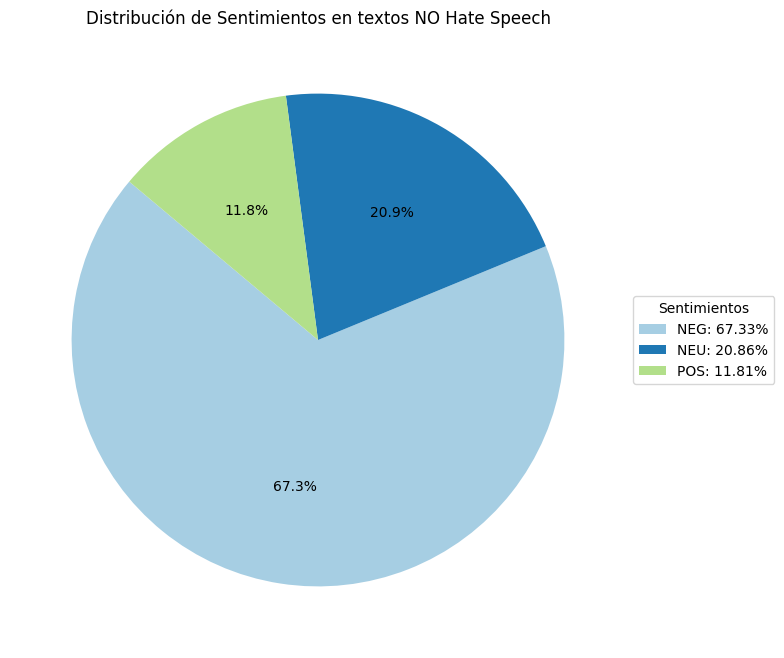

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_sentiment_percentages_not_hate_speech.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos en textos NO Hate Speech")
legend_labels = [f"{sentiment}: {percentage:.2f}%" for sentiment, percentage in overall_sentiment_percentages_not_hate_speech.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [64]:
print("\nEjemplos de cada tipo de sentimiento en textos NO hate speech:")
for sent_type, example in examples_per_sentiment_not_hate_speech.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos NO hate speech:
NEG: ['Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4', 'Antonio Caballero y como ser de mal gusto e ignorante a la vez. Claro que no es lo mismo acoso sexual y violación pero hay varias conductas que componen la violencia sexual.', '@Zurine3 Cuánto hijo de puta sobra en el mundo...', 'Pablo Casado debería estudiar un máster en inmigración https://t.co/Pcz6GPJ6dG', 'vos me haces eso te pego una patada en la cara https://t.co/2drqUu5Rwc', 'Padres indocumentados realizaron una huelga de hambre para pedir ser liberados https://t.co/ZPuBt8kUrK https://t.co/zRentrV0Kq', 'No sé porque hay personas que piensan que todos los inmigrantes son delincuentes', 'A Tomi Alegre JAKSKKSJSJ — Cállate q tdv estoy de duelo puta https

-----------------------------------------------

### Comparación entre todos los tweets, tweets hate_speech y no hate_speech

-----------------------------------------------


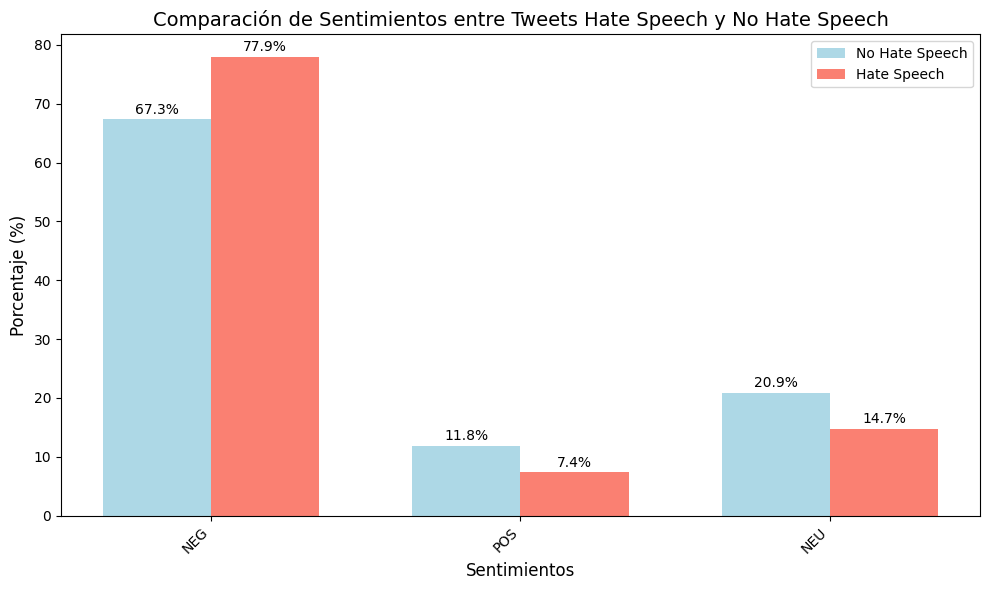

In [66]:
all_sentiments = list(set(overall_sentiment_percentages_not_hate_speech.keys()).union(set(overall_sentiment_percentages_hate_speech.keys())))

not_hate_speech_percentages = [overall_sentiment_percentages_not_hate_speech.get(sent, 0) for sent in all_sentiments]
hate_speech_percentages = [overall_sentiment_percentages_hate_speech.get(sent, 0) for sent in all_sentiments]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(all_sentiments))
bar1 = ax.bar(index - bar_width/2, not_hate_speech_percentages, bar_width, label='No Hate Speech', color='lightblue')
bar2 = ax.bar(index + bar_width/2, hate_speech_percentages, bar_width, label='Hate Speech', color='salmon')
for i, v in enumerate(not_hate_speech_percentages):
  ax.text(index[i] - bar_width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=10, color='black')
for i, v in enumerate(hate_speech_percentages):
  ax.text(index[i] + bar_width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=10, color='black')

ax.set_xlabel('Sentimientos', fontsize=12)
ax.set_ylabel('Porcentaje (%)', fontsize=12)
ax.set_title('Comparación de Sentimientos entre Tweets Hate Speech y No Hate Speech', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(all_sentiments, rotation=45, ha='right', fontsize=10)
ax.legend()

plt.tight_layout()
plt.show()